In [16]:
import numpy as np
import math
from IPython import display 
from base64 import b64decode 
from pypoman import compute_polytope_vertices


np.random.seed(3)

# Querying to Estimate - Linear Additive Domain (LAD) Application

                                   Adel Magra, Tim Baarslag, Michael Kaisers

We are interested in finding an optimal sequence of queries to ask a user to estimate their utility. Optimal is meant in the sense that the sequence should provide the most accurate of estimation for the least query cost. 

## The Domain

The negotiation domain $\Omega$ is a "multiple split the pie" domain. There are $n$ pies that need to be shared between 2 negotiators $N_1$ and $N_2$. We let then $\Omega = [0,1]^n$, where each outcome $\omega\in\Omega$ corresponds to the amount of each pie given to $N_1$. For example $\omega = (1,1\cdots,1,0)$ means $N_1$ gets all the first $n-1$ pies and the last pie goes to $N_2$. $\omega = (0.5,0.5,\cdots,0.5)$ means each negotiator gets half of each pie. Here is an illustration for $n=3$ of the outcome $(0.4,0.3,0.5)$ 

  
  



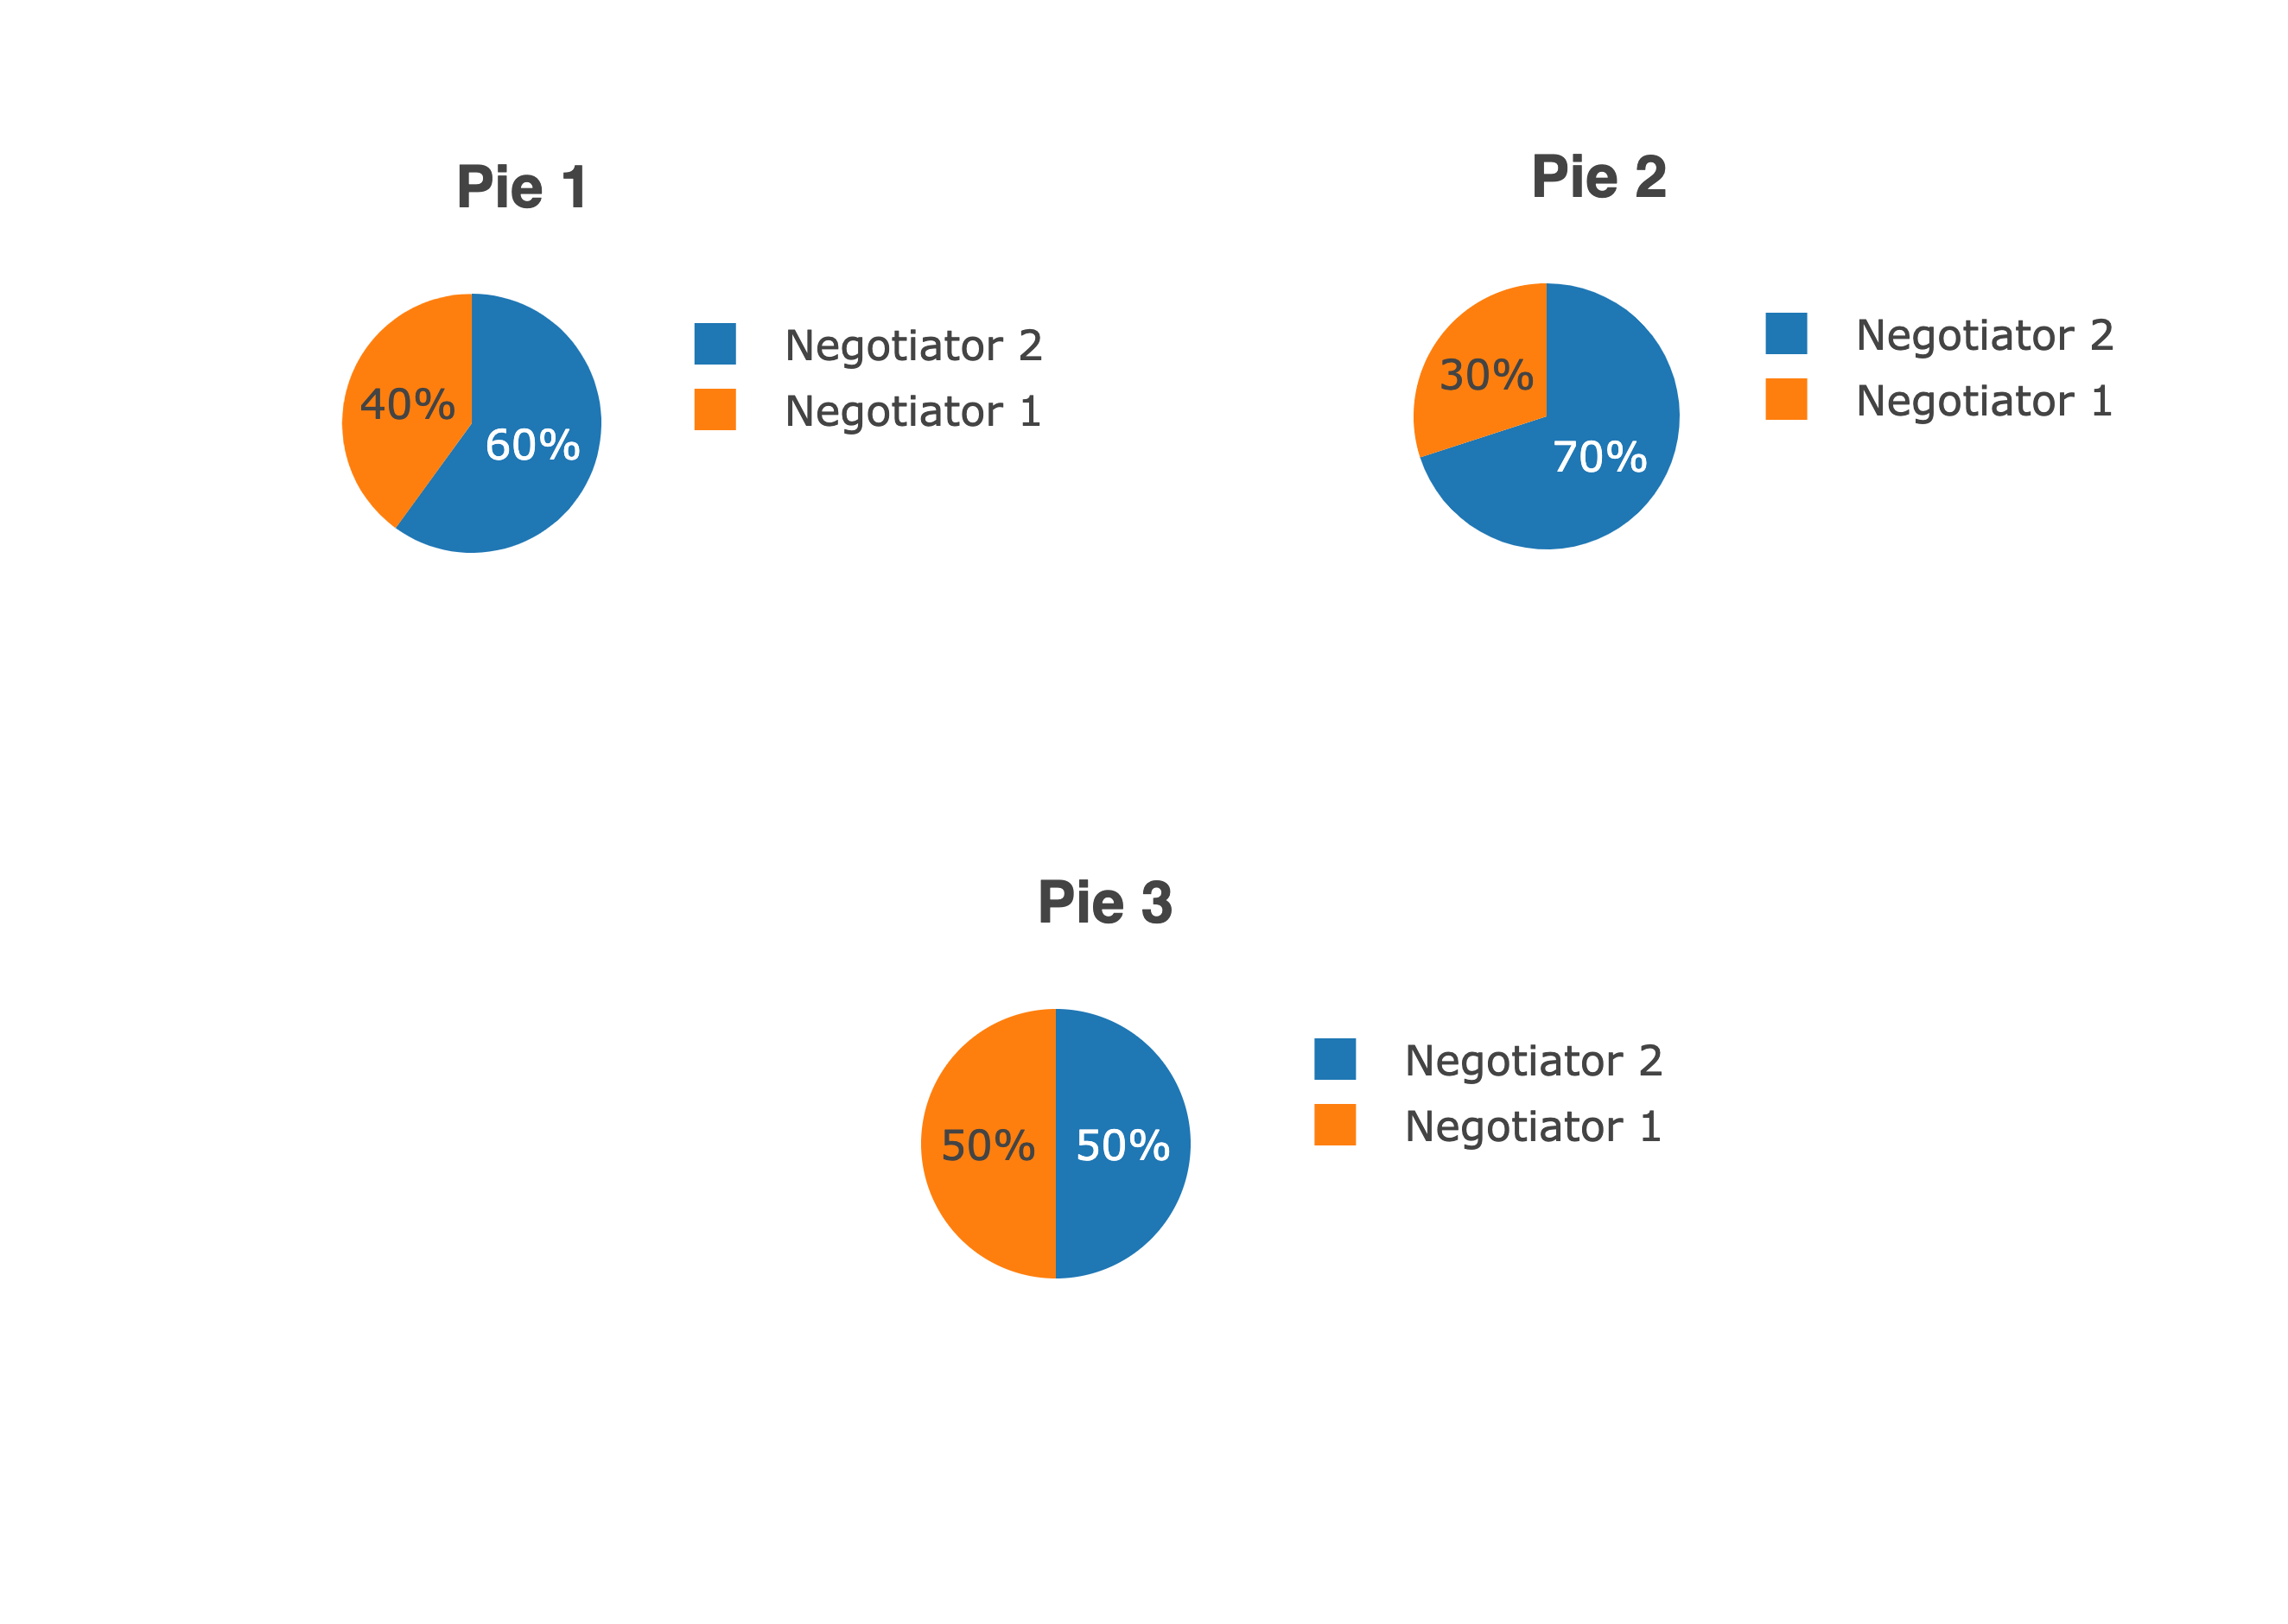

In [17]:
base64_data="iVBORw0KGgoAAAANSUhEUgAAClgAAAdYCAYAAABWnVY+AAAgAElEQVR4Xuzdf9SXZX0H8A+CKCA/ZKKM6dRNTxYH05hKEqbiknJOljlFTRM1f3JGqYmShD8zKdJEXbTERxHDSMGjY3Nj1VotcbZOmx5Mj6TWJtAIKUVNZOf6OpzdPg/3/f3xfL/383xf9zkcOz2f676u+3V9/rrP+3tffbZs2bIlXAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAm8J9BGw1A0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgd8VELDUEQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBjICApZYgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEBCy1BAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgIyBgqSUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBAUstQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDICAhYagkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwFJLECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyAgKWWoIAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBEQsNQSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGMgIClliBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQELLUEAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAjIGCpJQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEBSy1BgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgICFhqCQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDAUksQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDICApZaggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQERCw1BIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYyAgKWWIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBAQstQQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAICMgYKklCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQFLLUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyAgIWGoJAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMBSSxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEMgICllqCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARELDUEgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBjICApZYgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEBCy1BAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgIyBgqSUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBAUstQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDICAhYagkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwFJLECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyAgKWWoIAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBEQsNQSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGMgIClliBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQELLUEAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAjIGCpJQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEBSy1BgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgICFhqCQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDAUksQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDICApZaggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQERCw1BIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYyAgKWWIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBAQstQQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAICMgYKklCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQFLLUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyAgIWGoJAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMBSSxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEMgICllqCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARELDUEgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBjICApZYgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEBCy1BAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgIyBgqSUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBAUstQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDICAhYagkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwFJLECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyAgKWWoIAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBEQsNQSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGMgIClliBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQELLUEAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAjIGCpJQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEBSy1BgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgICFhqCQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDAUksQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDICApZaggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQERCw1BIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYyAgKWWIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBAQstQQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAICMgYKklCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQFLLUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyAgIWGoJAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMBSSxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEMgICllqCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARELDUEgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBjICApZYgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEBCy1BAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgIyBgqSUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBAUstQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDICAhYagkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwFJLECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyAgKWWoIAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBEQsNQSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGMgIClliBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQELLUEAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAjIGCpJQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEBSy1BgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgICFhqCQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDAUksQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDICApZaggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQERCw1BIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYyAgKWWIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBAQstQQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAICMgYKklCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQFLLUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyAgIWGoJAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMBSSxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEMgICllqCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARELDUEgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBjICApZYgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEBCy1BAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgIyBgqSUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBAUstQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDICAhYagkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwFJLECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyAgKWWoIAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBEQsNQSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGMgIClliBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQELLUEAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAjIGCpJQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEBSy1BgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgICFhqCQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDAUksQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDICApZaggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQERCw1BIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYyAgKWWIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBAQstQQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAICMgYKklCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQFLLUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyAgIWGoJAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMBSSxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEMgICllqCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARELDUEgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBjICApZYgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEBCy1BAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgIyBgqSUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBAUstQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDICAhYagkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwFJLECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyAgKWWoIAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBEQsNQSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGMgIClliBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQELLUEAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAjIGCpJQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEBSy1BgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgICFhqCQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDAUksQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDICApZaggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQERCw1BIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYyAgKWWIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBAQstQQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAICMgYKklCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQFLLUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyAgIWGoJAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMBSSxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEMgICllqCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARELDUEgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBjICApZYgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEBCy1BAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgIyBgqSUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBAUstQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDICAhYagkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwFJLECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyAgKWWoIAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBEQsNQSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGMgIClliBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQELLUEAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAjIGCpJQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEBSy1BgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgICFhqCQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDAUksQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDICApZaggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQERCw1BIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYyAgKWWIECAAAECBAgQIECAAAECBOsoh0kAACAASURBVAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBAQstQQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAICMgYKklCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQFLLUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyAgIWGoJAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMBSSxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEMgICllqCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARELDUEgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBjICApZYgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEBCy1BAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgIyBgqSUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBAUstQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDICAhYagkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwFJLECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQyAgKWWoIAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBEQsNQSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoksHjx4li7dm3DV9S/f/8YMmRI5d/OO+8c7373uyv/rfd66KGH4o477si9zWGHHRbTpk3LrVNAgAABAgQIECBAgACBsggIWJZlJ6yDAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQET8+Z//eWzatKkpFilsecABB8TkyZNjzJgxNc35ta99Le69997csfvvv3986Utfyq1r94Kf//zn8Y//+I/x3HPPxbp16+J//ud/Yv369bF58+ZIIdmBAwfGsGHDYuTIkfG+970vDjzwwNhrr73anc3zEyBAgAABAgQIEOgWAQHLbmF1UwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK1CTQzYPn2FabA3plnnhmHH354VQsXsKyKq9Pil19+OZYvXx4PPvhgpIBltdeAAQNiypQplaBs+t8uAgQIECBAgAABAgQaIyBg2RhHdyFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQEIFWBSy3Lv6QQw6JGTNmxE477VToeQQsCzF1WbRq1aqYOXNmbNy4sb4bRUTfvn3jtNNOq4Qt+/TpU/f93IAAAQIECBAgQIBAuwsIWLZ7B3h+AgQIECBAgAABAgQIECBAgAABAgQIECBAgACBUgm0OmCZMAYNGhTz58+PXXfdNddGwDKXqMuCJUuWxFe/+tXab9DFyNGjR8dVV10V6Qh4FwECBAgQIECAAAECtQsIWNZuZyQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBhguUIWCZHmr48OHxN3/zNzF48OBtPqOAZW0tsHDhwujo6KhtcIFRKSSb9m+XXXYpUK2EAAECBAgQIECAAIHOBAQs9QUBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBEgmUJWCZSN71rnfFvHnztqkjYFl986RjwadNm1b9wCpHpC+QppDlgAEDqhypnAABAgQIECBAgACBJCBgqQ8IECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlEigTAHLxHLdddfFQQcd1KWQgGV1zbNp06Y49dRTY+PGjdUNrLH6gAMOiDlz5tQ42jACBAgQIECAAAEC7S0gYNne++/pCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESiZQtoDl7rvvHgsWLOhSScCyugaaP39+fPOb36xuUJ3VeSHZOm9vOAECBAgQIECAAIFeKyBg2Wu31oMRIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0RIFqApbHHHPMNh9xy5YtsX79+vjFL34Ra9asiddee60mkr/+67+OP/7jP+50bDru+gc/+EHufdNx4+PHj8+t6+0FkydPjpdeeqmqxxw1alQMGzYsfvnLX8batWurGpuKR44cGXfeeWf06dOn6rEGECBAgAABAgQIEGhnAQHLdt59z06AAAECBAgQIECAAAECBAgQIECAAAECBAgQIFA6gaIBy0GDBsXSpUurWv8TTzwRt912W6RQZDXXmWeeGSeddFI1Q9R2IvCf//mf8alPfaqwzemnnx7HHntsDB069K0xmzdvju9///uVo9vT/y56feELX4j3ve99RcvVESBAgAABAgQIECAQEQKW2oAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAiQS6M2C59TEfeuihuPHGGws/9ZgxY2Lu3LmF6xV2LjBnzpx4+OGHC/Gk/Rk9enSXtevWrYtPf/rT8cILLxS6X+qradOmFapVRIAAAQIECBAgQIDAmwICljqBAAECBAgQqEtg06ZNcfvtt8cbb7xR1306GzxgwIDKsTeDBw+O3XbbLdIRQun/q/dKv9T+t3/7t9zbnH/++XHEEUfk1ikgQIAAAQIECBAgQIAAAQIECBAg0EiBZgQs03pnzpwZK1euLLT0/v37RwplluF69dVX47HHHosnn3yycvx5+vfb3/42Xn/99RgyZEiMGDEidtlll/j93//9OOiggxryTrFRz52OdC9yTPsnPvGJOOWUU3Kn/elPfxoXXHBBbl0qGD58eCxevLhQrSICBAgQIECAAAECBN4UELDUCQQIECBAgEBdAv/1X/8V6ZiaZl0jR46MQw45JD760Y/GqFGjapr2nHPOiWeeeSZ37NSpU2PKlCm5dQreKZC+ZvDUU091SZN+eX/hhReiI0CAAAECBAgQIECAAAECBAgQ6ESgWQHLF198MT72sY8V3oN/+Id/6LQ2fZHx7rvvzr3P+PHj45Of/GRuXWcFW7ZsqXz58cEHH6z6ePMDDzwwjjrqqJgwYUJLw5bVeD/wwAOF1zp79uzKkeFFrmruW+R+aggQIECAAAECBAj0dgEBy96+w56PAAECBAh0s0CzA5Zvf5z9998/zj333Nh3332rekoBy6q4aiqeNGlSbN68ucuxu+++eyxYsKCmextEgAABAgQIECBAgAABAgQIEOjtAs0KWCbHonOl2mXLlsXAgQPfwf+1r30t7r333txtSe/zvvSlL+XWZQt+8IMfxLx58yIdiV3Plb7C+ZnPfCY++MEP1nObmseuWrWq0BHd6SSf9LxFr3/5l3+JK6+8slB5R0dHzT9cLzSBIgIECBAgQIAAAQK9TEDAspdtqMchQIAAAQLNFmhlwHLrs5566qlx2mmnRZ8+fQo9voBlIaaai55++uk477zztjlewLJmXgMJECBAgAABAgQIECBAgACBNhAoGnocNGhQLF26tC6R888/f5snkbz95l2F87orYJmO/b7qqqvihz/8YV3PmB188MEHV4KWQ4cObeh98272ne98J6699tq8sjj55JPjjDPOyK3bWvDcc8/FmWeeWaj+pptuive85z2FahURIECAAAECBAgQIOCIcD1AgAABAgQI1ClQhoBleoT99tsvvvzlL0e/fv1yn0jAMpeoroIbbrghujouauuNBSzrIjaYAAECBAgQIECAAAECBAgQ6OUCzQxYpiO7V69eXUg0faVy5513fkdtdwQs03HaF198cfzsZz8rtLZqiwYMGBBf//rXY8SIEdUOrbn+nnvuidtvvz13/PTp0+OYY47JrdtasHHjxjj++OML1V999dUxbty4QrWKCBAgQIAAAQIECBAQsNQDBAgQIECAQJ0CZQlYpsdILwbTL9rzvmQpYFnnpm9j+PPPPx9Tp07NnUDAMpdIAQECBAgQIECAAAECBAgQINDGAs0MWJ5++umR3vEVuRYuXBi77bbbO0obHbB8+eWXK19wXL9+fZFl1VwzcuTISGvfcccda75HNQPnzp0by5cvzx1yzTXXxCGHHJJbt7Xgxz/+cVxyySWF6tMaxowZU6hWEQECBAgQIECAAAECApZ6gAABAgQIEKhToEwBy/Qo6bjw9FJ4W5eAZZ2b3sXw9OI72b7wwgu5EwhY5hIpIECAAAECBAgQIECAAAECBNpYoJkBy0mTJsXmzZsLaX/rW9+KIUOGvKO20QHLmTNnxsqVKwutqd6iAw44INKJLHk/2q53njR+2bJl8dBDD+Xe6oorrog99tgjt25rwaJFi2LBggWF6u+7774YPHhwoVpFBAgQIECAAAECBAgIWOoBAgQIECBAoE6BsgUs+/btG+moos5e9G59VAHLOje9k+FPP/10XHrppZGOIypyCVgWUVJDgAABAgQIECBAgAABAgQItKtAswKWq1atimnTphVmTl9f7Nev3zvqGxmwXLp0adxyyy2F19SIwvS1zJNPPrkRt2rJPdJ7uR/96Ee5c/fv379QwDP3RgoIECBAgAABAgQItJFAny1btmxpo+f1qAQIECBAgECDBcoWsEyPN3ny5Ljgggu6fFIBy8Y1wX/8x39UXsquWLGiqpsKWFbFpZgAAQIECBAgQIAAAQIECBBoM4FmBCxff/31ykkwa9euLaSbftCcvmDZ2dWogOVvfvOb+NjHPlb4i5pb15J+dD106NBIAcIip6tknyGNW7JkSQwYMKCQRZmK0vu5T3/604WW9Ed/9Efx1a9+tVCtIgIECBAgQIAAAQIE3hQQsNQJBAgQIECAQF0C1QQsBw0aFIcffvg250vHEa1Zsyb++7//O9atW1f1y9R08/RCNf2avqtjfb797W/H6tWrc587rTW9dGz3K72k/eUvf1n5OuWvf/3ryv4899xzFcNNmzbVxCNgWRObQQQIECBAgAABAgQIECBAgECbCHR3wDKFK7/yla9U3qEVvdJR2nPmzOm0vFEBy4ULF0ZHR0fRJcU+++xTOVVlzz33fOtdYPq2zOOPPx6f//znC4dH04SnnnpqJXDak65XX3218uXNoqfKTJw4MWbMmNGTHtFaCRAgQIAAAQIECLRcQMCy5VtgAQQIECBAoGcLVBOwnDBhQsyaNavwA6eXoSkMmX5VvX79+sLjUuGtt94a++67b1VjFHcucOKJJ1btn2cpYJkn5O8ECBAgQIAAAQIECBAgQIBAOwt0V8Ay/bj5u9/9buUI7qKhvK37MGXKlJg6dWqn29KIgGUKfX70ox8t/IPe0047rRKK7OpH1ulZFyxYEIsXLy7USulH2/fff3+P+orll7/85fjbv/3bQs+Xiq6++uoYN25c4XqFBAgQIECAAAECBAj4gqUeIECAAAECBOoU6M6A5dalpaDltddeW3n5W/RKL3vTS19X/QIClvUbugMBAgQIECBAgAABAgQIECBAoBqBogHLdM/x48fn3jqdTpJOjKk2VPn2G6cQ5V577dXpXI0IWP7zP/9zJQBY5Bo7dmxcf/31RUrjoosuip/85CeFaq+88so49NBDC9W2uigdaV7Ncd+OB2/1jpmfAAECBAgQIECgpwr4gmVP3TnrJkCAAAECJRFoRsAyPWo6ijr9Ir3oS+CDDz64Esosw7Vhw4Z45JFH4tlnn618CTL923777eOll16KESNGvPUvvaB+73vfG9ttt10Zlv3WGgQsS7UdFkOAAAECBAgQIECAAAECBAi0gUA1ActmcKR3WIsWLepyqkYELIt+jTF9afKuu+6qvFMrcqV3cekY7fRFy7wruU+bNi2vrKV/Tz9GT8HKb33rW1Wt48Ybb4zRo0dXNUYxAQIECBAgQIAAAQK+YKkHCBAgQIAAgToFmhWwTMtMx4Vfd911hVacjgdPx4R3dt10003xox/9KPc+Z599dnzgAx/IreusIAVC77333vinf/qnSEZFr/79+1fmPOqooyL9Er8MYUsBy6K7p44AAQIECBAgQIAAAQIECBAg0BiBsgUsL7744jj66KO7fLhGBCxPP/30Qu/R/vRP/zQ+85nPVAWdvna5YsWK3DGjRo2Kjo6O3LpWFaR3jp/73Ofi3//936tawoEHHhg33HBDVWMUEyBAgAABAgQIECDwpoAvWOoEAgQIECBAoC6BZgYsq5lr1113jbvvvrvTZzvnnHPimWeeyX3uWo4Zf/311+P++++PO+64I1577bXcObZVMHLkyEjHEqXje1p5CVi2Ut/cBAgQIECAAAECBAgQIECAQDsKlClgmU5dSQHKbV31BixfeeWVOPbYYwtt9eWXXx5HHHFEodqtRQ888EDcfPPNhcYsW7YsBg4cWKi2mUWrV6+uBEvTaTnVXOmLn2l/9thjj2qGqSVAgAABAgQIECBA4P8EBCy1AgECBAgQIFCXQDWhxwkTJsSsWbNqnu+NN97Y5i/l337jQYMGxdKlSzudq7sCluvWrYvp06fH2rVra37GzgamgOMnPvGJ6NevX0PvW/RmApZFpdQRIECAAAECBAgQIECAAAECBBojUJaAZTptJYXz0pcdt3XVG7BctWpV4aO50xHew4YNqwr6pz/9aSxevLjQmHT8dqt/8Jxd6PLly2Pu3LmF1p8tSl+uTF+wdBEgQIAAAQIECBAgUJuAgGVtbkYRIECAAAEC/yfQzIBlmjIdAVTkGjFiRCxatKjT0u4IWKaXtOmopHRMT3dc73rXuyIdbZ5+cd7s6+qrr46nn3660LRr1qyJzZs359buvvvusWDBgtw6BQQIECBAgAABAgQIECBAgACBdhQoQ8AyhStvueWWSF+wzLvqDViuXLkyZs6cmTdNU/6ejhMfO3ZsU+bKmyS9a/zCF74Q3//+9/NKO/17Oh3n0EMPrWmsQQQIECBAgAABAgQIvCkgYKkTCBAgQIAAgboEmhmwrOaooGZ+wfKpp56K888/vy7HIoMnTpwYM2bMKFLaspr0C/8lS5bkzi9gmUukgAABAgQIECBAgAABAgQIEGhjgVYHLMeNG1f5MfHQoUML7UK9AcsVK1ZECjaW4Urv39J7uFZf6Qfdl112WWzcuLGmpVxxxRVx2GGH1TTWIAIECBAgQIAAAQIE/l9AwFI3ECBAgAABAnUJNDNgmb6ieN555xVab7O+YPnyyy/Hxz/+8ZpfdBZ6mLcVTZ06NaZMmVLtsKbVC1g2jdpEBAgQIECAAAECBAgQIECAQC8WaFXAcr/99qu86zr44IOr0q03YHnffffFbbfdVtWc3VU8ffr0OOaYY7rr9oXuu2zZspg3b16h2mzRkCFDYs6cOaU75rymhzGIAAECBAgQIECAQAkEBCxLsAmWQIAAAQIEerJAMwOW6cjvosdK77333jF//vxOaRt5RHg6uigdYdTM6ytf+Uq8+93vbuaUhecSsCxMpZAAAQIECBAgQIAAAQIECBAg0KVAswKWAwYMiH322Sfe+973xoc//OHYdddda9qVegOWHR0dsXDhwprmbvSgv/qrv4o/+7M/a/RtC93v1VdfrRwJ/r3vfa9QfbZozJgxcdVVV8VOO+1U03iDCBAgQIAAAQIECBB4p4CApa4gQIAAAQIE6hJoVsCymnnSAx1++OGRwo+dXY0KWD722GM1Hdndv3//GDZsWLz22muxYcOGqv3TlwRuvvnmqsc1Y4CAZTOUzUGAAAECBAgQIECAAAECBAj0doFqApYXXHBBIY5+/frFoEGDKv9SAG+33XaL3/u93ys0Nq+oNwUsL7zwwjjuuOPyHrnhf1+/fn1MmzYt1q5dW9O906k3Z5xxRvTp06em8QYRIECAAAECBAgQINC5gIClziBAgAABAgTqEqgm+DhhwoSYNWtW1fO9+OKLcckll8Tq1asLjz3rrLPixBNP7LS+UQHL9Gv2J554ovCaJk2aVHnJOXz48LfGpJDld77znbjpppsqgcui14033hijR48uWt60OgHLplGbiAABAgQIECBAgAABAgQIEOjFAkUDliksuXTp0pZL1BuwTM9wyy23tPw50gJSYHXy5MlNXcuaNWvi/PPPj40bN1Y9b+qB9NXK/fffv+qxBhAgQIAAAQIECBAgkC8gYJlvpIIAAQIECBDYhkB3Biw3bdoU9957b9xzzz2xefPmqvbhi1/8YuVoo86uRgQsf/azn8XZZ59daE19+/aN2bNnx7hx47qsTy9Pr7zyyvjJT35S6J5l/YqlgGWh7VNEgAABAgQIECBAgAABAgQIENimQLsFLL/97W/HddddV6grujv8ePzxx8fIkSMLraURRc8++2zly5XpXWi1V3rfeOmllzoSvFo49QQIECBAgAABAgSqEBCwrAJLKQECBAgQIPBOgWoClulo7IMOOmibjClImX6x/cILL9T0UjHdPM3z4IMPdnkcTiMClnPnzo3ly5cXaolzzz030ovZvOvll1+Ok046qfBzL1u2LAYOHJh326b+XcCyqdwmI0CAAAECBAgQIECAAAECBHqpQLsFLB977LGYMWNG7m6OGDEiFi1alFvXUwp+9atfVU68eemll6pacvpB96c+9ak4+uijqxqnmAABAgQIECBAgACB6gUELKs3M4IAAQIECBB4m0A1ActmwaWjuC+66KIup2tEwPKUU06JtWvX5j7SqFGj4o477ugy7Jm9wSOPPBKf/exnc++bCtIXLw899NBCtc0qErBslrR5CBAgQIAAAQIECBAgQIAAgd4s0G4By6eeeqpyRHbelYKFDz30UKT/9vTr9ddfj/POOy/SSTnVXOl94+c///lI/3URIECAAAECBAgQIND9AgKW3W9sBgIECBAg0KsFyhiw7Ojo2OYLxnoDlulLk8cdd1yhfb3sssviyCOPLFS7teiEE06IDRs25I5JL9rT8UFlugQsy7Qb1kKAAAECBAgQIECAAAECBAj0VIF2C1i+8sorceyxxxbaruuvvz7Gjh1bqLbMRdWckLP1OVJfpFBmv379yvxo1kaAAAECBAgQIECgVwkIWPaq7fQwBAgQIECg+QJlC1imo7jTkdzbuuoNWK5cuTJmzpxZCHvJkiUxdOjQQrVbi2bNmhX/+q//mjsm/Uo9hUnLdAlYlmk3rIUAAQIECBAgQIAAAQIECBDoqQLtFrBM+3T22WcX+prjEUccEZdffnlVW5uO4v7FL36RO2bw4MGx55575tbVW7B69er45Cc/Wfg26Yudl156aaRndxEgQIAAAQIECBAg0FwBAcvmepuNAAECBAj0OoEyBSz33nvvuPnmm2OHHXbYpnO9Acu77767cux3keuKK64oUvY7Nd/4xjciHYuUd6UXq3/3d3+XV9bUvwtYNpXbZAQIECBAgAABAgQIECBAgEAvFWjHgOVtt90W9913X6EdTbX77LNPodp0FPfpp58ea9euza0fNmxYfPOb38ytq7fgwgsvjCeffLLwbdLXLseMGVO4XiEBAgQIECBAgAABAo0TELBsnKU7ESBAgACBthQoS8Byjz32iHnz5sXAgQNz96HegOWtt94a999/f+48zSj4+7//+9huu+2aMVWhOQQsCzEpIkCAAAECBAgQIECAAAECBAhsU6AdA5bVnBozYsSIuOWWW2LnnXfO7aT0znDZsmW5dalg4sSJMWPGjEK1tRY999xzceaZZxYeftFFF8WkSZMK1yskQIAAAQIECBAgQKCxAgKWjfV0NwIECBAg0HYCZQhYnnzyyfHxj388+vXrV8i/3oDl9ddfHytWrCg0V3cXLV68OIYPH97d0xS+v4BlYSqFBAgQIECAAAECBAgQIECAAIEuBdoxYPnGG2/ECSecEBs3bizUGUOGDInZs2d3+WXH3/72t3HXXXfFPffcU+h+qejaa6+Ngw8+uHB9LYXz58+v6iuZ6RSbRl6OGm+kpnsRIECAAAECBAi0g4CAZTvssmckQIAAAQLdKNDKgOVhhx0Wp512Wuy5555VPWG9AcvLL788Hn300arm7K7i9JJ45MiR3XX7qu8rYFk1mQEECBAgQIAAAQIECBAgQIAAgXcItGPAMiEsX7480nHY1Vx77713JK/dd989hg4dGmvWrInVq1fHkiVLCoc103z9+/evfOmy6I+4q1nj22uPP/74qtZV6zxdjUvHkx933HGNvq37ESBAgAABAgQIEOi1AgKWvXZrPRgBAgQIEGiOQDMDlsOGDYv99tsvDjrooDjqqKMKHQfemUK9Acv0EvLJJ59sDnDOLB0dHTFq1KhSrCUtQsCyNFthIQQIECBAgAABAgQIECBAgEAPFmjXgGX6iuWJJ54YGzZsaPrufe5zn4sPfOAD3Trv448/HtOnT+/WOfJuLmCZJ+TvBAgQIECAAAECBH5XQMBSRxAgQIAAAQJ1CVQTsBwxYkT85V/+ZaH50i/Gd9ppp7f+pV+gDxw4sNDYvKJ6A5bTpk2LVatW5U3TlL/ffvvtscceezRlriKTCFgWUVJDgAABAgQIECBAgAABAgQIENi2QLsGLJPKj3/847jkkkua2iITJ06MGTNmdPuc8+bNq3wls5WXgGUr9c1NgAABAgQIECDQEwUELHvirlkzAQIECBAokUA1AcsJEybErFmzWr76egOWM2fOjJUrV7b8OdICvv71r8cf/uEflmItaREClqXZCgshQIAAAQIECBAgQIAAAQIEerBAOwcs07atWLEirr/++qbsYDo1uwpAlAAAIABJREFU56677oodd9yx2+dLwdEUIG3lJWDZSn1zEyBAgAABAgQI9EQBAcueuGvWTIAAAQIESiTQjgHLOXPmxMMPP5y7C0OGDIkjjzwyt67Wgu233z7OOuus2G677Wq9RcPHCVg2nNQNCRAgQIAAAQIECBAgQIAAgTYUaPeAZdryJUuWVH7M253X8OHDI31VMp2804zrlFNOibVr1zZjqi7nELBsKb/JCRAgQIAAAQIEeqCAgGUP3DRLJkCAAAECZRJox4Bl0RDhpEmT4qKLLirTdnX7WorapCPfFyxY0O3rMQEBAgQIECBAgAABAgQIECBAoCcKCFi+uWuPPfZYXHnllbFp06aGb+Nee+0Vc+fOjcGDBzf83l3dML0v3Lx5c9Pm62wiAcuW8pucAAECBAgQIECgBwoIWPbATbNkAgQIECBQJoF2DFh+4xvfqBzNnXftt99+cfPNN+eV9aq/C1j2qu30MAQIECBAgAABAgQIECBAgECLBAQs/x9+48aNkU6U+eEPf9iw3Tj++OPjjDPOiB122KFh98y70W9+85v4i7/4i7yybv+7gGW3E5uAAAECBAgQIECglwkIWPayDfU4BAgQIECg2QLtGLB89NFH4/LLLy9E/cADD8SAAQMK1faGIgHL3rCLnoEAAQIECBAgQIAAAQIECBBotcAJJ5wQGzZsyF1GOtp60aJFuXXdXXD33XfHHXfckTvNIYccEtdcc01uXWcFzz77bHR0dMT3vve9msanQR/84Afj3HPPjV122aXme9Q6cP369XHiiSfWOrxh4y655JL40Ic+1LD7uREBAgQIECBAgACB3i4gYNnbd9jzESBAgACBbhZox4DlK6+8Escee2wh2VpeWD7//PPx4osv5t5/5MiRLXkZvK2FCVjmbpsCAgQIECBAgAABAgQIECBAgACBOgR+9atfRfoB9COPPFI5Qvyll17q9G59+/atHP/9J3/yJzF+/PgYO3ZsW/0Qug5iQwkQIECAAAECBAgQeJuAgKV2IECAAAECBOoSaMeAZQKbOnVqpCBk3jVo0KBIR4rvuOOOeaWVvyfPdO/Nmzfn1h955JFx2WWX5dY1s0DAspna5iJAgAABAgQIECBAgAABAgQIENiyZUv8+te/rnzx89VXX40hQ4bEsGHDmnr8t10gQIAAAQIECBAgQKD3CghY9t699WQECBAgQKApAu0asLztttvivvvuK2Q8bty4mD17dqRfzW/reuONN+Kss84qFNxM95kxY0ZMnDix0BqaVSRg2Sxp8xAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAdwsIWHa3sPsTIECAAIFeLtCuActqnju1wHve857K1ybTsd6dXevXr48vfvGLleONil7Lli2LgQMHFi1vSp2AZVOYTUKAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECTRAQsGwCsikIECBAgEBvFqgmaDhhwoSYNWtWyznOOeeceOaZZ3LXkY7qnjJlSpd111xzTXz3u9/Nvc/bC97//vdHcviDP/iD6N+/f/z85z+PVatWxdKlSwsdC771XgceeGDccMMNVc3djGIBy2Yom4MAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEmiEgYNkMZXMQIECAAIFeLNDOActqnr2RLZCOGr/zzjtj1113beRtG3IvAcuGMLoJAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJRAQMCyBJtgCQQIECBAoCcLVBMy7G1fsEz71tHREQsXLmzqFs6YMSMmTpzY1DmLTiZgWVRKHQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUXUDAsuw7ZH0ECBAgQKDkAu0esEzbM2fOnHj44YebslPjx4+P2bNnN2WuWiYRsKxFzRgCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKKOAgGUZd8WaCBAgQIBADxIQsIzYsmVLfPazn42VK1d2686NHTs2rr766th+++27dZ56bi5gWY+esQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQJgEByzLthrUQIECAAIEeKCBg+eampZDlkiVLYv78+d2yix/60Ifi4osvjj59+nTL/Rt1UwHLRkm6DwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAi0WkDAstU7YH4CBAgQINDDBQQsf3cDV69eXTnCO7k04howYECce+658ZGPfKQRt+v2ewhYdjuxCQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgSQIClk2CNg0BAgQIEOitAuvWrYuTTz650OMdffTRla8wtvqaPn16PP7447nLuOCCC2Ly5Mm5dZ0VPProo3H77bfH008/XdP4vn37xpQpU+Kkk06KHXbYoaZ7tGLQXXfdFXfeeWfu1Pvuu2/ceuutuXUKCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAqwQELFslb14CBAgQIECgLQSef/75eOSRRyr/nnjiiXjttdc6fe4UqNxtt93i/e9/fxx66KExevToSP+fiwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEGiNgIBla9zNSoAAAQIECLSpwObNm+PFF1+MDRs2VASGDRsWQ4cOFaZs037w2AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQXgEBy/LujZURIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECLRIQsGwRvGkJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB8goIWJZ3b6yMAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQaJGAgGWL4E1LgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlFdAwLK8e2NlBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQIsEBCxbBG9aAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLwCApbl3RsrI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFokIGDZInjTEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAuUVELAs795YGQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAiAQHLFsGblgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECivgIBleffGyggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEWCQhYtgjetAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEB5BQQsy7s3VkaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAi0SEDAskXwpiVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTKKyBgWd69sTICBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgRQICli2CNy0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQXgEBy/LujZURIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECLRIQsGwRvGkJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB8goIWJZ3b6yMAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQaJGAgGWL4E1LgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlFdAwLK8e2NlBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQIsEBCxbBG9aAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLwCApbl3RsrI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFokIGDZInjTEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAuUVELAs795YGQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAiAQHLFsGblgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECivgIBleffGyggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEWCQhYtgjetAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEB5BQQsy7s3VkaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAi0SEDAskXwpiVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTKKyBgWd69sTICBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgRQICli2CNy0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQXgEBy/LujZURIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECLRIQsGwRvGkJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB8goIWJZ3b6yMAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQaJGAgGWL4E1LgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlFdAwLK8e2NlBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQIsEBCxbBG9aAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLwCApbl3RsrI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFokIGDZInjTEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAuUVELAs795YGQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAiAQHLFsGblgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECivgIBleffGyggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEWCQhYtgjetAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEB5BQQsy7s3VkaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAi0SEDAskXwpiVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTKKyBgWd69sTICBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgRQICli2CNy0BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQXgEBy/LujZURIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECLRIQsGwRvGkJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB8goIWJZ3b6yMAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQaJGAgGWL4E1LgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlFdAwLK8e2NlBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQIsEBCxbBG9aAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLwCApbl3RsrI/C/7N0HmBXV/f/xD2UpS+9dioAUQVAEFEtsGLAhIjbswYbYxYj6V6MSY+9GxIIoNkQ0IJZYf4IKsWKnCygICCi97f/5Dllyy9wyd2+Zufd9nmcD2Z055XVmedyznzkHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRwJELDMETzNIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIICAfwUIWPp3bugZAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjkSICAZY7gaRYBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPwrQMDSv3NDzxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIEcCBCxzBE+zCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCDgXwEClv6dG3qGAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAI5EiBgmSN4mkUAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAf8KELD079zQMwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyJEAAcscwdMsAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgj4V4CApX/nhp4hgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECOBAhY5gieZhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAwL8CBCz9Ozf0DAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEciRAwDJH8DSLAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAL+FSBg6d+5oWcIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJAjAQKWOYKnWQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ8K8AAUv/zg09QwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBHAkQsMwRPM0igAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggIB/BQhY+ndu6BkCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCORIgIBljuBpFgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE/CtAwNK/c0PPEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgRwIELHMET7MIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIOBfAQKW/p0beoYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAjkSIGCZI3iaRQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAAB/woQsPTv3NAzBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDIkQAByxzB0ywCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCPhXgIClf+eGniGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQI4ECFjmCJ5mEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAvwIELP07N/QMAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRyJEDAMkfwNIsAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAv4VIGDp37mhZwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkCMBApY5gqdZBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDwrwABS//ODT1DAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAoBIGS7dLvP0t//CL9sVRat3zHx/rfpA2/SRvXSBt/l376KK5Gq43jVaNKRdWoUqSa//1zx//f8bnqlSs6H9X++2f1yhWcv9evXlnN61ZVzSpFhaDNGBFAAAEEEEAAAQQQQACBpAUIWCZNxYUIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIpCiweZ204kdp5Vzpt7nSitnSmkXSmsU7PtJQLGBZllKzapGa166q5nWqqnnd4v/+vfi//58AZllsuRcBBBBAAAEEEEAAAQSCKUDAMpjzRq8RQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQT8KmBByqWzpGVfS8u+lX58PSs9LWvAMlEnIwOYHRvXVM/WddWyXnGiW/k6AggggAACCCCAAAIIIBBIAQKWgZw2Oo0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIOALgbXLpEUzpCWfSnPfkX75MmfdynTAMtbAGtWs4gQte7aqq2671FaXZrVyZkDDCCCAAAIIIIAAAggggEA6BQhYplOTuhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPJbYPVP0sJp0sLp0k8f7zj22yclVwHLyOHXqlqkvVvX1Z671NEezWupa/PaqlGlok+U6AYCCCCAAAIIIIAAAgggkLwAAcvkrbgSAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECg0AS2bNixM+W896QfXpPWLPatgF8ClpFAlSqW114tLWxZ2wlc7rNrfdUuLvKtIx1DAAEEEEAAAQQQQAABBEoFCFjyLCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQKvDbPGn2m9Lst6Q5/w6MjV8DlpGAFq78024N9af2DZw/CVsG5hGjowgggAACCCCAAAIIFJwAAcuCm3IGjAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggECWw7Bvp+ynSh3dLW9YHEigoActQXMKWgXzU6DQCCCCAAAIIIIAAAgUjQMCyYKaagSKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIQJrJgtfTtJ+mK8ZLtWBrwEMWAZSk7YMuAPIN1HAAEEEEAAAQQQQCAPBQhY5uGkMiQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEYAhvXSLMmSF9PkBZOzyumoAcsQyeDsGVePZoMBgEEEEAAAQQQQACBwAoQsAzs1NFxBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBpAXmvi19/rT09cSkbwnahfkUsAy1t7Dl4Z0ba+CezdWrdd2gTQv9RQABBBBAAAEEEEAAgQALELAM8OTRdQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgTgC63/bEar86AFp7bK8p8rXgGXoxB3WqZETtOy3e+O8n08GiAACCCCAAAIIIIAAArkXIGCZ+zmgBwgggAACCARMoEQqsY/t0vatki1Sr18hrV8lbfpd2rxW2rZF2rZZ2rpJ2rpB2rJxx9/taxtWSZWrS/V3U6tX26hyxfKqXFRhx5/Ox46/V/rvR+2qRapXvbLqVqukevZRvZLqVqsc8vdKKqpQPmCGdBcBBBBAAAEEEEAAAQQQQAABBBBAIKMCSz6VPh0rfTY2o834rfJCCFiWmu/Vso6O27O5Bu7ZTFWKKvhtKugPAggggAACCCCAAAII5IkAAcs8mUiGgQACCCCAQNoFLDi5/HtpzSJp9U/SmiU7gpRrf5XW/bojULll3Y6gpfNhPXD+R1K5kO6Ufi6ih3Vbq93PN2qLKpa5601qVVHr+tV2frQK+Xv5cqF9KXNTVIAAAggggAACCCCAAAIIIIAAAggg4GeB7ydLMx+T5r7j517r/QQ/AAAgAElEQVRmrG+FFLAsRbR1wdKgZdPaVTNmS8UIIIAAAggggAACCCBQmAIELAtz3hk1AggggAAC/xOw3SZt58mNa6QNq6XFM6RFM6Tf5u8IVG5eJ61fmX6xoqrqsfYurSiplf66Q2psWa9Y7RvVkL3RXvpB6DKj5FSOAAIIIIAAAggggAACCCCAAAIIZF/gs3HSv6/PzDpW9keTcouFGLAsxapVtWhn0HL3Zpldc0x5grgRAQQQQAABBBBAAAEEAidAwDJwU0aHEUAAAQQQSIPA1o3S8h+kRZ9ICz6Ulnwm/f6zVLItDZUnWUWFIv1p/T+0oKRxkjek77I9d/lf2NJClw1qVE5f5dSEAAIIIIAAAggggAACCCCAAAIIIJA9gU8ekf7vTmntsuy16eOWCjlgGTotA7o1c44OP6B9Ax/PFl1DAAEEEEAAAQQQQACBIAgQsAzCLNFHBBBAAAEEyiKw6Q9p1QJp5Rxp6Sxp8cwd/3/Db9Lm9TuO985FyWHAMnK4u9Qt1j671tP+7eqrV+t6BC5z8TzQJgIIIIAAAggggAACCCCAAAIIIOBF4JN/StPuk35f4uWuvL+WgGX4FB/eubHO2LeVs/ZHQQABBBBAAAEEEEAAAQRSESBgmYoa9yCAAAIIIOB3ATvW23aotDDlwunSz59Jq3/yV699FLCMhOnavJb2a9dg55HitasW+cuO3iCAAAIIIIAAAggggAACCCCAAAKFKvCfx6Vp90irFhaqQNxxE7B05xnco4VO37eVOjetyXODAAIIIIAAAggggAACCHgSIGDpiYuLEUAAAQQQ8KmAHe/98+c7jvxe8qn0yxfSprU+7ex/u+XjgGUoXFGF8urdpq4TtrQjhex4cQoCCCCAAAIIIIAAAggggAACCCCAQJYFZk2Q3hslrZyb5YaD1RwBy9jzVbFCOZ2xTysnaNmibnGwJpbeIoAAAggggAACCCCAQM4ECFjmjJ6GEUAAAQQQKKPAuuU7QpWz35J++khavVDa+HsZK83i7QEJWEaK7N6slhO0PNCOE2/D0UJZfGJoCgEEEEAAAQQQQAABBBBAAAEEClFg/gfSa1fsOK2FklCAgGVCItWrVskJWdpHLU6uSQzGFQgggAACCCCAAAIIFLgAAcsCfwAYPgIIIIBA0ARKpCWfSV88K307SbKQZVBLQAOWodztG9XQge0bOIHL/dvVD+pM0G8EEEAAAQQQQAABBBBAAAEEEEDAfwKr5kvv3Sp9+Zz/+ubjHhGwTH5yWtevtiNouU8rlSuX/H1ciQACCCCAAAIIIIAAAoUlQMCysOab0SKAAAIIBFFg60bp128le1v/u39JS7+W7HNBL3kQsAydAluQ7du5sY7s2kRdmtUK+uzQfwQQQAABBBBAAAEEEEAAAQQQQCB3Au//Q3p3VO7aD3DLBCy9T94ezWs7QcuBezbzfjN3IIAAAggggAACCCCAQN4LELDM+ylmgAgggAACgRXYskGa974063np+ynS1k2BHYprx/MsYBk6xkM7NdKRXZroyK5NVbECr7/n14PLaBBAAAEEEEAAAQQQQAABBBBAIGMC302WXhgilZRkrIl8r5iAZeozbCfUWNDy0I6NUq+EOxFAAAEEEEAAAQQQQCDvBAhY5t2UMiAEEEAAgcAL/PyFNOtF6cvx0vrfAj+cmAPI44Bl6ZhtV0sLWdqulrs1rpG/c8nIEEAAAQQQQAABBBBAAAEEEEAAgbII/P6z9O/rpa9eKEst3CuJgGXZH4Mz+7TSxYe0V+3iorJXRg0IIIAAAggggAACCCAQeAECloGfQgaAAAIIIJAfAiXSynnS9PulH6dKfyzNj2HFG0UBBCxDh9+/SxMd272ZDuvEG/D5/3AzQgQQQAABBBBAAAEEEEAAAQQQSFpg5hjptSulku1J38KFsQUIWKbn6bCXpS85pJ36dWmSngqpBQEEEEAAAQQQQAABBAIrQMAysFNHxxFAAAEE8kOgZMfx3x8/LC2cVljHHxVYwLL0ed1313o6vkcLJ2xJQQABBBBAAAEEEEAAAQQQQAABBApWYMVs6Y2R0uw3C5YgEwMnYJle1VP3aamLD2mn+tUrp7diakMAAQQQQAABBBBAAIHACBCwDMxU0VEEEEAAgbwSWLtM+mGq9OVz0uIZ0vZteTW8pAZToAHLUps9mtfW8T2aO2HLyhXLJ0XGRQgggAACCCCAAAIIIIAAAggggEBeCHzyiPTG1YW5JpbhCSRgmX7gtg2rOyHLo/Zomv7KqREBBBBAAAEEEEAAAQR8L0DA0vdTRAcRQAABBPJKYOPv0tcvSjMfl5Z9nVdD8zyYAg9Ylnrt2rC6jt+ruQb3aKG61Sp5ZuQGBBBAAAEEEEAAAQQQQAABBBBAIDACaxZLky+TZr8RmC4HraMELDM3Yyf33EUXH9pOjWpWyVwj1IwAAggggAACCCCAAAK+EyBg6bspoUMIIIAAAnkpsGGVNP1+6T+PS/Z3ikTAMuwpaFyriob0bqkz922lapUr8oQggAACCCCAAAIIIIAAAggggAAC+SXw1QvSpPOl7Vvza1w+Gw0By8xOSKv61ZzdLI/t3iyzDVE7AggggAACCCCAAAII+EaAgKVvpoKOIIAAAgjkpcCW9TuOAp9+n/TzF3k5xJQHRcDSla5dw+o6o09rndJrl5RpuREBBBBAAAEEEEAAAQQQQAABBBDwlcCUy6WZY3zVpXztDAHL7MysnUZju1k2q101Ow3SCgIIIIAAAggggAACCORMgIBlzuhpGAEEEEAg7wXmvC29fYP0y1d5P9SUBkjAMi5bz9Z1dca+rdS/S5OUeLkJAQQQQAABBBBAAAEEEEAAAQQQyLmAvXD82KHSti0570qhdICAZfZmukWdYl1+eHsN6MZultlTpyUEEEAAAQQQQAABBLIvQMAy++a0iAACCCCQzwIlJdLSr6Rp90rfTpK2b8vn0ZZtbAQsk/I7vHNjndGnlfZpUy+p67kIAQQQQAABBBBAAAEEEEAAAQQQ8IXAp2Olf13ki64UUicIWGZ/ti/v217DD26X/YZpEQEEEEAAAQQQQAABBLIiQMAyK8w0ggACCCBQEALrV0ofPSB98oi0eV1BDLlMgyRg6YnvxL1b6Pw/tVXLesWe7uNiBBBAAAEEEEAAAQQQQAABBBBAIOsCr10pzRid9WZpUCJgmZun4PgeLXT7oK65aZxWEUAAAQQQQAABBBBAIKMCBCwzykvlCCCAAAIFIbB2mTTzMWn6/dKW9QUx5LQMkoClZ8ZGNato2EFtddo+LT3fyw0IIIAAAggggAACCCCAAAIIIIBAxgVW/ySNO1ZaOSfjTdGAuwABy9w9Gb3b1NPo0/ZSzSpFuesELSOAAAIIIIAAAggggEDaBQhYpp2UChFAAAEECkagZJv03ZQdwcrFMwpm2GkbKAHLlCkP7dhIFx7cVt1a1E65Dm5EAAEEEEAAAQQQQAABBBBAAAEE0iow913puZN5ATmtqN4rI2Dp3SyddzStXVUPnbIn63bpRKWuuALPzvhJV0+cFVilk3ruor8P7BLY/tNxBBBAAAEEECgMAQKWhTHPjBIBBBBAIN0Cdhz45Mukbyelu+bCqY+AZZnmulKF8hp2cFtdeFBbVShfrkx1cTMCCCCAAAIIIIAAAggggAACCCBQJoH/PC5NvrRMVXBzegQIWKbHsay13H1CNx3bvVlZq+F+BBIKELBMSMQFCCCAAAIIIIBAmQUIWJaZkAoQQAABBApKYPs2ac5b0hvXcNRRWSeegGVZBZ3792pZxwlZHtShYVrqoxIEEEAAAQQQQAABBBBAAAEEEEDAk8C/b5A+vNvTLVycOQEClpmz9Vrz8IPb6fK+7b3exvUIeBIgYOmJi4sRQAABBBBAAIGUBAhYpsTGTQgggAACBSmwcY30zs3SzEelkpKCJEjroAlYppVz6P5tdNWfO6hiBXazTCsslSGAAAIIIIAAAggggAACCCCAQGyBiUOlr15AyEcCBCx9NBmSjuzaRA+cvKe/OkVv8kqAgGVeTSeDQQABBBBAAAGfChCw9OnE0C0EEEAAAZ8JfPuq9MZIac0in3UswN0hYJn2yevVpp6u+vNu2nOXOmmvmwoRQAABBBBAAAEEEEAAAQQQQACBnQLrf5NeGCItmAaKzwQIWPpsQiR1alJTr128v/86Ro/yQoCAZV5MI4NAAAEEEEAAAZ8LELD0+QTRPQQQQACBHAuUbJc+uF2adq+0eV2OO5NnzROwzMiEFleq4Oxkefq+rTJSP5UigAACCCCAAAIIIIAAAggggECBC6yYLT1zvLRqfoFD+HP4BCz9OS9Viiro+5v+7M/O0atACxCwDPT00XkEEEAAAQQQCIgAAcuATBTdRAABBBDIgcCv30mvDpcWz8xB4wXQJAHLjE7yoL2aO0HLBjUqZ7QdKkcAAQQQQAABBBBAAAEEEEAAgQISsHWyJ/pL2zYX0KCDNVQClv6erwW3HuHvDtK7wAkQsAzclNFhBBBAIO0CmzZt0rJly1S+fHk1btxYFStWTHsbVIhAoQsQsCz0J4DxI4AAAghEC5SUSF89L713K2/iZ/L5IGCZSV2n7vaNauiqfh10SIeGGW+LBhBAAAEEEEAAAQQQQAABBBBAIM8F5r4rjRuQ54MM/vAIWPp/DglZ+n+OgtRDApZBmi1p69atmjBhgrZt2+ba8fr16+vwww9PaVDvvvuufv755533VqhQQYMGDSJolZKmv25atWqVRo0ape3bt4d1bOjQoerQoYO/OktvMipg/4Z8+eWXmjlzphYtWuR8z//666/avDn85adq1aqpSZMmat68uQ455BD17t07o/2icgQKQYCAZSHMMmNEAAEEEEheYPs26cO7pXduSv4erkxNgIBlam4p3HXJoe10yaHtU7iTWxBAAAEEEEAAAQQQQAABBBBAAAFJ30+RnjsZigAIELAMwCRJImQZjHkKQi8JWAZhlv7Xx99++00nnHBC3E4/8sgjatOmjeeBnXrqqVq6dGnYfc8//7zq1q3ruS5uSI+A7Si4ePHisMo6duyo4uJiTw3MmzdP5557btQ9V155pfr27euprkxfPHfuXK1evXpnMxb03WOPPVSuXLlMN5239ZeUlDiByokTJ+qLL76IGdCOB9C2bVsNHz5cnTp1ylsnBoZApgUIWGZamPoRQAABBIIj8MdSadJ5kr2NT8m8AAHLzBuHtHD0Hk31/47qpPrVOTI8q/A0hgACCCCAAAIIIIAAAggggEDQBb55WXrxjKCPomD6T8AyOFNNyDI4c+XnnhKw9PPsRPctmYBlly5ddNddd3keGAFLz2QZv+Hvf/+73nnnnbB2LrvsMvXr189T20EKWB5//PFhAUsb6DPPPKOGDTlpzdOkh1xsu1Sefvrpqd4edl+fPn10/fXXE3hNiyaVFJoAActCm3HGiwACCCDgLrD4P9KUy6RfvkQoWwIELLMlvbOdzk1r6v8d1Vm9WvPGatbxaRABBBBAAAEEEEAAAQQQQACBIArMmiC9dHYQe16wfSZgGaypJ2QZrPnyY28JWPpxVmL3KZmApd1tAUsLWnopBCy9aGXnWgKWO5wJWJbteUtnwNJ6MmTIkLQFNss2Mu5GIFgCBCyDNV/0FgEEEEAgEwIzx0hT/ypt35KJ2qkzlgABy5w8G1WLKjg7WZ7Uc5ectE+jCCCAAAIIIIAAAggggAACCCAQEAHClQGZqPBuErAM3rQRsgzenPmpxwQs/TQbifuSbMCydevWGj16dOIKQ64gYOmJKysXE7DcwUzAsmyPW6KAZc2aNdWqVSvnY9u2bVq0aJHsqPZ169bFbPjOO+9U165dy9Yx7kagwAQIWBbYhDNcBBBAAIEQgY1rpA9ul6Y/IKkEmmwLELDMtnhYe0P3b6NrjuiY0z7QOAIzF/ym4//5UWAh9m5VVy+et09g+0/HEUAAAQQQQAABBBBAAIGYAhwLHtiHg4BlMKeOkGUw580PvSZg6YdZSL4PyQYsrcabbrpJvXv3TrpyApZJU2XtwnQFLDds2KBXX301qt8HHXSQ747e5ojw9D9ebgHLnj176uSTT1b79u1VVFQU1ej27ds1efJkjRkzRvb8RJaqVavqlVde4ajw9E8XNeaxAAHLPJ5choYAAgggEEfgj6XShLOkhdNgypUAActcye9s9+AODZ3dLFvVq5bzvtCBwhQgYFmY886oEUAAAQQQQAABBBBAwOcC30+RnjvZ552ke7EECFgG99kgZBncuctlzwlY5lLfe9tuAcuGDRtq69atsq+FFvv8008/nXQAioCl9/nI9B3pClhmup/prJ+AZTo1d9QVGrC0UO1pp52m5s2bJ9XQ8uXLZf822M6WkWXs2LFq2rRpUvVwEQIISAQseQoQQAABBApPYM6/pcmXSKsXFd7Y/TRiApa+mI3W9avplmO7aN9d6/miP3SisAQIWBbWfDNaBBBAAAEEEEAAAQQQCIDA3HelcQMC0FG6GEuAgGWwnw1ClsGev1z0noBlLtRTb9MtYNm4cWMNHTrU2bEysowYMUKHHXZYUg0SsEyKKasXEbDcwc0R4WV77DZt2qSXX35Zhx56qOrXr++5sg8++MD135eRI0fKApsUBBBIToCAZXJOXIUAAgggkC8CCz6UXj5HWrMkX0YU3HEQsPTN3FWtVEG3DOiigXs2802f6EhhCBCwLIx5ZpQIIIAAAggggAACCCAQEIHFM6WnjpE2rwtIh+mmmwABy+A/F4Qsgz+H2RwBActsape9rVgBy3HjxunMM8/U4sWLwxqpWbOmXnjhBVWoUCFh45kIWC5cuFBLlixxdtdcs2aNatWqpTZt2qhVq1YqLi5O2CevFyxYsED2Ybvu2Y57jRo1kgVQ7c86deokvZun13bnz5+/c5y///67qlWrprp16zrt7rbbbim368eA5caNG7V69WpnTu3jjz/+cJ6vKlWqOMeNN2vWTDVq1PBKuPP6bO1gmak5S3ngPr6xpKRE/fr1i9rFcuDAgTr//PN93HO6hoC/BAhY+ms+6A0CCCCAQCYFvp64I1y5bUsmW6HuZAUIWCYrlbXrRvy5gy74065Za4+GECBgyTOAAAIIIIAAAggggAACCPhEYMVsaeyR0h9LfdIhupGqAAHLVOX8c98udYv1wQh2lPLPjPi7JwQs/T0/kb2LF7D87LPPdNVVV0UNaNiwYRowIPHu0ukKWNpxxOPHj9eHH36odetiv3RRtWpVtWvXThdeeKFat26d8kTY8ehPPvmkpk6dKgs3xioWNh00aJCOOuoo/e1vf9PatWt3XtqyZUtXu3idshCnHZFsu/tt2LAh5qWVKlVSr169nGOZLViaqEyePFmvvfaac9m8efOiQm0W3kx0LPMpp5yiPn36hDVlO5z+8ssvOz9XVFSk22+/Xda/WGX9+vXOPM6aNUvffPONc9S021HRkfdbnf3799fgwYPVoEGDREPWnXfeqblz5zrXzZ49O+p6G6+NO1654YYbnIBnLuYstM1rrrlGq1at2vkps7j77rvDQra2o+Qnn3wi+55dunSp89zafFSvXt35XvjLX/6S0CzbF7gFuLt3767bbrst212hPQQCK0DAMrBTR8cRQAABBDwJfPKI9O4t0sY1nm7j4gwKELDMIG7qVZ+9X2tdd2Sn1CvgTgQ8CBCw9IDFpQgggAACCCCAAAIIIIBApgTWr5Qe/7O04sdMtUC9WRQgYJlF7Aw2dVinRnr0tB4ZbIGq80WAgGWwZjJewNJGYmHFH374IWxQFmR88cUXVbly5biDLWvA0kJjDz/8sKZMmeIZdciQIbL2y5cv7+leCyBed911+vXXXz3dF3lx7dq1HaNkiu3mN2bMGGdnUK/l8MMP10UXXRQ31HjHHXfojTfe8Fp12PWnn366zDS0HH300VFB0IkTJ8bdbXLGjBmywGBZSs+ePZ0x226escrJJ5/s7DpalnLfffepY8eOrlVkes5CG/3zn/8cFUK18G/FihWdUK+FcidNmhRzqLYb6Ouvv14WiozcO3ToUGd32NBiIV4LtlIQQCA5AQKWyTlxFQIIIIBAkAVmjpFeu0IqKQnyKPKv7wQsfTunx3ZvprtP6Obb/tGx/BEgYJk/c8lIEEAAgVQF7Bc4y5Ytc34JY8d+2YI1BQEEEEAAAQSyLPDowdKST7PcKM1lSoCAZaZks1/v8IPb6fK+7bPfMC0GSoCAZaCmyzmS+YQTTgjrtP0sbEeEW/nxxx9lO1ZGFrfAXeQ1ZQlY2pHRl156adQR5V50bZdCCxcms+OhBeaee+45Pf74416aiHltsgHLLVu26Nprr3V2Hky12A6Fd911l7NboVvJt4CljdHm9LHHHpOFfd1KJgOW2Ziz0DHFCli+8847zrwn2gHUrwHLI444Qps3bw6bPvu3yI+7bab6vcl9CGRagIBlpoWpHwEEEEAgdwIWqPz3DdL0+6SS7bnrBy27CxCw9PWTcWD7Bhp7Vk9f95HOBV+AgGXw5vCtt96K+Ua5haOOP/74lMJR3377rT7//PMwkMMOOyzhsTDBEyzMHv/973/XihUrwgZ/yCGHOEcNUQpHwI78+vLLLzVz5kwtWrTIOZbKdqiIXNy1I6OaNGmi5s2by56T3r17Fw4SI0UAAQQQQCAXAhOHSl9538EpF12lzeQECFgm5xSUq+49sbuO6dY0KN2lnzkQIGCZA/QyNJkoYGlVjxw50vnZObRYaGvChAkxQ312baoBS9uVz44PtpBlrGLt161b1wmIxguY2W6Ht9xyS0KhJ554wjmGPF0l2YDllVdeqS+++KLMzVqY1AKHbi+J5mPA0sD23HNP3XrrrWFHZZdCZjJgmY05C30g3AKWtjb18ccfJ/Xc+DFgad/btm4fWa644grZrqwUBBBIToCAZXJOXIUAAgggEDSB7VukqVdL/xnDzpV+nTsCln6dmZ392r9dA407m5Cl7ycqwB0kYBm8ybOFmHiLreedd56OO+44zwO79957NXny5LD7/vrXvzrhKkpuBGxHwcWLF4c1bsf0FBcXe+6Q28LkwQcfrKuvvtpzXZm8IZ1jzmQ/g1S37UhhvxSyI6vsFxiJ3vJ3G1vbtm01fPhwderUKUhDp68IIIAAAggEQ8BeTP7w7mD0lV4mLUDAMmmqwFw47uxe2r9d/cD0l45mV4CAZXa9y9paMgFLeynxrLPOimpq4MCBOv/882N2IdWA5YgRI6JefLZGbLfCiy++WN27d3fClaXF1ganT58uO9LZ7ef8O++8U127do3ZT3vh0nbkdCvWpq0Htm/fXrYeUKlSJeflzCVLluiDDz7QrFmzXO9LJmD58ssv66GHHnK938KD1m6HDh3UokUL56SN77//XtOmTdN7773nes+AAQNcdxv99NNPZUdzW7FdDyPXUtu1a6cuXbrEfZQOOuggpy+hJR1HhFv4z8Zqa3x25Le94FqvXj3n5dc//vhD9hL822+/rfnz57v274ILLtCxxx4b9bVXX33VmSMrtgYUWWw8derUiTvmU045RTVr1gy7JltzFtqo2zqml+97PwYsR48erRdffDFqGPGOZfcyZq5FoFAECFgWykwzTgQQQKCQBLZvkyadL331fCGNOnhjJWAZiDnr27mxRp+6VyD6SieDJ0DAMnhzlihgaYueL730kqpUqeJpcAQsPXFl5WLbddIWgUPLZZddpn79+nluPygBy3SO2TNSnt4Q75cmXofcp08fXX/99a47JXiti+sRQAABBBBAQNJ/HpcmXwpFHgoQsMzDSZX02kX7q1PT8OBJfo6UUXkVIGDpVSy31ycTsLQejho1Su+++25UZ59//vmwsGPoBakELKdOneocexxZbFc7O6o81pHQdv2qVat0zTXXaPbs2WG325HnTz31VMyf3y+55BJ98803UW127txZN954o2rVqhVzkn7//XdNmTIl6mjxRAHLWDv4WUPnnnuuBg0aFLNNm4d//OMfrmHSRx55RG3atIl5bzrXmlIJWNqR8zfccIN69OihAw88UHvssUdSpw9ZsNTuiyx2PLqF9eIVt/XjZ555xvNJRbmas2QClraDqZ2+1KpVKyc4aseY2/f2nDlztGHDBieY7Jdi/bFQbGQY2o59T+cusn4ZL/1AIJMCBCwzqUvdCCCAAALZF9i2WXrpbOnbV7PfNi16EyBg6c0rh1fbMUR2HBEFgXQLELBMt2jm60sUsLQe2NvGZ5xxhqfOELD0xJWVi9O5AEzAMitT5stG0hmwtAEOGTIk5i4XvgSgUwgggAACCPhVYO470rjo3Yf82l365U2AgKU3r6Bc3bhWFU26oI/sTwoCoQIELIP1PCQbsFy+fLns2OXI0rdvX9mRyW7Fa8DSTp048cQTnWBYaLEXHN3CdW5txuqn3W/1RJb3339fN998c9TnbTdI2x2xXLlyCSfUdrS09cfQkihg+fjjj+vZZ5+Nqtv60qtXr4Rtzps3zwliRhYLLV577bUx70/n+loqAcuEA4tzgQVZ77nnnqgrXnvtNRUVFcW8M10By1zNWbyAZcOGDZ1QcZBOWbn//vtlO4xGFgs6H3HEEWV5RLgXgYITIGBZcFPOgBFAAIE8Fti+dceb9589lceDzKOhEbAM1GSeuHcL3Xpc7GM9AjUYOusbAQKWvpmKpDuSTMDSjkGxI0dq1KiRdL0ELJOmytqF6VwAJmCZtWnzXUOJApZ29JO97W8f9ia9HYM2d+5crVu3LuZYEh015jsEOoQAAggggIDfBFYvku7Z3W+9oj9pFCBgmUZMn1V1QPsGGnNaD1WqWN5nPaM7uRQgYJlLfe9tJxuwtJpjBaPGjh0r20EvsngNWLrtUlitWjVnV7vi4uKkB/foo4/qhRdeCLs+1guSbmuLtkumnYgTL7QXWrnXgKUFSY855hhnZ8HQYrk5zbQAACAASURBVDtP2g6UyRYLjZpZZLEjsWOtg6ZzfS3bAcu1a9e6Hgduz4ftfhirpCNgmcs5ixWwtGfaPmztOyjFdl+13XAji33P2XNbsWLFoAyFfiLgCwEClr6YBjqBAAIIIJAWgSmXSTMfS0tVVJIFAQKWWUBObxNn9mml64/qnN5Kqa2gBQhYBm/6kwlY2qhs0fLCCy9MeoAELJOmytqF6VwAtuOm7Ain0GLHPu2+u79+sZ/OMWdtonzekFvAsmfPns4uHO3bt3f95cn27ds1efJkjRkzJuqXHzZcWwR+5ZVXktrVwuc8dA8BBBBAAIHcCNy9u7RmUW7aptWsCBCwzApzzhoZ0L2Z7jmhW87ap2H/CRCw9N+cxOuRl4ClraUMHjw46mjf3r1766abbopqxmvA0m0dZPjw4bIgn5diL0qed955Ybe47ey4bNkyJ6AWWby26TVgGWv3yVtuuUW2RpFsWbhwof7yl79EXX799ddrv/32c60mnWtN2Q5Y2oDc1oIfeughtWvXLiZbOgKWuZwzt4DlY489pl122SXZR8UX1y1YsMD5vow8Gtw6d9111+mAAw7wRT/pBAJBEiBgGaTZoq8IIIAAArEFZoyWpo6QSkpQCooAAcugzFRYP8//06666s8dAtl3Ou0/AQKW/puTRD1yWyCzRd2PP/446lY7dqd+/fqJqnS+TsAyKaasXpTOBeCsdrwMjRXimMvAldStoQHLgw46SKeddpqaN2+e1L12zJj9cshtITjWbh1JVcxFCCCAAAIIFLLAa1dKtoZGyWsBApZ5Pb3O4M7ar7X+35Gd8n+gjDApAQKWSTH55iIvAUvr9BNPPOHsKBlZbOdF24ExtHgNWLqt840bN06NGzf25LVx40YdddRRYfe0bt1ao0eH/zeHHVNsu3KGlkqVKjnHF3vZFdBrwHLSpEl68MEHw9pNdKR4LAALg37//fdhX7bjzYcNG+Z6SzrXmtIdsLQdPS00+ssvv2jlypXOhz2f9mHhXtvB0qwjy3333aeOHTvGfEbSEbDM5Zy5BSzt5fEg7fZoczh06NCoF95t0vr3769LL73U0/c4FyOAwA4BApY8CQgggAACwRf45J/S1KuCP45CGwEBy8DO+NX9O+rcA8IXbwI7GDqeUwECljnlT6lxtwUye4P37LPPjqrvkEMO0V//+tek2iFgmRRTVi9K5wJwVjtehsYKccxl4Erq1k2bNunll1/WoYcemnTgOrTiDz74wHVXjpEjR8oCmxQEEEAAAQQQ8CDw6VjpXxd5uIFLgypAwDKoM+et39cd2Uln79fa201cnZcCBCyDNa1eA5YWghs0aJA2b94cNtAuXbrorrvuCvucl4BlrOOf+/XrlxKoBdBCi50+YcHJ0OK2/uf1mG6rz2vA8tZbb9Xbb78d1peuXbvqzjvv9DzWu+++W6+99lrYfbvttpseeOAB17rSudZU1oClHbv99ddf67333pOtt6xevdrz+O2GbAQsczlnQQ9Y2ryee+65TlA2sthLz48++migwqIpPaTchECGBAhYZgiWahFAAAEEsiTwn8elN6+TNq/NUoM0kzYBApZpo8xFRU+csbcO6tAwF03TZh4JELAM3mS6BSztqF57m97eLI4s9vlkdqvLRMDS3rq2I4psMWnVqlWyN+Lt7flWrVqpbt26acdfsWKFfvzxR2eR1xapK1eurFq1aqlt27bOETKZesvZdvmzcdoY7aOoqMgZX7169Zy3ya0fqZR0LgCn0r7bPVu3bnUWf0vntHQh2ObWxtusWTNn7OXKlUupyWyNOVNzltKgfX6TLf7bL3cid7EcOHCgzj//fJ/3nu4hgAACCCDgI4Gfv5BGH+ijDtGVTAoQsMykrn/qrlpUQeOH9lb3XWr7p1P0JCcCBCxzwp5yo14DltbQhAkTZDtWRhYLWFrQsrR4CVguWrRIZ511VsrjSObGyF3/brjhBk2bNi3sVjum2I4r9lK8BiztBfBPP/00rIm+ffvqyiuv9NKsc63tJmrrnaHFdvy0nT/dSjrXmlINWNrayuuvv66HH35YFtgta8lGwDKXcxbkgKXtPGrrZW47j9qaqf07Yru3UhBAIDUBApapuXEXAggggIAfBOa9Jz19nLR9qx96Qx+8ChCw9Crmu+tfGdZHe7TghzHfTUyAOkTAMkCT9d+uxgpYWvjJvhYZgurZs6duueWWhANNV8By/fr1ev755/XOO+9o6dKlMdu1Y4cs9DhkyBDZQm5Zyptvvik7Dn3x4sVx27OQmBnZW+6fffbZzmutL7fddpvszf5kix29ZOO0tt0WzELrsYX2wYMHy45yT1QmT5688y38efPmRc1ntWrV1LRp07jVnHLKKerTp0/YNdbX999/P+xzl1xyidq3bx+zLlv8/eijj/TVV185b9fPnz8/areGWDfbWK0fHTp0SDRkZWrMkQ1nas5C27Fjsz/55JOwpkeMGOGEikuLuc6aNUvTp0+XHd9tv9ixQKo9fza3doR3JgLICScizgVnnnlm1PdX9+7dne8bCgIIIIAAAggkKfDIAdIvXyZ5MZcFXYCAZdBnMPn+79e2vp7+S6/kb+DKvBQgYBmsaU0lYGkvnNouluvWrQsbbOQx3F4Clt98841sbSaTxdbA7EXg0nLZZZc5axKh5YQTTtBf/vIXT93wGrC84IILNHv27LA2bP3DvLwW2wnTdlcMLbZe5vbiuV2T64ClvQRu7raulq6SjYBlLucsqAFLm2s7qt7W+yJLzZo1NXr0aOcFdQoCCKQuQMAydTvuRAABBBDIpcCct6VXhkl//JLLXtB2WQQIWJZFzzf3vn35gdq1QXXf9IeOBEuAgGWw5st6GytgWVxcLAt3Pf3001GDeuihh9SuXbu4g01HwNIWMu2Ik8gjkxIpWxjP3li3hSYvxd4IHjVqVNQb8F7qKL32ueeeS3qB691335UdR+T1jXMLG1577bVq1KhRzC7ecccdeuONN1IZws57Tj/9dCe4GlpsJ4KPP/447HPWlwMPjL2Lkv3yINVjqUobsmChLSx269Yt62MObTCTcxbazuWXX+4EUkOLBZwt6Lx9+3b961//0mOPPRb32bn//vuTCqaW6SHxePPQoUO1YMGCsLssxGs7X1AQQAABBBBAIAmBKZdLM8ckcSGX5IsAAct8mcnkxnHRIe102WGxX15LrhauCrIAActgzV4qAUsboe0GGXkkuH3+pptu2vlSrZeApa3TeN050qt0ZMDSdtabM2dOWDXnnHOOs97opXgNWNpaVWTo7OKLL9aRRx7ppVnnWjta28xDi+0I+OKLL7rWlcuApa0d2rqY7VYar9jL3w0aNJDtxGl/1qlTx9nl0NZKLUwZudaajYBlLucsiAHLNWvW6KKLLnINV1oA2HaujLcm7PkbgRsQKFABApYFOvEMGwEEEAi0wKoF0jODpRU/BHoYBd95ApZ58Qg0r1NVE87fV41rVsmL8TCI7AoQsMyudzpaixewtB36jjvuuKhFt06dOskClPFKWQKWFhyznezsDfJUix0xbUG0eEG80LpnzJihm2++2XPIMVb/kg1YPvPMM3ryySdTHaazS+E999yjNm3auNaRbwFLG6QtEtsRSLarg1vJ1JhL28r0nIWOKVbA0hbF7Zcm9kucRMWPAcsjjjgi6t+VVHa4SDR2vo4AAggggEBeCnz1gjRxaF4OjUHFFiBgWXhPx9izeurA9g0Kb+CM2BEgYBmsByHVgKWdSGGndSxfvjxswA0bNnReeLbTKbwELO3IbDuGObLYbofpKJUrV9bBBx8cVpXbC7i21mghSy/Fa8DS6o/cwfHss8/WiSee6KVZ59oPP/xQN954Y9h9tt726quvutaVy4ClvfT+8ssvu/bL1sssxLj//vurefPmMR3cdpLMRsAyl3MWtIDlsmXLdOGFF2r16tVR82hrgg888ADhSs/f6dyAgLsAAUueDAQQQACBYAlsWCU9eYS07Jtg9ZveRgsQsMybp6JP2/p65NS9VL1yxbwZEwPJjgABy+w4p7OVeAFLa2fixIlOmC2y3H777XHDi2UJWI4cOVIzZ86MO0w78tje2o6366O9zfvCCy/Iwpbxiu0QaEG2dJZkApZ2je0+WNZiC6gW0rS30iNLpsKGudrBsnR89sa9jblGjRpZG7M1lI05Cx2QW8DSAs7ffvtt0o+N3wKWtjjstpPFFVdcocMPPzzpcXEhAggggAACBSmwZrH0YC9p89qCHH4hD5qAZeHNfpdmtTR+aG/VqMLaXOHNPgHLoM15qgFLG6dbuM8+P2LECB122GGeApa2k6TtKBlZ7PSLKlUys5nCP//5T7300kthTR500EGytT0vxWvA0m29xF7mTOWI9AkTJji7AYYW2/Vx/PjxrkPIVcDS1kCPPfZYbdu2LapfAwYMcMKV1asnPpksVwHLXM5ZkAKW8+bNc55jtzVvW/u1dT4LWVIQQCA9AgQs0+NILQgggAAC2RDYvlV6bYT0n7KHC7LRXdpIIEDAMq8ekcM7N3ZClhQEvAgQsPSi5Y9rEwUs7Vhn21nOjs8OLS1atNDjjz8ecxCpBizt+J3Ro0e71msLhfamfJMmTZy3+K3YYtN3330nCxJGvvFvXz/55JN15plnxuynLUrabgBu99pNf/rTn9SxY0fnSHQ7TmflypWyt4htx0tbBHdb1LT7EgUsYy162722U8HgwYO12267adddd9X69ev1ww8/OEdFP//8865jsaOzbTG4fPnyYV+33Qusr1beeeedqDefbVxdunSJ+zDawrgdRx5a0hWwbNu2rfbcc081bdrUCYja2K3Y82bHHdlR3J999plr/+yYbNulNLJkaszZmrPQ8bgtPnv9l8NvAUv7/nY7ZivRbglex831CCCAAAII5KXAuAHS3HfzcmgMKr4AAcvCfELO2LeVbji6c2EOvsBHzQ6WwXoAyhKwtJGeddZZUUc+24ul9tLwGWecoaVLl4aB2NqQvXgcWWxty9bBIksm1wVsl0erP7R07tzZOW3FS/EasLQjve1o79Cy11576dZbb/XSrHOt7Qb4yiuvhN1nJ8VEhi5LL3ALWF566aXq37+/57aPPvroqCCdvezu9kKx21Hm1qDtWnrIIYck3Xa6Apa2y6qXI6pzOWdBCVjOmjVLV155pet6sz2Td999t4qLi5Oeay5EAIHEAgQsExtxBQIIIICAXwQ+uE16J/oX437pHv3wKEDA0iOY/y8/54A2Gtm/o/87Sg99I0DA0jdTkXRHEgUsraI333xTtmNlZLn++uu13377ubaVSsBy8eLFrmFIC+FZoM9CeLGKBUEffPBBTZ48OeqSZ599VvXr13e9NdZxz/YmsC2YWtvx2pw+fbpGjRoVtfCVKGBpYdGff/45quoDDzzQ2aUg1q6b9hazLbRFBl6tovPOO8850j1WSecb9qkELO3o9yFDhjimNs5evXol9Wa9OdnY3N7cTrQLQzrHnIs5SyZgaTu12q4WFgS2HRbsiDF7PhYsWKCFCxfKFs4tHOyHEmu3hXg7Q/ih3/QBAQQQQAABXwh88og0dYQvukInsi9AwDL75n5p8b6TuuvoPWL/LOyXftKP9AoQsEyvZ6ZrK2vA8osvvnDWeiKL/TxvYbtkA5b2ErDt4hj5MrDthmefz0RxO5bcTlqxY6ztmO1ki9eA5bhx4/TUU0+FVW8v7trnvRYLKNo4QosFFt2OW7dr3NaaLr74Yh155JFem5aXgKUFa8eMGVPmMacrYDl27Ni4a7WRGLmcsyAELN9//33dfPPNrs9Qt27dnPXnoqIiz88YNyCAQHwBApY8IQgggAACwRCY+4709HFSyfZg9JdeJhYgYJnYKIBX3H1CNx3bvVkAe06XcyFAwDIX6mVrM5mApQW2LBhni52hxUJRFlAs3U0y9GupBCztLfO33347rA0LOtoCXDJHGcXqpy1w2kJnZHFbvLVrLAB41113Jb0QbKHGyMBjvIBlrCPJ7TifYcOGJZxQ29HSwn521HJosd0N7Fgjt/mw69IZNkwlYJlwYHEusN0sbUeHyGLPjO1QEKuka8y5mrN4AUsL4dpzbeHKWHNeFvNM3Gu7WtjuFpElk7/sycQ4qBMBBBBAAIGsC6z4UXpg76w3S4P+ESBg6Z+5yHZPWtYrdo4Kb1Y7+aBStvtIe+kXIGCZftNM1ljWgKX1zX6+//bbb8O6aQFF+7D6Q0usHSztmuHDh+v7778Pu7558+Z67LHHok49SYeJvRRra1SRxY4qHzhwYNJNeA1YxlqnsZev27dvn3S7q1atck6RiSyXXXaZ+vXr51qPvYRuL6OHlnPOOUe2xuq1eAlYuq219unTRzfccIOnZlMJWNrpRpHPoe3wabsqJltyOWd+D1jacfRPPPGEK6W9pD5y5MiMfP8mO3dch0A+CxCwzOfZZWwIIIBAvggs+0YaP1haszhfRsQ4TICAZV4+B/WrV9a4s3uqY5OaeTk+BpVeAQKW6fXMRm3JBCytH7ZTo+1YGVksAGaLVJHFa8ByzZo1GjRoUFQ9Xo8x+vzzz50dIEOLHW8deVyRfd0t0Gmf97pA6DVgec011+w8tru0n/Z2v4Ujq1evntS0T5kyxfW4JTtup3fv3q51pCtsaJVnO2BpbZ5yyilRId9Yz18pQLrGnKs5ixWwtAV0O36qVq1aST0vfrjIjnu3t+0ji/2yyHbkqFixoh+6SR8QQAABBBDwp8Azg6XZb/izb/QqKwIELLPC7NtG7MVnewGaUjgCBCyDNdfpCFjOnj3bOYEimRIvYBnrpBZ7cdotCJlMe/GusdNKbG0x8sVjO8LcjpBOZse9tWvXOqfS/Pvf/w5ryl66fvHFF12b37x5s+uunF6PCbd2J02aFNVGvN0Z3XZiPPzww3XFFVd45vQSsLRj1209MLR0795dt912m6d2UwlYugV3LfR30EEHJd12LufMrwFL223WAruRGw6Uop588smupz0ljc6FCCCQUICAZUIiLkAAAQQQyKnAts3SmEOkX77KaTdoPAMCBCwzgOqPKvdvV1/jzu7lj87QC18LELD09fS4di7ZgKXdPHToUOfY4dBixxNbMDAyHOU1YOl2DPk+++yjv/3tb55RIxfNbGfHl156Kaoe2zFy3bp1YZ+3cKKFFL0UrwFLO5bJFhVDy7HHHpv0QrrdZ0eiWyA1sv+xduu0e9IVNrS6chGwdAvEnn322TrxxBNjTle6xpyrOXMLWNoup/bsBqnYvxt2zHvkMWWlz9IBBxwQpOHQVwQQQAABBLIrMHOMNOXy7LZJa74TIGDpuynJeoduHrC7hvRumfV2aTA3AgQsc+OeaqvpCFha224vd7r1KV7A0k47ibWTotcXikvbtp/pb7zxRucEDQt8RZapU6c6J8FEFts5884775SFLd2KrRHYUeK2c1/kOpldHy9gaV+/5ZZb9N5770VV/eijj6pVq1YJp9Ne9radGSPXKtq1a6eHHnoo5v0WhrM1qtBi66NuQc1EnfASsLQTQSJfILeXVm3NM5kg64YNG/T444+79vO+++5Tx44dY3b3H//4R1QANpXdM3M1Z34MWNoJRbZJwA8//ODqbkfU21H1FAQQyKwAAcvM+lI7AggggEBZBLZvlV6/Wpoxuiy1cK9fBQhY+nVm0tKvcw5oo5H9Y/+QnZZGqCTwAgQsgzeFXgKWsY5yOffcc6N2n/QasHQLz6V6bPCZZ56pxYvDd8m2xd7QEGisI4xGjx6t1q1be5pILwHLWEddx1scj9UZtzfmbfE61pEy6QobWn/SHbC0wOiSJUtkPitXrgz7sF0QLEi6YsWKqAV3233BdmGIVdIx5lzOmVvA0haje/bs6ekZzeXF9osmC2dH7mZhferfv7+zEycFAQQQQAABBGII/L5EuqsTPAiIgCUPQe3iIueo8E6cMFMQDwMBy2BNc7oClraWZWtaiUqiNSS3NTmr005PsfrthV37e6Ly008/ObtQ2okUVuw+WwOMLLaLpQUVLdwZWSwAeNRRRznHdlvo0dYGLFBmx5jbKTRuawWldSQKWM6bN8+1P5UqVXICkF26dIk5RBubrbm49dmO3LbwYKxiR7nbke6RJd6x4rHq8hKwNDPbSTKy2FHm1na88v777+vuu++OelG79J5EAUt7DmxXz9Biz5AFUb0cE56rOfNjwNLt2HXzTeb5TfS9y9cRQCB5AQKWyVtxJQIIIIBAtgU+fVL6V/QPHtnuBu1lSICAZYZg/VOtHUdkxxJREIglQMAyeM+Gl4Cljc5Cj998803YQG3hx3axtEXT0uI1YOl2/LMdc9O4cWPPqBamjCz2hnaLFi12fnratGmyBdPI8sYbb6h8+fKe2vQSsHR7y90WJF9//XVPbdrFH3zwgetum2+99ZZrXekIG5ZWnI6ApQUXbaeBd955JyoQmyxGNgKWuZyzoAcs7RcV9ssX+2VTZLEwsO0qwdHgyT7tXIcAAgggUJACE4dKX71QkENn0OECBCx5IkyAo8IL5zkgYBmsuU5XwNJG7fYCcqRGooClhRYtSBkrvGg7Sp511lmynRrtZ3Nb17NSUlIiCx7ampkF8iwMF1piBSztGltPu+OOO9I6cYkCltbYqFGjdgZAIxu3Mfbt21f16tXb+SUzsfHZuqXbKRu77babs0tkuXLlYo7ljz/+0MCBA12/bm3ay6S1atVyTp+xl4m//PJLffjhh7Iw5X777Rd2n5eAZawjtq1Ce1n8jDPOcOa0fv36zgvKv/76q6ZPn+7Mja3BxSuJApZWz/XXXx9Vha1pXnvttc6LwPYc2a6MFhT+5JNPnA9bP2zUqFHYfbmYM78FLO17zZ5Nt2LBYPu+LEux59dedq5evXpZquFeBApCgIBlQUwzg0QAAQQCKLBwuvTiGdLaZQHsPF1OSoCAZVJMQb6ofvXKGnd2T3XkbfkgT2NG+07AMqO8Ganca8By7ty5zlG/kcUCkraQV1q8BizdjmBO54Bt8W7vvffeWeWUKVN0zz33hDWR6nE+XgKWFkS1I5lCiy1s2+K41xLrzXU7Mig07Fpar18ClrNmzXIW3W0X0bKWbAQsczlnQQ5Y2i8tzj//fGdBP7LYM2/fB/bLEgoCCCCAAAIIxBD4brL0/CnwIOAIELDkQSgVGHNaDx3aKTysgk7+CRCwDNacpjNgaad3nHTSSXEBEgUs7eb58+c7P5O7hQgjKy9dQ7IjpOOVeAFLC4xdddVVzq6U6SrJBCytz6eddprrTpSl/bDgnwXWli1bFnMHR7vWrnvqqafCApmxxhJrl9B4Y3dbw/ISsLS6be7HjBmTLuKd9SQKWNr82rqv17U8t3pzMWdBClima3Jt3c3L7qLpapd6EAiaAAHLoM0Y/UUAAQQKQaBkuzT6IOmXLwphtIU7RgKWBTH3fTs10ujTehTEWBmkdwEClt7Ncn2H14Cl9ddt90J7Y/mFF15QzZo1nSF5DVgedthhGaW4+eab1atXr51tjB8/Puoo7bZt2+rhhx/23A8vAUvbSfPZZ58Na6NDhw7O2/Fey6pVqzR48OCo2+zYnsi3w+2iXAcsbTHWjiNy22HU69hLr89GwDKXcxbUgOXatWs1bNgw14V3+zdi9OjRSf3CItXngvsQQAABBBDIC4Hb2kjrV+bFUBhE2QUIWJbdMF9q6N2mnp47p3e+DIdxxBAgYBmsRyOdAUsb+YMPPqhJkybFREgmYGk321HWI0eOjBsq9CIdL2Bp9diOjTfeeKM+/vhjL9WqadOmuvDCC52+hpYGDRrI1u8SFQv92dHZ8Y4bT1SHhSvvvPNO2RpdMsXWPcwjmQBrvDUsrwFLW1uz9ZbZs2cn082kr0kUsLSKvvjiC1155ZVJ12kXxqo323NGwNLTtHExAgUlQMCyoKabwSKAAAIBEXjvVum9vweks3QzZQEClinTBe3G/3dkJ521X+ugdZv+ZkGAgGUWkNPcRCoBS1sEs2BbZDnmmGOcBVErXgKW8Y64SddwIwOWbqE5O5L8tttu89ykl4ClBSlth8nQ0qdPH9fjyhN1JNZxMhbgtOOAIkuuA5a2a6UdS5So2O6GDRs2dI6Ht7/bjgUWyrNdRyMXkLMRsMzlnAUxYLlmzRpddNFFruFK2yXW3qB3CwAnei74OgIIIIAAAgUl8P5t0ru3FNSQGWx8AQKWPCGhAjcds7tO3aclKHksQMAyWJOb7oClHUFt63WxwnvJBixN0X5Gt/WgTz/9tEyodgS1nWiz5557JqzHjsO2tRRziVdKjyq3o5LtWGk7Xju0WJv2gmYyxdqyHTQXLFiQzOVh11g/bM2qRYsWnu61cZqtrWsmU9Kxg6W1s3z5co0YMcIx81LM8+qrr9btt98etb6WTMDS2rLdM72cwhOv3mzOGQFLL08K1yJQWAIELAtrvhktAggg4H+Bb1+RJp4jbd3o/77Sw7IJELAsm1+A7q5ZtUjPDe2tTk137FRHQaBUgIBl8J6FVAKWNkoLIr711ltRAy4N93kJWNqCsS10RZYhQ4Y4Qbt0lP3331/Vq1ffWZWFHCN3jfSycBvaJy8BS1sYfvHFF8OG1LVrV+ctea9l/fr1slBrZBk7dqzz9n9kyWXAcsaMGbrmmmtiDtHm/6ijjtKuu+4q2w3VrTzxxBNROxdkI2CZyzkLWsDSjtuykPXq1aujptCCsg888ADhSq/f6FyPAAIIIFB4AqsWSPfuUXjjZsRxBQhY8oCECrSsV6yJF/RRvWqVgMlTAQKWwZpYC0QOHDgwrNOtWrXSo48+mvJAbG3HTihxKxMnTlSNGjU81b1w4UKNGzdOH330UdKBQFtbsvWaQw89VLabpNdibVqw0wKBdgqL7RJpawP2UnCPHj3C1q7sur/+9a9hTXTp0kV33XWXp2bffvtt/fOf/4x7ZHhphXY0uh17J8C5DQAAIABJREFUPWDAAJUvX95TO6UXW4DVTmuZNm1a3PttrcteRu3fv3/YdW5riq+88oqKi4vj1mcvXdtJQrZWlmgXTTsm2k7AOeSQQ5w63daabO3L1kWTKfPmzZO9yL5o0aK4l9t8226s9r0Qr2Rjzo444oio595eAk913pNxindNrJfmy1pv6P32bDRv3jydVVIXAnkpQMAyL6eVQSGAAAIBFSjZJj3QU1o5J6ADoNueBAhYeuIK+sUcFR70GcxM/wlYZsY1k7WmGrB0ezvf+mmLdbYg6iVgafe5vUkcuetkOh1mzpwZdfSQ7ZL40ksveW7GS8Dyueee02OPPRbWhoVIn3nmGc/t2oLmueeeG3VfrIX2XAYsLXT3ww8/RPV1r732chaY3QKhkRfnKmCZyzkLUsDSnsdLLrlEGzZsiJpn243UAs32ixQKAggggAACCCQQsJeUv3oeJgTCBAhY8kBEClzwp1014s/JHWWLXvAECFgGb86C1GMLPn7zzTfODpP2gqQFRC1s2KxZM2d9xv60n+OrVKmStWFNnjzZWUsMLbazpdcjqUvvt/Df9OnTnV0ebZx2fLidqlGvXj01adJEvXr1Urt27dI2PlsLsTZtB83SnSVLT2Wx4OIuu+yicuXKpa290oosuGpzaSe+zJkzR3Z0uYVh7eQQ+9hnn31SCscm01F7dn766SdnzEuXLnWeoTp16jin0Zit11ButucsmTFyDQII5L8AAcv8n2NGiAACCARH4M3rpOn3Bae/9LRsAgQsy+YXwLs5KjyAk5bhLhOwzDBwBqpPNWBpXXnooYf08ssvR/XKjt+2kJ8tjoYWC16Wvi0deZNbSNHeIj/llFMyMGo5xxe7HXPutitnog54CVhOnTo16u17e6Pbjr/2Wj7++GNdd911Ube9+eabrou2bgHLSy+9NOrt+WT6Ye1a+6Hl2muv1YEHHhh1uy3uHnvssVGfLw3jJtOeXZOugKXXMedyzoISsJw1a5bzSw+3XRNspwTbzSHR7gvJPgdchwACCCCAQF4LzP9AGntUXg+RwaUmQMAyNbd8vqtSxfKaeMG+2r1prXweZsGOjYBlwU59wQ7cTj2x009Cy2WXXaZ+/foVrAkDRwABBBDIvAABy8wb0wICCCCAQDICC6dLT/aXSkqSuZpr8kGAgGU+zKKnMXBUuCeugriYgGXwprksAUsLzg0aNCgqVNWzZ0/naG8vAcvhw4fr+++/DwPs06ePbrjhhoygbt261XWR9vbbb1e3bt08teklYGlvldsuf5ElmeN/Iu+x3Tbt2KPQYjsERh5BXvp1t4DlxRdfrCOPPNLTeO1iLwHLuXPn6rzzzotqw8K5oce2J+pEugKWXsecyzkLQsDy/fffd46Gciv2vTRq1CgVFRUlml6+jgACCCCAAAImMPZIaf7/YYFAlAABSx4KN4FjuzfT3Sd4+/kVyWAIELAMxjzRy/QI2O6LF1xwQVRl9gJ3ixYt0tMItSCAAAIIIOAiQMCSxwIBBBBAIPcCm9dKTx4p/fx57vtCD7InQMAye9Y+aomjwn00GT7oCgFLH0yCxy6UJWBpTT399NMaO3ZsVKtt27Z1jqYJLfF2sBw3bpyeeuqpsOsrVKgg+7zXI2WSJTj66KOjjjPee++9nUCYl+IlYBkr2HnWWWfppJNO8tKsTj31VOcIntBywAEHuO5qaddYeNR2twwt55xzjuwZ8Fq8BCynTZsWFZS1Y5kmTZrkqdlUApbpGHMu58zvAcvx48c7O4u6FdvNdOTIkSpfvryneeZiBBBAAAEEClZg1gTppbMLdvgMPL4AAUuekFgCY07roUM7NQIozwQIWObZhBbIcL7++mvZKRZeTrCwda2rrrrKOWkmtNhR5W7rjQVCyTARQAABBLIkQMAyS9A0gwACCCAQR+DVi6TPosMWmOW5AAHLPJ/g2MO78ejOOn3fVgU7fgb+PwEClsF7GsoasNy0aZMT0NuwYUPCwccLWNrulbaLZWTp0KGD7r///oR1p3LBTTfdpA8++CDqVlvAtYXcRGX79u3617/+pQceeCDq0ueee0716tVzreLcc8/VvHnzwr5WtWpV51j1ihUrJmrW+Xqs48Ftd8wjjjjCtQ63EOvhhx+uK664Iqk2Qy/yErD88MMPdeONN4a1YeHZ119/3VO7qQQs0zXmXM2ZXwOWdhS4hVfffvtt1zk8+eSTdeaZZ3qaXy5GAAEEEECg4AXu30taGf6CUsGbALBTgIAlD0Msgd5t6um5c3oDlGcCBCzzbEILYDglJSXq27evM9JOnTpp//331x577KFmzZq5Bi7tVJypU6dq9OjRrjocD14ADw1DRAABBHwgQMDSB5NAFxBAAIGCFljwofSk+y/2C9qlEAZPwLIQZtl1jE1rV9WE8/aR/UkpbAEClsGb/7IGLG3EthPhgw8+mHDw8QKWdvPpp58e9ca6ff7CCy/UMccck7D+yAtssfaOO+7QH3/8oTvvvDPqfns73tqMLJUqVdJtt92mzp07x2zTAo733Xefli9f7npNvIDlG2+84fQrsgwbNkwDBgxIOE5btLadJxcsWBB2rYUW7dhtC2u6FQvD3XrrrWFfSmUnSavAS8AylvOjjz6qVq0Sh/NtvFOmTNG9994bNSybvyFDhsQ0S9eYczVnfgxYrl+/XiNGjNAPP/zg6p7o+zzhA84FCCCAAAIIFKLAfx6XJl9aiCNnzEkKELBMEqpAL7vpmN116j4tC3T0DBsBBPwgEBqwdFtnq1+/vuxj1apVWrZsmTZv3hyz23YsuK0Z2ToXBQEEEEAAgUwKELDMpC51I4AAAgjEF1i3QnrhVGnhdKQKUYCAZSHO+s4x2w6WtpMlpbAFCFgGb/7TEbC03ewGDx6s33//PS5AouCV21HSpRXaW/C2i2DNmjUTIq9Zs0YvvfSS82ELthbis4VZt3LzzTfr/fffd/1av3791LFjR7Vr1062UDx79mzZTptffvmlaxA0tJJ4AUs7ctoCo26Lyeeff74GDhwYc4wWbrNw41dffRV1zZFHHqmLL7445r3ffvut69dT2RXAS8DS7MzSnpPQYruEPvbYY3F37Zw7d64TCo0Mk5bWkyhgma4x52rO/BiwPOGEE/Tbb79FPWcWTLa56tKlS8LvUS5AAAEEEEAAgQiBUU2lzetgQSCmAAFLHo54Ai3rFWviBX1Ur1oloBBAAIGcCMQLWHrpkK0t2AkmDRs29HIb1yKAAAIIIJCSAAHLlNi4CQEEEEAgLQL/d6f09t/SUhWVBFCAgGUAJy29XX767F7ar1399FZKbYESIGAZqOlyOpuOgKXV47ZTYKRGooClXW87433++eeukPbmugXqunbtqpYtW6p69eo7r1u5cqVzbLYd+f3ZZ5+F3R8vYLl06VKdeuqpaZ+4eAFLa+zNN990jlh2KwceeKAzzubNm6tcuXLOJXYU+3fffadbbrlFq1evjrrNFqDHjx+vWrVqxRyL7eQZK7x51llnqX///s79FiZcsmSJEyS1472PPvpo7bfffmH1eglY2o0WHJ0zJ/rISwvM2lh79OihBg0aOOO18J61/dZbb8V8Fko7kyhgmc4x52LO/BawjPcLEwtW2jNblmLzP3To0LDv7bLUx70IIIAAAggEQuCTf0pTrwpEV+lk7gQIWObOPigtX3n4bhp2UNugdJd+IoBAngmkI2BpoUo7gaZx48Z5psNwEEAAAQT8KkDA0q8zQ78QQACBfBdYv0K6t7u0Kf7uVfnOUNDjI2BZ0NNvg7dwpYUsKYUrQMAyeHOfroClLaTaUc2//vprTIRkApYbNmzQ2WefHfPo7dDKLVRYVFSkdevi7/YTL2Bp9T377LN6/PHH0zp5iQKW1phbSDG0ExYotV0eN27cmNDDgpc9e/ZMOAY7Znvy5MkJrwu9wC3E6DVgaTt/Dh8+3FO7yVycKGBpdaRrzLmYsyAFLJOZr2SueeSRR9SmTZtkLuUaBBBAAAEE8kPghtgvyOTHABlFOgQIWKZDMb/raNuwul6/+ABVrLDjJT0KAgggkE0BWxe001psXc9rqVatmk488UQde+yxqly5stfbuR4BBBBAAIGUBQhYpkzHjQgggAACKQuUbJemXC79J73hhJT7w425ESBgmRt3n7Vqx4TbceGUwhQgYBm8eU9XwNJGbjtIWvAuVkkmYGn32g6GV199tebNm5cW0EQBS2vk+eef15gxYzy1ZwHPa665xnm7PvJ49IkTJ6pGjRpx67Pg5FVXXSU7xrosxY4Ft+PBkylr167VoEGDoo7rjndvOgKWVr+FWC3Mms6STMAyXWO2fmd7zghYpvNpoS4EEEAAAQR8KPDJI9LUEVnp2G+bi7R6S5FqFG1VvaItKl+uJCvtWivW7h9bK6p6ha2qU2mLMh3/WrOloorKl6i4wrasjDEbjRCwzIZy8Nu4bVBXDe7RIvgDYQQIIBBYgeXLl+ubb77R119/rcWLFzvrZWvWrHFejt6yZYuKi4udUyvq1q0rOwmjW7duzp/2kjEFAQQQQACBbAsQsMy2OO0hgAACCEhLPpXGHCpZ0JJSuAIELAt37kNG3rR2VU04bx/Zn5TCEyBgGbw5T2fA0kZ/7rnnxgxGJhuwtHq2b9+uRx99VBMmTCgTau3atXXSSSfFPBo7tPL58+frrrvuku22GK9YsPK4445z6q1atapzhHbkG/pvvPGGypcvn7Dv27Ztc44KtyPWvRZbfL722mujju9OVI8d+/33v/9dmzdvTnSp8/V0BSxtTm+++Wb93//9X1Ltll5kOxlcccUVmj17tnMMemhJJmBp16djzKXtZnPOCFh6elS4GAEEEEAAgeAJZGD3yuWbK+mjlXX049piLd5YVb9srCwLV0aWqhW2qU7RFu1WfZ2Ob7ZU7arH3xU+WdztJeX0+ZqaeuvX+vr4t9paty06MGFt7117jQ5ruEJ711mjCmUMe36/tpom/9JQs9dV08L1VbWtZEeEs1qFbWpVbYPaVVunE5v/rHqVtiQ7jKjrZqyqrdlri3d+vkHlzerbcEXK9Xm9kYClV7HCvH6fXevp2aG9C3PwjBoBBBBAAAEEEEAAAY8CBCw9gnE5AggggEAaBJ4fIn33rzRURBWBFiBgGejpS2fnbQdL28mSUngCBCyDN+ennnqqli5dGtZxO0I61SN57A31Sy+91BXi+uuv9xwGtLfcX3jhBb3++utRu0TG0rZA3mGHHaa+ffuqXbt2nidl1apVzm6cv/zyi1auXOncX6tWLdWpU0edO3dWx44dVa7cjl/abt26Vf369Qtrw4KP1l8v5bvvvtN9992nOXPmJLzN6rc27Sh1e+s/lWKud999t6ZNmxb3dmvroosuUv/+/cOusyPJ33vvvbDPWXiyV69eCbszY8YMjRo1KuHR7rabwVFHHaXBgwfLQq1uR7lboNd25EymlHXMkW1kY85sh1TzCi0WArbdHXJR7Mgv+77KZHniiSfUvHnzTDZB3QgggAACCPhD4LOnpFeHp6Uva7dW1NRlDTTpl0b6dVOllOpsVbxBJ7f4WQfV3/Hfv6mUBeur6vrv2unnjVWSvr1upS26qeOPap9CwNPCnGN/aqbxi5smbK9S+e26uv1c7VdvVcJrIy9Yu7WCBs3Yc2dw075uwdQH9vjGc12p3kDAMlW5wrvvyTP31p92a1h4A2fECCCAAAIIIIAAAgh4FCBg6RGMyxFAAAEEyijw1QvSpPOl7VvLWBG3B16AgGXgpzCdA7BdLHu0qpvOKqkrAAIELAMwSQHuoh0d/uWXXzqBUAvL2YftEtmkSRM1a9Zs55+JjuZOJ8HPP//s7PAYWiwYaEeOp1JWr16t6dOna+7cuU6408KeFStWVL169VS/fn3ttdde2mOPPZzPpaPYzpuLFi3SggULnKObrFj/befP1q1ba5dddtkZJk1He6V1bNq0yTkyynaltI9ly5Y5AdZGjRo5H127dlX79u3T2eTOutI95mzPWUZQqBQBBBBAAAEEsi9wa0tp4+q0tHvLD2313or0/Px9YP3f9Nf2c1XR466StmPlbbPbpDyeYW0WakCTZUnfb0ePX/DF7pqz7n+7SiZz80nNf9ZZLXf8d2+y5ZEFu2jCksZhl9/X9Vt1rLE22SrKfB0ByzITFkwFR3drqvtO7F4w42WgCCCAAAIIIIAAAgikKkDAMlU57kMAAQQQ8C6wdaP0cB9pZeLdlrxXzh2BEyBgGbgpy2SHj+jaRA+evGcmm6BuHwoQsPThpNCljApMmjRJDz74YFgbBxxwgK677rqMtkvlCCCAAAIIIIAAAgEW+G6y9PwpaRtAOgOW1ikLWV67W/JrfV+uqakrvu5Q5vHYTpa96yYXOn3j1wa6Y3brqDbt+PE21TZo07bymh9yXHjohc/0+EINK29Oqr+rtxTpxJndwnav7Fbrd92++/dJ3Z+uiwhYpkuyMOqZctH+6ty0ZmEMllEigAACCCCAAAIIIJCiAAHLFOG4DQEEEEAgBYFZL0ov/SWFG7klLwUIWObltJZlUI+e1kOHdWpUliq4N2ACBCwDNmF0t0wCtgvj8ccfL9sRMbQMGzZMAwYMKFPd3IwAAggggAACCCCQxwKPHSYtmpG2ASYKWDatslG7VluvJlU2ad22Cvp1U2V9trpmWGgwsjM3dpytfesmPk7bjic/YWY3bd5e3nU8feqtUpeaf6hO0Rat2VKk79dW0/sr6rq2XaFcicb3+EJ2bHi8sq2knAbP6K7ft4bv6n5Ki591xi7/251y/bYKGvF1B/2wtlpYdYc0WOns0plMuWduK01ZGn7c8ujuX6t18fpkbk/bNQQs00ZZEBX9Zb/WuvbITgUxVgaJAAIIIIAAAggggECqAgQsU5XjPgQQQAABbwK/L5GePk769Ttv93F1/goQsMzfuU1xZPvuWk/jh/ZO8W5uC6IAAcsgzhp9tuOxi4uL1bBh+C9O48lYqPIf//iHpk2bFnXZhAkTVKtWLWARQAABBBBAAAEEEIgWWPKp9OjBaZWJDFhWq7BNFjbsU+83J1RZzqW1TdvL69+/1tf981q6hh071Vire7t+m7Cfoxe00ItLmkRd17baet3a+XvVKtoa9bW1Wyvo2u920ze/V4/62hGNf9Uluy6I2+7UZQ1015zw3Stj7bppYcxjP9lTG7ZVCKtz/N5fqEGl+LtYLt9USSf/p1vYfRYYvaHD7IQu6b6AgGW6RfO7vnrVKmnqJQeoYY3K+T1QRocAAggggAACCCCAQBkECFiWAY9bEUAAAQQ8CLx5rTT9fg83cGneCxCwzPspTmWAtx3XVYP3bpHKrdwTQAEClgGcNLqsc845R/Pnz1fz5s3Vp08f9ezZUy1atFCdOnWidDZv3qzPPvtMt956q9atWxf1dY4H54FCAAEEEEAAAQQQiCvwyjDp86fTilQasKxdtEVn7LJEhzdarorlSpJq46s1NXT51x1dr52678y49fyxtaKOn9E9KqDZqniDHu72ddx7Lfg4/KtOmh2xu6R15Pm9P4+7i+Xts9vozV/rh/X5ts7fq3vt313Hce/c/8/eeYBHVW1t+AupJJBACAFCDwQSegdFbFzBgqiIoIINCyogiIpcwSuIoKJgxysoiiCKgBUE9YpXfkWKEHontFBCDSGkkfI/a7wJc2bOzJwzc6Z/63l4vP/M3qu8+8Rfdr6zViMssehCKSJJEUvasym7muDXUzUUS+Z03ISkqEJNbI1cRIGlkTSDw9c/b0jF0KuaBEexrJIESIAESIAESIAESIAEnCBAgaUT0LiFBEiABEhAJ4HC88Bb7YC8Uzo3cnlAE6DAMqCP19ni0urE4pth3REZpj4uzFm/3EcCJEACRhEoF1ha+gsNDUV8fDxq166NgoICHD16VFVUWb5P1s+dOxc1a9Y0KjX6IQESIAESIAESIAESCCQCeaeBqcmGV5SeHWsal31lwhnVbpWOAkoXy++O1bJaNrfjJtS2Iyb8Iasm3rDoJClOPmi3FckxjkdoZ+ZH4YENbaziPtLoMO6oe8xm2qO3pGFLTtWK72W0uIhB1Tp1yqKN52LxzNZUhb+hjQ+hf9JxmzEO50dhiEVu/0g8hWdTMhzhdMv3FFi6BWtAO02tXRXLRl6JEFs/GAFdPYsjARIgARIgARIgARIgAccEKLB0zIgrSIAESIAEXCXw53vAj8+56oX7A40ABZaBdqKG1TP2hlQ8yrfmDeNJRyRAAsYSsCWw1BtlwoQJpg6YNBIgARIgARIgARIgARJQJfDHW8DP//I5OL+fro6JO1Os8nqn7TakVrHu2l6+cOy25lifHafY1ybuPKa12qG5xpGbW2D7eeWo8NSquXjHznjyu9e1w8miiIoYsWHFWNx1g82Yh/Ir48ENrRXf962ThRHJB23uGb+9Gdacrab4/vPOG5HgYKy45sJ1LqTAUicwLjcRmD6gHfp1qEsaJEACJEACJEACJEACJEACKgQosORjQQIkQAIk4F4CuSeAD64Eztt+k9y9CdC7zxKgwNJnj8bbidWOi8KSEVcgoUqkt1NhfBIgARKwIuCqwFI6V06aNAmdO3cmXRIgARIgARIgARIgARKwTeDdzsCp3T5HSISEIii0tEVdNiAuvFg1XxnxfdOfnazGgz+dsh+9E09qrvGzw0n45FA9q/Xfd/sLUaGlqn6uX9VZETcpqgBzOm62GfPcxTD0X9tB8X2X6ucwucUu1T17L0TjsY2tFN85EmRqLtjJhRRYOgkuyLf1SEnA3Ae7BjkFlk8CJEACJEACJEACJEAC6gQosOSTQQIkQAIk4F4C6fOAb4e5Nwa9+ycBCiz989w8lPW4m9LwcA/jR6F5KH2GIQESCGAC48aNw9q1a3VXKMLK66+/HoMHD0ZCQoLu/dxAAiRAAiRAAiRAAiQQRAT2/gLM6+eTBX98sB7mZyYpcqscWoLvuq23me+BvMp4OF3ZFVIWf9ZpIxIjizTXuTM3BiM2tbRaP731DrSOPW/1+cXSENz4p/LFpqYxeXi/3VabMYvLQnDDKuWejtXO4ZWW6gJLtRHkCzqn2xSbai7WhYUUWLoAL8i3Ln7scnRsWD3IKbB8EiABEiABEiABEiABErAmQIElnwoSIAESIAE3EigD5twC7P/NjTHo2m8JUGDpt0fnicRbJsVi6RM9PBGKMUiABEhAN4Hc3Fxs374d27ZtQ0ZGBrKzs5GTkwP5vKCgAFFRUYiOjkZcXBxSU1PRrl07dOjQwfQZjQRIgARIgARIgARIgAQcEvjqYWDzlw6XeXpBXkkoHtjQBmeKwhWhu8VnY1Ka7W6bK0/FY9Kupoo9oSFlWH75Ol0llAEm8aN0xDS3J5vux4211DthurOD5dacqnhyS5oil4H1juGhhod11WX0YgosjSYaPP4eu7oJnr0+NXgKZqUkQAIkQAIkQAIkQAIkoJEABZYaQXEZCZAACZCAEwS2fQ18PRQoLnRiM7cEPAEKLAP+iF0t8O272qNvW2VXDFd9cj8JkAAJkAAJkAAJkAAJkAAJkAAJ+DSBgnPAKw18LkURNY7akoad56sochOh5NxOm1AzwnYnynmH62LOobqKfbWjCjG34ybddQ7f1BK7cmMU+/olHcdjjQ+p+hq4rr1CEBobVozFXTfYjHsovzIe3KDstnlLnSwMTz5otUdGg8uI8HKLqFSKhV3SER1aorsuIzdQYGkkzeDylZJYBT+Pviq4ima1JEACJEACJEACJEACJKCBAAWWGiBxCQmQAAmQgBMEykqBj3oBmfreRHciErf4KwEKLP315DyW97WpiZh9v3Isl8eCMxAJkAAJkAAJkAAJkAAJkAAJkAAJeIPAug+BpU95I7JqTBFW/udkAj49VBcnCiOs1oxIPoC+dU7YzXfKrib49VQNxRpHo7ptOfzXjhT8eUY5wrhz9XOY0kJ9hPfIzS2w3UwUKoLQZZevg7IH5qVoG8/F4pmtyg5+QxsfQv+k44qU1p2Nw3Pbmys+G9IwE3fVO+r1s6PA0utH4NcJfHx/Z1yTmujXNTB5EiABEiABEiABEiABEjCaAAWWRhOlPxIgARIggb8JHNkAfHgtUCbDe2gkoEKAAks+FhoILBh6Gbo2jtewkktIgARIgARIgARIgARIgARIgARIIAAIvJ4C5NoXLLqryp25MdiYHQsZBX68IBLHCiORcSEaRaWVVEOObHIAfWo7znXstuZYnx2n8NEm7jymtdqhu5TpextjWVZNxb6UKhcwo+02VV+v7G6CX04qxZ0SV+Kr2XsZDfHNsVqKryak7kH3GmcVn923vg2OFkRVfFY5tASLuqRDulh62yiw9PYJ+Hf8QV0bYPJtyi6u/l0RsycBEiABEiABEiABEiAB1wlQYOk6Q3ogARIgARKwJCDdK78bAaTPIxsSsE2AAks+HRoI3NWlAV7ux0tdDai4hARIgARIgARIgARIgARIgARIwN8JnNoDvNvJa1W8ta8Rlhx33LmuXuUCPNtsH1KrXNCUq2UXSdnULT4bk9J2a9pvvmjWgfr48kgdxb76lQswu8NmVV/fHquFdzMaKr7rWfM0xjbbZ7W+tCwE/dZ0wIWSUMV3n3XaiMTISyPQV56Kx6RdTRVrhiUfxK11sqx8yqvnxwqiTKPE9+VG41xxGBpULkByTJ7pj4wsN9oosDSaaHD5S4yNxIqnrkaVyLDgKpzVkgAJkAAJkAAJkAAJkIAdAhRY8vEgARIgARIwnsCB34Ev7gIKcoz3TY+BQ4ACy8A5SzdWUjk8FMtG9UCjGjFujELXJEACJEACJEACJEACJEACJEACJOADBFa+Bqx4yWuJaBFYPtToMG5POo6wEO1Ta4ZubGXqhGlutkSOjor/5FA9fHY4SbGsZkQR5nfeqLr1YmkIbl/bAfkWoknLcd4FJZUwbkdzbD5XVeF6gOLLAAAgAElEQVTn6oQzGNd8b8VnUvWd69rjTFF4xWcikvyySzpk/Li5/XwiAdP2NoaMWbdlIg59qcVuJEUVOCpd8/cUWGpGxYU2CLx5Zzvc2q4u+ZAACZAACZAACZAACZAACfyPAAWWfBRIgARIgASMJ/DtcCB9rvF+6TGwCFBgGVjn6cZqRv0jBaP+0cyNEeiaBEiABEiABEiABEiABEiABEiABHyAwATlGG1PZ6RFYCk5iZBwQN1juKf+EYRXciy0tBynLT5ktLiMGNdr8w4nYc6heoptInBc3HWDTVdfH62NGfsbWH0v+5pWyYOIK6XDpNoo9HmdNqFWZGHFXhlPLmPKze2ZlAz0SjxV8ZGMWH9ldzL+PFNdU3nCc3jyQU3j1rU4pMBSCyWusUegT5skvHt3e0IiARIgARIgARIgARIgARL4HwEKLPkokAAJkAAJGEvgYh7wRmsg79KlorEB6C1gCFBgGTBH6e5CmtWqip+evNLdYeifBEiABEiABEiABEiABEiABEiABLxHIGsr8H5378UH8MH+Blh0tLbmHESg+GKL3WhZNdfunkF/tcOJwgjFmv5JxzG08SHNscoXzs9MwscHlQLL2lGFmNtxk01fxWUheGBDGxwviNQVT0SkDzc6XLFH/Axc2x45xZdGJ0v3zM86b4R5j8rndzTD6jPVdMWSxZNb7EaX6tm691luoMDSZYRB7yAqPBQrnroKSdUqBz0LAiABEiABEiABEiABEiABIUCBJZ8DEiABEiABYwlsWQQsftBYn/QWmAQosAzMc3VTVf8e3BHXt9L+Sx43pUG3JEACJEACJEACJEACJEACJEACJOAeAr+9Cvw6xT2+dXiVfpSlZSEmEWH2xXDTKOzfT1fHTycSVDs8RlQqxWedNqFa+EWbUUTcmJkfpfj+tjpZeDz5oI7M/l4693BdfHpIObo4PuIiFnROt+tLxJHvZTTEkuOJDmNKR8l/NtuHqxLOKNZ+dbQ23rfohPlC6h5cUeNsxboDeZXxcHprqxgyarxHjTOoHnER+y9E47PMJMWYcdlQr3IBPu6w2WF+jhZQYOmIEL/XQuDFW1ri3ssaaVnKNSRAAiRAAiRAAiRAAiQQ8AQosAz4I2aBJEACJOBBAtK98sv7gT0/ejAoQ/ktAQos/fbovJF437ZJePsujibyBnvGJAESIAESIAESIAESIAESIAES8ACBN1sB2Ze6JXogoq4QIlD85GA9LDhSx2pfi6q5eLPNdkUXR/NFj29qiT25MYp9feucwIhk/SPCZx+sh88zkxS+HHWwNF+8PjsOMuZ734VoHCuIREnZ370nRSjaMDofzatcwKD6R5EQUaSIUVhaCXesbY/8ktCKz+tXLsBsC0Hk2G3NITHM7aFGhzGw7jHFZ7nFoRixuaWV8HRi2h5cHn9JsKnrkP63mAJLZ6hxjyWBK5vVxKdDuhAMCZAACZAACZAACZAACZAAO1jyGSABEiABEjCUwLGNwKyeQGmxoW7pLEAJUGAZoAfrnrLCQkPw85NXoXGC8hcy7olGryRAAiRAAiRAAiRAAiRAAiRAAiTgQQJnMoC3/eOlwim7muDXUzWs4Fh2cjRfMHpLGrbkVFXsub7WSTzVdL9uyDMyGuLrY7UU+xpH52Fm+626fUm3zlOFESZxZVy4/fvMeYeTMOeQcjT5qy13okO1nIq454vD0G9NB0UeMaEl+LrbelXx6aoz1fHCjhTFevEnfl0xCixdoce95gSWj+qB1NqxhEICJEACJEACJEACJEACQU+AHSyD/hEgABIgARIwkMDqGcDyfxrokK4CmgAFlgF9vO4obkzv5nj8mqbucE2fJEACJEACJEACJEACJEACJEACJOA9AqvfB5aP9V58HZGl4+NNf3aq6PxYvlXGX/8rda+qp3Hbm2PtWWVXx8viz+LFtD06Iv+99OXdTbDipFLgKR0032qzXbcvrRvySkJNwsnybpeyL6XKBcxou03hYnduDIZtaqn47JY6WRhuYxS6+Ou7uqNi9Lqebpy28qfAUuvJcp0jAk/3ao7h1/IuzhEnfk8CJEACJEACJEACJBD4BCiwDPwzZoUkQAIk4BkCZSXAJzcDB//wTDxG8X8CFFj6/xl6uIJWdeOwZMQVHo7KcCRAAiRAAiRAAiRAAiRAAiRAAiTgZgKf3gpk/OrmIMa5H7qxFTIuRCsc2hMGvrWvEZYcT1Ssd1YUOWZbKtKzlR31rko4g/HN1cWdRlQ980B9LLQYjS6CTqnB3FaeisekXUox2jMpGeiVeMpmGpYspZvm0sv+ciltCixdwsfNZgQ6NKiOrx6/nEx8ncD6T4DvR/p6lrbz63g/cPNb/ps/MycBEiABEiABEggKAhRYBsUxs0gSIAES8ACBfSuABfcARcqLRQ9EZgh/JUCBpb+enFfz/uj+zuiZqvyljFcTYnASIAESIAESIAESIAESIAESIAEScIXAxXxgcm1XPHh87/S9jbEsq6YibuXQEnzXbb1qLt8cq4X3MhoqvqsWfhELu6Trzn3QX+1wojBCse/eBkdwT/0jun1p2ZB9MRx3rmun6F7ZLi4Hr7WyHuO9ILMOPjxYX+F2covd6FI922aoZ7elYoOFYPT7bn8hKrRUS3qqayiwdBodN1oQqBQSgtXP9URi1Uiy8WUCFFj68ukwNxIgARIgARIggQAhQIFlgBwkyyABEiABrxP45nFg42deT4MJ+BEBCiz96LB8J9X+Hevh9Tva+k5CzIQESIAESIAESIAESIAESIAESIAEXCGwcynwxd2uePD43nczGuLbY7UUcUNDyrD88nWquazPjsPYbc2tvlvQOR3xERc1559THIbb13SwWi/dK6WLpTtMrfvmB+22Ijkmzyqc2tp32m5DapULNlObsDMFf5yurvh+TsdNSIoqdLocCiydRseNKgRm3tMRvVr6lwg86A6SAsugO3IWTAIkQAIkQAIk4HkCFFh6njkjkgAJkEDgESg8D7zTAcg9EXi1sSL3EaDA0n1sA9hzQpVI/N+z16ByeGgAV8nSSIAESIAESIAESIAESIAESIAEgobA0qeBdbP8qtzRW9KwJaeqIufYsGIs7rpBtY5TRRG4a107q+/GNtuHnjVPa6595el4TNqpHMEtm2e134JG0fma/WhdeLIwAnf/pcz7svizeDFtj6oLtc6e77XdhmZ2BJbP72iG1WeqKfzN67QJtSIpsNR6TlznXgKPX90EY65PdW8QeneNAAWWrvHjbhIgARIgARIgARLQQIACSw2QuIQESIAESMABgUN/ArOvJyYS0EeAAkt9vLi6gsDs+zvjWo4J5xNBAiRAAiRAAiRAAiRAAiRAAiQQCATkpeXT+/yqEukiKd0kza1xdB5mtt9qs4471raHjNs2NxFXishSq72xtzF+sBhNHlGpFEsu+wshWp3oWPfy7iZYcbKGYoe97pLzM5Pw8cF6ivVTWuxC5+rnbEaVzp7S4dPcZNS6jFx31tjB0lly3KdG4LImNfD5w90Ix5cJUGDpy6fD3EiABEiABEiABAKEAAWWAXKQLIMESIAEvErglxeB/5vm1RQY3A8JUGDph4fmGyk/3CMZ425K841kmAUJkAAJkAAJkAAJkAAJkAAJkAAJOEsg+zDwZitnd3tl348nauL1PY2tYvepfQIjmxywmZPa+Gzpermo6wbN4siB69rjTJFSpCmjwWVEuNGWmR+FBza0Ubh1JAj99WQNTNndRLHHUZfOxza2wt4L0RV77I1a11ojBZZaSXGdFgKVI0Kx6V+9EBFWSctyrvEGAQosvUGdMUmABEiABEiABIKMAAWWQXbgLJcESIAEDCeQcwT48j4gc53hrukwwAlQYBngB+y+8lomxWLpEz3cF4CeSYAESIAESIAESIAESIAESIAESMATBDZ9Dnz9qCcimWK8l9EQq85Ux6D6R9Ar8RTCQsp0xc4qjMR969ugpMy6X+S0VjvQJu68TX8bsmPx7DbrMcPDkg/i1jpZDvNYnlUT0/ZaCztFXCkiS6NNbXT35503IiGiyGao7eerYOTmForvB9Q9hocbHVbdI/RvWd0R+SWhFd8nRhbhs04bXSqHAkuX8HGzCoH5D3fD5U2U3VwJyocIUGDpQ4fBVEiABEiABEiABAKVAAWWgXqyrIsESIAEPEVg51Lg66FAoe0LVE+lwjh+RoACSz87MN9KVwSWIrSkkQAJkAAJkAAJkAAJkAAJkAAJkIDfEvhuBLDhU4+l/9KupvjtVLwpnoygvrveUdxS54SmcdQrT8fjrb2NrEaDi6+mMXmY0W6r3U6UIiYc/Fc7nCiMUNQrHRtFnNkyNtcmh925MXhySxqKSpUd9KQD5pdd0iE+jLR9F6Lx6EZlZ9G+dU5gRLLtDp0S/+zFcAxY216RSrXwi1jYJV01vfTsWIyxEJ22r5aDqS13ulQOBZYu4eNmFQKjr2uGJ3qmkI2vEqDA0ldPRjWv4uJiLFq0CCUlJarfJyQkoHfv3k7V9Ouvv+Lo0aMVe0NDQ9G/f3+EhYU55Y+bfIfA2bNnMWXKFJSWliqSevjhh5Gaav0Ci+9kzkw8SSArKwvz5s2rCCk/+8OHD4f8u4BGAiTgOgEKLF1nSA8kQAIkENwEfhoPrHonuBmweucIUGDpHDfuMhGQEeEyKpxGAiRAAiRAAiRAAiRAAiRAAiRAAn5LYFICUHLRY+mbCyzLg4o4sVt8NjpVO4e2cTmoHVmI8EplJjGjjMkWseHnmUk4nB+lmqfsn9txE2pG2u7sWL5RRJqTdjZV9XNfgyO4pU4WqoYVV3yfWxyG748nYs6huqpdM0c33Y8bap00nN9TW9Ow+VzVCr9S44LO6YgLv5SbraDDN7XErtwYxdfPNduHa2qeVnxWXBaCp7akQbpemtu45ntxtYsdOSmwNPyRCHqH1zRPxMcPdA56Dj4LgAJLnz0atcTOnDmDgQMH2s35gw8+QHKy/rvve+65B8ePH1f4XrBgAeLj/365guZ5AiJ4y8zMVAROS0tDdHS0rmQyMjIwdOhQqz3PPPMMevXqpcuXuxfv27cP2dnZl/47KjQUbdu2RUiIdQd0d+cSbP4///xzzJ49W1H2119/jSpVlP+9GWxcWC8JGEWAAkujSNIPCZAACQQrgdm9gUOrg7V61u0KAQosXaEX9HuvTU3E7Pt5sRv0DwIBkAAJkAAJkAAJkAAJkAAJkIC/EsjNAl5v5tHs1QSWriYwttk+9LQQD9rzKSO0LUWF5uul42O18GJTp8wzReE2XTWOzsMH7e13zXSmtq05VU3dMs1tYN1jeMjGmG/LGGr7Zc3AesdwRY0zqB5ejP0XKuPjQ/WQcUEprqgdVYhPO26y2wlUS00UWGqhxDV6CFSPjkD6v67Ts4VrPUmAAktP0nY5lhaBZevWrTF9+nTdsSiw1I3M7RtefvllrFixQhFn9OjRuOGGG3TF9ieB5R133KEQWEqhn332GRITE3XVzMX6CYgIV54Vc6PAUj9H7iABWwQosOSzQQIkQAIk4DyBgmzgzbaA/DPATd4qP1sUjoLSSqZLXvO36d1Rugw2kktkeTM+zOAxR+7I1ymfFFg6hY2b/iZQOTwU//fsNUioEkkkJEACJEACJEACJEACJEACJEACJOB/BHYsARYM8mjeRgsspXukdJHUY3kloXhoQ2ucLFKOCtfjQ0SYH3XYAhkRbrQ9trEV9poJHyMqlZpGfEeHqo9yVYs/YnML7LToTKklz4lpe3B5/FktS+2uocDSZYR0oELghyd6oEVSLNn4IgEKLH3xVGzmpEVgKZtFYClCSz1GgaUeWp5ZS4Hl35wpsHTv81ZWVmb6d8by5cutAlFg6V729B5cBCiwDK7zZrUkQAIkYCyB3T8C82WUgcgBvWNZhZH4z4kaiuB1Kxe4PEonvyQUv5+ujp9PJmBbThXTWCRLk8vcqxLOoFfiKTSrcsFlACtO1sAfp6ubLnGPFlwauxQfcRFNYvLQKvY8BtQ95pLg8rtjiThfHFaRa6vYXNP4J68YBZZewR5IQd+9uz36tEkKpJJYCwmQAAmQAAmQAAmQAAmQAAmQQLAQ+M8E4Pc3PFrtd8dqYcb+BqrjtvUkIiOzn2x6AL0TnRvPfaooAhN2pFiN0taSQ3JMHl5M24NakYValutas+5sHJ7b3lyx54GGmbi73lFdfqS+cdubWXWotOfk/gaZGFRfXxxb/iiw1HVcXKyRwIu3tMK9lzXUuJrLPEqAAkuP4nY1mFaBZePGjTFz5kxd4Siw1IXLI4spsPwbMwWW7nnczp8/j02bNmH+/PnYs2ePahAKLN3Dnl6DkwAFlsF57qyaBEiABFwnUFoC/Pw88Od7rvty0kNucRgeTG9tNS4oKaoAczpudtIrTMLKl3c3URVV2nLaJu48xjXbCxFD6jWpQ+KtPRvncGtiZBGmtNiFhtH5DtdaLth8riqe2qoccTS4/lHc1yBTty9DNlBgaQjGYHYil7pyuUvzYwKH/gRmX++/BTS4DBhi/Vao/xbEzEmABEiABEiABEiABEiABDxGYE5fYP9vHgtXHkimtMgLvv93Ot50FyUvGWs16eZ4e9Jx0x+ZuuKqfXusFuYdTkL2RdujwMtjSLfKu+sfRb+k4y6P0LaV94SdKSY25VY5tASLuqRD6tZr8jr6p4fqmeqzZ3KXOLnFLjSNydMbwuZ6CiwNQ0lHZgT6tk3C23e1JxNfJECBpS+eis2ctAosxcGkSZPQrVs3zfVRYKkZlccWGiWwzM/Px3fffWeV9zXXXONzo7c5Itx9j9fevXsxdepUnDt3Drm5uSgqKnIYjAJLh4i4gAQ0E6DAUjMqLiQBEiABElAQyD0BzO4FnNE3BsgoinIZ/MTmFtiTG2Pl0hWB5bS9jbE8q6ZTacpl62utdqJF1VzN+08URuCh9Na6LrPF+UstdqNrdX2j2R9Jb4X9edEVuUm+ckksl8VeMQosvYI9kIKm1q6K5aOuDKSSgq8WCiyD78xZMQmQAAmQAAmQAAmQAAmQwN8EJjh+0dYTqM4UheNYYSSOF0TimOlPFI4XRqISytAgOh8NKxeYXvStXznfqReLtdSQcSEaq89WQ1ZBJKT7Y05xKKqGlSAhogiJkYXoFp9tqABRS05GrckpDjN1spSJNXtzYyD/d4PK+aZpNfJH2EpHUCONAksjadJXOYGkapWxauy1BOKLBCiw9MVTsZmTmsAyMTERxcXFkO/MTT6fN28eQkJCNNVIgaUmTB5dZJTA0qNJuxiMAksXAdrZvn79eowdO1ZXAAosdeHiYhKwS4ACSz4gJEACJEACzhHwsijmpV1N8dupeNXcnRVYzj1cF58equscj//tEtHixx02QzpNarHJu5rivyp1yNvrctkqAkzzceHlPuX7Lzqna35jf/WZanh+RzNFSg81PIyB9Y5pSdM9ayiwdA/XIPO64umrkZxgLbQOMgz+W66X/3+Jy+DYwdJlhHRAAiRAAiRAAiRAAiRAAkFJ4NQe4N1OQVk6i3Y/AQos3c84WCNseP46xMdEBGv5vls3BZa+ezYqmakJLGvXro2HH37Y1LHS0saMGYPrrrtOU40UWGrC5NFFFFj+jZsjwo157CiwNIYjvZCAswQosHSWHPeRAAmQQLAT+HUy8NtUr1CYc6gu5h22LYR0RmC56Vwsnt6aqlqPiCavr3UKjaPzTN0eTxVGYG12NcjIbTWrV7nAJLJ0ZJn5UXhgQxvFMnljfWLaHkV3yoN5lTFycwtcsBjZNCYlA9clnnIUBvIO/L3r25o6EZRbTGgJFnbZgPBKxr4h7zAZ8wUUWOrCxcXqBCbf1gqDujYkHn8lQIGlv54c8yYBEiABEiABEiABEiABEnCFwNbFwKIhrnjgXhKwSYACSz4c7iLw5dDL0KWxetMDd8WkXw0EKLDUAMl3ltgSWM6dOxcPPPAAMjMzFcnGxsbiyy+/RGhoqMMi3CGwPHjwII4cOWLqriljiePi4pCcnIxGjRohOvrSxDSHyWlccODAAcifkydPoqSkBLVq1YIIUOWf1atX19zNU2O4imX79++vqDMnJwcxMTGIj483xW3evLnTcX1RYFlQUIDs7GzTmcqf8+fPm56vqKgo07jxunXrompV9d9/auHqqQ6W7jozLTV6a83mzZvx1FNP6QrPDpa6cHExCdglQIElHxASIAESIAHnCMzrB+z9xbm9Luz65WQNvLK7iV0PzggsLcdnlwfoU/sEhiUfRJjKqB4RPo7ekmYa7WNpL6TuwRU1ztrNc9LOplh5Wnkh9VTT/bi+1kmrfQfyKuPh9NaKz6WL5YLO6Q5p/nqyBqZYMBvZ5ACkNq8aBZZexR8owfu0ScK7d7cPlHKCrw4KLIPvzFkxCZAACZAACZAACZAACZAA8MtE4P+mkwQJuIUABZZuwUqnAKbc1hp3d21AFr5GgAJLXzsRu/nYE1hu2LABzz77rNX+YcOG4dZbb3VYp1ECy6NHj2L+/Pn4/fffceHCBZtxK1eujJSUFAwfPhyNGzd2mJ+tBTIe/ZNPPsGyZcsg4kZbJmLT/v374+abb8aLL76I3NzciqUNGzZUZWcvKRFxzpkzBytXrkR+fr7NpREREejatSvuvfdek7DUkS1ZsgQ//PCDaVlGRoZJKGpuIt5MSkqy62bQoEHo3r27Yo10OD127NJUuvDwcLz22muQ/GxZXl6e6Ry3bNmCbdu2Qc7WMh+1veLzxhtvxIABA1CzZk1HJWPatGnYt2+fad2ePXus1ku9Urc9mzBhgkng6Y0zM485btw4nD176fe7wuKNN95QiGwLCwuxZs0ayM/s8ePHTc+tnEeVKlVMPwsPPfSQQ2bOLrD3rPbt29fKLQWWzpLmPhKwJkCBJZ8KEiABEiAB/QQKcoDZvYATO/TvdWHH1pyqeHJLmkMPegWW67PjMHZbcyu/feucwIjkA3bjnb0YjsF/tUVRaSXFutpRhZjbcZPdvQPXtceZonDFmu+6rTd1yVSzeyy6UMoae+vl+9KyEAxc1w7ZFy/FqRYuwsyNqKQiGnUI18gFFFgaSTNofSXGRmLtc/8I2vr9vnAKLP3+CFkACZAACZAACZAACZAACZCAEwS89OKyE5lyix8SoMDSDw/NT1IeckVj/KtPCz/JNojSpMDSrw7bnsBSChGx4q5duxQ1iZBx4cKFiIy8NKVM9XdI99xjEnuZ24IFC0ydGLWYiMbef/99LF26VMtyxZrBgwdDBJ6VKil/V+bIkQgQn3/+eZw44VpDkGrVqpkYabGysjJ8+OGHps6geq1379544okn7IoaX3/9dfz44496XSvW33fffRCm5ibiOUtx3VdffWW32+TatWshgkFXrEuXLqaapZunLbv77rtNXUddsbfffhtpaeq/A3b3mZnnff3111uJUEX8GxYWZhL1iij3m2++sVmqdANdvny5Kyic3nvddddZ7aXA0mmc3EgCVgQosORDQQIkQAIkoJ/AwVXAl/cAFxyPp9bvXH3H0YJIUwdHSyGjiAXNxYOyW6/A8sWdTfF/Fp0kZYT2gi7piKxU6rCE5Vk1MW2v9dt5H7TbiuSYPJv7r1/VGSVlIRXft6iai7fabLe5/sMD9bHgSB3F9zPbbzWNLrdlS48n4s19yjfqxjbbh541Tzusy+0LKLB0O+JgCbB81JVIre38yIpg4eSTdVJg6ZPHwqRIgARIgARIgARIgARIgATcTODN1kD2ITcHoftgJUCBZbCevPvrvrJZTXw6pIv7AzGCPgIUWOrj5eXVjgSWu3fvhnSstDQ1wZ3lGlc6WMrI6CeffNJqRLkeXNKlUMSFWjoeimDuiy++wOzZs/WEsLlWq8Dy4sWLGD9+vKnzoLMmHQqnT59u6laoZoEmsJQa5Uw/+ugjiNhXzdwpsPTEmZnXZEtguWLFCtO5O+oASoGlsz9Z3EcCvk+AAkvfPyNmSAIkQAK+R+CPt4BfXgRKiz2SW25xGB5Mb23V7VEEiXfXP4rx25sp8tAjsCwD0OfPTlbCzSENM3FXvaOa6pMukTf+2UkhlpSN9zY4gnvqH1H1IWPFb1/TQfHdVQlnML75XpsxvzlWC+9lNFR8PzFtDy6PVx9FXlwWgv5rOuBCSWjFnsTIIszrtBGXZJ2aSnTPIgos3cM1CL3+6+YWGNLd+REkQYjMd0qmwNJ3zkJjJj///LPNN8rlDfU77rjD9DavXtu+fTvS09MV2+SNW0djYfTG4XrvEHj55Zdx6pTyxZyePXuaRg3RSEAIZGVlYd68eRUw5N8j0rVDLqVpJEACJEACJBBwBIouAFPsj4UMuJpZkEcJUGDpUdxBFSypWmWsGnttUNXsF8VSYOkXx1SepCOBpax77rnnsG7dOkVd8vfjRYsW2RT1yWJnBZbSle+BBx6AiCxtmcSXTpiSvz2BmXQ7nDx5ssMz+fjjj01jyI0yrQLLZ555Bhs3bnQ5rIhJRXCodg8aiAJLAdahQwe88sorilHZ5SDdKbD0xJmZPxBqAstu3bph9erVmp4bCiw1YeIiEvBLAhRY+uWxMWkSIAES8CKBslJg8UPA1sUeSUJEgiM2tcTeC9GKeDUjivBhhy3Ycb6K1XhvPQLLnbkxJv+WNr/TRtSMLNJc46gtLbAtR/m2mnSWlA6TarY7NwbDLOL2rZOFEckHbcb89WQNTNndRPH9440P4bYk5ciH8gWLjtTGBwcaKNbbE2RqLtaohRRYGkUy6P30bZeEt+9sH/Qc/BIABZZ+d2wioLR32froo4/i9ttv113XW2+9hSVLlij2jR07FiLCo3mHgAjeMjMzFcFlTE90tPK/ybRkp3Yxee211+Kf//ynlu0eW2NkzR5LOkACff7551ZdKzjCKEAOl2WQAAmQAAlYEzi6EZh5FcmQgNsIUGDpNrR0DGD7i9cjOoIvQvnUw0CBpWycCsIAACAASURBVE8dh6NktAgsDx8+jCFDhli56tevHx577DGbIZwVWI4ZM8bqxWcJIt0KR44cifbt2yvGjMvd4KpVqyAjndXEltOmTUObNm1s5nn06FFIR041k5hyH9isWTM0bdrUNIpbxocfOXIEK1euxJYtW1T3aRFYyj3DjBkzVPeLeFDipqamon79+qYXQXfu3Ik//vgD//3vf1X33HrrrardRtevXw8ZzS0mXQ8t71JTUlLQunVru4/KNddcY8rF3IwYES7iP6lV7vhk5HedOnVQo0YNFBUV4fz585CX4H/55Rfs379fNb/HH38ct912m9V33333nemMxGRsuaVJPdWrV7db86BBgxAbG6tY46kzMw+qdo/p6Ofa/HsKLPXQ4loS8C8CFFj613kxWxIgARLwPoHiQuCDHsDJXR7JZdLOplhpMb67cmgJPmy/BdKNcX12nEsCy8VHa+Pf+5UixNiwYizuqm88wPzMJHx8sJ4Vk5+6r1XtFrnmbDWrzpvSMVM6Z9qyn04k4LU9yYqvH218CLerCCzzS0LRf217RWfORtH5mNVe/S+fHjlMyyAUWHoFeyAGTU6IwYqnrw7E0gK/Jgos/e6MHQks5dJz8eLFiIqK0lUbBZa6cHlksXSdlEtgcxs9ejRuuOEG3fH9RWBpZM26IQX5hqFDhyIjI0NBgQLLIH8oWD4JkAAJBDKBLYuAxQ8GcoWszcsEKLD08gEEePjvhl+BNvXiArxKPyuPAku/OjAtAkspaMqUKfj111+taluwYIFC7Gi+wBmB5bJly0xjjy2td+/eJvGgrZHQsv7s2bMYN24c9uzZo9heu3ZtfPrpp6qdDmXhqFGjsG3bNquYLVu2xMSJExEXZ/vfMTk5OVi6dKnVS5qOBJYicpR7TTWTO4n+/fvbfI7kHF599VVVMekHH3yA5GTl7+3MHRl51+SMwFJGzk+YMAGdOnXCVVddhbZt22qaPiTCUtlnaTIefebMmXZ/5tTujz/77DPdk4q8dWZaBJbSwVSmLzVq1MgkHJUx5vKzvXfvXuTn55uEyd4wycnSeL/mjZNgzEAlQIFloJ4s6yIBEiABdxEoOAe8ngKI0NLN9smhevjssPXIpPfabkOzKhdM0V0VWE7f2xjLsmoqKmkdex7TW+/QVZ1aR0pxMK/TJtSKtGal1jnzljpZGG6vg+WpGpiyS1sHyzmH6mLe4bqKGl5rtRPt4nJ01eXWxRRYuhVvsDnfNrE3YiL1jyUONk4+Vy8Flj53JI4SciSwlP3ytvH999/vyJXiewosdeHyyGIjL4ApsPTIkfllkLKyMtMvcpYvX26VPy+A/fJImTQJkAAJkIAWAr+9Cvw6RctKriEBpwhQYOkUNm7SSGD6gHbo10F576xxK5e5iwAFlu4i6xa/WgWWJ0+ehIxdtrRevXpBRiarmV6Bpfyd/M477zQJw8yte/fuquI6tZi28hRxnvixtN9++w0vvfSS1efSDVK6I4aEhDjkLh0t5f7R3BwJLGfPng2ZnmFpkkvXrl0dxpSXQkWIaWkiWhw/frzN/UberzkjsHRYmJ0FImR98803rVb88MMPCA8Pt7nTKIGlt87MnsAyMTHRJCpu0aKFK2jdtpcCS7ehpWMSMBGgwJIPAgmQAAmQgD4CJ3YAM7rp2+PE6l9O1sArFuOwxc0LqXtwRY2zFR5dFViO3NwC288rR3v3qX0CI5sc0JV1GYBef3Sx2jO5xS50qX7O6vPsi+G4Y61ypPFVCWcwvvlem3G/OVYL72U0VHw/KW03usVnKz7LLQ4zda8sKbv0F9HUqrl4p812XTW5fTEFlm5HHEwBvnikG7ol1wimkgOjVgos/e4ctQgsZQzKwoULUbVqVc31UWCpGZXHFhp5AUyBpceOzW8CydipTZs2Yf78+VadLsqLoMDSb46TiZIACZAACegl8PWjwCbrX/DrdcP1JGCLAAWWfDbcSeDxq5tgzPXKsbXujEffGghQYKkBku8s0SqwlIzfeecdyOhlS5szZw6kg56l6RVYqnUpjImJMf1dPTo6WjO0WbNm4csvv1SsHzx4sOoYcLW7RemSKRNx7In2zJ3rFViKkPSWW24xdRY0N+k8KR0otZqIRoWZpclIbFv3oEber3laYJmbm6s6Dlyej5o1lY1rzJkYIbD05pnZEljKMy1/5O7bV40CS189GeYVKAQosAyUk2QdJEACJOApAtu+AhY+4NZoW3KqYvSWNKsYDzY8jDvrHVN87qrA8vY1HZBTrOx652hUt63i+67uCBnNbW6PNT6EfiojvGXNdRaCTEedMz88WB8LMuso/M9svxWNo/MUn8nIcxl9bm7vtN2G1P91/XTr4elxToGlHlpc64DAuJvS8HAP26M4CNBHCVBg6aMHYzstLQJL2S2XlsOHD9dcHwWWmlF5bKGRF8AybkpGOJmbjH1q1aqVx+rREsjImrXEC6Y1MiJp6tSpOHfuHOSCvqioyGH5FFg6RMQFJEACJEAC/kpAXlyWF5hpJOAmAhRYugks3ZoI9GpRCzPv7UQavkSAAktfOg2HuegRWMpdyoABA6xGU3fr1g2TJk2yiqVXYKl2DzJixAiIkE+P7du3D48++qhii1pnx6ysLJNAzdL0xtQrsLTVfXLy5Mno0sW6cYqt2g8ePIiHHnrI6usXXngBV1xxheo2I++aPC2wlILU7oJnzJiBlJQUm4+IEQJLb56ZmsDyo48+QoMGDfT8WHhlLQWWXsHOoEFEgALLIDpslkoCJEAChhBY+Rqwwrp9vyG+ARwtiMTD6a1RVFpJ4bJ34kk8nbLfKoyrAsub/uxkFWtIw0yIyFKvDfqrHU4URii23V3vKB5omKnqSjpYSifLcgsNKcO33dYjslKp6voHNrRBZn6U4rvvuq1H5dCSis/OFIVj4DplZ8wO1XLwasudestx/3oKLN3POIgi9G2XhLfvVD77QVS+/5ZKgaXfnZ3aBZlc6q5evdqqFhm7k5CQoKlGCiw1YfLoIiMvgD2auAvBgrFmF3Dp2rp+/XqMHTtW1x4KLHXh4mISIAESIAF/IvBiDaC02J8yZq5+RoACSz87MD9LN7lmDFY8dbWfZR3g6VJg6VcHrEdgKYV9/PHHpo6SliadF6UDo7npFViq3fPNnTsXtWsrG3g4AlxQUICbb75Zsaxx48aYOXOm4jPpxildOc0tIiLC1KVTT1dAvQLLb775Bu+9954irqOR4rZqFjHozp3K37fJePNhw4apbjHyrslogaV09BTR6LFjx3D69GnTH3k+5Y+Ie+UFWWFtaW+//TbS0qyb5JSvM0Jg6c0zUxNYysvjYWHKZj2Ofi688T0Flt6gzpjBRIACy2A6bdZKAiRAAq4SKMoFvh8FbFnoqifV/eeLwzBkQ2uF6FAWtozNxfRWO1ApRAZxK81VgaVlF0nxPjz5IG6pk6W7xqEbWyHjgnJswm11svB48kFVX8/vaIbVZ6opvhuTkoHrEk9ZrT+cH4UhG9oo/wIYfhELu6QrPpu+tzGWZSlb889qvwWNopWjD2RTcVkIDuZVxr4L0aY/pWUhaByTh+SYPDSqnI+oUHWhp24wtjZQYGkYSjoCkhNisOJpXu763bNAgaXfHZnaBZm8wfvggw9a1dKzZ0/NgioKLH3vUTDyAtj3qlPPKBhr9tTZUGDpKdKMQwIkQAIk4PMEykqBidV9Pk0m6N8EKLD07/Pzh+wzXr4RlUJC/CHV4MiRAku/Ome9AksRwfXv399qEkTr1q0xffp0Re16BJa2xj/fcMMNTvEUAZq5ydhvy/Hmavd/esd0Swy9AstXXnkFv/zyiyK/Nm3aYNq0abprfeONN/DDDz8o9jVv3hzvvvuuqi8j75pcFVjK2O2tW7fiv//9L1auXIns7Gzd9csGTwgsvXlmFFg69VhwEwkEBQEKLIPimFkkCZAACRhE4MR24KtHgONbDHJ4yY2I/YZtamklUEyMLMKH7bcoujSaB3dFYClyzV4WY7rFty2Ro6Oih29qiV25MYpl19c6iaeaWnfelEUixhRRprlJF8uXW+xC+2qXxmhKV8+Rm1tYCU+lo6d09iy3rMJIDP6rrcJf9xpnMSF1j+IzYT1zfwN8fayW3ZJ61DiDZ1L222TviIfD7ymwdIiIC/QR2DaxN2Iiff8tQn1VBfhqCiz97oDVBJbffvut6W16ebPY0uTzevXqOazTHQJLeetaRhTJxfXZs2chb8TL2/ONGjVCfHy8w5z0Ljh16hR2795tuuSVS+rIyEjExcWhadOmphEy7nrL+eTJk6Y6pUb5Ex4ebqqvRo0aprfJJQ9nzMgLYGfiq+0pLi42Xf6Wn2n5RbCcrdRbt25dU+0hTv6iz1M1u+vMjOLsDj+bN2/GU089pcs1O1jqwsXFJEACJEAC/kLgXCbwRkt/yZZ5+ikBCiz99OD8KO2fnrwSzWpV9aOMAzxVCiz96oD1CiyluEWLFkE6VlqaCCxFaFluegSWhw8fxpAhQ9zKzrLr34QJE/DHH38oYl555ZV4/vnndeWhV2ApEzXkxU9z69WrF5555hldcWWxdBOV+05zk46f0vlTzYy8a3JWYCnCyuXLl+P999+HCHZdNU8ILL15ZhRYuvqEcD8JBC4BCiwD92xZGQmQAAkYT2DXD8CCe4HSi4b7nrAzBX+cVr7BL6OvP+qwBTUjimzGc0VgmV8Sir6rO1r5FkGiCBP1moggt5+voth2VcIZjG++16arcdubY+3ZOKvva0cVokHlApwsDMf+PGVXTFkcH3ERX3ROh/l7wi/taorfTikFI3M7boL4KjfphDl+ezMcLVCOGreVYGxYMV5M223qImq4UWBpONJgd/jFI93QLblGsGPwr/opsPSv8wJgS2BZUlJi+k7+aW5dunTB5MmTHdZplMAyLy8PCxYswIoVK3D8+HGbcWXskIgeBw8eDLnIdcV++uknyDj0zMxMu/GkA4AwkrfcN2zYULFWcpk6dSrkzX6tJqOXpE6JrTaqx9yPXLQPGDAAMsrdkS1ZsqTiLfyMjAyr84yJiUFSUpJdN4MGDUL37t0VayTX3377TfHZqFGj0KxZM5u+5PL3zz//hAjz5O36/fv3W3VrsLVZapU8UlNTHZUMd9VsGdhdZ2YeZ86cOVizZo0i9JgxY0yi4nITrlu2bMGqVatw9OhRk1hVBKny/MnZ3nvvvW4RIEt8e5f48ksCS6PA0uHjywUkQAIkQAL+SCBzHfDhP/wxc+bsRwQosPSjw/LTVD8d0gVXNlNOUfLTUgIjbQos/eocnRFYygun0sXywoULilotx3DrEVhu27YNcjfjTpM7MHkRuNxGjx5tupMwt4EDB+Khhx7SlYZegeXjjz+OPXuUjUjk/kN46TXphCndFc1N7svUXjyXNd4WWMpL4MJd7tWMMk8ILL15ZhRYGvWk0A8JBB4BCiwD70xZEQmQAAm4j8DqGcDyfxruf/bBevg8U/nLeunk+Hab7WhWRfkXRsvgrggsc4vDcNuaDlb1vNJyFzpWO6e7ztFb0rAlR/nmbp/aJzCyyQGbvg7lV8ZjG1uiqLSSrniT0najW/yl9v3i58ENl95UFGe9Ek/hmZSMCr/SubL/mg64UBKqK5acxYLO6YgLL9a1z+FiCiwdIuICfQSmD2iHfh3q6tvE1d4lQIGld/k7Ed2WwDI6Ohoi7po3b56V1xkzZiAlJcVuNCMElnKROWvWLM0ivPKERIwnb6zHxsbqIpKTk4MpU6ZYvQGvy8n/Fn/xxRemDoxa7Ndff4WMI9L7xrmIDcePH49atWx3sH799dfx448/aknD5pr77rvPJFw1N+lEsHr1asVnkstVV11l04/88sDZsVTlTkVYOGzYMLRr185mHHfVbB7QnWdmHkc6RIog1dxE4CxC59LSUnz//ff46KOP7D4777zzjiZhqksPicrm6667zupTCiyNpkx/JEACJEACPkFgx/fAAuV/K/lEXkwioAhQYBlQx+mTxcwY1AE3tq7jk7kFZVIUWPrVsTsjsJQCpRuk5Uhw+XzSpEkVL9XqEVjKPY3ezpF6QVsKLB977DHs3atsSPLII4+YXkjWY3oFlnJXJS+ZmtvIkSPRp08fPWFNa2W0tjA3t2rVqmHhwoWqvrwpsJS7Q7kXk26l9kxe/q5ZsyakE6f8s3r16pCa5K5UxJRFRcomOJ4QWHrzzCiw1P1jwQ0kEDQEKLAMmqNmoSRAAiRgAIH/TAR+n26Ao0sufjqRgNf2JFv51NpF0hWB5cXSENz4Z2er2JNb7EaX6pfEi1oLHrG5BXZadLD8R+IpPGsmclTzdaYoHC/sTLHaq7ZWunm+1GI3kmPyFF8/t7051ll0whRRpHS6LLevj9bGjP0NrNzeVe8oWsWeR1hIGXacr4K5h+uipMy8NyZwa50sDEs+qBWFtnUUWGrjxFWaCTzTuzmGXdNU83ou9AECFFj6wCHoS8GewFI69N1+++1Wl24tWrSACCjtmSsCSxGOSQdIeYPcWZMR0yJEsyfEM/e9du1avPTSS7pFjrby0yqw/Oyzz/DJJ584W6apS+Gbb76J5GTr//YSp+4SG3pLYCk1ySWxjECSrg5q5q6ay2O5+8zMa7IlsJRLcTkD+SWOI6PA0hEhfk8CJEACJEACLhL4azaw5EkXnXA7CdgnQIElnxB3E5javw0GdKrv7jD0r5UABZZaSfnEOmcFljKRQqZ1nDx5UlFHYmKi6YVnmU6hR2ApI7NlDLOlSbdDIywyMhLXXnutwpXa/ZDcNYrIUo/pFViKf8sOjg8++CDuvPNOPWFNa3///XdMnDhRsU/u27777jtVX94UWMpL7/LyqprJfZmIGHv06IF69erZ5KDWSdITAktvnhkFlrp/LLiBBIKGAAWWQXPULJQESIAEDCDw7TAg3bozlSuer1/V2UrM90ijw7ij7jFNbl0RWEqA6/7oYhVnYtoeXB6vf0T4YxtbYe8F5ThvRx0sy4OXAfj+WC2sOVsN+y9UxsmiiIq8ZEx3o5h8tIvLwZ11jyK8kqy+ZLtzYzBsU0vFZ5aCSOmQ2X9te8hYdHN7o/UOk7jS3GQk+fBNLay6ai7sko5q4QaOh6fAUtMzzkXaCQzq2hCTb2ulfQNXep8ABZbePwOdGdgTWIqrr776yiRms7TXXnvNrnjRFYHlc889h3Xr1tmtJD4+3iSGtNf1Ucb5fPnllxCxpT2TDoEiZDPStAgsZY10H3TV5AJVRJryVrqluUts6E2BpdQob9xLzVWrKjuNy3fuqll8e+LMzM9QTWApAuft27drfmwosNSMigtJgARIgARIwDkCv70K/DrFub3cRQIaCVBgqREUlzlN4F99WmDIFeovsTntlBudJ0CBpfPsvLDTWYGlpKom7pPPx4wZA5kMoUdgKZ0kpaOkpcn0i6ioKLeQ+fe//43FixcrfF9zzTWQuz09pldgqXZfctNNNzk1In3RokX44IMPFOlK18f58+erluAtgaXcgd52220oKSmxyuvWW281iSurVKniELu3BJbePDMKLB0+FlxAAkFLgALLoD16Fk4CJEACThCYdzuw9z9ObLS9xVLg2Dr2PMY46Pho7u2v7Di8ta+RIoCIAN9po/xFckSlUkU3x/INagLPcc334uoExx1+LKsasqENDucr/+IpQlERjOo1Ged9ojAC1cOLUTnU+i9A5v5Gbm6B7WadM2Wkt4ghq4ZdGum98lQ8Ju1Sdva7LP4sXkzbo5raOxmN8N2xRMV3QxsdQv+6x/WWYns9BZbGsaQnE4FrUxMx+37rrrTE48MEKLD04cNRT82RwFLGOg8cOBAyPtvc6tevj9mzZ9us11mBpYzfmTlzpqpfuSiUN+Xr1KljeotfTC4Xd+zYYRLVWb7xL9/ffffdeOCBB2zmKZeSclmttlc2XX311UhLSzONRJdxOqdPn0ZWVhak46Vcgqtdaso+RwJLW5feslc6FQwYMADNmzdHkyZNkJeXh127dplGRS9YsEC1FhmdLZfBlSpVUnwv3QskV7EVK1YgO1vZ0Vvqat26td3nVi7GZRy5uRklsGzatCk6dOiApKQkk0BUaheT503GHcko7g0bNqjmJ2OypUuppbmrZk+dmXk9apfPev8lQ4GlXmJcTwIkQAIkQAI6CSwbA6xR/lJepwcuJwGHBCiwdIiIC1wkMPq6ZniiZ4qLXrjdMAIUWBqG0hOOXBFYSn5DhgyxGvksL5bKS8P3338/jh9X/g5H7obkxWNLk7stuQezNHfeC0iXR/Fvbi1btjRNW9FjegWWMtJbRnubW8eOHfHKK6/oCWta++677+Lbb79V7JNJMZaiy/IFagLLJ598EjfeeKPu2H379rV6eVxedld7oVhtlLkElK6lPXv21BzbKIGldFmtVauW5rjePDMKLDUfExeSQNARoMAy6I6cBZMACZCACwT+3QM4vtkFB9Zb1TpIGhrAzNnP3f8WDJjbTX92surUOCL5APrWOaE7jTvWtkf2xXDFvvsaHMHg+kd0+9K6YfO5qnhqa5pi+d31juKBhpmKzz7PTMLsg8o2/5PSdqNbvPoo9D25MXjcoium1m6cWnMHBZaaUXGhNgKptati+agrtS3mKt8gQIGlb5yDjiwcCSzF1U8//QTpWGlpL7zwAq644grVaM4ILDMzM1XFkCLCE0GfiPBsmQhB33vvPSxZssRqyeeff46EhATVrbbGPcsIZrkwldj2Yq5atQpTpkyxElo6EliKWPTo0aNWrq+66ipTlwJbXTczMjLwzDPPWAlexdGjjz5qGuluy4x8w94ZgaWMfh88eLCJqdTZtWtXTW/WCyepTa1bqaMuDEbW7I0z0yKwlE6t0tVChMDSYUFGjIlA9cCBAzh48CDk4lzEwZ42ycnSZIyVlm4Kns6V8UiABEiABEjAJQJfPQxs/tIlF9xMAo4IUGDpiBC/d5XAI1cm47kblXfSrvrkfhcIUGDpAjzPb3VVYLlx40bTXY+lyd/nRWynVWApLwFLF0fLl4FHjRpl+twdpjaWXCatyN//Zcy2VtMrsJw7dy4+/fRThXt5cVc+12siUJQ6zE0Ei2rj1mWN2l3TyJEj0adPH72hoUdgKcLaDz/80OWajRJYzpkzx+5drSUMb54ZBZa6H01uIIGgIUCBZdAcNQslARIgAQMITE8Dcqx/ue+KZ28LLO9Z3xbHCyIVJdzXIBOD6+uvU60b5lNN9+P6WiddQWR37yPprSAjvctNOnUu6pJu1fVy+t7GWJZVU+Hri87pqBGhPvJbhpD3shif3rHaObzScpdxtVBgaRxLejIRiK0cjs0v9CINfyJAgaU/nZYpVy0CSxFsiTBOLjvNTcRcIlAs7yZp/p0zAkt5y/yXX35RxBCho1zAaRllZCtPueCUi05LU7u8lTUiAJw+fbrmi2ARNVp2+LQnsLQ1klzG+QwbNszhMyQdLUXsZ9mNUrobyFgjtfMQp0aKDZ0RWDoszM4C6WYpHR0sTZ4Z6VBgy4yq2VtnZk9gKSJcea5FyGjrzF1h7upeCixdJcj9JEACJEACfkPgkz7Agf/zm3SZqH8SoMDSP8/Nn7K+u2sDTLnN/nQDf6rH73OlwNKvjtBVgaUUK3+/375dOcVNBIryR/ybm60OlrJmxIgR2Llzp2J9vXr18NFHH1lNPTECsrwUK3dUliajyvv166c5hF6Bpa17Gnn5ulmzZprjnj171jRFxtJGjx6NG264QdWPvIQuL6Ob2yOPPGK6Y9VregSWanet3bt3x4QJE3SFdUZgKdONLJ9D6fApnT61mjfPjAJLrafEdSQQfAQosAy+M2fFJEACJOAcgeICQASWefpHZ9sL6G2B5bjtzbH2bJwixZ41T2Nss326OOUUh+H2NR2s9rzZZjtaVs3V5Uvr4jVnq2H8duVf/h5qeBgD6x2zcvHM1lRsPBer+HzZ5esQFiJSSnWzFIwmRRVgTkcDO5hSYKn1qLlOB4FtE3sjJjJMxw4u9SoBCiy9it+Z4FoEluJXOjVKx0pLEwGYXFJZml6B5blz59C/f38rP3rHGKWnp5s6QJqbjLe2HFck36sJOuVzvReEegWW48aNqxjbXZ6nvN0v4kit3f2WLl2qOm5Jxu1069ZN9VEwSmwozj0tsJSYgwYNshL52nr+ygEYVbO3zsyWwFIu0GX8VFyc8r95nfl3gLv2UGDpLrL0SwIkQAIk4HMEZvUEjvzlc2kxocAiQIFlYJ2nL1bTt20S3r6rvS+mFpw5UWDpV+duhMByz549pgkUWsyewNLWpBZ5cVpNCKklnr01Mq1E7hYtXzyWEeYyQjo8XDkhTs1Xbm6uaSrNf/7zH8XX8tL1woULVcMXFRWpduXUOyZc4n7zzTdWMex1Z1TrxNi7d288/fTTunHqEVjK2HW5DzS39u3bY+rUqbriOiOwVBPuPvfcc7jmmms0x/bmmVFgqfmYuJAEgo4ABZZBd+QsmARIgAScJJBzDHivM1B43kkH6tu8LbD84EADLDpSW/kXsfCLWNglXVedK0/FY9Iu67GgX3XdgKphxbp8aVksssh7LbpvxoSWYGGXDQivZC2atOzUGRpShuWXr7Mb6tbVHXGhJLRijfj/ppty9IGWXG2uocDSJXzcrE7g59FXISWxCvH4CwEKLP3lpCry1CqwlA0PP/ywaeywucl4YhEGhoUphdB6BZZqY8gvu+wyvPjii7qZWl6aSWfHxYsXW/mRjpEXLlxQfC7iRBEp6jG9AksZyySXiuZ22223ab5Il30yEl0EqZb52+rWKXuMEhuKL28ILNUEsQ8++CDuvPNOm8dlVM3eOjM1gaV0OZVn19eNAktfPyHmRwIkQAIkYBiBGZcBJ5QdpwzzTUck8D8CFFjyUXA3gWtTEzH7/s7uDkP/WglQYKmVlE+sM0JgKYWovdypVqA9gaVMO7HVcf6HwQAAIABJREFUSVHvC8XlseUucOLEiaYJGnfffbdVSsuWLTNNgrE06Zw5bdo0iNhSzWSUuYwS//jjj63uyWS9PYGlfD958mT897//tXI9a9YsNGrUyOGzIS97S2dGy5HqKSkpmDFjhs39Mn1H7qjMTe5H1YSajpLQI7D87rvvrF4glw6ncuepRcian5+P2bNnq+b59ttvIy0tzWa6r776qpUA1pnumd46MwosHT2J/J4EgpcABZbBe/asnARIgAT0EZDL31nXAhfz9e1zsDozPwqFpZWc9rkhOw4zD9RX7I8NK8bUVsqxBpGVSlGvcoFVnJ9OJOC1PdZt6Rd0Tke8jfHZasm+sbcxfrAYwS3jupde5p6uBL+eqoEpu5ooUhmRfAB96yjHsZYvGPRXO5wojKhYr0Vg2Xd1R+SbCSyF6+KuG5w+K6uNFFgax5KeKgjMfbAreqQkkIi/EKDA0l9OqiJPPQJLW6Nchg4datV9Uq/AUk08N2rUKNW30R1BfuCBB5CZmalYJpe95iJQWyOMZs6cicaNGzsKofhej8DS1qhre5fjtpJRe2NeLq/lYlrNjBIbim+jBZYiGD1y5AiEz+nTpxV/pAuCCElPnTpldeEu3RekC4MtM6Jmb56ZmsBSLqO7dOmi6xn1xmIKLL1BnTFJgARIgAS8QuCtdsDZ/V4JzaDBQ4ACy+A5a29V2qVxPL4cepm3wjOuJQEKLP3qmTBKYCl3WXKn5cgc3SGp3cmJT5meIv7lhV35347s0KFDpi6Uv/76q2mp7JM7QEuTLpYiVBRxp6WJAPDmm282je0W0aPc8ezatcs0xlym0Fh2vjTf70hgmZGRoZpPRESESQDZunVrmyVKbXLnopazjNwW8aAtk1HuMtLd0uyNFbflS4/AUphJJ0lLk1HmEtue/fbbb3jjjTesXtQu3+NIYCnPgXT1NDd5hkSIqmdMuLfOjAJLRz/t/J4EgpcABZbBe/asnARIgAT0Edi3Apg/EChRdlDS58T41euz4zB2W3OFYz2jrM8UhWPgOutxJjIiXEaFazVLAaPs61L9HCa32KXVheZ1pWUhuOuvdpDcy61a+EUs6LwRlWyM/B69JQ1bcqoqYkgHSxFa2rKb/uyEIjPxa+2oQsztuElzng4XUmDpEBEX6Cfw5sB2uLV9Xf0bucM7BCiw9A53F6LqEVhKGBE9btu2TRFRLi6li6VcmpabXoGl2vhnGXNTu7ayK7WWUkVMaWnyhnb9+pde4Pjjjz8gF6aW9uOPP6JSJX0viugRWKq95S4XksuXL9dSmmLNypUrVbtt/vzzz6q+jBAbljs2QmApwkXpNLBixQorQaxWGJ4QWHrzzCiw1PokcB0JkAAJkAAJeJHA682A3CwvJsDQwUCAAstgOGXv1tiiTix+GNnDu0kw+iUCFFj61dNglMBSilZ7AdkShiOBpYgWRUhpS7woHSWHDBkC6dQoL+rKvZ5YWVkZRHgod2YiyBMxnLnZEljKGrlPe/311w09N0cCSwk2ZcqUCgGoZXCpsVevXqhRo0bFV8JE6pN7S8vOlbKoefPmpi6RISEhNms5f/48+vXrp/q9xLzxxhsRFxdnmj4jLxNv2rQJv//+O0RMecUVVyj26RFY2hqxLQ7lZfH777/fdKYJCQmmF5RPnDiBVatWmc5G7uDsmSOBpfh54YUXrFzIneb48eNNLwLLc5SXl2e641uzZo3pj9wf1qpVS7HPG2fmywJL+bmTs7Jlai+WSzda6ZpqafLcJiYmGvpzSGckEOgEKLAM9BNmfSRAAiRgFIH1c4AlTwJlJUZ5NMSPqwJLScJyfLZ81r3GWUxI3aMpR1sizaea7sf1tU5q8qFnkXTKlI6Z5uZIECpdOqVbp7nZ69Ipsstefyi7HbWvloOpLZWdQfXkbf23qXBcnfcqDpTpF8O4FJebA5rA831a4MEr9HWTC2ggvl4cBZa+fkJW+ekVWO7btw+PPvqolR8RSMpFXrnpFViqjWA2EqZc3nXufGnc2dKlS/Hmm28qQjg7zkePwFKEqHIJZm5ysS2X43rN1pvrMjLIXOxa7tdXBJZbtmwxXbpLF1FXzRMCS2+eGQWWrj4h3E8CJEACJEACHiDwcn2gMMcDgRgimAlQYBnMp++Z2hvER2PlmGs8E4xRHBOgwNIxIx9aYaTAUqZ33HXXXXarcySwlM379+/HY489pioitHRefockI6TtmT2BpYjEnn32WVNXSqNMi8BScr733ntVO1GW5yHCPxGSZmVl2ezgKGtl3aeffqoQZNqqxVaXUHu1q91h6RFYim85+w8//NAoxBV+HAks5Xzl3lfvXZ6aX2+cmS8LLOVnZsyYMYadqdw76+kqalhgOiIBPyVAgaWfHhzTJgESIAGPE/htKvDfKfJamsdD2wtohMBSRowvPFLHKszM9lvRODrPYb0v7WqK307FW61b1GUD4sKLHe7Xs6C4LAT913TABbPR3YmRRZjXaSNsvyMHzDtcF3MOKbv6iVhSRJNqdii/Mh7coByJcFPtExjV5ICedO2vZQdL41jSUwWBx69ugjHXp5KIvxCgwNJfTqoiT70CS9mo1r1Q3lj+8ssvERsba/KtV2CpNk7YSJgvvfQSunbtWuFy/vz5VqO0mzZtivfff193WD0CS+mk+fnnnytipKammt6O12tnz57FgAEDrLbJ2B7Lt8NlkbcFlnIZK+OI1DqM6q29fL0nBJbePDMKLJ19MriPBEiABEiABDxI4MUaQKmxd0UezJ6h/IQABZZ+clB+nGZ8TAQ2PH+dH1cQYKlTYOlXB2qkwFIKf++99/DNN9/YZKBFYCmbZZT1c889Z1dUqAe0PYGl+JGOjRMnTsTq1av1uEVSUhKGDx9uytXcatasCbm/c2Qi+pPR2fbGjTvyIeLKadOmQe7otFhubq5pZLpaF0xb+40QWMrd2rBhw7Bnj7ZmMlpqkTWOBJayZuPGjXjmmWe0ujSts+XX02fmywLL9evXY+zYsbq42lssd9tyx00jARLQRoACS22cuIoESIAESGDZs8Caf/scByMElqeLwnGnypjwmhFFeK/dNlQPv2iz7mVZNTHdopukLNbTAVMP1EVHa+OD/Q0UWyam7cHl8WftuvnlZA28sruJYo2MQJfOl2o260B9fGkhOn2o0WEMrHtMT7r211JgaRxLeqogMKBTfUzt34ZE/IUABZb+clIVeTojsJRLMLkUtLRbbrnFdCEqpkdgaW/EjVFALQWWaqI5GUk+depU3SH1CCxFSCkdJs2te/fuquPKHSUil6oy6sjSRMAp44AszdsCS+laKWOJHJl09JRxNjIeXv63dCwQ4a50HbW8QPaEwNKbZ0aBpaOnhd+TAAmQAAmQgA8QmBDnA0kwhUAnQIFloJ+w9+uLCKuE3S/d4P1EmMHfBCiw9KsnwWiBpYyglvs6W+I9rQJLgXju3DnTC7ci4nLFZAS1TLTp0KGDQzcyDlvuUoSLPSsfVS53WzJWWsZrm5vEnDlzpsN4skBiSQfNAwf0NxSRPOTOqn79+ppilS+SOoWt3GtqMSMElhLn5MmTpo6HwkyPCc9//vOfeO2116zu17QILCWWdM/UM4XHnl9PnhkFlnqeFK4lgeAiQIFlcJ03qyUBEiAB5wiUFAE/PPP3X9R9zIwQWEpJMnJbRm9bWmxYMYY2PoRra55GWMil7p1HCyLxeWYSlqvsER9zOm5CUlShobQKSirh9rUdUFRaqcJvo+h8zGq/xWGcvJJQ9FvTASVll/pchoaUmfbWr1yg2H+yKMLUvTLfrEumLJjfeSNEdGqYUWBpGEo6ukSgZ1otfHRfJyLxFwIUWPrLSVXk6YzAUjaLEPHnn3+2qrdc3KdHYCkXxnLRZWmDBw82Ce2MsB49eqBKlSoVrkTkaNk1Us/FrXlOegSWcjG8cOFCRUlt2rQxvSWv1/Ly8iCiVkubM2eO6e1/S/OmwHLt2rUYN26czRLl/G+++WY0adIE0g1VzT7++GOrzgWeEFh688wosNT7U8H1JEACJEACJOAFAhRYegF68IWkwDL4ztzTFYdVCsHeKTd6Oizj2SJAgaVfPRsiiOzXr58i50aNGmHWrFlO1yF3OzKhRM2++uorVK1aVZfvgwcPYu7cufjzzz81CwLlbknua/7xj39AuknqNYkpwk4RBMoUFukSKS/RykvBnTp1UtxdqXXxa926NaZPn64r7C+//IJ///vfdkeGlzuU0egy9vrWW29FpUqXfkenJ6AIWGVayx9//GF3m9x1PfHEE7jxRuW/Z9XuFL/99ltER0fb9ScvXcskIbkrc9RFU8ZFywScnj17mnyq3TXJ3Zfci2qxjIwMyIvshw8ftrtczlu6scrPgj3zxJnddNNNVs+9vATu7Llr4aR1zdatW/Hkk09qXe5wnTQV0CsWduiUC0gggAlQYBnAh8vSSIAESMAwAnmngR/HAZuUIyoN8++CI6MEltkXw3Hv+jZWosLy1ESMGB9+EVGhpThTFK4Y0W2Zfr+k43is8SEXqlLfKiO+ZdS3ub3WaifaxamP+bb0orZf6hqRfBAtY89D/vfO81XwTkZDKw6GjweX5CiwNPwZoUOgXf1q+GZYd6LwFwIUWPrLSVXk6azAUu3tfHEql3Uy1kSPwFL2qb1JbNl10ki469atsxo9JF0SFy9erDuMHoHlF198gY8++kgRQ0Skn332me64cqE5dOhQq322Ltq9KbCUzqa7du2yyrVjx46mC2Y1QajlYm8JLL15ZhRY6v6x4AYSIAESIAES8DwBCiw9zzwII1JgGYSH7uGSq0SGYevE3h6OynA2CVBgyYfDjQRE+Lht2zZT18fs7GyIQFTEhnXr1jXdz8g/ZapIVFSUG7NQul6yZInpLtHcpLOl3pHU5ftF/Ldq1SpTl0epU8aHx8TEoEaNGqhTpw66du2KlJQUw+rLz883CQ6lg2Z5Z8nyqSwiXGzQoAFCQi41SzEqsAhX5Sxl4svevXsho8tFDFurVi3Tn8suu8wpcayW/OTZOXTokKnm48ePm56h6tWrm6bRCFu9olxPn5mWGrmGBEgg8AlQYBn4Z8wKSYAESMB1ArkngGVjgG1fu+7LYA9GCSwlrX0XojFsU0tFl0e96Xasdg4vt9wFo//qk1schv5r2ytya17lAt5tu01zitKRUnyYd8DUunlhl3RUszMqXasfxToKLJ3Cxk32CdSvHo3/e/YaYvIXAhRY+stJVeTprMBSHMyYMQNff2393xLypqyI/ORy1NxEeFn+trQlKDWRorxFPmjQILcwtTXmXK0rp6ME9Agsly1bZvX2vbzRLeOv9drq1avx/PPPW2376aefVC9t1QSW8oa05dvzWvKQuBLf3MaPH4+rrrrKartc7t52221Wn5eLcbXEkzVGCSz11uzNM6PAUuvTwXUkQAIkQAIk4EUCFFh6EX5gh75Yqy3WRnbDu0ea488LtQO7WFbndQIJVSLx1/h/eD0PJvA/AhRY8lEIMgIy9USmn5jb6NGjccMNNwQZCZZLAiRAAiTgSQIUWHqSNmORAAmQgL8SOH8MWPwQcOB3n6vASIGlFLc1pype2JGCnOIw3bX2rHkao5vuR0SlUt17HW349/4GWHxUeTn6TtttSK1ywdFWxfdbcqri+e3N7HbgNN8gtbyQuhddqmfriqNpMQWWmjBxkT4C0RGh2P6i9ehgfV642mMEKLD0GGqjArkisBThXP/+/a1G0XTp0sU02luPwHLEiBHYuXOnoqzu3btjwoQJRpWq8FNcXKx6Sfvaa6+hXbt2umLqEVjKW+WjRo2y8q9l/I/lJum2KWOPzE1GLVmOIC//Xk1gOXLkSPTp00dXvbJYj8By3759ePTRR61iiDjXfGy7oySMEljqrdmbZ0aBpaOngt+TAAmQAAmQgA8QoMDSBw4hcFIoqN0Jf4Z3xRuHU7C5IDFwCmMlPk+gXvXK+P3Za30+z6BJkALLoDlqFgpT98XHH3/cCgVHHfPpIAESIAEScDcBCizdTZj+SYAESCAQCJzLBOYPBLK2+lw1Ioh8ckuaIq/G0XmY2d75XAtKKuHDg/WxLKumpm6P9SsXYFjyQUj3SnfZras7KkSR7avlYGpLpbBEa+zc4lC8srsJ1pytZndLm7jz+FfzPYgLL9bqWt86Ciz18eJqzQQOvHKT5rVc6GUCFFh6+QD0h3dFYCnR5s2bhzlz5lgFbtq0qWk0jbnZ62A5d+5cfPrpp4r1oaGhkM/1jpTRSqFv376QET7m1rlzZ0yZMkWrC9M6PQJLW8LOIUOG4K677tIV95577jGN4DG3K6+8UrWrpawR8ah0tzS3Rx55BPIM6DU9Ass//vjDSigrY5m++eYbXWGdEVgaUbM3z4wCS12PCBeTAAmQAAmQgHcIUGDpHe4BFDUv6TKsDOmC1w41wb6LCQFUGUvxJwJNE6vgP6OtJxL4Uw0BlSsFlgF1nMFSzNatW5GcnIzo6GjNJcu91rPPPguZNGNuMqpc7b5Rs2MuJAESIAESIAENBCiw1ACJS0iABEgg6AlkHwTm3Q6c2hNUKErLQrDxXFVsPBeLU0URpj/5JZVQPfwiakYWoW5UIXrUOGP63/5oJwojkHEhGnsvxGDvhWiUlgFNYvLRJOYCkmPykBRV6N6yKLB0L98g9k6BpR8dPgWWfnRYf6fqqsCysLDQ5MNSqKgGwp7AUrpXShdLS0tNTcU777zjFq6TJk3CypUrrXzLBa5c5Dqy0tJSfP/993j33Xetln7xxReoUaOGqouhQ4ciIyND8V3lypVNY9XDwrR13LY1Hly6Y950k7ooXU3E2rt3bzz99NOOSrX6Xo/A8vfff8fEiRMVPkQ8u3z5cl1xnRFYGlWzt86MAktdjwgXkwAJkAAJkIB3CFBg6R3ufh71fN0rsaKsE17en4zjZfF+Xg3TDwQCrerGYcmIKwKhlMCogQLLwDjHIKqirKwMvXr1MlXcokUL9OjRA23btkXdunVVBZcyFWfZsmWYOXOmKiWOBw+ih4elkgAJkIAXCVBg6UX4DE0CJEACfkPgTAbw6a2ACC1pJGAUAQosjSJJPxYEKLD0o0eCAks/Oqy/U3VVYCk+pBPhe++957B2ewJL2XzfffdZvbEunw8fPhy33HKLQ/+WC+Sy9vXXX8f58+cxbdo0q/3ydrzEtLSIiAhMnToVLVu2tBlTBI5vv/02Tp48qbrGnsDyxx9/NOVlacOGDcOtt97qsE65tJbOkwcOHFCsFdGijN0Wsaaa/fLLL3jllVcUXznTSVIc6BFY2uI8a9YsNGrUSFO9S5cuxVtvvWW1Vs5v8ODBNn0YVbO3zowCS4ePBxeQAAmQAAmQgPcJUGDp/TPwkwyy6/XEjyUdMPVAE5wui/WTrJlmsBDo1Kg6Fj16ebCUyzpJgAQMJmAusFS7Z0tISID8OXv2LLKyslBUZLvJSf369SF3RnLPRSMBEiABEiABdxKgwNKddOmbBEiABAKFgHSunHMzcP5YoFTEOnyBAAWWvnAKAZkDBZZ+dKwUWPrRYf2dqhECy5KSEgwYMAA5OTl263cksFQbJV3uUN6Cly6CsbGOfxF57tw5LF682PRHLmxFxCcXs2r20ksv4bffflP97oYbbkBaWhpSUlIgF8V79uyBdNrctGmTqhDU3Ik9gaWMnBbBqNpl8mOPPYZ+/frZ5JiXl2cSN27evNlqTZ8+fTBy5Eibe7dv3676vTNdAfQILIWdsJTnxNykS+hHH31kt2vnvn37TKJQSzFpuR9HAkujavbWmVFg6Xf/SmXCJEACJEACwUiAAstgPHVtNVcKxam6/8DSog54/WATnIf2kanaAnAVCRhH4IqmCZj3UFfjHNITCZBAUBGwJ7DUA0JeepYJJomJiXq2cS0JkAAJkAAJOEWAAkunsHETCZAACQQZgWOb/hZYFpwLssJZrlsJhEWh24XXOdrIrZCD0zkFln507hRY+tFh/Z2qEQJL8aPWKdAShiOBpawfM2YM0tPTVTnKm+siqGvTpg0aNmyIKlWqVKw7ffo0pKukjPz+f/buA7qqKvvj+A+SEAgQSgi99957CyAdGyM2xK7YsY6IIkUBx8qoWMEGDoq9IVURadJ7lR56byGk/9eJfyA37yV5L3n9fc9as2at5Jyz9/7cOGvmzr7nrFq1yrI+uwbLQ4cO6dZbb3X5c8uuwdIEmz17tl599VW7cWNiYtLrrFixovLly5c+x1zFvnnzZo0dO1anTp2yWWdeQE+dOlXFihXLshZzkmdWzZt33XWX+vbtm77eNBPu378/vZHUXO999dVXq2NH61VxzjRYmoRM4+j27dttcjMNs6bWli1bKjo6Or3eEydOpMeeM2dOln8LFzfKqcHSlTV745n5coOl+T9Pjhw5kuXfm72TRT/44AOZU1MzD/Pc+T9PXP4fQ2yIAAIIIOApgbFlpaR4T0Ujjq8LhBXSoXJX6McLTTR+by1dUAFfz5j8EEgX6F6vjCbd3hINBBBAIFcCrmiwNO8FzA00ZcuWzVUOLEIAAQQQQMBZARosnRVjPgIIIBCMArFLpcnX8AI4GJ+9O2suWlYNjo5TnAq6Mwp7B6EADZZ+9NBpsPSjh/VPqq5qsDQvUk1DVXYNV440WMbHx+vuu+/O8urtjMCmqTAsLExxcXHZumfXYGkWfvHFF/r4449d+uxyarA0wew1KWZMwjSUmlMeL1y4kKOHabxs3bp1jjWYa7Z/+eWXHOdlnGCvidHZBktz8ucjjzziVFxHJufUYGn2cFXN3nhmvtxgaRqhTUO0q4ZpvqxevbqrtmMfBBBAAAEEPCcwvoF0ep/n4hHJ9wQKFtO+0l31bVxjvbm/tlKV3/dyJCMEchC4snE5TRjYHCcEEEAgVwLmvaC5rcW813N2mA8xb7rpJvXv31/h4eHOLmc+AggggAACuRagwTLXdCxEAAEEgkiABssgetieK3VblZvVc+tVngtIpKARoMHSjx41DZZ+9LD+SdVVDZZmL3OCpGm8y2o40mBp1poTDIcNG6adO3e6xDOnBksTZNq0aZo0aZJT8UyD53PPPZf+dX3m69G/++47FS1aNNv9TOPk0KFDZa6xzssw14Kb68EdGefOndOAAQNsruvObq0rGizN/qaJ1TSzunI40mDpqppN3p5+Zr7cYLly5UqZf6ZdNd577z3VrFnTVduxDwIIIIAAAp4T+KCzZG6KYQSXQOFo7SoVo2lnGun9g7WCq3aqDUiBAS0q6rXrmwRkbRSFAAKeEzh69Kg2btyoDRs2aN++fenvy06fPp3+cXRSUpIiIiLSb6QpWbKkGjVqpKZNm6b/u/nImIEAAggggICnBWiw9LQ48RBAAAF/FDiw5p8rwhPO+GP25OyDAhdK1FbPU8O0N54vDH3w8fh9SjRY+tEjpMHSjx7WP6m6ssHS7Hffffdl2RjpaIOl2Sc1NVUTJ07UN998kyfT4sWL6+abb87yauyMm+/atUtvvPGGzGmL2Q3TWHndddel71uoUKH0K7Qzf6E/a9Ys5c+f88k1KSkp6VeFmyvWnR3m5fPw4cNtru/OaR9z7fdLL72kxMTEnKam/95VDZbmmY4ZM0YLFixwKO7FSeYkg6eeekp///13+jXoGYcjDZZmvitqvhjXk8+MBkun/lSYjAACCCCAgHcEpvSXdvzundhE9ahAWtHy+rtkZ31+qqEmH+bkbY/iE8ztAoPaVtGYaxu6PQ4BEEAAAQQQQAABBBDwFQEaLH3lSZAHAggg4MsCx7b902B59pAvZ0lu/iKQP0Tjosbpw9hK/pIxefqZAA2WfvTAaLD0o4f1T6q33nqrDh2y/vcBc4V0bq/kMV+oP/7443YdRo4c6XQzoPnK/auvvtLMmTNtTonMCts05PXo0UM9e/ZUrVrOnyZz8uTJ9NM4Dx48qOPHj6eHKVasmEqUKKEGDRqoXr16ypcvX/rPk5OT1adPH0sqpvHR5OvM2Lx5s9566y1t3749x2VmfxPTXKVuvvrPzTCu48eP16JFi7JdbmINGTJEffv2tcwzV5L/8ccflp+Z5sk2bdrkmM6yZcs0bty4HK92N6cZXHXVVbrhhhtkmlrtXeVuGnrNiZyOjLzWnDmGJ56ZOSHVeGUcpgnYnO7g7ZHdP+u5yc2ccFqpEv9dMjd2rEEAAQQQ8LLAt/dI67/2chKEd5dAavGq2lyskz49Xl9fH6virjDsi4DXBe7pVE3D+9X3eh4kgAACCCCAAAIIIICApwRosPSUNHEQQAABfxY4sVOafI10aq8/V0HuPiKwoOJg3bY9Rmn6p9mEgYArBQqE5te2MdbmJVfuz14uFqDB0sWgbJdRwFwdvnbt2vSGUNMsZ/5lToksV66cKlSocOnfc7qa25WqBw4cSD/hMeMwjYHmyvHcjFOnTmnx4sXasWNHenOnafYMDQ1VVFSUSpUqpRYtWqhJkybpP3PFMCdvxsbGavfu3elXN5lh8jcnf1arVk2VK1e+1EzqingX90hISEi/MsqcSmn+dfjw4fQG1jJlyqT/q3Hjxqpdu7YrQ17ay9U1e/qZuQWFTRFAAAEEEEAg9wIzhkpL38/9elb6nEBKyVpaV6SDJh2tp+kn+QDE5x4QCblF4OFuNfVUzzpu2ZtNEUAAAQQQQAABBBDwRQEaLH3xqZATAggg4GsCp/ZIU/4lHc/5lCRfS518fEvgeKlWarNviJIV4luJkU3ACEQVKaCVw3sETD0BXwgNlgH/iCnQKvDDDz/onXfesfywc+fOev7556FCAAEEEEAAAQQQCAaB+a9I88YGQ6UBXWNSqfpaHdFe7x2qo3lnKgR0rRSHgD2BEVfW110dq4GDAAIIIIAAAggggEDQCNBgGTSPmkIRQACBPAic3idNvUE6vDEPm7A02AWSI6vozsSntOBUlM9RlI0sqGKFwnQ6PklV1Al/AAAgAElEQVQnzicqMTnV5TmaGJVKRiguMVm7jsYpPinF5TEybliycAEVDg9V7Inzbo3ja5tXjSqsP/7dxdfSIp+sBGiw5G8jiATMKYzXX3+9zImIGcdDDz2ka6+9NogkKBUBBBBAAAEEEAhigRUfS788HsQA/lt6QukmWhbeTm/vr61l58v6byFkjoALBD68taV6Nijjgp3YAgEEEEAAAQQQQAAB/xCgwdI/nhNZIoAAAt4VOHtQ+vpOyTTCMBDIpcDHZYbrhT31c7naNcsKhYXoptaVNaBFRVWNilB4aIhCQ2yvKk9KSdXy3Sc1cOJfuQ4cUzta93SqrpZVS8jEzTzS0qQjZy/op7UH9MH8nTp2LiHXsczCGtFF9OK1DVUjurCiCodfqis1LS29cXTv8fP68M+dmr7+YK7jtK8RpYFtqlxan5aWpqe+XqsENzSk5jbJRhWK6edHOuZ2Oes8LUCDpafFiecCAXM9dkREhEqXLu3wbqap8uWXX9aiRYts1nzzzTcqVqyYw3sxEQEEEEAAAQQQQMCPBbb8In15ix8XEFypny/bUktC2+iN2FramOD4f/8PLiWqDUaBX4d0Uv3ykcFYOjUjgAACCCCAAAIIBKkADZZB+uApGwEEEHBK4NwR6dcnpU0/ObWMyQhcFNhWpq967hnkNZC65SL19s3NVDO6iPLZ9lPazSsuIVkNRs5yOufyxQvp87vbqHp0YYfXmmbL9+fv0Msztzi8JuPEB7rU0L971VF+B4qbs+mw7v98pVJS05yOZa7eNldwXxwm7xZj5uhEXKLTe7lrgWkCnXpvW3dtz76uFqDB0tWi7OcBgcGDB2vXrl2qWLGiOnTooNatW6tSpUoqUaKETfTExEStWrVK//nPfxQXF2fze64H98ADIwQCCCCAAAIIIOBLAvuWS5O6+1JG5JJJ4Fy5dvozf2u9sruGdqeUwgcBBOwIrBvVU5EFw7BBAAEEEEAAAQQQQCBoBGiwDJpHTaEIIIBAHgTiT0pzRkirJudhE5YGq8Dp0q3Uce99OqsIjxOEh+bXf29qpj4Nnb+6KTcNlh1rltLku1s71OhoD2P7kXPqOf5PmVMnHR2f3dVa5rRMZ8bxc4lqNXauU3FuaVNFY/s3tIQxp2E+9L9VzoR2+9yeDcrqw1tbuD0OARBAIHgFLjZYZhYICQlRyZIlVbZsWV24cEEHDhyw21R5cZ2ZP2XKFEVHO/ef4cErT+UIIIAAAggggEAACJzeJ41vEACFBFYJp8t31m9qqZd31dDhNNsPpwKrWqpBIG8CkYXCtG5kz7xtwmoEEEAAAQQQQAABBPxMgAZLP3tgpIsAAgh4RSA5QfrtBWnJO5Icb/zySq4E9SmBtLAIPV1opL4+UsnjeZmTJOc80VmFC4TmKrazDZbVShXWnMdj7F457kwCC7cf06BJSx1a0qRScf34UAebuaY/8+T5RCWnpqlk4QIKzW97bOeE37frtdlbHYpjJm0Y3UtFwi9bmr2bvTBbZy8kO7yHJyZe16KiXr++iSdCEQMBBIJUIKsGS2c5Ro0alX4CJgMBBBBAAAEEEEAgiATM/2AfXTyICvbdUo9X6KbZKS306p6aOpFW1HcTJTMEfEygfrlI/fpoJx/LinQQQAABBBBAAAEEEHCvAA2W7vVldwQQQCBwBH57UVrwOg2WgfNEPVLJT+WGaMguz1/XbJor5z4Ro4gCIdnWaZoET8Ylav+peBUMC1F0kfD0hkRz07azDZaZr8/OGPjYuQQt2n5csSfOq3B4qOqULarW1UrabXw068ZO36yJC3bm+IzmPBGjWqWLWOYdPB2v3v9doNPxSek/N9eGT7m7tTrUtF5rlZCcqvojZjp0Vbi5gnxo77qWOF8uj9Uz367LMUdPT7ijfVWNuprTQDztTjwEgkkgrw2W5uTKF198Ua1atQomNmpFAAEEEEAAAQQQuCgwqhgW3hDIH6oj5a/Q9MTmemNvTZ1VIW9kQUwE/F6gZ/0y+vC2ln5fBwUggAACCCCAAAIIIOCMAA2WzmgxFwEEEAhmgYXj/znFMi01mBWo3QmBQ1Ft1Wn/Q0pS9k2OTmzp0FRzyuKy57pn2Vx5PjFF/5mxWbM3HtahMxds9jTXit/WrqoKh4fov3P/dijmwNaVNe5fjWzmmgbO+6es1NzNh21+VyA0vybe1tLu9d5xiclqMGJWtrGbViquHzKdXpmUkqq6z9tvmvzz6a6qXNJ6Tfvbv2/X6zmcYhmSP1/66ZWFwi4/RxOn4chZMk2avjYe6VZTT/as42tpkQ8CCASQwHPPPadly5Y5XZFprOzdu7cGDRqkUqWsTe9Ob8YCBBBAAAEEEEAAAf8V+KSPtGex/+bvT5mHRehA2a76Mb6Z/ruvlhIU5k/ZkysCPilwV8dqGnFlfZ/MjaQQQAABBBBAAAEEEHCXAA2W7pJlXwQQQCDQBFZ8LE1/SkpLCbTKqMcNAgmRVXXd6ce0IaG0G3bPfsvP72mjjplOa7y44s9tR3Xv5BUubwxcM6KnikdYX9KbW7/6vb1Amw6cyTbhT+9srS51om3mvDxji96bvyPLtY91r63Hutey/H7+tqO6/WP7TT/3da6uYX3rWeYv331C17+/JNv8hvapqwdialjmfPjnTo37dbPHn60jAV+8tqFubVvFkanMQQABBHItcO7cOW3atEkbN27Uzp07derUKZ05c0bm5xcuXFDBggUVERGhYsWKqW7dumratKmaN2+e/jMGAggggAACCCCAQJAL/PCAtGZqkCO4r/y0gsUUG91V38Q11oQDdZSqfO4Lxs4IBKGAaa40TZYMBBBAAAEEEEAAAQSCSYAGy2B62tSKAAII5EXg71nSl7dIKf9cO8xAIEuBfPn0YsmX9dH+ih5H6lQrOv067MzDnCT54P9WafbGQy7PqVGFYvr5kY42+05dtlfPfrc+x3jmxMx1o3rJ/HvGsf9kvDq8/HuW6ycMbKYrG5e3/P6h/63S9PUH7a4x+28d08fyO3NleadX5mUZw5yyuXF0L4WFXM4tPikl/fTKlNS0HGvzxoSPbm+lK+p5vrHXG7USEwEEEEAAAQQQQAABBBBAwA8F5r8izRvrh4n7bspphaO1MypGX55ppImHrB+j+m7WZIaAfwp8eGtL9WxQxj+TJ2sEEEAAAQQQQAABBHIpQINlLuFYhgACCASdwOEN0qTuUlJ80JVOwc4JrCx9na7be51zi1w0e/WIHioRUcBmt9E/b9Qni3a7KIp1m1cGNNYNLStZfmhOr6zz/AwlOniF9ju3NFe/RuVs9qj7/IwsT9s014Oba8Izjr5vZX9i5s6X+ip/vssnN8QlJKvByKyvIh/Xv5EGtqlsifHa7K2a8Pt2t1i6YtNfH+2k+uUiXbEVeyCAAAIIIIAAAggggAACCCDgeoH130jf3u36fYNsx9Si5bWtRGf972RDTTlaPciqp1wEvCfw65BOql+ed2/eewJERgABBBBAAAEEEPCGAA2W3lAnJgIIIOCPAueOSG+3kBKyv+7YH0sjZ9cJHCndQTF771W8bJscXRfF/k7ta0Rp6r1tbX654+g5XfH6fLeFX/rsFSoTWdCy/5aDZ9T7zQUOx+zTsKzeG9TCZr45AdOchGlv/PXsFSqbKW6T0bN1Oj7rU2bNCZYZT8pMTUtT9WG/2t2/SHio1ozsqdD8jjdkOlywGyfau67djeHYGgEEEEAAAQQQQAABBBBAAAHnBA6ukT6IcW4Ns9MFkotV1eZiHfXp8fr69nhVVBBAwAsC60b1VGTBMC9EJiQCCCCAAAIIIIAAAt4ToMHSe/ZERgABBPxLIDlBGt9AijvqX3mTrccEUsOL68G0oZp5porHYmYMNG1wW7WpHmWJbRoIO78yT/tOuu/k1cynQpoEJi7YqbHTNzvsEBqST3+P6asMh0umr52z6bDunbzC7j4bRveSaYLMOKo+Mz3bmH+P7WO57ju7Bsu3b26mq5pYryAf8eMGTV6yx+G6PD0xokCINr3Q29NhiYcAAggggAACCCCAAAIIIICA4wKJcdI46//ednxx8M1MKlFL64p20KQj9TTjlPUGkeDToGIEvCsQWShM60b29G4SREcAAQQQQAABBBBAwAsCNFh6AZ2QCCCAgN8KvNlYOum7zVV+6xogiX9U5lm9uKehV6opEJpfW17sbbn+2iTy45oDevTL1W7LyZwgaU6SzDzu/3ylZm445FRceydS/n3knHq8Yf/0TXvzG42apbMXkrOMu/nF3ioUFnLp91k1WJYsXEArhne3eJ6IS1TzF+c4VZOnJ9eILqLfnuQUEE+7Ew8BBBBAAAEEEEAAAQQQQMBJgf9UkS6ccnJR8Ey/EFVfayLa671DdTX/LM2owfPkqdTXBeqXi9Svj3by9TTJDwEEEEAAAQQQQAABlwvQYOlyUjZEAAEEAljgg87SwbUBXCCl5Vbg7+ge6hF7Z26X53ld93plNOn2ljb73PPZCs3dfDjP+2e1wZWNy2vCwGY2vzaNiKYh0Zkx8baW6lG/jGXJmfgkNR492+42Pz/SUY0qFLP8zlxLbq4nz2pkPm0zLiFZDUbOspn+8R2t1K1uacvPh3yxWj+tPeBMSR6f26lWKU25u43H4xIQAQQQQAABBBBAAAEEEEAAAacEPrta2mX/g0qn9gmgyeejm2h5eDu9faCWVpwvF0CVUQoCgSPQv1kFjb+xaeAURCUIIIAAAggggAACCDgoQIOlg1BMQwABBBCQNOVaacc8KBCwCJwu1Vzd9g/W8bRIr8mMvrqBbm9f1RI/LU2q+dyvSklNU/PKJdIbBuuULaqqpQqrdNFwFQwLUXxiik6eT9SxcwnafSxOkxbs0tbDZx2uY2ifunogpobN/Jyu6rYX4MVrGurWdtbr1bO7wvvdW5qrbyPr/+GQ3cmZ5pTPbWP6WELHnjivTq9Y/5muWKKQFjzdzXJd+aEzF9R23G8Ou3hr4g0tK+mVAY29FZ64CCCAAAIIIIAAAggggAACCDgm8NsL0oLXHZsbwLPOlm6pvwq00Rt7amlzkvVDzwAum9IcFDA3x1QqGaG4xGTtOhqn+KQUB1fmbpq50aVweKjM+zKGfQF77y+xQgABBBBAAAEEEEAgGARosAyGp0yNCCCAgKsEvr9PWvulq3ZjnwAQSAsrpMEF39Cco9aTFD1d2o8Pd1CTisUtYU3T5KifNmlYn7qqUKKQwyntPxmvh6au0prYnK/qenVAY13fspJlb9PYWW3YdIfjXZz4cLeaeqpnHZt1WTVrPt2rjh7sWtMy35zWaU7ttDfu6lhNI66sb/nV8t0ndP37Syw/mza4rdpUj7L87M5Plmve1iNO1+TpBY91r6XHutf2dFjiIYAAAggggAACCCCAAAIIIOCcwIbvpG+8dxOIc8m6dvbpMu20ILS1XtlVQ3tTS7l2c3ZzWOC2dlXUupr1/Y/Dix2YuPngGb0zb7sDMy9PiakdrXs6VVfLqiVUKCzEZq1553bk7IX0G1Y+mL8z/YPpvIwa0UX04rUNVSO6sKIKhys0JF/6duaD59PxSdp7/Lw+/HOnpq8/mOsw7WtEaWCbyx9Up6Wl6amv1yohOTXXe3pz4S9DOqphee++B/Zm/cRGAAEEEEAAAQQQCF4BGiyD99lTOQIIIOC8wNzR0sI3nF/HisAUyBeiGdF36YG9Xb1e39qRPVWsUJhL8/hk0W6N/nljtnvaO0UyOTVNNZ/91elcbm5dWS/9q5HNunrPz7T7hb5pgjTNkBmHeTlr5psXwZnHvKe6qFqpwpYfvztvu16ZtfXSz2qVLqI5T8RY5uw6Fqeur/1htx7zIrpDzaj0E0KrRBXW/lPxWr33pJbsPK5NB7K+qtxpHAcX2HseDi5lGgIIIIAAAggggAACCCCAAAKeEzj2tzShpefieTnS8bKd9Ee+Vnpldw0dTivh5WwIbwQWPN01/XRId40z8UlqPHq2Q9uXL15In9/dRtWjre+tsltsXn29P3+HXp65xaEYmSc90KWG/t2rjvLn+6epMrsxZ9NhmVtjzC05zo6Vw3soqkiBS8tM3i3GzNGJuERnt/L6fHu343g9KRJAAAEEEEAAAQQQQMBDAjRYegiaMAgggEBACCyfJE1/MiBKoYi8C+wu20vddt+mVOX8IjLv0bLf4e+xfRQWkt/lYWZvPKTBU1Zmue9nd7WW+bo+40hMTlXt4TOczqV/swoaf2NTm3XtXvpNB09fsLufvZfhu4/Hqd+bC9OvT7o4Jt3eUt3rlbHJs/7ImUpOufxyePqQTmpQ3nrV+4D3FmvFnpOWtT3ql9GEgc0VHpq1uWk0HTt9k0yjqqfGb0/GyDR9MhBAAAEEEEAAAQQQQAABBBDweYH/VJYunPb5NHOb4JFy3TQntYVe21tTJ9OK5nYb1rlJwFcaLDvWLKXJd7d2qNHRHsX2I+fUc/yfdj82zorO3vu8nJiPn0tUq7FznYpzS5sqGtu/oWVrcxrmQ/9blVM4n/x92+pR+jLTx94+mShJIYAAAggggAACCCDgBgEaLN2AypYIIIBAwAr8PVv64mYp9XLjVsDWSmHZCiQUqaQBZx7T+sRyPiG186W+Ob6INV+Ixyel6NT5RJ1NSFbR8FBFFgpTkfDQbGt48ZdN+mjhLrtzvrqvnVpXK2n5nWlsbDBiltMu/RqV0zu3NLdZ12v8n9p6+Kzd/cxL6M/vaWPzO3OC5bFziUpKTlXpyHC7zacTft+u12ZfPr3SnEL53YPtLXuZ65z6vLng0s9C8ufT2zc3U99Gjj/3VXtP6tZJyywNn07jOLDA5LZjXF8HZjIFAQQQQAABBBBAAAEEEEAAAR8Q+OwqadefPpCIi1LIH6YDZbtqRnJzjd9bS+dUyEUbs407BHyhwdLctDLn8ZhLV3Pnts6F249p0KSlDi1vUqm4fnyog81c897w5PlEmQ+GSxYuoND8th+UZ36XllPADaN7Wd47mr2bvTBbZy/457v1B7vU0NO96+ZUNr9HAAEEEEAAAQQQQCAgBWiwDMjHSlEIIICAmwSObJa+HywdXOemAGzrLwIvlnxJHx2o4jPp7v5PP7u5mJej6/ad0quztsq8bLU3zImNz/atp/Y1SsnerUDm5WfrsXPtXt3z/YMd1Kxyccu2p+OT1MTBK5AyLuzdsKzeH9TCJsXsTrA0k394qIOaVrLmkNODMdcQtRxj/er+9ye72FzF1PvNBdpy8PJV32OubahBbZ1/7ot3HNfAiX/llFaefl+/XKR+fbRTnvZgMQIIIIAAAggggAACCCCAAAIeE5g7Slo43mPh3BEoLSxCe6O76pfEZnprXy0lKMwdYdjTDQK+0GCZ+frsjGUeO5egRduPK/bEeRUOD1WdskXTP3K21/ho1o2dvlkTF+zMUWrOEzGqVdp6+8nB0/Hq/d8FMu/0zDDXhk+5u7U61Cxl2S8hOVX1R8x06KpwcwX50EzNiF8uj9Uz3/rve3Xz3tK8v2QggAACCCCAAAIIIBCMAjRYBuNTp2YEEEAgtwIJZ6Sfhkgbv8/tDqwLAIGlZW7UjXuu8ZlKzAmU5ovwzOOvncf1wOer0r8+d2R0q1ta5ipt8xI18zAnWJqTLDOPL+5tq3Y1oiw/PhOfpMa5aLC8snF5TRjYzCZGl1f/kLn2O7sx4qr6urN9NbsNopnX/b7liAZPWWG5Grxz7WhNvqu1ZerKPSd13XuLL/2sUFiI1o/qZXOqgPH9esU+bdh/WrXLFNWAlhVVNrKgZS/T6Nr51XnpL8XdNa5tVkH/tXPFurvisS8CCCCAAAIIIIAAAggggAACeRLY8ov05S152sIbi9MKFtfOqBh9f76J3jlYR2myfY/ijbyI6ZyAaTKsmanR0LkdLs++qkl5m9tOcno/NrB1ZY37VyObkOZD5/unrNTczYdtflcgNL8m3tZSMbWjbX7nyI0y5gNl86FyxpGUkqq6z9tvmvzz6a6qXDLCMv/t37fr9Qw3wtgzM7esmHeV5l3axWHiNBw5S6ZJ01+Hu5ty/dWFvBFAAAEEEEAAAQSCQ4AGy+B4zlSJAAIIuE7gj/9If7zkuv3Yya8EDpWJUY89t+qsrC8XvVmEaeb769krbFIY9t16fbFsr1OpZfVy13zJ3u6l3232Mg2Z3euVsfw8LiFZDUY6f0X4gBYV9dr1TWxiNH9xjt3TMzNPNC+JR13dIP3Fb/GIsEuNoqa58eyFJO0/Fa935u3QL+sO2MRY/Ew3lS9++eouew2Rrw5orOtbVrKsNY2f5grzjC+HTYPqjw93UKMKxSxzl+48rhs/dN8pluaKInNVEQMBBBBAAAEEEEAAAQQQQAABvxA4d1h6rbZfpJoaEa1tJTrr63ON9dHhWn6RM0l6RsC8B1o/uqcKFwi1BNx1LE5dX/sjyyTWjOiZ/v4q4zDvo/q9vUCbDly+TcXeBp/e2Vpd6tg2Wb48Y4vem78jy5iPda+tx7pb/37nbzuq2z9eZnfNfZ2ra1jfepbfLd99Qte/vyRb3KF96uqBGOs7qg//3Klxv272zENxQ5QqURGa/++ubtiZLRFAAAEEEEAAAQQQ8A8BGiz94zmRJQIIIOA7Apt+lL66zXfyIROPCaQWLKH+KS9r7VnrNToeSyCLQObr9W1j+tj8NjcNlmaTVc/3UMnCBSz7mRe81YZNt4nx9s3NZL7Szzjik1JU7/mZTrPc2aGqRl7VwGZdjWd/dejqocwLK5WMUERYiLYePpttLvZOzvxz21Hdlunl8qYXeiuiwOUv782m/3p3sVbtPWmzf7liBbVkmLXpNStDp6GyWPDR7a10Rb3SrtqOfRBAAAEEEEAAAQQQQAABBBBwv8BLFaWE7P93u/uTsB8huUh5bS7WSV+cbqSpx6p7Kw3i+riAuQbbXIededw88S8t2XHcbvbmo9yfH+lo87upy/bq2e/W51hxeGh+rRvVS+bfM479J+PV4WXbD6QvzjE3x5j3YBnHQ/9bpenrD9qNafbfmumdo7mdpdMr87LM0byn3Di6l8JCLudm3hWa0ytTUtNyrM1XJ1zTtILevKmpr6ZHXggggAACCCCAAAIIuF2ABku3ExMAAQQQCDCBI5uld9sGWFGUk6NASJg+L/GQhu+zXiOd4zoPTdj1Uj+b67Fz+mo9q9S+uq+dWlcrafPrZi/Msblu3FxlZE69zDjMVUY1n/3V6cqzeiFd9Rnbxk6nN89mwcrhPRRV5HJDqWmEbDV2ro6dS7Csymyc00mdS4Z1U7lil0/FNJs5ehpnbupbMLSrKpXwnZNVc1MDaxBAAAEEEEAAAQQQQAABBIJM4Kch0qrPfKboxMiqWl+kg6acaqAfTlT1mbxIxDcFzBXY60f1UmiI9Zr4LYfOqvd//8wy6VcGNNYNmW5JMe+j6jw/Q4kOXqH9zi3N1a9ROUsMs0fd52dkeQ23uR7c3ACTcfR9K/sTM3e+1PfSLTFmXU7vw8b1b6SBbazvCl+bvVUTft/umw/Rwaye61dP93ai0dpBLqYhgAACCCCAAAIIBKAADZYB+FApCQEEEHCrwIXT/1xflHzBrWHY3LcEtpXqoV777pSvfme9fVxfhea3vszN7dU7Wb0wvPadRVoTe8ryYOxdFWQm5KYp8vXrm+i6FhUt+yelpKrWczPc9sdwS5sqGtu/oWV/89W++Xo/47B3Dbu5rsm8hM5qfHZXa8XUtl7XdOtHy7Tg76Mur6dIeKg2jO7l8n3ZEAEEEEAAAQQQQAABBBBAAAG3Cqz9Qvr+freGyGnzhOK1tCqivT45Xl+zT1fKaTq/R+CSwJs3NdM1Ta0nQppf9n5zgbYczPqa76XPXqEykQUtkma+Wefo6NOwrN4b1MJmujkB05yEaW/89ewVMu+4Mo4mo2frdHxSlmHNCZYZT8pMTUtT9WH2P6w276fWjOxpeUeZU0Omo/V6e97Ue9uqfY0ob6dBfAQQQAABBBBAAAEEvCZAg6XX6AmMAAII+KmAaax8r4N03L+/uvVTfa+kHRdZUz2PDtH+tFJeie9I0M0v9pb5aj7j+HHNAT365WpHllvmZHVVt70v2ttUj9K0wbYnul7x+nztOHrOqdjfP9hBzSpbv6I/ejYh/TRJdw3TlGhe/l4c5vTNZi/M1tkLyZaQ3eqW1sd3tLL8bPGO4xo48a8sU3vt+iYakKlhdOz0zZq4YKfLyzEveM2LXgYCCCCAAAIIIIAAAggggAACfiVwOlYab/3w0RP5ny9ZXyvC2+nDI3W1MK6CJ0ISI8AETKPikmFX2Nwos3z3CV3//pJsq818KqSZbN4XmfdGjg5zaubfY/raxJ+z6bDunbzC7jaZ34OZSTl9JP332D6W676za7B8++ZmuqqJteF0xI8bNHnJHkfL8sl55trzFc91V2ShMJ/Mj6QQQAABBBBAAAEEEPCEAA2WnlAmBgIIIBBIAmmp0td3SJt+DKSqqCULgbTQQnowfJxmHC/j00bznuqiaqUKW3LcfTxOXV79w+m8zXU35hTLzOOqtxdq/f7Tlh+bL9jNl+yZh7n2x1z/48zY9EJvRRSwNomaEzPNyZnuGA/E1NDQPnUtW09bHquh366zCWdv7i/rDujhqVk3sI66uoHuaG+9TuzTxbs16qeNLi/n/pgaeiZTLS4PwoYIIIAAAggggAACCCCAAAIIuENgVDF37Gqz57moJloS1kbvHqqj1ResVyt7JAGCBJTAF/e2VbtMJxqaK7o7vfK79p2Mz7JWe7ekmMn3f75SMzcccsrI3omUfx85px5vzLe7j735jUbNsvnQOOPizB91Z9VgWbJwAa0Y3t1ynfiJuEQ1f3GOUzX54uQWVUro2wfa+2Jq5IQAAggggAACCCCAgMcEaLD0GDWBEEAAgQASWPKONPs5ybw1YwS0wE9lHtSQPR19vsZXBzTW9S2t11glp6Sp5nP2r+zJrqRJWBIAACAASURBVKA3bmiqfzW3Pb0hqxeumb9kN3tvPHBG/bK5Pjtz/HLF/vnqP/P4akWsnv7GtuExrw8kJH++9Cu1M576aa4jbzhylhKSU222f7hbTT3Vs47l5z+vPaBHvsi6wdJcPW6uIM84nD2NwNE6372lufo24v8cctSLeQgggAACCCCAAAIIIIAAAj4k8Ou/pWUfuiWh09EttCB/a711oLa2Jfn2x7NuAWBTtwjULx+pX4d0stk7u9MjL06+snF5TRjYzGataUQ0DYnOjIm3tVSP+ta/6zPxSWo8erbdbX5+pKMaVbA2NOd0nXnm0zazuvLb3PxiboDJOIZ8sVo/rT3gTEk+OfeRbrX0ZM/aPpkbSSGAAAIIIIAAAggg4CkBGiw9JU0cBBBAIJAE9iySpt0mnT8WSFVRSyaBnWX7qN/uGxWvAj5vY+8Ka5P0k1+v1bcr9zmV/y+PdFTDTC9bzdXZNZ+136w5fUgnNSgfaYmRmJyq2sNnOBz3oa419e9e1gZGs/jGD//S0p3HHd7H0YlDe9fVA11qWKZn1/zYu2FZvT+ohWX+wu3HNGjS0ixDvjKgsW7I1PT60q+b9cGfrr8ifOHQbqpYopCj5TMPAQQQQAABBBBAAAEEEEAAAd8R2DJd+nKgy/I5Xrqt/lArjY+tpX1ppVy2LxshcFFg7hMxqlm6iAXEnOzY4sW5Onk++yZJc5uKuSkl88jpqm57+i9e01C3trN+3JvdFd72PtDN7uRMczX2tkw318SeOK9Or8yzpGPeSS14upvluvJDZy6o7bjfAuKP5qv72ql1tZIBUQtFIIAAAggggAACCCCQWwEaLHMrxzoEEEAgmAXijkqf9JWObQtmhYCuPTm8uLrGjVNscnG/qNOcyGhOksyfL58l3yNnE9R67FyHa6gRXUTmJXGmbbTl4BmZL9rtDXvXZ5t5V09YqHX7rFeKZ5WIvS/ozYmStZ5zvEnT0SLNy+GNo3spLCT/pSXm1Mr6I2YqJdX+qbSVSkZowdNdLSFyOqXT3pf7t3+8TPO3HXU0VYfmmSuYVj3fw6G5TEIAAQQQQAABBBBAAAEEEEDA5wSS4qWxZfOU1pEynTQntYXe3FdbR9L8411OngpmsdcEutYprU/ubGUT/+sVsfq3A7ew2LuFxlySVG3YdKdrsnfjitkkq2bNp3vV0YNda1rizN18WPd8tsJu7Ls6VtOIK+tbfrd89wld//4Sy8+mDW6rNtWjLD+785Plmrf1iNM1+dqC2mWKavbjnX0tLfJBAAEEEEAAAQQQQMDjAjRYepycgAgggECACEy9Qdo2K0CKoQyLQGhBjS/8qN483MSvYOxdC2QKmLJkj57/cYNDtcx6vLPqlClqM3fs9M0yJzzaG8UKhWntyJ42v9p9PE5dXv0jx7gtq5TQNw+0t5m3JvaUrn1nUY7rnZ1g7+ru12dv1du/b892q93/6Wf5vTmRoNkLc7Jc88e/u6hqVGHL71uOmatj5xKcTTnb+V3qlNandl7suzQImyGAAAIIIIAAAggggAACCCDgToGPekixy5yKcKBMV81MbqG3D9TSyTTbdxlObcZkBBwUWP5cd0UXDbfMNh8JNxw5S+YD3pyGvVMks7s5Jrv9bm5dWS/9q5HNlHrPz1R8UorNz00TpGmGzDhMzma+Ofky85j3VBdVK2V9t/XuvO16ZdbWS1NrlS6iOU/EWJbuOhanrq/ZfydoPu7uUDNKzSuXUJWowtp/Kl6r957Ukp3HtenAmZz4PP77uztW0/OZmkw9ngQBEUAAAQQQQAABBBDwAQEaLH3gIZACAggg4JcC88ZK81/xy9RJOnuBZdEDdEPsv/yOqVyxgloy7Aq7eX+8aJde+HlTljWZky9fv6GJ+jerYDPnXEJy+kvi7MZ3D7ZPfzGaeXy5PFbPfLsuy6XlixfSnMc7q3B4qM2cAe8t1oo9J136HIqEh2rNyJ4KzX/5pM+4hGQ1yKE+k8TWMX0UHnr51Evzsx5vzNffR87Z5FgiooBWj7CeKpnb0whyAhhyRS090aN2TtP4PQIIIIAAAggggAACCCCAAAK+K7D0fWnG0OzzCwnT3ugu+iWhmd45WEdxKuS79ZBZQAoMaltFY65taFPbe/N36OUZWxyq+bO7WiumdrRlbmJyqmoPd/4WF/Meb/yNTW3itnvpNx08fcFuPuaGFnNTS8ZhPpLu9+ZCxSUmX/rxpNtbqnu9MjZ51h85U8kpl5sxpw/ppAblIy3z7L3T61G/jCYMbG7zbi3jQtNoOnb6Jn2yaLdDlp6YZE4rNaeWMhBAAAEEEEAAAQQQCHYBGiyD/S+A+hFAAIHcCuz8Q5p8TW5Xs85HBU4Wb6DOhx7XWVlfNPpoujZp2Xv5eXHS0bMJGvLlai3ZcfzSutCQfOpcKzq9udI0BdobT369Vt+u3Jctgfn6/LcnrV+rX1xgrtIe+eMGS7OkaVR8uFst3de5usyV3ZnHlkNn1fu/f7qc/c2bmumapuUt+478aaM+W5zzi1t7J4SujT2la+ycsvnR7a10RT3ry1d3nciZ3TN3OSAbIoAAAggggAACCCCAAAIIIOAOgRM7pbea2eycFlZYO6Ni9GN8E71/uK4SFeaO6OyJQI4C5uPk9aN7qnAB60fC5xNT0j9MtncCpL1Nv7qvnVpXK2n5lWlsbDDC+ZuS+jUqp3duaW4Tptf4P7X18Fm7NXWsWUqf39PG5ncm/2PnEpWUnKrSkeEKC7F9Xzfh9+16bfbl0yvNx9bmo+uMY/PBM+rz5oJLPwrJn09v39xMfRuVy9H44oRVe0/q1knLLA2fDi924cQKxQtp/tNdLR9qu3B7tkIAAQQQQAABBBBAwK8EaLD0q8dFsggggIAPCZzZL03sJp095ENJkUpeBFIionVTwnAtj7N+RZ6XPT291rzsXTKsm8pEFswytDlJ0by4NXMjCoRkm+I3K/fpqa/XOlTGe4NaqE/DslnONV+3n09MVmhIfhUKC1G+y4dIWtaYF7p931qoLQddey1QycIFtGJ49/S6L44TcYlq/mLW13xnTMysXzm8h03e5iv/D+bv1OrYU6pfrqju7ljd5st9s88Vr8/XjqO2p106hJvNJHsna+Z1T9YjgAACCCCAAAIIIIAAAggg4HGBD2OkA2uUWrC4thXvrG/jGmvS0XpKUxYvEDyeIAGDWWBon7p6IKaGDcHY6Zs1ccFOh2m+f7CDmlUubpl/Oj5JTUbPdniPixN7Nyyr9we1sFmX3QmWZvIPD3VQ00rWHHIKbt6htRwz19JI+vuTXVQ92nqFeO83F1je6ZkTP83Jn86OxTuOa+DEv5xd5tL5N7WqpP9c19ile7IZAggggAACCCCAAAL+KkCDpb8+OfJGAAEEvC2QkiTN+Le04hNvZ0J8VwjkC9HkEo9oxIHWrtjNq3uUjSyouU/GyFyHnZfx+5YjuuvT5U5tMfeJGNUsXcSpNZknPzx1tX5ZdyBPe9hb/PEdrdStrvVUyUe/XK0f1zgeK6cm0qySXrrzuG780PUvhc2VUuZqKQYCCCCAAAIIIIAAAggggAAC/i6w5JOnNf1YWX1+vI6/l0L+ASZgTq1cO7KnzE0wGcep80lq+oJzjZFf3NtW7WpEWfY5E5+kxrlosLyycXlNGGh78muXV/+Q+SA4uzHiqvq6s321LD+AzrjWvCMcPGWF5WrwzrWjNTnTO6mVe07quvcWX1pqPrBeP6qXjdvJ84n6esU+bdh/WrXLFNWAlhVl3mdmHOYD8c6vzlPsifNe+2t6Z2Bz9Wvs+MmbXkuUwAgggAACCCCAAAIIeECABksPIBMCAQQQCFiBjd9LX98RsOUFU2Eryw/UjTv7KFnZn+joLybm+p3Xrm+ia5tWcOhFaeYXmK/P2Spz7Y+zw7w4nXpvW5sv8R3Zx5xw+dwP6zVteawj052aU7FEIS14upvF4tCZC2o77jen9jEv1Kfe20ZNnPjKf/uRc7rhgyUyX/q7erx4TUPd2s75UwBcnQf7IYAAAggggAACCCCAAAIIIJBXgTWxp3T9+0uUlJKa161Yj4BLBd68qZmuaVreZs/Hp63R96v3OxVr0u0t1b1eGcuauIRkNRjp/BXhA1pUTH//l3mY21oceQ9lTrEcdXUDVS4ZoeIRYZdufTHNjWcvJGn/qXi9M2+H3Q+hFz/TTeWLF7oU2l5D5KsDGuv6lpUs6ZnGT3OFeULy5X/OzW0zPz7cQY0qFLPMddcHy448MOPx57+7KrJQmCPTmYMAAggggAACCCCAQMAL0GAZ8I+YAhFAAAE3Cpw7LL3VTErM/otgN2bA1i4QiC9SSR2OD9eJtKIu2M23tmhQPlIf3dHK5itwe1maF6GLdxxLvxL84OkLeSrEvOAd3q9++svZnIaJu3LvSQ2evMKhl7857Wfv96OvbqDb21e1/OrOT5Zr3tYjudlOgztX1zN96lquG8+8kalrwrzten321lzFcGTRb0/GqEZ03k4MdSQOcxBAAAEEEEAAAQQQQAABBBDwhMC9k1dozqbDnghFDAQcEjAnKy4ZdoXNB8wHT8er3Uu/O7RHxklv39xMVzWxNmvGJ6Wo3vMznd7rzg5VNfKqBjbrajz7q1JS05zer1LJCEWEhWjr4bPZrrV3cuaf247qto+XWdZteqG3IgpYP2b/17uLtWrvSZv9yxX7xznjMO/Wqg2b7nQdrlhgnpF5VgwEEEAAAQQQQAABBBD4R4AGS/4SEEAAAQTyJvBhjHRgTd72YLXXBNIKFNETocP0/YlqXsvBE4FLRBRQ+xpRalWtpEzTpXlhmpaWptPnk3ToTIJmbDioH1bvt3w97oq8apUuojs7VFP16MIqVSQ8/avv5JRUnTyfpMNnLmj+tqP6YtleJWb4at0VcT2xR9GCoepQs5RaVyuZ/oW9eeF+9FyCNu4/o6W7TmjR9mMyVx65a9QvH6lfh3Ry1/bsiwACCCCAAAIIIIAAAggggIDHBT7/a4+G/7DB43EJiEBWAl8Obqu21a1Xepu5t360TAv+Puo03Lh/NdLA1pUt65JT01Tz2V+d3mto77p6oEsNm3VVn3FvU+LK4T0UVaTApbimEbLV2Lk6di7Bksuul/pZGlNzOqlzybBuKlfs8qmYZjNHT+N0Gi+HBa8MaKwbMp2+6eoY7IcAAggggAACCCCAgD8J0GDpT0+LXBFAAAFfFJj+lLR8oi9mRk4OCPwcPViPxHZxYCZTEPAtAfMC3bxIZyCAAAIIIIAAAggggAACCCAQKAKHTl9Q/3cX5flmjUDxoA7vCmT1cev2I+fU/Y35uUruvs7VNaxvPZu1uWmKfP36JrquRUXLXkkpqar13Ixc5ebIolvaVNHY/g0tU6evP6iH/rfK8jPzIfJfz1pPpNx04Iz6vrUgyzCf3dVaMbWjLb/PbSOrI7VkNScsJL/+fLqrzKmaDAQQQAABBBBAAAEEEPhHgAZL/hIQQAABBPImsP4b6aeHpaT4vO3Dao8L7C3VWV323adU5fN4bAIikFcBey+d87on6xFAAAEEEEAAAQQQQAABBBDwtsCw79an33bBQMDbAnOfiFHN0kVs0rjq7YVav/90rtJrUz1K0wa3tVl7xevztePoOaf2/P7BDmpWubhlzdGzCemnSbprbBjdS0XCQy9tb07fbPbCbJ29kGwJ2a1uaX18RyvLzxbvOK6BE//KMrXXrm+iAZkaRsdO36yJC3a6qxy7+9rL3aMJEAwBBBBAAAEEEEAAAR8UoMHSBx8KKSGAAAJ+JXBil/TVbdKhdX6VdrAne6F4TXU5+pQOpUQGOwX1+6FAdNFwLRzaTeGh+f0we1JGAAEEEEAAAQQQQAABBBBAIGuBuZsO657JKyBCwKsCXeuU1id3WhsETUKr955KP2U1t8O8y9k6po/N8gm/b9drs7c6te2mF3orokCIZc2a2FO69p3c55ddAg/E1NDQPtbbVKYtj9XQb23fi9ub+8u6A3p46uosQ4y6uoHuaF/V8vtPF+/WqJ82OuWS18ljrm2oQW2r5HUb1iOAAAIIIIAAAgggEFACNFgG1OOkGAQQQMBLAjOfkf56z0vBCeu0QGhBvR7xqN4+0sTppSxAwBcE+jeroPE3NvWFVMgBAQQQQAABBBBAAAEEEEAAAZcL5OWEQJcnw4ZBKbD8ue4yH7hmHGlpUsyr87T3xPk8mfw9to/MNdQZx8YDZ9Qvm+uzMwc011cvGWa9gtvM+WpFrJ7+xvUHAYTkzydzemWhsMsNneY68oYjZykhOdXG4+FuNfVUzzqWn/+89oAe+SLrBktz9bi5gjzjMKdXmlMsPTWM66zHOiuyUJinQhIHAQQQQAABBBBAAAG/EKDB0i8eE0kigAACPi6wc740+WofT5L0LgrML3Ob7tjTS2lcDc4fhZ8KTBjYXFc2Luen2ZM2AggggAACCCCAAAIIIIAAAtkLjJ+zTW/+9jdMCHhFwJxeaE4xzDzmbzuq2z9eluecpg/ppAblrbfqJCanqvbwGQ7v/VDXmvp3L2sDo1l844d/aenO4w7v4+jEob3r6oEuNSzTs2t+7N2wrN4f1MIyf+H2Yxo0aWmWIV8Z0Fg3tKxk+f1Lv27WB3967orw+2JqaFimUzodNWIeAggggAACCCCAAAKBLECDZSA/XWpDAAEEPCVw4bQ0vqGUcMZTEYmTS4HTRWup09GhOqOIXO7AMgS8K2C+pJ/3VBcVzHBigHczIjoCCCCAAAIIIIAAAggggAACrhXYfNCc5rdQqebIQAYCHhTIny+f1o/uqcIFQi1Rzd9iyzFzdSIuMc/Z2Ls+22x69YSFWrfvtEP7//xIRzWqUMwy15woWes5x5s0HQokqUBofm0c3cty6qY5tbL+iJlKSbX/z2ilkhFa8HRXS4icTun8+I5W6la3tGWNaWg1ja2eGvaaXz0VmzgIIIAAAggggAACCPiyAA2Wvvx0yA0BBBDwJ4EfHpDWTPWnjIMu19SCJTQo8VktPl8h6Gqn4MARyOoUhcCpkEoQQAABBBBAAAEEEEAAAQQQkO7+dLl+23IECgQ8KjCsbz3d17m6TczvV+/X49PWuCSXYoXCtHZkT5u9dh+PU5dX/8gxRssqJfTNA+1t5q2JPaVr31mU43pnJ9i7uvv12Vv19u/bs91q93/6WX5/8nyimr0wJ8s1f/y7i6pGFbb83jS1HjuX4GzKuZrfr1E5vXNL81ytZRECCCCAAAIIIIAAAoEuQINloD9h6kMAAQQ8JbDjd2naICkxzlMRieOkwDulntOr+xo4uYrpCPiWwKd3tlKXOtav+X0rQ7JBAAEEEEAAAQQQQAABBBBAIO8CX62I1dPfrMv7RuyAgIMC5tRK0/gYGpLPsiI5JU2NRs1SfFKKgzvlPO27B9ureeUSNhO/XB6rZ77N+u++fPFCmvN4ZxUOt56waTYa8N5irdhzMufgTswoEh6qNcYk/2WTuIRkNRg5K8ddto7po/DQ/JZ5Pd6Yr7+PnLNZWyKigFaP6GH5uTnAttqw6TnGcdWED25toV4NyrpqO/ZBAAEEEEAAAQQQQCCgBGiwDKjHSTEIIICAFwVSkqRP+0qxy7yYBKGzEthcqpf67LsdIAT8WqBm6SKa+0SMX9dA8ggggAACCCCAAAIIIIAAAgg4InDmQpK6vz5fR8565vQ6R3JiTmALvH1zM13VpLxNkR8v2qUXft7k0uJrRBfRb0/af8djrtIe+eMGS7OkaVR8uFut9NM1zZXdmceWQ2fV+79/ujRHs9mbNzXTNU2tJiN/2qjPFu/OMdbE21qqR/0ylnlrY0/pGjunbH50eytdUc/6QbG7TuS0l3jjisX008Mdc6yJCQgggAACCCCAAAIIBKsADZbB+uSpGwEEEHCHwKI3pTkj3LEze+ZB4Gzxempz6GmdV3gedmEpAt4XuD+mhp7pU9f7iZABAggggAACCCCAAAIIIIAAAh4QGPHjBk1esscDkQgR7AJlIwtqybArlM96eGX6qZUNR85SSmqay4neG9RCfRpmfWKiOTnzfGKyQkPyq1BYiE1uFxNKTUtT37cWasvBMy7NsWThAloxvLvyZ0A5EZeo5i9mfc13xgTM+pXDe9jkba5C/2D+Tq2OPaX65Yrq7o7V1aB8pE3uV7w+XzuO2p526dIi/3+z4VfW1z0dq7lja/ZEAAEEEEAAAQQQQCAgBGiwDIjHSBEIIICAjwgcXCtN7Cqluu66GB+pzG/TSCtQWCPzPaLJpxv7bQ0kjsBFga/vb6dWVUsCggACCCCAAAIIIIAAAggggEBQCKzbd1pXT1gYFLVSpHcFvhzcVm2rR9kk8fLMLXrvjx1uS87cVGJuLMnLeHjqav2y7kBetrC79uM7WqlbXeupko9+uVo/rnE8Vk5NpFklvXTncd344V8ur8nehqYRdNZjnRVdlI/zPQJOEAQQQAABBBBAAAG/FKDB0i8fG0kjgAACPiqQfEGaNkj627GveH20ioBKa3rUnXpof4+AqoliglOgaaXi+uGhDsFZPFUjgAACCCCAAAIIIIAAAggErcDT36zTVytig7Z+Cne/QP3ykfp1SCebQGfik9R49Gy3JmBOppx6b1s1q1zc6TjmhMvnflivactd/89HxRKFtODpbpbTJw+duaC2435zKs/CBUI19d42alLJ8fq2HzmnGz5YInNapifGHe2ratTVDTwRihgIIIAAAggggAACCPitAA2WfvvoSBwBBBDwUYHNP//TZMnwusDB4s0Vc+gxJSrU67mQAAJ5FRhxVX3d1YGrivLqyHoEEEAAAQQQQAABBBBAAAH/Eli996T6v7vYv5ImW78SyOqURU829w5oUVHD+9VX8YiwHO3S0qSVe09q8OQVbmtCHH11A93evqollzs/Wa55W4/kmJ+9CYM7V9czfeparhvPPM/UNWHedr0+e2uuYuR20XcPtlfzyiVyu5x1CCCAAAIIIIAAAggEhQANlkHxmCkSAQQQ8KCAOcXyjXrS+RMeDEqozAIJRavoyuMP6+/UCuAg4PcCZSILauZjnVQiooDf10IBCCCAAAIIIIAAAggggAACCDgr8ORXa/Xtqn3OLmM+An4nUKt0Ed3ZoZqqRxdWqSLhiiwUpuSUVJ08n6TDZy5o/raj+mLZXiUmp/pdbUULhqpDzVJqXa2kGlUoprKRBXX0XII27j+jpbtOaNH2Yzp53jOnVl7E616vjCbd3tLvLEkYAQQQQAABBBBAAAFPC9Bg6Wlx4iGAAALBIPDzo9LKT4OhUp+tcWzk85p4pJ7P5kdiCDgjcF9MDQ3rU9eZJcxFAAEEEEAAAQQQQAABBBBAIGAElu8+oevfXxIw9VAIAgj4hsBbNzfT1U3K+0YyZIEAAggggAACCCCAgA8L0GDpww+H1BBAAAG/FdizSPriZunCab8twZ8TXxZ1jW7af4NSlc+fyyB3BC4JzHyss+qWLYoIAggggAACCCCAAAIIIIAAAkEr8OiXa/Tjmv1BWz+FI4CAawWaViquHx7q4NpN2Q0BBBBAAAEEEEAAgQAVoMEyQB8sZSGAAAJeFUhJkn58UFr3lVfTCMbgp4vWUsujzytJocFYPjUHoMC1zSrovzc2DcDKKAkBBBBAAAEEEEAAAQQQQAABxwX+2nlcN334l+MLmIkAAghkIzD+xqbq36wCRggggAACCCCAAAIIIOCAAA2WDiAxBQEEEEAgFwKxy6SPekpKy8ViluRGILVgST2Q8JBmxXM1eG78WOObAp/d1VoxtaN9MzmyQgABBBBAAAEEEEAAAQQQQMCDAg9PXaVf1h30YERCIYBAIAp0rhWtyXe3DsTSqAkBBBBAAAEEEEAAAbcI0GDpFlY2RQABBBBQWqo06Qpp/yowPCQwqcRjGnOQF2Me4iaMBwTa1YjSF/e29UAkQiCAAAIIIIAAAggggAACCCDg+wILtx/ToElLfT9RMkQAAZ8W+Oj2VrqiXmmfzpHkEEAAAQQQQAABBBDwJQEaLH3paZALAgggEGgC67+WfnhQSkkMtMp8rp5tJbuo54HBPpcXCSGQF4FXBjTWDS0r5WUL1iKAAAIIIIAAAggggAACCCAQUAL3f75SMzccCqiaKAYBBDwncGXjcpowsLnnAhIJAQQQQAABBBBAAIEAEKDBMgAeIiUggAACPitgTrH87Cpp90KfTTEQEjtTspH6HLxX+9NKBUI51IBAukCjCsX08yMd0UAAAQQQQAABBBBAAAEEEEAAgQwCf2w9qjs+WYYJAgggkCuBr+9vp1ZVS+ZqLYsQQAABBBBAAAEEEAhWARosg/XJUzcCCCDgKYE1//vnFEuGewTy5dND4eM0/VQV9+zPrgh4SWDcvxppYOvKXopOWAQQQAABBBBAAAEEEEAAAQR8V+DeySs0Z9Nh302QzBBAwCcFBraprHH9G/lkbiSFAAIIIIAAAggggIAvC9Bg6ctPh9wQQACBQBA4e0h6v4MUdywQqvG5Gn6OulOP7O/hc3mREAJ5EeD0yrzosRYBBBBAAAEEEEAAAQQQQCDQBX7bfER3f7Y80MukPgQQcKFAobAQ/fBQB9UpW9SFu7IVAggggAACCCCAAALBIUCDZXA8Z6pEAAEEvCuw8L/S3JHezSEAox8s3lwdDj2pVOULwOooKZgFOL0ymJ8+tSOAAAIIIIAAAggggAACCDgiMPTbdZq2PNaRqcxBAAEEdH9MDT3Tpy4SCCCAAAIIIIAAAgggkAsBGixzgcYSBBBAAAEnBS6clt5sLMWfcnIh07MSSCpcTv1PPqINqVVBQiCgBDi9MqAeJ8UggAACCCCAAAIIIIAAAgi4SWDXsTgNeG+xjscluikC2yKAQKAIlIksmH56ZbliBQOlJOpAAAEEEEAAAQQQQMCjAjRYepSbYAgggEAQC/z0iLRqchADuLD0fPk1qsgIfXq0tgs3ZSsEfEOAdau70gAAIABJREFU0yt94zmQBQIIIIAAAggggAACCCCAgO8LTFywU2Onb/b9RMkQAQS8KvB077p6sEsNr+ZAcAQQQAABBBBAAAEE/FmABkt/fnrkjgACCPiTwNGt0pRrpTMH/Clrn8x1Qakbdeu+a3wyN5JCIC8CnF6ZFz3WIoAAAggggAACCCCAAAIIBKPAjR8s0dJdJ4KxdGpGAAEHBGqVLqIfHu6gwgVCHZjNFAQQQAABBBBAAAEEELAnQIMlfxcIIIAAAp4TWPq+NGOo5+IFYKRDpTuq5947dEYRAVgdJQW7AKdXBvtfAPUjgAACCCCAAAIIIIAAAgg4KzBvyxHd+elyZ5cxHwEEgkRgzLUNNahtlSCpljIRQAABBBBAAAEEEHCPAA2W7nFlVwQQQAABewIJZ6S3W0rnDuOTG4F8Ibo59UUtSaiam9WsQcCnBdpUj9K0wW19OkeSQwABBBBAAAEEEEAAAQQQQMAXBZ77fr3+t3SvL6ZGTggg4EWBHvXLaOJtLb2YAaERQAABBBBAAAEEEAgMARosA+M5UgUCCCDgPwIrPpGmPymlpfhPzj6S6eRi92vE4c4+kg1pIOBagQ9va6me9cu4dlN2QwABBBBAAAEEEEAAAQQQQCAIBPaeOK8B7y/WkTMJQVAtJSKAgCMCRcJD9eXgtmpYoZgj05mDAAIIIIAAAggggAAC2QjQYMmfBwIIIICAZwXSUqUp/5J2zvNsXD+PtqtYG3U7/KjS/LwO0kfAnsA1TcvrzZuagYMAAggggAACCCCAAAIIIIAAArkU+HjRLr3w86ZcrmYZAggEmsBz/erp3k7VA60s6kEAAQQQQAABBBBAwCsCNFh6hZ2gCCCAQJAL7JgnTbk2yBEcL/98ZHV1O/qEDqWVdHwRMxHwE4GQ/Pn03YPt1aRicT/JmDQRQAABBBBAAAEEEEAAAQQQ8E2BgRP/0uIdx30zObJCAAGPCXStW1qf3NHKY/EIhAACCCCAAAIIIIBAoAvQYBnoT5j6EEAAAV8USEmUvrlL2vyzL2bnWzmFFtR9+Udq1pkqvpUX2SDgIoHBnavr2b71XLQb2yCAAAIIIIAAAggggAACCCAQvAJ/bjuq2z5eFrwAVI4AAioYFqJpg9uqSSU+ZubPAQEEEEAAAQQQQAABVwnQYOkqSfZBAAEEEHBO4MRO6Z02kmm2ZGQpMKf4Dbr3EKd98icSmALlixfS9w+2V5nIgoFZIFUhgAACCCCAAAIIIIAAAggg4GGBET9u0OQlezwclXAIIOArAkN719UDXWr4SjrkgQACCCCAAAIIIIBAQAjQYBkQj5EiEEAAAT8VmDNCWvSmnybv/rR3R3dRv9jbFCeaz9yvTQRvCDx/ZX3d3bGaN0ITEwEEEEAAAQQQQAABBBBAAIGAFDhwKl43ffiX9p44H5D1URQCCGQt0Ll2tCbf1RoiBBBAAAEEEEAAAQQQcLEADZYuBmU7BBBAAAEnBM4dlr64Sdq/yolFwTE1pUBRXXn2WW1O42rw4HjiwVdl2+pR+nJw2+ArnIoRQAABBBBAAAEEEEAAAQQQcLPAL+sO6OGpq90che0RQMCXBEJD8mna4HZqUaWEL6VFLggggAACCCCAAAIIBIQADZYB8RgpAgEEEPBjgR3zpClcgW15gvnyaUzEM5p0vJEfP1hSRyB7AdNcaZosGQgggAACCCCAAAIIIIAAAggg4HqBsdM3a+KCna7fmB0RQMAnBZ7qWUcPd6vpk7mRFAIIIIAAAggggAAC/i5Ag6W/P0HyRwABBPxdIC1N+u4eaf03/l6Jy/JfWvJq3XjgJpftx0YI+JrAY91r6bHutX0tLfJBAAEEEEAAAQQQQAABBBBAIGAEklNSdcukpVq660TA1EQhCCBgX6B9jShNvZebYvj7QAABBBBAAAEEEEDAXQI0WLpLln0RQAABBBwXOH9C+qSPdHSL42sCdObpyNrqevRJnUgrGqAVUlawC3A1eLD/BVA/AggggAACCCCAAAIIIICApwRW7jmZ3mR5ISnFUyGJgwACHhbIl0/6cnA7talW0sORCYcAAggggAACCCCAQPAI0GAZPM+aShFAAAHfFti3XPq4l5QavC98U8OL6Yb4YVqRWNm3nxXZIZAHAa4GzwMeSxFAAAEEEEAAAQQQQAABBBBwUuDjRbv0ws+bnFzFdAQQ8BcBborxlydFnggggAACCCCAAAL+LECDpT8/PXJHAAEEAk3gj/9If7wUaFU5Vk++EE0tcpuePdrDsfnMQsAPBXjh64cPjZQRQAABBBBAAAEEEEAAAQT8XuCxL9fohzX7/b4OCkAAAavANU0r6M2bmsKCAAIIIIAAAggggAACbhagwdLNwGyPAAIIIOCEQFqq9NmV0u5FTiwKjKnro/vp2tiblaL8gVEQVSCQSYCrwfmTQAABBBBAAAEEEEAAAQQQQMA7AgdOxadfFb7rWJx3EiAqAgi4XKBxxeL67M5WKlG4gMv3ZkMEEEAAAQQQQAABBBCwCtBgyV8EAggggIBvCexeKH19hxR31LfycmM2CYXK6opTw7QvLdqNUdgaAe8KcDW4d/2JjgACCCCAAAIIIIAAAgggENwCMzYc0gOfrwxuBKpHIEAEIguG6dO7Wql55RIBUhFlIIAAAggggAACCCDg2wI0WPr28yE7BBBAIDgFlr4vzRgaHLWHhuthDdMv52oHR71UGZQCz/atp8Gdqwdl7RSNAAIIIIAAAggggAACCCCAgK8IvDxzi977Y4evpEMeCCCQS4HXb2ii65pXzOVqliGAAAIIIIAAAggggICzAjRYOivGfAQQQAAB9wuYq8L/d720fa77Y3k5wrSoBzV0f0cvZ0F4BNwn0L9ZBY2/san7ArAzAggggAACCCCAAAIIIIAAAgg4JJCWJt0y6S8t3nHcoflMQgAB3xN4uFtNPdWzju8lRkYIIIAAAggggAACCASwAA2WAfxwKQ0BBBDwa4HTsdLUm6TDG/y6jOyS3xMdo56xdylBYQFbI4UFt0C9cpGacndrlSoSHtwQVI8AAggggAACCCCAAAIIIICAjwisjT2lWyYt1bmEZB/JiDQQQMBRgSsbl9OEgc0dnc48BBBAAAEEEEAAAQQQcJEADZYugmQbBBBAAAE3COxbIX3SR0pJdMPm3t0yJby4Op95QfvTSnk3EaIj4EaBKXe3Uada/I27kZitEUAAAQQQQAABBBBAAAEEEHBa4LtV+/TEV2udXscCBBDwnkCD8pH69M7Wii7Kh8zeewpERgABBBBAAAEEEAhWARosg/XJUzcCCCDgLwIrP5WmPymlBtBX9flDNSH8Hr12srO/PAXyRMBpgWf71tPgztWdXscCBBBAAAEEEEAAAQQQQAABBBBwv8DEBTs1dvpm9wciAgII5FkgokBIenNl62ol87wXGyCAAAIIIIAAAggggIDzAjRYOm/GCgQQQAABTwv8PERa+Zmno7ot3soSvXXdwdvctj8bI+Btgf7NKmj8jU29nQbxEUAAAQQQQAABBBBAAAEEEEAgG4GXZ27Re3/swAgBBHxc4OXrGuvGVpV8PEvSQwABBBBAAAEEEEAgcAVosAzcZ0tlCCCAQOAIxJ+Qvn9A2jbT72s6H1FBHU6O0Mm0on5fCwUgYE+gXrlITbm7tUoV4boi/kIQQAABBBBAAAEEEEAAAQQQ8HWBp79Zp69WxPp6muSHQNAKPNClhob2rhu09VM4AggggAACCCCAAAK+IECDpS88BXJAAAEEEMhZ4OQu6cMuUvypnOf66IzUQiV1y7lHtSSplo9mSFoI5F1gyt1t1KlWqbxvxA4IIIAAAggggAACCCCAAAIIIOARgXs+W6G5mw97JBZBEEDAcYG+jcrp3VuaO76AmQgggAACCCCAAAIIIOAWARos3cLKpggggAACbhHYOkP65i4p6bxbtnf3ph9GPqJxR9q5Owz7I+A1gWf71tPgztW9Fp/ACCCAAAIIIIAAAggggAACCCCQO4H+7y7S6r3++2Fz7qpmFQK+KxBTO1of3d5KoSH5fDdJMkMAAQQQQAABBBBAIEgEaLAMkgdNmQgggEDACPz1rjRzmN+VsyWqu/rvv0Xx4tpkv3t4JOyQQP9mFTT+xqYOzWUSAggggAACCCCAAAIIIIAAAgj4nkDMq/O057h/ftjse5pkhEDuBVpUKSFzS0xEgZDcb8JKBBBAAAEEEEAAAQQQcJkADZYuo2QjBBBAAAHPCKRJnw+Qts/1TDgXREksWEqdTo/W4bQSLtiNLRDwPYF65SI149FOvpcYGSGAAAIIIIAAAggggAACCCCAgMMCySlpavrCbJ1LSHZ4DRMRQMC1AnXLFtW0+9qpWKEw127MbggggAACCCCAAAIIIJBrARosc03HQgQQQAABrwmYK8Kn3eofTZahhTQibbAmx7XxGheBEXC3wPpRvVS0YKi7w7A/AggggAACCCCAAAIIIIAAAgi4WeDo2QS1Gus/Hza7mYPtEfCoQKWSEfrugfaKLsotSB6FJxgCCCCAAAIIIIAAAjkI0GDJnwgCCCCAgH8KnNgpfTdY2rfcp/P/tcRAPXjwSp/OkeQQyIvAF/e2VbsaUXnZgrUIIIAAAggggAACCCCAAAIIIOBDAn8fPqse4//0oYxIBYHAFyhZuIB+eaSjyhcvFPjFUiECCCCAAAIIIIAAAn4mQIOlnz0w0kUAAQQQyCBwZr/02dXS8e0+yXKsaD21OfqsUhTik/mRFAJ5FXiuXz3d26l6XrdhPQIIIIAAAggggAACCCCAAAII+JjAsl0ndMMHS3wsK9JBIDAFwkPza9bjnVU1qnBgFkhVCCCAAAIIIIAAAgj4uQANln7+AEkfAQQQCHqBvUukHx/2uSbLpCLldc2JR7QptUrQPyIAAlPgse619Fj32oFZHFUhgAACCCCAAAIIIIAAAggggIC2Hzmn7m/MRwIBBNwsMOfxzqpVpqibo7A9AggggAACCCCAAAII5FaABsvcyrEOAQQQQMB3BHYvkD4fICVf8Jmcxhd8UG+e6ugz+ZAIAq4UoLnSlZrshQACCCCAAAIIIIAAAggggIDvChw+c0Ftxv3muwmSGQJ+LjB9SCc1KB/p51WQPgIIIIAAAggggMD/sXfnsZbW5R3An9kXZt8ZZsAZGIYRRBQEFEQIaElNrdZolzS1tZUm2lq7aaNpK2m6JV3Sxappa1tr08YYiyDY1oKDMoCWoJYBRmEWltn3GWbfmvcwoC1Fxodz73nPcz4nubkzcJ73/X0/z/1r8r3vIVBbQMGy9n6lI0CAwOAIrFke8Zl3Ruzf3vPM9858S7xj/ZvjUIzp+VkcgEC3BZQruy3qegQIECBAgAABAgQIECBAoN0Cu/YfiTf86Z2xZe+hdh/U6Qj0mcBN77kiLlo4rc9O7bgECBAgQIAAAQIEBk9AwXLwdi4xAQIE6grc94mIL3wg4tjhnmXcO2lRXLH9g7HnxGk9O4MbExgqAeXKoZJ1XQIECBAgQIAAAQIECBAg0G6Bg0eOxds+dk88sH53uw/qdAT6RODTP//quHTRjD45rWMSIECAAAECBAgQGGwBBcvB3r/0BAgQqCfwX38bceuvRsSJYc92fPz0+KmnfiHuOrps2O/thgSGWkC5cqiFXZ8AAQIECBAgQIAAAQIECLRb4MSJiJ/75H1x+8Ob231QpyPQcoE7f/2aOGvmxJaf0vEIECBAgAABAgQIEHhGQMHSzwIBAgQIFBM4EXHH70as+LNhf5Llx6f8Uvz+lsuKeYpDIEK50k8BAQIECBAgQIAAAQIECBAg8IzA+z/z3/Hp+54AQoDA9ymwYPqEuP1Xr45xo0d+n5PeToAAAQIECBAgQIBALwUULHup794ECBAgMHQC93wk4t8/OHTX/z9XXjvt8rhm03uH7X5uRGC4BJQrh0vafQgQIECAAAECBAgQIECAQP8I/ObnVsY/3vNY/xzYSQn0WOC6ZXPjb95xSY9P4fYECBAgQIAAAQIECGQEFCwzamYIECBAoP0CzWcW3feJiNtvjDi4e0jPu2/a0nj95vfEhhOzhvQ+Lk5guAWUK4db3P0IECBAgAABAgQIECBAgED/CPzurQ/HX39lTf8c2EkJ9EjgF645J37tB5b26O5uS4AAAQIECBAgQIDAixVQsHyxguYJECBAoN0C938y4t8/FHFoz9Ccc8So+I0R741/2f+qobm+qxLokYByZY/g3ZYAAQIECBAgQIAAAQIECPSRwB/9x7fiL+94tI9O7KgEhlfg997ysviJy84c3pu6GwECBAgQIECAAAECXRVQsOwqp4sRIECAQCsFHlsR8Zl3Ruzd1PXjfX76O+IXN74hTsSIrl/bBQn0SkC5slfy7kuAAAECBAgQIECAAAECBPpP4O/vXhc33vJgNB8o40WAwHcEPvaTF8f1F8xDQoAAAQIECBAgQIBAnwsoWPb5Ah2fAAECBE5RYM3yiC98IGLrqlMceOG3bZ+8NF699UNxOEa/8Ju9g0CfCChX9smiHJMAAQIECBAgQIAAAQIECLRI4M5vb40bb34w1mzb16JTOQqB3gjMnTI+/uLHXxGXLprRmwO4KwECBAgQIECAAAECXRVQsOwqp4sRIECAQKsFtj0S8U9vi9i59kUf88jEufGmne+Lh0+c9aKv5QIE2iKgXNmWTTgHAQIECBAgQIAAAQIECBDoP4HHd+yPD9/8YNyxakv/Hd6JCXRJ4OKzpscfvvXCOGfOpC5d0WUIECBAgAABAgQIEOi1gIJlrzfg/gQIECAwvAJ7NkR89l0R6+7K33fEiPit8R+MT+48P38NkwRaJvDhN50fP/2al7TsVI5DgAABAgQIECBAgAABAgQI9JvA73z+ofjbu178Lzj3W27nJfD6l87tlCtnnDYWBgECBAgQIECAAAEChQQULAstUxQCBAgQOEWBnesiPveedMnyG9PfEG/e+NOneDNvI9B+gS/+yutiid+qb/+inJAAAQIECBAgQIAAAQIECPSJwKfufSxuvOWhOHLseJ+c2DEJvDiBd199drz/+vNe3EVMEyBAgAABAgQIECDQSgEFy1auxaEIECBAYMgFjh2OuOk9EQ98+vu61e6pS+OaLb8SO05M/r7mvJlAGwWuXjo7PvqTF8eEMaPaeDxnIkCAAAECBAgQIECAAAECBPpYYMWj2+LDtzwUj2ze28cpHJ3A9xZYPPu0eP8PnBfXXzAPFQECBAgQIECAAAECRQUULIsuViwCBAgQOAWBY0ci7vqTiC/93im8OeLEqLFxw8FfjC8eu/iU3u9NBNos8MuvPzd+6dolbT6isxEgQIAAAQIECBAgQIAAAQJ9LrBh14H48C0Pxn88uLnPkzg+gecKvOUVZ3SeWnn61PF4CBAgQIAAAQIECBAoLKBgWXi5ohEgQIDAKQqsujXisz8XcXj/9xz4h8k3xG9vvfoUL+ptBNor8Cdvf3n8yCsXtPeATkaAAAECBAgQIECAAAECBAiUEvj92x6Oj395TalMwgyuQPNpME2x8meueMngIkhOgAABAgQIECBAYIAEFCwHaNmiEiBAgMD3EHj8nohb3hexddX/+6bV06+Maze+GyGBvhZYdvqUuPFN58eli2b0dQ6HJ0CAAAECBAgQIECAAAECBPpP4F++9nj8wb+til37j/Tf4Z2YwEmByxfPjPdfvzReeeZ0JgQIECBAgAABAgQIDIiAguWALFpMAgQIEDgFgZ1rIz778xFPfPV/vfnA5LPijdveG2tOnH4KF/EWAu0UaD6y6ENvXBazJo1r5wGdigABAgQIECBAgAABAgQIECgv8MjmvfGR5avjpq+vL59VwHoCN1y1uPPkytEjR9QLJxEBAgQIECBAgAABAs8roGDph4MAAQIECHy3QPMx4Xf+QcSKP3v6v44YGe8e8aG4bf8yTgT6VuCDP7gsmn8A9iJAgAABAgQIECBAgAABAgQItEGgKVg2RcumcOlFoO0CZ86YGB+4/rx444V+Ab/tu3I+AgQIECBAgAABAkMhoGA5FKquSYAAAQL9LXDscMRX/jhi2yNxxxMR79z81v7O4/QDK9B8JHhTrnztklkDayA4AQIECBAgQIAAAQIECBAg0E6B5qPCP7L80fjrL69p5wGdikBE/NDL53c+Enzh9Ik8CBAgQIAAAQIECBAYUAEFywFdvNgECBAg8MIC9z+2PT7xlTXx+ZVbXvjN3kGgZQI+ErxlC3EcAgQIECBAgAABAgQIECBA4P8VWPHotvir5auj+e5FoC0CC2dMjHe9dnH81KvPasuRnIMAAQIECBAgQIAAgR4JKFj2CN5tCRAgQKB/BD7+5TXxN19ZE1v3HuqfQzvpQAv4SPCBXr/wBAgQIECAAAECBAgQIECgLwWaJ1k2T7RsnmzpRaCXAk2x8l1XLY45k8f18hjuTYAAAQIECBAgQIBASwQULFuyCMcgQIAAgXYL3P/4zvjo8tXxxYc2t/ugTjfQApcvnhnvu25JNN+9CBAgQIAAAQIECBAgQIAAAQL9JvDI5r3xkeWr46avr++3oztvAYHrL5jXeWrlxWdNL5BGBAIECBAgQIAAAQIEuiWgYNktSdchQIAAgYEQaJ5m+VG/ST8Qu+63kE2x8n3Xndtvx3ZeAgQIECBAgAABAgQIECBAgMBzBJqCZVO0bAqXXgSGWuD8+VPjhqsWxQ9fdMZQ38r1CRAgQIAAAQIECBDoQwEFyz5cmiMTIECAQG8FHli/O/789kc8zbK3a3D3kwKeWulHgQABAgQIECBAgAABAgQIEKgo0HxU+CdWrI1P3ftY7Nh3uGJEmXosMGXCmLjh5MeBjxs9ssencXsCBAgQIECAAAECBNoqoGDZ1s04FwECBAi0XuAf7l4XzRMtN+w60PqzOmBNAU+trLlXqQgQIECAAAECBAgQIECAAIHvCDy5c3/8472Px6fueSz2HT6KhkBXBH70VQs7Hwd+zpxJXbmeixAgQIAAAQIECBAgUFdAwbLubiUjQIAAgWEQaMqVTcmyKVt6ERguAU+tHC5p9yFAgAABAgQIECBAgAABAgTaIvDolqc6T7Nsvo4eP9GWYzlHnwm85uyZ8a6rFsc1S+f02ckdlwABAgQIECBAgACBXgkoWPZK3n0JECBAoJTAXY9si499eXU0370IDJXA/GkT4mevXNT58iJAgAABAgQIECBAgAABAgQIDKLAgxv2dEqW//y1xwcxvsxJgYvPmh5vu2Rh/NirFiavYIwAAQIECBAgQIAAgUEVULAc1M3LTYAAAQJDIuBjw4eEdeAvOmrkiGeLlXOnjB94DwAECBAgQIAAAQIECBAgQIAAgfsf39kpWn72/vUwCDyvwGuXzI63X7Igfujl8ykRIECAAAECBAgQIEAgJaBgmWIzRIAAAQIEnl/Ax4b76eimwA9fND/eeeWiePmCad28rGsRIECAAAECBAgQIECAAAECBEoI3LN6e6doeesDG0vkEaI7AtdfMK/zxMprz/NR4N0RdRUCBAgQIECAAAECgyugYDm4u5ecAAECBIZY4L51O+Lv7l4Xt/63f9wdYuqSl79s8czOUyvf8NK5JfMJRYAAAQIECBAgQIAAAQIECBDopsDyb23tFC3/8+HN3bysa/WZwFtfuSDedsmCuHzxzD47ueMSIECAAAECBAgQINBWAQXLtm7GuQgQIECgjMAXH9ocf7dibdy9enuZTIIMncDLzpgaP37ZmfETl545dDdxZQIECBAgQIAAAQIECBAgQIBAUYH7HtsZN39jQ9z8zfWxa/+RoinF+m6B8WNGdUqVb794YbxswVQ4BAgQIECAAAECBAgQ6KqAgmVXOV2MAAECBAg8v8Cn/+uJzhMtH964BxOB5wgoVvqhIECAAAECBAgQIECAAAECBAh0T2DznoOdouXnvrkhVq7f3b0Lu1JrBGaeNrbzMeBNufLs2ZNacy4HIUCAAAECBAgQIECgloCCZa19SkOAAAECLRc4dPR452mWf3/3uti0+2DLT+t4wyGgWDkcyu5BgAABAgQIECBAgAABAgQIDLLAF1Zuipu/sT6a7179L/Dqs2fGdcvmxhtfdnrMmzq+/wNJQIAAAQIECBAgQIBAqwUULFu9HocjQIAAgaoC2546FP/69fVx09fXx4MbPNGy6p6/Vy7FykHcuswECBAgQIAAAQIECBAgQIBALwWaJ1k2T7RsnmzZPOHSq38Ezp8/pVOqvO6lc6P5dzUvAgQIECBAgAABAgQIDJeAguVwSbsPAQIECBB4HoGbv7mhU7S8Y9UWRgMg0PyG/VtecUa8/ZKFA5BWRAIECBAgQIAAAQIECBAgQIBA+wR27T8SN39zfadoed9jO9t3QCfqCCycPjGue+mcTrHyinNmUSFAgAABAgQIECBAgEBPBBQse8LupgQIECBA4LkCX127o1O0bL4OHDmGqJjAm19xRqdY+bpzZxdLJg4BAgQIECBAgAABAgQIECBAoH8F7vz21ljx6LbOl0+a6f0ep0wY0ylUvn7ZnM7TKseMGtn7QzkBAQIECBAgQIAAAQIDLaBgOdDrF54AAQIE2iiwbvu+Tsnytgc2xbc3723jEZ3pFAXmThkfzxQrz5s3+RSnvI0AAQIECBAgQIAAAQIECBAgQKAXAs1HiN/16La4+9HtsWL1tjh2/EQvjjGQ93zm47+vWzYnZk0aN5AGQhMgQIAAAQIECBAg0E4BBct27sWpCBAgQIBAR+DfVm6K2x7YGLet3BhHj/kH3X75sbho4bR400XzO0+snD5xbL8c2zkJECBAgAABAgQIECBAgAABAgROCuw+cCS+tGpLLP/W1k7ZcuveQ2y6KLBo1mlx6aIZcdmimXHZohlxxvQJXby6SxEgQIAAAQIECBAgQKB7AgqW3bN0JQIECBAgMGQCa7ftiy90ipabovlNeq/2CZw2nclwAAAgAElEQVQzZ1Ln44uuXTYnXvWSGe07oBMRIECAAAECBAgQIECAAAECBAikBe5btzO+9K0tndLlQxv3pK8zqIOnjRvdKVI2pcrXnD0rLlwwdVAp5CZAgAABAgQIECBAoM8EFCz7bGGOS4AAAQIEbl+1pVO2bH57fttTfnO+lz8Rp08dH9cumxvNRxddvXROL4/i3gQIECBAgAABAgQIECBAgAABAsMksHnPwfjq2h2dX4TufG3YE3sOHBmmu/fPbS44Y2q85uyZceU5s+LKJbNi5IgR/XN4JyVAgAABAgQIECBAgMBJAQVLPwoECBAgQKBPBQ4cORb3rN7e+bp79bZ4cIPfnB+OVc6cNDauWjL72WLl+DGjhuO27kGAAAECBAgQIECAAAECBAgQINBigcd37P9fhcumeLlj3+EWn7i7R2vKk80nvFy0cFqnTNmUKmecNra7N3E1AgQIECBAgAABAgQI9EBAwbIH6G5JgAABAgSGQqApWDZFy2dKl00B06s7AkvmTIorzpnV+XrtklmhVNkdV1chQIAAAQIECBAgQIAAAQIECFQW2LDrQKxcvydWbjj5pMv1u2PL3v7+RJqJY0d1ipRPf02Oc2Y//efFs0+rvErZCBAgQIAAAQIECBAYYAEFywFevugECBAgUFeg+ejwe9dsj6+t3dH5WrVpb92wQ5Ts8sUz4+qlszsf/X3evMlDdBeXJUCAAAECBAgQIECAAAECBAgQGCSBPQePxJM7DsSTO5uv/fHkrgPx5I79T/9914HWfNR48/TJZ4uUJ0uUzd/nT5swSOuSlQABAgQIECBAgAABAqFg6YeAAAECBAgMgMCabfvins7TLXfE19Ztjy17+vs35bu9suYfjC9cMC0uXDC189V8hJGnVHZb2fUIECBAgAABAgQIECBAgAABAgReSOD5Cpi7DhyJo8dOxNHjx09+/z9/PnY8jh5v/tuJOPrMn4+diLGjR8a0iWNi2oQxMW3i2Of+uflvnf938v+f/LN/G3uhTfn/BAgQIECAAAECBAgMioCC5aBsWk4CBAgQIPBdAs0TLZuPE//GE7ti5ZO7oylgDspr0rjRJ4uUzxQqp8WC6X7zflD2LycBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDhVAQXLU5XyPgIECBAgUFhg36Gj8cD63c9+VShdjho5IpbOnRznzpsc586dfPLPk2Lh9ImFNykaAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0C0BBctuSboOAQIECBAoJvBM6XLDroOxcfeB+M73A7Fh98HYc+BIzxNPHDsqTp86IeZPG//s906Zct7kOHv2pJ6fzwEIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB/hVQsOzf3Tk5AQIECBDoqUBTwGyKlpt2H4ztTx2K7fsOd75ve+rws3/e3vnzodh/+NgLnnXs6JExefzomDxuzNPfx4+OSeNP/nnc03+fM2V8zJ86IU6f9vT3aRPHvOB1vYEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABApLE/E0AACAASURBVAQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB0gIKlqXXKxwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQEVCwzKiZIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBEoLKFiWXq9wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAwTKjZoYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLaBgWXq9whEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQXLjJoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoLSAgmXp9QpHgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQULDNqZggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHSAgqWpdcrHAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARULDMqJkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESgsoWJZer3AECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkDBMqNmhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgtoGBZer3CESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBBcuMmhkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtICCZen1CkeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBBQsM2pmCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdICCpal1yscAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBFQsMyomSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKCyhYll6vcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQMEyo2aGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC2gYFl6vcIRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQEFy4yaGQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC0gIJl6fUKR4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQEFCwzamYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgT+h717j7ayLvcF/izBJbCQq1xEromXRPGCeUnT1BQvJOSWMAlNtxtDanhl77JMLS0yoVMe08jiqKiYmmaWWnnMdrYh28KGMgvyEoWKiiACghJnvKthByeX+c53zTXXnO/8zDHWcAx9frfP86u/vuP3EiBAgAABArkWELDMdXsdjgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgiIGCZRc0YAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAINcCApa5bq/DESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlkEBCyzqBlDgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI5FpAwDLX7XU4AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIIuAgGUWNWMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBANKuXEgAAIABJREFUgACBXAsIWOa6vQ5HgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBEQsMyiZgwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQawEBy1y31+EIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBLAICllnUjCFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRyLSBgmev2OhwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQRUDAMouaMQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECuBQQsc91ehyNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSyCAhYZlEzhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMi1gIBlrtvrcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAWAQHLLGrGECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABArkWELDMdXsdjgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgiIGCZRc0YAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAINcCApa5bq/DESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlkEBCyzqBlDgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI5FpAwDLX7XU4AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIIuAgGUWNWMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBXAsIWOa6vQ5HgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBEQsMyiZgwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQawEBy1y31+EIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBLAICllnUjCFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRyLSBgmev2OhwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQRUDAMouaMQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECuBQQsc91ehyNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSyCAhYZlEzhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMi1gIBlrtvrcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAWAQHLLGrGECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABArkWELDMdXsdjgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgiIGCZRc0YAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAINcCApa5bq/DESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlkEBCyzqBlDgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI5FpAwDLX7XU4AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIIuAgGUWNWMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBXAsIWOa6vQ5HgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBEQsMyiZgwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQawEBy1y31+EIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBLAICllnUjCFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRyLSBgmev2OhwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQRUDAMouaMQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECuBQQsc91ehyNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSyCAhYZlEzhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMi1gIBlrtvrcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAWAQHLLGrGECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABArkWELDMdXsdjgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgiIGCZRc0YAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAINcCApa5bq/DESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlkEBCyzqBlDgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI5FpAwDLX7XU4AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIIuAgGUWNWMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBXAsIWOa6vQ5HgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBEQsMyiZgwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQawEBy1y31+EIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBLAICllnUjCFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRyLSBgmev2OhwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQRUDAMouaMQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECuBQQsc91ehyNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSyCAhYZlEzhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMi1gIBlrtvrcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAWAQHLLGrGECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABArkWELDMdXsdjgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgiIGCZRc0YAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAINcCApa5bq/DESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlkEBCyzqBlDgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI5FpAwDLX7XU4AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIIuAgGUWNWMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBXAsIWOa6vQ5HgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZBEQsMyiZgwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQawEBy1y31+EIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBLAICllnUjCFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRyLSBgmev2OhwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQRUDAMouaMQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECuBQQsc91ehyNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSyCAhYZlEzhgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMi1gIBlrtvrcAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAWAQHLLGrGECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABArkWELDMdXsdjgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgiIGCZRc0YAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAINcCApa5bq/DESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlkEBCyzqBlDgAABAgQIECBAgAABAgQIECDQZgLPPfdc/OhHPyr7+tttt1107tw5unTp0vw3YMCAGDp0aCT/vqW/M888M9asWbPNaZJ1vvnNb0afPn1aupzxBAgQIECAAAECBAgQIECAAAECBAgQIFAGAQHLMiCaggABAgQIECBAgAABAgQIECBAoHIC999/f1x33XUVWzAJWR5xxBHx4Q9/uDmAmeV37LHHphp2/fXXx+67756qtl6Lnn/++Zg3b17Mnz8/nn322ebgavK3fv36aNeuXXTo0CGampqiV69eMXz48Nh3331j2LBhzf/ejwABAgQIECBAgAABAgQIECBAgAABAqUICFiWoqWWAAECBAgQIECAAAECBAgQIECgzQUqHbDc9MBJUHLixInRrVu3khwELEvi2mLx0qVL49prr42FCxeWPFkSvBw5cmSMHTs2+vfvX/J4AwgQIECAAAECBAgQIECAAAECBAgQqE8BAcv67LtTEyBAgAABAgQIECBAgAABAgRqVqAtA5YJWmNjY3z2s5+Nww8/PLWhgGVqqs0K165dGzNnzox77703+ySbjBw1alRMmjSpuY9+BAgQIECAAAECBAgQIECAAAECBAgQ2JaAgKX7QYAAAQIECBAgQIAAAQIECBAgUFMCbR2wfAdr3Lhxcc4556SyE7BMxbRZUfIp8MsvvzySkGU5fz169IhrrrkmBg0aVM5pzUWAAAECBAgQIECAAAECBAgQIECAQM4EBCxz1lDHIUCAAAECBAgQIECAAAECBAjkXaBaApaJ8+TJk2PMmDFFyQUsixJtVvDMM8/EeeedFxs2bCh9cIoRHTt2jBtvvDH69euXoloJAQIECBAgQIAAAQIECBAgQIAAAQL1KCBgWY9dd2YCBAgQIECAAAECBAgQIECAQA0LVFPAMmGcNm1aDB8+fJuiApalXbhXX301zjrrrLK/XFm4i6amprj55puja9eupW1QNQECBAgQIECAAAECBAgQIECAAAECdSEgYFkXbXZIAgQIECBAgAABAgQIECBAgEB+BKotYDl48OD4zne+s01gAcvS7t/FF18cCxYsKG1QxupjjjkmPvOZz2QcbRgBAgQIECBAgAABAgQIECBAgAABAnkWELDMc3edjQABAgQIECBAgAABAgQIECCQQ4FqC1gmxFdddVUcfPDBW9UWsEx/EefPnx9TpkxJP6AMlTfccEMMHTq0DDOZggABAgQIECBAgAABAgQIECBAgACBPAkIWOapm85CgAABAgQIECBAgAABAgQIEKgDgVIClsnrksOGDdumyrp162Lp0qXx4osvxvLlyzMJ7r///nHNNddsdewdd9yR6nPXp512WnTq1CnTHvIyKPk0+F//+tfUx9ltt91ijz32iD59+sRLL70UTz/9dCxevDj1+KTw+OOPj+TVTD8CBAgQIECAAAECBAgQIECAAAECBAhsKiBg6T4QIECAAAECBAgQIECAAAECBAjUlEApAcsLL7wwTjzxxNTnW7t2bdxzzz2RBCLXr1+fely7du3iwQcfjIaGhtRjFG4usGzZshg/fnwqmm7dusXXvva1SEK0hb+5c+fG1VdfnSrUmoxtamqK++67L9W6iggQIECAAAECBAgQIECAAAECBAgQqB8BAcv66bWTEiBAgAABAgQIECBAgAABAgRyIdCaAct3gNasWRPnnHNOvPzyy6nNrr/++th9991T1yvcXOAnP/lJfP3rXy9K07dv3/j2t7+9zdc+SwlrJgvOnDkz+vfvX3RtBQQIECBAgAABAgQIECBAgAABAgQI1I+AgGX99NpJCRAgQIAAAQIECBAgQIAAAQK5EKhEwDKBSj4zPWnSpNRmkydPjjFjxqSub83CJUuWxBNPPPHPz54nnz7v0KFDvP3229GrV6/Yaaedmv+51157xXve857W3EpJc19xxRXx+OOPFx1z+eWXx+GHH160btasWXHzzTcXrUsKktcw99tvv1S1iggQIECAAAECBAgQIECAAAECBAgQqA8BAcv66LNTEiBAgAABAgQIECBAgAABAgRyI1CpgGUCdu2118bDDz+cyu7000+Ps846a4u15557brz55ptF50lCfr179y5at6WCF198MW6//fbmgOLrr7+eeo7kU9vHHHNMfOhDH4qhQ4emHtcahYlhsVdDe/ToEbNnz071OfbkJdLRo0en2upnPvOZZgc/AgQIECBAgAABAgQIECBAgAABAgQIvCMgYOkuECBAgAABAgQIECBAgAABAgQI1JRAJQOWpax10kknxQUXXLBFy2OPPTaVcZbPjK9cuTK+973vRfJ57Zb+Dj744JgyZUp07dq1pVNlGn/88cfHhg0btjk2qbn44otTz3/yySfH2rVri9Z/6lOfSh3GLDqZAgIECBAgQIAAAQIECBAgQIAAAQIEciEgYJmLNjoEAQIECBAgQIAAAQIECBAgQKB+BEoJPV544YVx4oknZsZZsGBB6jDfYYcdFsknrrf0a62A5fz58yN5ebFYKLEUgMbGxrjkkkviqKOOKmVYi2vXrVsXo0aNKjrPmWeeGR//+MeL1r1TkHy2ffXq1UXrv/SlL8UhhxxStE4BAQIECBAgQIAAAQIECBAgQIAAAQL1IyBgWT+9dlICBAgQIECAAAECBAgQIECAQC4EKhmw/NOf/hSTJ09O5batlxVbI2D54IMPxvTp01PtLUvRuHHj4pxzzskyNNOY5CXOU089tejYJPw5cuTIonVJQdo5k9pZs2ZFnz59Us2riAABAgQIECBAgAABAgQIECBAgACB+hAQsKyPPjslAQIECBAgQIAAAQIECBAgQCA3ApUMWM6ZMycuu+yyVHZHH310fPazn91ibbkDlqUYpNr8VoqSz4Ufd9xxLZmipLEvv/xyvPXWW9sc07Nnz9hhhx1Szfv4449v9VXRwgl++tOfRkNDQ6p5FREgQIAAAQIECBAgQIAAAQIECBAgUB8CApb10WenJECAAAECBAgQIECAAAECBAjkRqCUcGFLPxF+5513xk033ZTKLvkU9dZeuyxnwHLRokVx3nnnpdpTOYq+/vWvx957712OqSo6x8aNG+MLX/hCJCHZYr/+/fvHzJkzi5X57wQIECBAgAABAgQIECBAgAABAgQI1JmAgGWdNdxxCRAgQIAAAQIECBAgQIAAAQK1LlDJgOVFF10UCxcuTEV2xhlnxIQJE7ZYW66A5Zo1a5rXeP3111PtqRxFjY2Ncffdd0fHjh3LMV1F5nj77bfjyiuvTBWuTDZ0xRVXxGGHHVaRvVmEAAECBAgQIECAAAECBAgQIECAAIHaERCwrJ1e2SkBAgQIECBAgAABAgQIECBAgEBEVCpg+cgjj8TUqVNTm59//vkxatSoLdaXK2D57W9/uznsWOqvqakpkr9Vq1bF2rVrSx0e2wqPljxZKw5Yt25d/O53v2t+dXTx4sWpVtpzzz3juuuuS1WriAABAgQIECBAgAABAgQIECBAgACB+hIQsKyvfjstAQIECBAgQIAAAQIECBAgQKDmBSoRsHz22WfjU5/6VKxfvz6113e+850YPHjwFuvLEbBMwoOjR4+ODRs2pN5T8snykSNHvuv1yTfeeCPuuOOO+P73v596nmp8xfKZZ56Je+65p/k1z+RvxYoVsXTp0tRneqcwCWMOGjSo5HEGECBAgAABAgQIECBAgAABAgQIECCQfwEBy/z32AkJECBAgAABAgQIECBAgAABArkSaM2A5bJlyyIJSv7iF78oySwJID7wwAPR0NCwxXHlCFjee++98a1vfSvVvnr16hVf/epXY8CAAVutf+6552LKlCnNwcQ0v2p7xTLp0dVXX51m61utueyyy+KII45o0RwGEyBAgAABAgQIECBAgAABAgQIECCQXwEBy/z21skIECBAgAABAgQIECBAgAABArkUKCVg2bt379htt9226fDmm2/GCy+8EC+99FJJr0NuOun+++8f11xzzVbXKUfAcvz48ZEEQNP8brzxxth1112Llj799NPx6U9/umhdUtCvX7+4+eabU9VWoqglAcvkc+lJuHLEiBGV2Ko1CBAgQIAAAQIECBAgQIAAAQIECBCoUQEByxptnG0TIECAAAECBAgQIECAAAECBOpVoJSAZaWMrrjiijjssMO2ulxLA5arVq2KU045JdVxTjrppLjgggtS1SZFyauYyeuYaX4//OEPo1OnTmlKW72mJQHLLl26NH8C/qijjmr1fVqAAAECBAgQIECAAAECBAgQIECAAIHaFRCwrN3e2TkBAgQIECBAgAABAgQIECBAoC4Fqi1g2bdv37j11lu32YuWBix//etfx+WXX56q39///veje/fuqWqTouXLl8e4ceNS1V955ZXx/ve/P1Vtaxe1JGD5zt5GjRrVHLRs165da2/X/AQIECBAgAABAgQIECBAgAABAgQI1KCAgGUNNs2WCRAgQIAAAQIECBAgQIAAAQL1LFBtAcsvfelLccghh2yzJS0NWN5www3xgx/8oGjbe/XqFbfffnvRusKCk08+OdauXVt0XFKX9pPiRSdrYUE5ApbJFg466KC46qqroqGhoYU7MpwAAQIECBAgQIAAAQIECBAgQIAAgbwJCFjmraPOQ4AAAQIECBAgQIAAAQIECBDIuUA1BSzHjx8fn/jEJ4qKtzRgmXzy+/e//33RdXr06BGTJ08uWldY8NWvfjXWr19fdNwBBxwQSW01/MoVsEzOknx+fdKkSdVwLHsgQIAAAQIECBAgQIAAAQIECBAgQKCKBAQsq6gZtkKAAAECBAgQIECAAAECBAgQIFBcoFoClieeeGJceOGFxTccES0NWJ599tmxZMmSVGu1ZtGQIUNixowZrblE6rnnzp0bV199dXMwdMOGDanHba3wW9/6Vuy2224tnscEBAgQIECAAAECBAgQIECAAAECBAjkR0DAMj+9dBICBAgQIECAAAECBAgQIECAQF0ItHXAsrGxMaZMmRIf/OAHU3u3NGA5duzYWLFiRer1WquwW7ducdddd7XW9Jnn3bhxY6xevToWLVoU8+bNizlz5sSzzz5b0nx77bVXfOMb3yhpjGICBAgQIECAAAECBAgQIECAAAECBPItIGCZ7/46HQECBAgQIECAAAECBAgQIEAgdwJtFbDs2LFjnHDCCTFhwoTo3LlzSa4tDViedNJJqT7hXdKmMhQ3NTXFfffdl2Fk5YckIcupU6c2By/T/mbNmhV9+vRJW66OAAECBAgQIECAAAECBAgQIECAAIGcCwhY5rzBjkeAAAECBAgQIECAAAECBAgQyJtAJQOWffv2jeRlwyOOOCIOPfTQ2G677TJxtjRgmXZ8ps2VMCgJmSb+tfJLPqv+b//2b6k/IT558uQYM2ZMrRzPPgkQIECAAAECBAgQIECAAAECBAgQaGUBActWBjY9AQIECBAgQIAAAQIECBAgQIBAeQVKCViOGDEiDjnkkFQb6NChQ/PLlMlfly5dYuDAgdG+fftUY4sVpQ1IXn/99bH77rtvNl3a8cX20dL/XmsBy+S8DzzwQOpPfx988MFx1VVXtZTJeAIECBAgQIAAAQIECBAgQIAAAQIEciIgYJmTRjoGAQIECBAgQIAAAQIECBAgQKBeBEoJWF544YVx4okntjlN2oDk1gKW1fKJ8MbGxvjxj3/c5p6lbGCZhj2uAAAgAElEQVTdunUxevToVK9YDhkyJGbMmFHK9GoJECBAgAABAgQIECBAgAABAgQIEMixgIBljpvraAQIECBAgAABAgQIECBAgACBPArUY8By3LhxsXz58qLt3HPPPSP5a63fgAED4uSTT26V6X/1q1/FypUrtzl38sroMcccU/L6kyZNisWLFxcd16NHj7jzzjuL1ikgQIAAAQIECBAgQIAAAQIECBAgQKA+BAQs66PPTkmAAAECBAgQIECAAAECBAgQyI1APQYsJ06cGM8++2zRHn7+85+PI488smhdNRakfeXzZz/7Wcnb/9znPhe/+c1vio6rxU+gFz2UAgIECBAgQIAAAQIECBAgQIAAAQIEMgsIWGamM5AAAQIECBAgQIAAAQIECBAgQKAtBOoxYHnxxRfHggULinKfccYZMWHChKJ11ViQ9pXOH/7wh9GpU6eSjnDeeefFokWLio7xgmVRIgUECBAgQIAAAQIECBAgQIAAAQIE6kpAwLKu2u2wBAgQIECAAAECBAgQIECAAIHaF6jHgOWNN94Y99xzT9HmDRkyJGbMmFG0rhoLLrrooli4cGHRrX3zm9+M9773vUXrNi1IPmu+du3aomOGDh0aN9xwQ9E6BQQIECBAgAABAgQIECBAgAABAgQI1IeAgGV99NkpCRAgQIAAAQIECBAgQIAAAQK5EajHgOUTTzwRl156aaoe3nbbbdG7d+9Ute8UPf300/H2228XHbPrrrtG8hnt1vhNmzYtHnrooaJTf+QjH4nkRcq0v+XLl0fyOmaa30EHHRRXX311mlI1BAgQIECAAAECBAgQIECAAAECBAjUgYCAZR002REJECBAgAABAgQIECBAgAABAnkSqMeA5Ztvvhkf/vCHU7VxxIgRMXXq1FS1SdGjjz4aX/7yl1PVT5kyJY477rhUtaUW3XnnnXHTTTcVHdbU1BRJ7Q477FC0Nin4/Oc/H3Pnzk1VO3HixBg7dmyqWkUECBAgQIAAAQIECBAgQIAAAQIECORfQMAy/z12QgIECBAgQIAAAQIECBAgQIBArgTqMWCZNPDss8+OJUuWpOrlpEmT4pRTTila+/LLL8eECRNiw4YNRWuTgtmzZ0fPnj1T1ZZa9OSTT8Z//Md/pBp2/PHHx8UXX1y09rHHHourrrqqaN07BTNnzoz+/funrldIgAABAgQIECBAgAABAgQIECBAgEC+BQQs891fpyNAgAABAgQIECBAgAABAgQI5E6gXgOWDz74YEyfPj11P8eMGRNnnXVWdOrUaYtj/vSnP8WVV14Zy5YtSzXngAED4nvf+16q2ixFGzdujOTz36tXr041PAlZnn/++dG+ffvN6pPA6KxZs5r/0v569OjR/DKmHwECBAgQIECAAAECBAgQIECAAAECBN4RELB0FwgQIECAAAECBAgQIECAAAECBGpKoF4Dln//+99j3LhxsWLFitT9ateuXfOnxffZZ5/o169fvPXWW/H888/HE088Eb/85S9Tz5MUnnPOOc3rt+YvCXDecccdqZdIPhd+wgknxP777x+NjY2xZs2aWLRoUTz88MORvM5Zyu+SSy6JkSNHljJELQECBAgQIECAAAECBAgQIECAAAECORcQsMx5gx2PAAECBAgQIECAAAECBAgQIJA3gXoNWCZ9fOihh2LatGkVb2ny2eybbropksBma/5eeeWV+NjHPtaaS2xx7uT1yuTz5w0NDRVf24IECBAgQIAAAQIECBAgQIAAAQIECFSvgIBl9fbGzggQIECAAAECBAgQIECAAAECBLYgUM8By+Qz2hdccEE89dRTFbsbSagyCVcmIctK/C677LKYM2dOJZb65xpTp06NESNGVHRNixEgQIAAAQIECBAgQIAAAQIECBAgUP0CApbV3yM7JECAAAECBAgQIECAAAECBAgQ2ESgngOWCcPatWvjk5/8ZCxdurQi9+L888+PUaNGVWStZJHkM99nnXVWLF++vCJrjh8/Pj7xiU9UZC2LECBAgAABAgQIECBAgAABAgQIECBQWwIClrXVL7slQIAAAQIECBAgQIAAAQIECNS9QL0HLJMLsHLlypg4cWKrhxCToOPpp59e8TuXhEfPPvvs2LBhQ6uunbxa+ZWvfMWnwVtV2eQECBAgQIAAAQIECBAgQIAAAQIEaldAwLJ2e2fnBAgQIECAAAECBAgQIECAAIG6FBCw/Efbk5csp0+fHr/4xS9a5R5ccsklMXLkyFaZO82k8+fPj8997nOxfv36NOUl15x00kmRvM7Z0NBQ8lgDCBAgQIAAAQIECBAgQIAAAQIECBCoDwEBy/ros1MSIECAAAECBAgQIECAAAECBHIjIGD57lY+9thjMW3atObAZTl+/fr1iyRcuc8++5RjuhbNsWrVquazPf744y2aZ9PB7dq1i0mTJsXo0aPLNqeJCBAgQIAAAQIECBAgQIAAAQIECBDIp4CAZT776lQECBAgQIAAAQIECBAgQIAAgdwKPPLIIzF16tRU57v00kvjqKOOSlXbmkXHHntsqum/+93vxsCBA1PVblr09ttvx0MPPRQ333xzrFixouTxyYBu3brFJz/5yTj66KOr7lXHOXPmxKxZs+KPf/xjprMlg5Jg5Uc/+tE47bTTolOnTpnnMZAAAQIECBAgQIAAAQIECBAgQIAAgfoRELCsn147KQECBAgQIECAAAECBAgQIECAQM4FNm7cGE899VTMnTu3+e/555+PDRs2bPHUjY2NMWjQoPjABz4Qhx56aAwePLjqdZIXLX/1q1/Fo48+2ny2lStXbvV8SaBy5513jgMPPDDe9773xfDhw6NDhw5Vf0YbJECAAAECBAgQIECAAAECBAgQIECgegQELKunF3ZCgAABAgQIECBAgAABAgQIECBAoOwC69evb37V8vXXX4/tt9+++aXKLl26VN0rlVkPnrzemZwvCVsmocrkbMlf+/bts05pHAECBAgQIECAAAECBAgQIECAAAECBJoFBCxdBAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAgYCApStBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgQELB0JQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBQIClq4EAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBAQMDSlSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFAgIWLoSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIECAQFLV4IAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUCAgYOlKECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQKBAQsXQkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQIGAgKUrQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoEBCwdCUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgUCApauBAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgQEDA0pUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQICFi6EgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBAgEBS1eCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAgIGDpShAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECgQELF0JAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECBgIClK0GAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKBAQsHQlCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIFAgKWrgQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoEBAwNKVIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgUCAhYuhIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQIBAUtXggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQICBg6UoQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAoEBCxdCQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAgYCApStBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgQELB0JQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBQIClq4EAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBAQMDSlSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFAgIWLoSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIECAQFLV4IAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUCAgYOlKECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQKBAQsXQkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQIGAgKUrQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoEBCwdCUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgUCApauBAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgQEDA0pUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQICFi6EgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBAgEBS1eCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAgIGDpShAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECgQELF0JAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECBgIClK0GAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKBAQsHQlCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIFAgKWrgQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoEBAwNKVIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgUCAhYuhIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQIBAUtXggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQICBg6UoQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAoEBCxdCQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAgYCApStBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgQELB0JQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBQIClq4EAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBAQMDSlSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFAgIWLoSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIECAQFLV4IAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUCAgYOlKECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQKBAQsXQkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQIGAgKUrQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoEBCwdCUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgUCApauBAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgQEDA0pUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQICFi6EgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBAgEBS1eCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAgIGDpShAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECgQELF0JAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECBgIClK0GAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKBAQsHQlCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIFAgKWrgQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoEBAwNKVIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgUCAhYuhIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQIBAUtXggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQICBg6UoQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAoEBCxdCQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAgYCApStBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgQELB0JQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBQIClq4EAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBAQMDSlSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFAgIWLoSBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIECAQFLV4IAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUCAgYOlKECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQKBAQsXQkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQIGAgKUrQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoEBCwdCUIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgUCApauBAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgQEDA0pUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQICFi6EgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBAgEBS1eCAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAgIGDpShAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECgQELF0JAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECBgIClK0GAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKBAQsHQlCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIFAgKWrgQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoEBAwNKVIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgUCAhYuhIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQIBAUtXggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQICBg6UoQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAoEBCxdCQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAgYCApStBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgQELB0JQgQIECAAAECBAgQIECAAAECBGpLYMNbEa8vjVj1QsQbL0WsXhax+pWINcsj1r4W8eaKiHWr/vG3fk3EW2v+UVfwG/zm7Zv9u9477hAdtm8XnRrbRecd2seOHbaPLh3bR7eOjdG9afvo2bRD7NS5MXrt2CH6dNkh+nbtENu32662/OyWAAECBAgQIECAAAECBAgQIECAAAECBFIJCFimYlJEgAABAgQIECBAgAABAgQIECBQUYEkKPnKoohXF0csfybiteciVjwfseIvEateLMtWthSwzDJxny4dYpduHWNAj44xsEdTDO7ZKYbs1BTv6dU5unXaPsuUxhAgQIAAAQIECBAgQIAAAQIECBAgQIBAFQgIWFZBE2yBAAECBAgQIECAAAECBAgQIFDXAi8siHhpYcRLv4946amIl5/+x+uUrfwrV8ByW9tMwpe79ekce/TZMfbcuUvstXOXGNavSyufzPQECBAgQIAAAQIECBAgQIAAAQIECBAgUA4BActyKJqDAAECBAgQIECAAAECBAgQIEAgnUDyIuVffxvxt/+O+NuTES/8T8Tf30o3tsxVlQhYbmnL7ds1xN79usa+A7rFvv27xf4DuzW/eOlHgAABAgQIECBAgAABAgQIECBAgAABAtUlIGBZXf2wGwIECBAgQIAAAQIECBAgQIBAvgReXBjx/OMRf/mviL/MKdvnvcuB1FYByy3tPXnp8sBB3eN9Q3rEQUN6NL906UeAAAECBAgQIECAAAECBAgQIECAAAECbSsgYNm2/lYnQIAAAQIECBAgQIAAAQIECORLYOVfI555NOKZxyKe/WXEGy9V7fmqKWBZiNRrxx3i/bv2jMOG7hSHD90p+nXrWLWONkaAAAECBAgQIECAAAECBAgQIECAAIG8CghY5rWzzkWAAAECBAgQIECAAAECBAgQqJRA8jLlop9GLP75Pz75XSO/ag5YFhLuvUvXOHL3XnHUHr3jwMHda0TYNgkQIECAAAECBAgQIECAAAECBAgQIFDbAgKWtd0/uydAgAABAgQIECBAgAABAgQItI1AEqZ8+scRf3oo4vWlbbOHFq5aSwHLTY/at2uH+NB7+8Sx7+0TR+7Rq4UKhhMgQIAAAQIECBAgQIAAAQIECBAgQIDA1gQELN0NAgQIECBAgAABAgQIECBAgACBdAJ/fjTiDz+MeOpHEWteSTemiqtqNWC5KWnPpsYYuXffOHHvnePw3XaqYm1bI0CAAAECBAgQIECAAAECBAgQIECAQO0JCFjWXs/smAABAgQIECBAgAABAgQIECBQOYEXFkT87u6I3/0gYuWSyq1bgZXyELDclGmX7h1j1PB+cfK+/WJYvy4VELQEAQIECBAgQIAAAQIECBAgQIAAAQIE8i0gYJnv/jodAQIECBAgQIAAAQIECBAgQKB0gXVvRCyYHSIIvcoAACAASURBVLHgzoglvyl9fI2MyFvAclP2AwZ1j4/st0uccsAu0bRD+xrpiG0SIECAAAECBAgQIECAAAECBAgQIECgugQELKurH3ZDgAABAgQIECBAgAABAgQIEGg7gSVzI+bdFjHvloiNG9tuHxVaOc8By3cIGxoixh04IMYeOCBGDOpeIVnLECBAgAABAgQIECBAgAABAgQIECBAIB8CApb56KNTECBAgAABAgQIECBAgAABAgSyC8y/LeK/b45IApZ19KuHgOWm7UwClqcdNDDGjuhfR112VAIECBAgQIAAAQIECBAgQIAAAQIECGQXELDMbmckAQIECBAgQIAAAQIECBAgQKB2BVa/EvHb70bMuSFi7Wu1e44W7LzeApbvUHXrtH2cfdiQGH/IoOjZ1NgCQUMJECBAgAABAgQIECBAgAABAgQIECCQbwEBy3z31+kIECBAgAABAgQIECBAgAABAu8WeGVRxG9m/OOvzn/1GrDctO1nHjo4znj/oNi1V+c6vw2OT4AAAQIECBAgQIAAAQIECBAgQIAAgc0FBCzdCgIECBAgQIAAAQIECBAgQIBAPQi8sCBi7g0R82+vh9OmOqOA5f9n+pcD+sfZhw+OYf26prJTRIAAAQIECBAgQIAAAQIECBAgQIAAgXoQELCshy47IwECBAgQIECAAAECBAgQIFC/AkvnR/zX/45YeFf9Gmzl5AKWm8OM3q9fnPOB98Q+uwha+h8MAQIECBAgQIAAAQIECBAgQIAAAQIEBCzdAQIECBAgQIAAAQIECBAgQIBAHgWWPRXx+Dci/md2Hk9XljMJWG6d8ZQDdolzj9g19ui7Y1msTUKAAAECBAgQIECAAAECBAgQIECAAIFaFBCwrMWu2TMBAgQIECBAgAABAgQIECBAYGsCK/8a8Z/TI377XUZFBAQsi1+Rjx8yKM774K7Rr1vH4sUqCBAgQIAAAQIECBAgQIAAAQIECBAgkDMBAcucNdRxCBAgQIAAAQIECBAgQIAAgToV2LA+4rFrIv7z2oiNG+sUobRjC1im82qIiE8dvVt8+pih0dhuu3SDVBEgQIAAAQIECBAgQIAAAQIECBAgQCAHAgKWOWiiIxAgQIAAAQIECBAgQIAAAQJ1LvDbmRGPfTVi1Qt1DlHa8QUsS/Pq3aVDXHDMbnH6wQNLG6iaAAECBAgQIECAAAECBAgQIECAAAECNSogYFmjjbNtAgQIECBAgAABAgQIECBAgEA881jEL74c8Zc5MDIICFhmQIuIAwd1jwuP3T0OG7pTtgmMIkCAAAECBAgQIECAAAECBAgQIECAQI0ICFjWSKNskwABAgQIECBAgAABAgQIECDwT4HVL0c88sWIJ2+B0gIBAcsW4EXEae8bEJeM3CN26rxDyyYymgABAgQIECBAgAABAgQIECBAgAABAlUqIGBZpY2xLQIECBAgQIAAAQIECBAgQIDAFgWeuCni51dGrHsdUAsFBCxbCBgRO3ZoH/8+cs+YcOiglk9mBgIECBAgQIAAAQIECBAgQIAAAQIECFSZgIBllTXEdggQIECAAAECBAgQIECAAAECWxR4YUHEz78Q8edHAZVJQMCyTJARcfhuO8VnT3hvDOvXpXyTmokAAQIECBAgQIAAAQIECBAgQIAAAQJtLCBg2cYNsDwBAgQIECBAgAABAgQIECBAoKjAL78W8X+vKlqmoDQBAcvSvNJUX3zcHvHpo4emKVVDgAABAgQIECBAgAABAgQIECBAgACBqhcQsKz6FtkgAQIECBAgQIAAAQIECBAgULcCf/vviIcvjfjLnLolaM2DC1i2ju6Bg7rHZaP2in0HdGudBcxKgAABAgQIECBAgAABAgQIECBAgACBCgkIWFYI2jIECBAgQIAAAQIECBAgQIAAgZIE/nN6xCNXljREcWkCApaleZVa/e/H7xnnfXDXUoepJ0CAAAECBAgQIECAAAECBAgQIECAQNUICFhWTStshAABAgQIECBAgAABAgQIECAQEa/+OeInUyL+/AiOVhYQsGxl4Ig4YvdeceXJw2LITk2tv5gVCBAgQIAAAQIECBAgQIAAAQIECBAgUGYBAcsyg5qOAAECBAgQIECAAAECBAgQIJBZYP5tEfedl3m4gaUJCFiW5tWS6mvH7hunjujfkimMJUCAAAECBAgQIECAAAECBAgQIECAQMUFBCwrTm5BAgQIECBAgAABAgQIECBAgMAWBB64IOK3M9FUUEDAsoLYETH+4IFx9Uf2qeyiViNAgAABAgQIECBAgAABAgQIECBAgEALBAQsW4BnKAECBAgQIECAAAECBAgQIECgxQIvzI+4//yI5J9+FRUQsKwod/Ni++zSNb5yyj6x9y5dK7+4FQkQIECAAAECBAgQIECAAAECBAgQIFCigIBliWDKCRAgQIAAAQIECBAgQIAAAQJlE5h3a8T9n47YuLFsU5oovYCAZXqrclZu19AQU/9ln/jogQPKOa25CBAgQIAAAQIECBAgQIAAAQIECBAgUHYBAcuyk5qQAAECBAgQIECAAAECBAgQIJBC4OFLI/7r+hSFSlpLQMCytWTTzfuvhw+Jy0btla5YFQECBAgQIECAAAECBAgQIECAAAECBNpAQMCyDdAtSYAAAQIECBAgQIAAAQIECNSxwBvLIu6bFLH453WMUB1HF7Bs+z58cI9ece3YfWOnzju0/WbsgECVClx45/y4d97fqnR3xbf1v8btF2P236V4oQoCBAgQIECAAAECBAgQIECAQBUKCFhWYVNsiQABAgQIECBAgAABAgQIEMipwF/mRNx7bsRrz+X0gLV1LAHL6ujXwJ6d4usf3S9GDOpeHRuyCwJVJiBgWWUNsR0CBAgQIECAAAECBAgQIECgrgQELOuq3Q5LgAABAgQIECBAgAABAgQItJnAgjsjfjCxzZa38OYCApbVdSu8cldd/bCb6hEQsKyeXtgJAQIECBAgQIAAAQIECBAgUH8CApb113MnJkCAAAECBAgQIECAAAECBCot8J/TIx65stKrWq+IgIBl9V2Rfz9+jzjvg0Orb2N2RKANBQQs2xDf0gQIECBAgAABAgQIECBAgEDdCwhY1v0VAECAAAECBAgQIECAAAECBAi0qsBPpkT8ZkarLmHybAICltncWnvUme8fHFeePKy1lzE/gZoRELCsmVbZKAECBAgQIECAAAECBAgQIJBDAQHLHDbVkQgQIECAAAECBAgQIECAAIEqEbjrzIjf31clm7GNQgEBy+q9Eyfts3NcP/6A6t2gnRGooICAZQWxLUWAAAECBAgQIECAAAECBAgQKBAQsHQlCBAgQIAAAQIECBAgQIAAAQLlFlj7WsT3z4h49pflntl8ZRQQsCwjZitM9f5de8a3Pj4iunXcvhVmNyWB2hEQsKydXtkpAQIEWkvgjTfeiJdffjmampqiV69e0dDQ0FpLmZcAAQIECBAgQIAAgQIBAUtXggABAgQIECBAgAABAgQIECBQToEVz0fcOSHihf8p56zmagUBActWQC3zlHv36xo3Tjgg+nfvVOaZTUegdgQELGunV8lOly1bFj/72c+2uulhw4bFfvvtV/KhNm7cGHfffXesX7/+n2N79+4dxx57bMlzGVB9Ak8++WTcdttt79pY+/bt44orroiOHTtW34btqNUEkiDl3LlzY+HChfG3v/0tli5dGq+++mps2LDhXWt269Yt+vXrF4MGDYpTTjklBg8e3Gp7MjEBAgQIECBAgACBehcQsKz3G+D8BAgQIECAAAECBAgQIECAQPkElv0hYvbpEcufKd+cZmo1AQHLVqMt68SDezbFjDNGxO59dizrvCYjUCsCApa10ql/7PORRx6JqVOnbnXTSVguCUo2NjaWdLA1a9bE6NGj3zUmCVjdddddJc2juLwCf/7zn2PFihX/nLRdu3ax7777lvy6YNLHGTNmbLa52bNnR8+ePcu76RbONn/+/HeF/bp27RpDhw5t4az1PTwJTifB7AceeCAWL16cCePII4+Mc889t/l1Sz8CBAgQIECAAAECBMorIGBZXk+zESBAgAABAgQIECBAgAABAvUqsHRexC2jI95cWa8CNXduAcvaaVmXjtvHrH89OIb371o7m7ZTAmUSELAsE2SFpikWsEy2cfbZZ8fHPvaxknYkYFkSV8WKx44d+66AZbJw8hJl8rpoKb9aCVgmLymedtpp7zpaly5d4p577inluGoLBO6///647rrryuIyadKk5hct/QgQIECAAAECBAgQKJ+AgGX5LM1EgAABAgQIECBAgAABAgQI1KvAkt9E3HaqcGWN9V/AsrYaloQs/89Z74sDBnavrY3bLYEWCghYthCwwsPTBCyT1yuTQF2nTp1S707AMjVVRQsFLCMELFt+5coZsEx2M23atBg+fHjLN2YGAgQIECBAgAABAgSaBQQsXQQCBAgQIECAAAECBAgQIECAQEsElsyNuG2scGVLDNtorIBlG8G3YNkkZDnzE++LEYOELFvAaGiNCQhY1lbD0gQskxMlwbyJEyemPpyAZWqqihYKWApYluPCFQtYJi+iDh48OHbZZZdYtWpVLFmypPlT4hs2bNji8h07doxbb701ks+3+xEgQIAAAQIECBAg0HIBAcuWG5qBAAECBAgQIECAAAECBAgQqFcBL1fWdOcFLGuzfV6yrM2+2XV2AQHL7HZtMTJtwLJdu3Yxe/bs6NatW6ptClimYqp4UbkClklg7te//vW79p/ckTFjxkT79u0rfq6tLegT4a3TisKAZdL7UaNGxejRo6N///7R0NCw2cJvvPFG3HLLLXHvvfducVOHHnpofPGLX2ydDZuVAAECBAgQIECAQJ0JCFjWWcMdlwABAgQIECBAgAABAgQIECiTwNJ5EbeM9nJlmTjbYhoBy7ZQL8+aSchy1r8eHMP7e5mpPKJmqWYBActq7s7me9tSwPKAAw6IJ598crPiE044IS666KJUBxSwTMVU8aJyBSwrvvGMCwpYZoQrMuydgGVjY2OceuqpzS/cdu7cOdViSTD38ssv36w2ecUymdePAAECBAgQIECAAIGWCwhYttzQDAQIECBAgAABAgQIECBAgEC9CSz7Q8T3RgpX1njfBSxru4FJyPKuTx4ae/TZsbYPYvcEiggIWNbWFdlSwDJ5iS75lO+DDz642WFmzZoVffr0KXpIAcuiRG1SIGDpE+HluHjJC6bz5s2L4447Ljp06FDylNOnT9/i/7/cfffdPhNesqYBBAgQIECAAAECBDYXELB0KwgQIECAAAECBAgQIECAAAECpQiseD7iljERy58pZZTaKhQQsKzCppS4pcE9m+LWcw6KAd07lThSOYHaERCwrJ1eJTvdWsDyzDPPjNNOO605aLnp7wMf+EB84QtfKHrI1ghY/v3vf48//vGPsWzZsnjttddi9erV0bdv3xgyZEgMHDiw7J+mTtb7wx/+EEuXLo1XXnkltt9++9h5552b10xCpmlf7CuKVVDw9ttv//Ocy5cvjzf/H3t3Aqdjvf9//DOWyTqM7I01S5mUJbKULC3EkVOKUkfJoUQIEWUJJVvalIiUJVFJRR1tCCFLyZYlW8hOw9jG/B+f6/efaa65r3u5Zu7tuu/X9/GYR+fc9/Xdnt9rnB6P8/b5njtnhM6KFCli7FOvYM5qC8eApV4dreepP1px8vz588ZV9EWLFjX2HB8fb3nltC8GwapgGcgz82WfTntm69at0qNHD5dljxw5UurWreu07bBeBBBAAAEEEEAAAQTCToCAZdgdCQtCAAEEEEAAAQQQQAABBBBAAIGwFUg+IfJ+a5GDv4btElmY7wIELH23CucnE0vHyczO9aRwvtzhvEzWhkCWBQhYZpkuJB3dBSx79uwp77zzjsydO9dlXZMnT5by5ct7XK8/A5a//PKLfPTRR7J27VqXwGfGRWgor3bt2tKtWzeJi4vLsqeGGt966y1ZtmyZx/nUQEOoVapUkZdeesk0n1b2a9Omja01bNq0SWbOnGlcz5452Jp5n02aNJGHHnrIp32OGzdOdu7caQyxfft2lzWVLl1a8ufP73GtQ4cOleLFi6c/c+rUKRk0aJBoCDWtVapUyesV8n/99ZcsX75cfv31V2MtGpb1pWnQUsOhLVu2FL1K2lPTgGbfvn0NQw3hakA2c6tcubLHMfT9GTVqlNelBerM0iY+cuSIy3XaiYmJ8uSTT5rWdvLkSVmyZIkRzFXj5ORko7Kk7qNBgwZGpclwahcuXDDOMnPr3LmztGvXLpyWyloQQAABBBBAAAEEEHCkAAFLRx4bi0YAAQQQQAABBBBAAAEEEEAAgZAITP+XyB9LQzI1k/pfgICl/01DNWKDq6+UWf+tF6rpmReBgAoQsAwor98H9xSw1JCkhto0DJWx1ahRQ8aMGeNxLf4IWGpQbPTo0UYYz06LjY2V/v37S6NGjex0M57VkJrOmXnPdgdq2rSpPPvssz5107Cizrl69Wqfnk97KGfOnNKlSxe55557PPZ78MEHRYN62WmvvfaaXHvttelD6BXRnTp1Mg1ZrFgxmTVrlsdpNLj6ySefZHkpumcN5j3++ONGRVGrpp5t27bN8hxpHRcvXux2jECfWdrEv//+u0uYskyZMjJ16lTjkf3798sbb7xhhI/dterVq4teyR1OTSt+tmjRwmVJGuxu1apVOC2VtSCAAAIIIIAAAggg4EgBApaOPDYWjQACCCCAAAIIIIAAAggggAACQReY21Fk0/ygT8uEgRMgYBk421CM3LJ6KXmzQ61QTM2cCARUgIBlQHn9PringKVONnv27PQwV8bJJ0yYIFpJz13LbsBSrxDu06dPtoKODRs2NK4zz5Ejh1c3Xa9Wely61D9/McXXgKVWcNSrkrVqZlabBtV69+7t9hrtSApYphl5uqo+0AHLYJxZ2j7dBSy1uuykSZNk/nzv/64fjgHLvXv3ymOPPebyymtwWwPcNAQQQAABBBBAAAEEEMieAAHL7PnRGwEEEEAAAQQQQAABBBBAAAEEokFgYT+R1e9Ew06jao8ELCPvuDs2KC/DWrsPKEXejtlRNAgQsHTWKXsLWF68eFHuvfde48rhjE2vg9ZqhO5adgKWGq7U0KGnptdE64+3YKJeF/7vf//b66F0797duF7ZX82XgGVSUpJxzbdeY53ddtdddxkhS6sWiQFL3ae766QDGbAM1pmlnaNVwFIrtBYtWtTy6nOr8w/HgOV3330nL730kstytQKqVkKlIYAAAggggAACCCCAQPYECFhmz4/eCCCAAAIIIIAAAggggAACCCAQ6QLLxot8OyzSdxmV+yNgGZnH/sydVaVbk0qRuTl2FZUCBCyddezeApa6my+++EJeffVVl42NHDlS6tata7nhrAYsPQXYypcvb1yXXKVKFcmXL58xb2pqqmhFwU8//VQ+/vhjl7VoGG3OnDlSoEABtwejV0HrFd1WrWTJkqLVEqtWrSo6vwZO9eryP/74Q7TfgQMHLPv5ErAcNGiQ22vBW7duLbVq1TL2WqRIEdmzZ49o8PTzzz+XHTt2WM45fPhwqVevnst3CxYskD///NP43Op67iZNmkh8fLzHF7dDhw4SFxeX/oy/rgjXkGz9+vWlQoUKUqpUKSlRooQxjwZ6T548KT///LNoGM9dkFarOFasWNG0dr1+etq0aaL/1LClvuOZm7dr1QsWLGiEXzO3YJ1Z2rxWAUu7f8KEY8BSr7bX36GMTa9/X7RokdtKrHb3zfMIIIAAAggggAACCESzAAHLaD599o4AAggggAACCCCAAAIIIIAAAp4Ffp0j8kkXlCJUgIBlhB6siExoV0Pa1LwqcjfIzqJKgICls47bl4Dl5cuXpV27dkbgLWPT8OH7779vGYjKasBSQ4JW13Q/8cQTRiXKmJgYt8AaRnvmmWdcKkK2bNlSevXqZdlP13nfffdZXkWu83Xt2lU0+OWuacBSr2tevny56RFvAcsVK1bIkCFDXIbVQKgGV91dk6yB0rffftsyKKlhRQ1Q5sqVy+16da+Zz3HmzJlSvHhxWy9uVgOWGoTVwKeGVvWncuXKPs07ceJEI0Sbuel+NKznrh07dkzat29v+loDnFZhXG8LCcWZ+RqwTExMlMaNGxshVQ0Tnzt3zggCb9++XcqVKydt2rTxtr2gfb9p0ybL38c77rhD+vXrF7R1MBECCCCAAAIIIIAAApEsQMAykk+XvSGAAAIIIIAAAggggAACCCCAQNYF9v4kMvXOrPenZ9gLELAM+yPK1gLnPdFAbiznuYJYtiagMwJBEiBgGSRoP03jS8BSp/rhhx+M4F/mNnDgQNEKiJlbVgKWWolSKyVmbj179pRWrVr5tOMlS5bIiBEjXJ7V4KFWJczcxo0bJ1999ZXL58OGDZMGDRr4NKdW3Rs/frzpWW8BS726XMNvGZsGOTXseOWVV3qdV8OGGjrM3Pr06SPNmzd32z/UAUuvG/PwwNChQ12CrFpVdPLkyW57+TNgGYoz8xaw1CqnGkrUK8Od0LSqqAZiNaCbuU2fPl1Kly7thG2wRgQQQAABBBBAAAEEwl6AgGXYHxELRAABBBBAAAEEEEAAAQQQQACBoAskHRZ593aRE7uDPjUTBk+AgGXwrEMxU9ki+eSTbg2kaIErQjE9cyLgNwECln6jDMpAvgYsdTEdO3Z0uRK7cOHCxhXcOXLkMK03KwFLvYZcryPP2GrWrOn2+m53QFp1cteuXaavJ0yYIFrlL2M7evSoPPDAAy7D1K5dW0aNGuWzv92ApV733blzZ5fxtUqo1edWC9GqohqWPH36tOnrhIQE43psd83JAcsff/xRNPiasXmrRumvgGWozsxdwFKrlfbt21caNWrk83saDg+6CzTb/Z0Lh72wBgQQQAABBBBAAAEEwlmAgGU4nw5rQwABBBBAAAEEEEAAAQQQQACB0AjMuFdkxzehmZtZgyZAwDJo1CGb6NYqxWR6p7ohm5+JEfCHAAFLfygGbww7Acu1a9fKgAEDXBbXo0cPad26tenzrAQsrcJ/Walqp4HPKVOmmNZjVdlx4cKF8sorr7js591335WyZcv6fAh2A5bz5s2TSZMmmcbX6pUfffSRaGDQ1/bZZ5/JG2+84fK4VrfUa6KtmpMDlsePHzeuqs/Y1M2qAmnaM/4KWIbqzKwClhpq1t+LfPny+fqqhMVzek4asMzc9Azfe+89KVmyZFisk0UggAACCCCAAAIIIBAJAgQsI+EU2QMCCCCAAAIIIIAAAggggAACCPhP4OuBIivf9N94jBS2AgQsw/Zo/Lqwx26uIM+3qubXMRkMgWAKELAMpnb257ITsNTZrK5J1mp6GkCLjY1NX5DdgKVVeC5//vwyf/5825v86aef5Pnnnzf102ChXk2csQ0ePFhWrlxp+iwrlfTsBiyfe+45WbVqlWneZs2aWYZXPW1er1vWq9NTUlJMjw0fPlzq1atn2TWcA5ZJSUnyxx9/yKFDh+TUqVNy4sQJOXnypPGj/1k/02vkM7fFixe7ZfJXwDJUZ2YVsCxTpoxMnTrV9u9FKDv88ssvRsVNq6a/q06rxBlKS+ZGAAEEEEAAAQQQQMAXAQKWvijxDAIIIIAAAggggAACCCCAAAIIRIfA+g9EPuseHXtll0LAMnpegtFtr5f7bywTPRtmpxElQMDSWcdpN2C5ZcsWeeqpp1w2+eijj8qDDz6Y/rndgOXSpUtFg4GZW4sWLWyD7t+/XzZu3Gjqp4HDzOM//PDDRpgvY7NzTXdaP7sBS6uQY6dOnSyvK/e2+Q4dOriEDh966CHjOnerFk4By+TkZFmxYoVoQHLz5s2i/z0rLRgBy1CdWSQELDdt2iRaQTZzEFjPumXLltKrV6+sHDt9EEAAAQQQQAABBBBAwIMAAUteDwQQQAABBBBAAAEEEEAAAQQQQEAFDm4QeaexSGoqHlEiQMAySg5aRGJiRBZ0v1mqX1UoejbNTiNGgICls47SbsBSd9e/f39Zt26daaN6ze8nn3ySfm2x3YClVqp8883AVeQuX768TJ482bTmNm3ayJkzZ0yfPf3002I31Gk3YKmhsgsXLpjmHThwoDRp0sT2y6PrzRwm1aqWPXv2tBwrHAKW586dM6641qqn/mjBCFiG6sycHrDU9Wsg2ypcWbduXRkxYoTE6L/00BBAAAEEEEAAAQQQQMCvAgQs/crJYAgggAACCCCAAAIIIIAAAggg4FiBSbf+X8iSFjUCBCyj5qiNjWq48vMeN0fXptltRAgQsHTWMWYlYLlnzx7p3Lmzy0bbtm0rXbt2NT63G7DUwN2MGTMChpeQkCDTpk0zjd+8eXOX4NeYMWOkRo0attZhN2B5++23u4w/YcIESUxMtDWvPvzyyy/LN998Y+qn1y1nviI97YFQByx37NhhXBWdOdhqe+MZOgQjYBmqM3NywHLXrl3SrVs3y3Dl9ddfL6NHjxYNZtMQQAABBBBAAAEEEEDA/wIELP1vyogIIIAAAggggAACCCCAAAIIIOA0gS96ifxsDgk4bQus174AAUv7Zk7v0eGmsjLy39Wdvg3WH2UCBCyddeBZCVjqDrXy3JIlS0yb1bDU7NmzJT4+3nbAUqtXahXLQDWrgKVVaG7SpElSsWJFW8uwE7DU6o3/+te/XMbXgGnp0qVtzasPjx07Vr7++mtTv2bNmsmAAQMsxwplwHLfvn3y+OOPu1TvzLzQvHnzStGiRaVUqVJSpEgRKVSokBQuXNj4p4byMrdAByxDeWZODVhu3brVuBY8c6VWPbuqVavKK6+8Irlz57b9vtMBAQQQQAABBBBAAAEEfBMgYOmbE08hgAACCCCAAAIIIIAAAggggECkCmyYKTK/W6Tujn15ECBgGZ2vx5j7bpD7aidE5+bZtSMFCFg6Az8WyAAAIABJREFU69iyGrA8fPiwdOjQwWWzWhVSg1V2K1hqsDHzldFxcXGWlTKzIqxhvcyVKVu3bi3Jycmm4bQiZK1atWxNYSdgmZqaKnfccYfL+BMnTpTKlSvbmlcf1sqXX375palf/fr15YUXXrAcK5QBy06dOomGLK2aBim7dOli2GtA112zCsUGOmAZyjNzYsByzZo1RgVVq2vBtXLlSy+9JLGxsbbfdToggAACCCCAAAIIIICA7wIELH234kkEEEAAAQQQQAABBBBAAAEEEIg0gWM7RV6393/6RxpBNO+HgGX0nv73fRtLhaL5oxeAnTtKgIClo45Lshqw1F2++uqr8sUXX7hsWK/6LliwoNx9992m77QK4dy5cy2B5syZI1OmTDF9Z1V10p+6//3vf2X37t2mIfv162cZgPQ0r52ApY5jdTX5kCFD5Oabb7a9vf79+8u6detM/dJCrlaDhSpg+dtvv0nv3r1dlqTVKvW6+VatWkmOHDm87j8UActQnpnTApZWf56kHeott9wizz33nE/n7PVF4AEEEEAAAQQQQAABBBDwKEDAkhcEAQQQQAABBBBAAAEEEEAAAQSiV+CDe0R2fhu9+4/ynROwjN4XoFGVYvJ+p7rRC8DOHSVAwNJRx5WtgOWpU6ekXbt2LpXqGjZsKM8884ytgOVXX30l48aNM+HpleMaXoyJiQkI6uDBg2XlypWmsR955BHLypyeFmA3YNmmTRs5c+aMaciuXbtK27Ztbe+zY8eOcuDAAVO/+++/XzQ8atWsApYaiC1RooStubUSpVakzNiKFSsms2bNshxHr4ReuHChy3d2r0b3R8Ayf/78tq+jD9WZOSlgqRVotRKtVdMA7VNPPRWw32VbLy8PI4AAAggggAACCCAQBQIELKPgkNkiAggggAACCCCAAAIIIIAAAghYCCwbL/LtMGiiWICAZRQfvog807yqdGtcKboR2L0jBAhYOuKY0heZnQqWOohWndTqk5mbXl3dq1cv08eeKlhu2rTJ5Xnt/MEHH0jJkiUDgmp1LXnFihXdhsTcLcJuwLJHjx6ydetW03AaQOvZs6etferV1drvwoULpn4abrUKIupDVgFLuyFHHcduwFLXtH79+mzv2R8BS62auWDBAlvWoTozJwQs9T1866235NNPP7U0/c9//iMPP/ywLW8eRgABBBBAAAEEEEAAgewJELDMnh+9EUAAAQQQQAABBBBAAAEEEEDAiQJ/rhWZ3NSJK2fNfhQgYOlHTIcO9dmTDeWGMoUdunqWHS0CBCydddLZDVgmJycblRczh/wqV64s27dvN2F4ClimpKRIy5YtXaphtm7dWjTcFoimIbvXX3/dZejJkydL+fLlfZ7SbsBy6tSpMnv2bNP4sbGxRkBN/+lr+/HHH2XYMNe/fOOpIqVWHD1+/LhpCg2aarDUTrMbsNSA3aFDh0xTaKBUA6J2mt2ApVZZzVwZVCujasVUOy1UZxbuAUv9vR86dKisWbPGklN/d/V3mIYAAggggAACCCCAAALBFSBgGVxvZkMAAQQQQAABBBBAAAEEEEAAgXAQmHqnyN6fwmElrCGEAgQsQ4gfJlPfWC5e5j3RIExWwzIQsBYgYOmsNyO7AUvdrVaw1EqW3pqngKX21YqXWskycxs/frxUr17d2/C2v9ertfWK7czt1ltvleeee86n8fbv32+EHHfv3m16vmnTpvLss89ajrFhwwbp16+fy3d2rwl/9NFHRefP2Lxdf21ViXHgwIHSpEkTn/ab9pDdgGWHDh3k8OHDpjm6dOliVNS00+wGLHVsqz5z584VfR99baE6s3AOWJ44cUKefvppl3dQTTXEqsHLevXq+UrMcwgggAACCCCAAAIIIOBHAQKWfsRkKAQQQAABBBBAAAEEEEAAAQQQcIDA0jEi341wwEJZYqAFCFgGWtgZ4/e5o6r0aMpV4c44rehcJQFLZ527PwKWly5dMqoEnjlzxuPmvQUsV6xYIUOGDHEZIy4uTmbOnCl58uSxjbt8+XIZM2aMvPjii1KtWjWX/sOHD5elS5e6fK6BQ73WOleuXJZznj59Wt59911ZuHCh5feeApZ6pfL9998vJ0+eNPXVcKQG/3Lnzu11n6tXr5ZBgwa5PPfAAw9Ip06d3PZ/+eWX5ZtvvjF937BhQyMMZ6fZDVgOHjxYVq5caZqiTp06xrn40v766y8ZO3asaNAxc1u8eLHHIayqdmqYVyum+tpCdWbhGrDUQLEaWv3O6xXsEyZMsF0V1dez4DkEEEAAAQQQQAABBBDwLkDA0rsRTyCAAAIIIIAAAggggAACCCCAQKQIHPxVZNItkbIb9pFNAQKW2QSMoO5fPnWLJJaOi6AdsZVIEiBg6azT9EfAUnesQcNXXnnF4+a9BSy1s9VV0vq59u3Tp4/PFfHWrl0r7733nmzdutVY06hRo6R27dou63NXxVIfTEhIkNtuu030uvNSpUrJwYMHZdu2bcaYOr5ea+6ueQpYap958+aJXs2duemco0ePlmLFirkdW68GHzFihOX83ioz6vXh06dPN42t1QYnTpxoKxBnN2A5a9YsmTZtmsuenn/+eWnUqJHbvWp4V8O1um53zVvAUq8i37x5s6l78eLFDf8CBQr4/AsbijMLx4ClVk3t3Lmz5ftXsmRJI1x55ZVX+uzKgwgggAACCCCAAAIIIOB/AQKW/jdlRAQQQAABBBBAAAEEEEAAAQQQCFeB99uI7Po+XFfHuoIsQMAyyOBhPN3NlYvKjMduCuMVsrRoFiBg6azT91fAUiv8tW/fXo4fP+4WwJeApQbhNBDnriUmJhrVH8uWLSulS5eWHDlyGI9qEG/Lli2ybNkyWbJkics63AUste/IkSPlhx9+8OvBeQtYXrx40bie/MiRIy7zxsbGGteL16pVS/Lly5f+vVZxnD9/vhHOtGp6DfcjjzzicR/uqoRqyFKvRa9bt67o/GfPnjWufl61apXxo0HIEiVKpI9tN2Dp7optHVAraOpV4RouLVSokCQlJRlz6zkuWrTIa2VUbwHL119/XRYsWODiomFAvR79mmuukZiYGNErr7UyowZYdX8adM3YQnFm4RiwXLdunfTv39/yPWvcuLFoBcvsNP1zwlMV1uyMTV8EEEAAAQQQQAABBKJFgIBltJw0+0QAAQQQQAABBBBAAAEEEEAg2gXWTBH5sk+0K7D/DAIELHkdMgoMv/s6ebh+OVAQCDsBApZhdyQeF+SvgKVOoldt65Xb7povAUvtq6G68ePH+wSp12pr8O3ChQsen/cUsNRQaNeuXV2u7PZpAW4e8haw1G67du0y5vXU1Cw+Pl7+/PNPj3usUKGCUZFRg4KemgZhNYSplTvttNdee02uvfba9C52A5baUa9cX79+vZ1pfXrWW8BSz/fBBx/0WHHUaiKrcYN9Zk4LWPp0YF4e0rDvV1995Y+hGAMBBBBAAAEEEEAAgagVIGAZtUfPxhFAAAEEEEAAAQQQQAABBBCIIoGkwyKv1xY5fzqKNs1WvQkQsPQmFF3fF8yTS77v21iKFrgiujbObsNegIBl2B+RaYH+DFjqwI8++qhRfdCq+Rqw1L5ffvmlcdWwv5qngKXOcezYMXnqqafk8OHDtqasV6+e3HDDDS7XfTdv3ty40txbc1dR0lu/jN9rJU8NQGr1R1+ap2qS7vr7I2B58uRJ0Sqb3sKw7taglRGTk5NdvvYWsNQOU6dOldmzZ/vCk/6Mu3GDeWYELG0dGQ8jgAACCCCAAAIIIIDA/xcgYMmrgAACCCCAAAIIIIAAAggggAACkS+woIfIuvcjf5/s0JYAAUtbXFHxcPs6ZWTUvddHxV7ZpHMECFg656x0pf4OWGqFQq1UaNXsBCy1/44dO2TYsGFy6NChbKHWrl1bevfubbri2mrAlJQU+fDDD2XWrFleQ4CVK1eWbt26yXXXXSefffaZvPHGG6Yh27Zt67U6ZVqH3377zbiq2io86G3jNWvWNIzsXss8ZcoUmTNnjrfh07/3R8BSB9Nw5+DBg23v9dZbbzUCsPfee6/Lmn0JWJ47d86Y104FTU/jBuvMCFj6/IryIAIIIIAAAggggAACCGQQIGDJ64AAAggggAACCCCAAAIIIIAAApEtsGuJyPutI3uP7C5LAgQss8QW8Z1mdr5JGlYqGvH7ZIPOESBg6Zyz0pX++OOPRkAvY7MTDrTabffu3WXbtm0uX5UsWVI++OAD20Br1qyRmTNnyqZNm3zum5iYKFpFslGjRpIvXz6f++mDeo32xo0bZfPmzXL06FFJSkoSvYpcA6K6h7p165qqRerV3PPmzTPN0alTJ3nggQd8nvf8+fNGsFPH8aXCo1atfPLJJ421ZLXpddcjRowQve7bU4uNjZU333xTypcvn/6YVvrUapQZW0JCgkybNs3rcs6ePWtU3NRwr7dWp04defjhh9OvJ9cz1SBsWtO1abVTX5teYz927FivAc9ixYoZ5+GpBePM9uzZI507dzYtQ8O9EydO9HXLfn9Ofw979erl93HTBtSw8IIFCwI2PgMjgAACCCCAAAIIIBANAgQso+GU2SMCCCCAAAIIIIAAAggggAAC0Szw7h0i+1ZFswB7dyNAwJJXw0rgxnLxMu+JBuAgEDYCBCzD5igibiEarNu6dats375dTpw4IadPn5YzZ84YwUcN91111VVSqlQpo1Jlzpw5g7b/oUOHyvLly03zaUXKJk2a2F6Dhjs1wLZ69WrjuvLjx48bYUDdY5EiRYyQY8OGDaV48eK2x3bXQa/u3rt3r+zevduoFqoBt/j4eGM+DfNp2DAQTYOdaee5c+dOYwo9O/3R86xfv77tcKwv61RjtdXwov6ocVxcXHqAVvdcoEABX4YyngnFmfm8OB5EAAEEEEAAAQQQQACBqBQgYBmVx86mEUAAAQQQQAABBBBAAAEEEIgSgZ+ninzRO0o2yzbtChCwtCsWPc+/+O/q8uBNZaNnw+w0rAUIWIb18bA4PwtcunRJtOKnBj0zthkzZni9ktzPS2E4BBBAAAEEEEAAAQQQQAABBAwBApa8CAgggAACCCCAAAIIIIAAAgggEJkCKRdEJlQX+ftQZO6PXWVbgIBltgkjdoAScXlkWf8mEpszR8TukY05R4CApXPOipVmX2DOnDkyZcoU00B2r63O/ioYAQEEEEAAAQQQQAABBBBAAIF/BAhY8jYggAACCCCAAAIIIIAAAggggEBkCnw3QmTpmMjcG7vyiwABS78wRuwgPZpWlj53VInY/bEx5wgQsHTOWbHS/xO4ePGicVV1tWrVbF0tvmHDBhkwYIDo1eUZW+vWraVHjx7wIoAAAggggAACCCCAAAIIIBASAQKWIWFnUgQQQAABBBBAAAEEEEAAAQQQCKjAqf0ir1wnIqkBnYbBnS1AwNLZ5xfo1cfEiCzv31RKF84b6KkYHwGPAgQseUGcJrBu3Trp37+/Ea6sV6+eNGjQQK655hopVaqU5M6d22U7R44ckXfffVe+/fZby61+8MEHUrJkSacxsF4EEEAAAQQQQAABBBBAAIEIESBgGSEHyTYQQAABBBBAAAEEEEAAAQQQQCCDwBdPi/z8LiQIeBQgYMkL4k3goXrlZEQbDWvTEEAAAQR8FUgLWFo9nzdvXiMsWbBgQTl06JAcO3bMpWJlxn533323dO/e3depeQ4BBBBAAAEEEEAAAQQQQAABvwsQsPQ7KQMigAACCCCAAAIIIIAAAggggEBIBQ5vFplYP6RLYHJnCBCwdMY5hXqVX/duJFVLFAz1MpgfAQQQcIyAp4ClnU2UL19e3n77bVvXjNsZn2cRQAABBBBAAAEEEEAAAQQQ8EWAgKUvSjyDAAIIIIAAAggggAACCCCAAALOEfi0q8gvHzpnvaw0ZAIELENG76iJ76l1lYy/v4aj1sxiEUAAgVAK+CNgedNNN8lzzz0nefLkCeVWmBsBBBBAAAEEEEAAAQQQQAABIWDJS4AAAggggAACCCCAAAIIIIAAApEjcGCDyDu3Rs5+2ElABQhYBpQ3ogb/osfNct1VhSJqT2wGAQQQCJTAli1bpHfv3h6v/nY3d0JCgnTs2FEaN24cqOUxLgIIIIAAAggggAACCCCAAAK2BAhY2uLiYQQQQAABBBBAAAEEEEAAAQQQCGuBjzuLbJwb1ktkceEjQMAyfM4i3Fdyd42r5NX2VLEM93NifQggED4CqampsmfPHtm0aZNs3rxZjhw5IidPnpSkpCTjR1vevHklLi5OSpQoITVq1JCaNWvK1VdfHT6bYCUIIIAAAggggAACCCCAAAIIiFDBkrcAAQQQQAABBBBAAAEEEEAAAQQiRODgLyKTGkXIZthGMAQIWAZDOXLm+PKpWySxdFzkbIidIIAAAggggAACCCCAAAIIIIAAAggggIBXASpYeiXiAQQQQAABBBBAAAEEEEAAAQQQcITAp4+L/DLbEUtlkeEhQMAyPM7BKatoWztBxt53g1OWyzoRQAABBBBAAAEEEEAAAQQQQAABBBBAwA8CBCz9gMgQCCCAAAIIIIAAAggggAACCCAQYoGjv4u8USfEi2B6pwkQsHTaiYV+vd/1aSwVi+UP/UJYAQIIIIAAAggggAACCCCAAAIIIIAAAggERYCAZVCYmQQBBBBAAAEEEEAAAQQQQAABBAIqsLCfyOp3AjoFg0eeAAHLyDvTQO+oY4PyMqx1YqCnYXwEEEAAAQQQQAABBBBAAAEEEEAAAQQQCBMBApZhchAsAwEEEEAAAQQQQAABBBBAAAEEsihw5qjImKuz2Jlu0SxAwDKaTz/re1/3/O1SJH9s1gegJwIIIIAAAggggAACCCCAAAIIIIAAAgg4RoCApWOOioUigAACCCCAAAIIIIAAAggggIClwJKXRb5/ERwEbAsQsLRNRgcRefr2KvJUs8pYIIAAAggggAACCCCAAAIIIIAAAggggEAUCBCwjIJDZosIIIAAAggggAACCCCAAAIIRLTAy+VFkk9E9BbZXGAECFgGxjXSRy2cL7dsGHxHpG+T/SGAAAIIIIAAAggggAACCCCAAAIIIICAiBCw5DVAAAEEEEAAAQQQQAABBBBAAAHnCmyYKTK/m3PXz8pDKkDAMqT8jp587H03SNvaCY7eA4tHAAEEEEAAAQQQQAABBBBAAAEEEEAAAe8CBCy9G/EEAggggAACCCCAAAIIIIAAAgiEq8C7d4jsWxWuq2NdYS5AwDLMDyiMl1e7XLx8/ESDMF4hS0MAAQQQQAABBBBAAAEEEEAAAQQQQAABfwgQsPSHImMggAACCCCAAAIIIIAAAggggEDwBTRYqQFLGgJZFCBgmUU4uhkCGrDUoCUNAQQQQAABBBBAAAEEEEAAAQQQQAABBCJXgIBl5J4tO0MAAQQQQAABBBBAAAEEEEAgsgUWPCWybnpk75HdBVSAgGVAeSN+8PZ1ysioe6+P+H2yQQQQQAABBBBAAAEEEEAAAQQQQAABBKJZgIBlNJ8+e0cAAQQQQAABBBBAAAEEEEDAqQLnk0RGJYikpjp1B6w7DAQIWIbBITh4CTExIr8NvVPyX5HLwbtg6QgggAACCCCAAAIIIIAAAggggAACCCDgSYCAJe8HAggggAACCCCAAAIIIIAAAgg4T2DNFJEv+zhv3aw4rAQIWIbVcThyMcPbXCcP1yvnyLWzaAQQQAABBBBAAAEEEEAAAQQQQAABBBDwLkDA0rsRTyCAAAIIIIAAAggggAACCCCAQLgJvHu7yL7V4bYq1uMwAQKWDjuwMFxu7XLx8vETDcJwZSwJAQQQQAABBBBAAAEEEEAAAQQQQAABBPwhQMDSH4qMgQACCCCAAAIIIIAAAggggAACwRM4+KvIpFuCNx8zRawAAcuIPdqgbuzLp26RxNJxQZ2TyRBAAAEEEEAAAQQQQAABBBBAAAEEEEAgOAIELIPjzCwIIIAAAggggAACCCCAAAIIIOAvgcWDRZa/6q/RGCeKBQhYRvHh+3Hrj996tQxocY0fR2QoBBBAAAEEEEAAAQQQQAABBBBAAAEEEAgXAQKW4XISrAMBBBBAAAEEEEAAAQQQQAABBHwTmHCdyMl9vj3LUwh4ECBgyevhD4Gr4vPK8v5N/TEUYyCAAAIIIIAAAggggAACCCCAAAIIIIBAmAkQsAyzA2E5CCCAAAIIIIAAAggggAACCCDgQWDn9yIftIEIAb8IELD0CyODiMiMzjfJzZWKYoEAAggggAACCCCAAAIIIIAAAggggAACESZAwDLCDpTtIIAAAggggAACCCCAAAIIIBDRAl/0Evl5WkRvkc0FT4CAZfCsI32mDjeVlZH/rh7p22R/CCCAAAIIIIAAAggggAACCCCAAAIIRJ0AAcuoO3I2jAACCCCAAAIIIIAAAggggICDBcZcLXLmqIM3wNLDSYCAZTidhrPXcmX+WFn7/O3O3gSrRwABBBBAAAEEEEAAAQQQQAABBBBAAAEXAQKWvBQIIIAAAggggAACCCCAAAIIIOAMgR3fiMy41xlrZZWOECBg6Yhjcswip3eqK7dWKeaY9bJQBBBAAAEEEEAAAQQQQAABBBBAAAEEEPAuQMDSuxFPIIAAAggggAACCCCAAAIIIIBAOAh88bTIz++Gw0pYQ4QIELCMkIMMk208VK+cjGhzXZishmUggAACCCCAAAIIIIAAAggggAACCCCAgD8ECFj6Q5ExEEAAAQQQQAABBBBAAAEEEEAg8ALjrxU5fSDw8zBD1AgQsIyaow7KRksWyiM/PdssKHMxCQIIIIAAAggggAACCCCAAAIIIIAAAggER4CAZXCcmQUBBBBAAAEEEEAAAQQQQAABBLIjsPcnkal3ZmcE+iLgIkDAkpfC3wLznmggN5aL9/ewjBftAp90Efl1jnMV7nlH5Pp2zl0/K0cAAQQQQAABBBBAAAEEEEAAgagWIGAZ1cfP5hFAAAEEEEAAAQQQQAABBBBwiMC3w0WWjXXIYlmmUwQIWDrlpJyzzu5NKknfO6s6Z8Gs1BkCBCydcU6sEgEEEEAAAQQQQAABBBBAAAEEIlKAgGVEHiubQgABBBBAAAEEEEAAAQQQQCDCBCbdKnJwQ4Rtiu2EWoCAZahPIPLmv+6qQvJFj5sjb2PsKLQCBCxD68/sCCCAAAIIIIAAAggggAACCCAQ1QIELKP6+Nk8AggggAACCCCAAAIIIIAAAg4QOLVf5JVEByyUJTpNgICl007MGetdMaCplC6c1xmLZZXOECBg6YxzYpUIIIAAAggggAACCCCAAAIIIBCRAgQsI/JY2RQCCCCAAAIIIIAAAggggAACESSw/gORz7pH0IbYSrgIELAMl5OIrHWMbnu93H9jmcjaFLsJrQABy9D6MzsCCCCAAAIIIIAAAggggAACCES1AAHLqD5+No8AAggggAACCCCAAAIIIICAAwQ+7iyyca4DFsoSnSZAwNJpJ+aM9d5do7S82r6mMxbLKp0hQMDSGefEKhFAAAEEEEAAAQQQQAABBBBAICIFCFhG5LGyKQQQQAABBBBAAAEEEEAAAQQiSGBsFZGkvyJoQ2wlXAQIWIbLSUTWOooXvEJWD7otsjbFbkIrQMAytP7MjgACCCCAAAIIIIAAAggggAACUS1AwDKqj5/NI4AAAggggAACCCCAAAIIIBDmAoc2irx9c5gvkuU5VYCApVNPLvzXvbDnLVKtVFz4L5QVOkOAgKUzzun/r/Lw4cOyePFit2tOTEyUGjVq2N5TamqqzJs3Ty5cuJDet3jx4nL77bfbHosO4Sewbt06mTlzpmlhuXLlkqFDh0revHnDb8GsKCQCa9askaVLl6bPXa5cOWnbtm1I1sKkCCCAAAIIIIAAAghEkwABy2g6bfaKAAIIIIAAAggggAACCCCAgNMEVr0tsqi/01bNeh0iQMDSIQflwGUObZ0ojzQo78CVs+SwFCBgGZbH4m5R3377rYwaNcrtmjUsp0HJ2NhYW/s6e/as3H333aY+hQsXlrlz59oah4f9K7Bz5045efJk+qA5c+aUG264QWJiYmxNpOf4zjvvuPT58MMP5corr7Q1VqAf3rBhg6SkpKRPU6hQIalUqVKgp2V8EXn66adl48aN6RYass4czAUKAQQQQAABBBBAAAEE/C9AwNL/poyIAAIIIIAAAggggAACCCCAAAL+EpjbUWTTfH+NxjgImAQIWPJCBEqgZfVS8maHWoEannGjTYCApaNO3FvAUjfTqVMneeCBB2zti4ClLa6gPXzfffeZApY6sQbeNPhmpzklYHns2DFp3769aWtxcXHy8ccf29kuz2ZB4Ny5c/Kvf/3L1JOAZRYg6YIAAggggAACCCCAQBYECFhmAY0uCCCAAAIIIIAAAggggAACCCAQJIFx14j8fTBIkzFNtAkQsIy2Ew/efkvE5ZFVA5sFb0JmimwBApaOOl9fApZavVIDdfny5fN5bwQsfaYK6oMELEUIWAb+lTt9+rT06dNHdu/ebZqMgGXg7ZkBAQQQQAABBBBAAAEVIGDJe4AAAggggAACCCCAAAIIIIAAAuEpcGyHyOu1w3NtrCoiBAhYRsQxhu0mvu/bWCoUzR+262NhDhIgYOmgwxLxJWCpG9JgXpcuXXzeGwFLn6mC+iABSwKWgXzhDh8+LD/99JNMnz5dNGSZuRGwDKQ+YyOAAAIIIIAAAggg8I8AAUveBgQQQAABBBBAAAEEEEAAAQQQCE+BXz4U+bRreK6NVUWEAAHLiDjGsN3E+PtryD21rgrb9bEwBwkQsHTQYfkesMyZM6d8+OGHUrhwYZ/2R8DSJ6agP+SvgOW+fftkxYoVpvXrO9KmTRvJlStX0PflbkKuCA/sUSxatMiobnvq1Ck5c+aMpKSkeJyQgGVgz4PREUAAAQQQQAABBBBIEyBgybuAAAIIIIBEeIVgAAAgAElEQVQAAggggAACCCCAAALhKbCwn8jqd8JzbawqIgQIWEbEMYbtJjo2KC/DWieG7fpYmIMECFg66LCsA5a1atWSdevWueyjRYsW8vTTT/u0PwKWPjEF/SF/BSyDvvAsTkjAMotwPnabNGmSzJs3z8enRQhY+kzFgwgggAACCCCAAAIIZEuAgGW2+OiMAAIIIIAAAggggAACCCCAAAIBE5jcTOTPnwM2PAMjQMCSdyCQAjXKFJb5TzYM5BSMHS0CBCwdddJWV4S3atXKqESn1ekytxkzZkiJEiW87pGApVeikDxAwJIrwv354hGw9KcmYyGAAAIIIIAAAggg4D8BApb+s2QkBBBAAAEEEEAAAQQQQAABBBDwp8ALRUUuX/TniIyFgEmAgCUvRCAFcuWMkR0j7wrkFIwdLQIELB110u4Clh07dpT27du7XPl7yy23yODBg73uMRABy8uXL8u2bdvk8OHDcuLECeNK4pIlS0qFChWkbNmyfr+aWufbsmWLHDhwQI4ePSq5c+eWUqVKGXNqyLRAgQJeHbLywKVLl9L3efz4cTl37pwUKlRIihQpYuwzISEhK8MafcIxYJmUlGScp/5oxcnz588bV9EXLVrU2HN8fLzExMRkac/BqmAZyDPL0saD1Gnq1Kkye/Zsn2ejgqXPVDyIAAIIIIAAAggggEC2BAhYZouPzggggAACCCCAAAIIIIAAAgggEBCBg7+KTLolIEMzKAJpAgQseRcCLfDlU7dIYum4QE/D+JEuQMDSUSfsLmDZs2dPeeedd2Tu3Lku+5k8ebKUL1/e4z79GbD85Zdf5KOPPpK1a9e6BD4zLkJDebVr15Zu3bpJXFzW/yzTUONbb70ly5Yt8zifGmgItUqVKvLSSy+ZPO644w5p06aNrXdh06ZNMnPmTON6dq0g6q7pPps0aSIPPfSQT/scN26c7Ny50xhu+/btLsOWLl1a8ufP73GtQ4cONa53TmunTp2SQYMGiYZQ01qlSpW8XiH/119/yfLly+XXX3811qJhWV+aBi01HNqyZUvJmzevxy4a0Ozbt69hqCFcDchmbpUrV/Y4hr4/o0aN8rq0QJ1Z2sRHjhyRIUOGmNaRmJgoTz75pOmzkydPypIlS4xgrhonJydLnjx5jPejQYMGou9jIJqev3pbtfXr17usnYBlIE6BMRFAAAEEEEAAAQQQcBUgYMlbgQACCCCAAAIIIIAAAggggAAC4SewYabI/G7hty5WFFECBCwj6jjDcjNj7rtB7qud9cpoYbkpFhV8AQKWwTfPxoyeApYaktRQ24ULF0wz1KhRQ8aMGeNxVn8ELDUoNnr0aCOMZ6fFxsZK//79pVGjRna6Gc9qSE3nzLxnuwM1bdpUnn32WZ+6aVhR51y9erVPz6c9lDNnTunSpYvcc889Hvs9+OCDokG97LTXXntNrr322vQh9u3bJ506dTINWaxYMZk1a5bHaTS4+sknn2R5KbpnDVk+/vjjRkVRq6aebdu2zfIcaR0XL17sdoxAn1naxL///rtLmLJMmTKilSO17d+/X9544w0jfOyuVa9eXcaPH59tD7sDbNiwQfr162fqRsDSriLPI4AAAggggAACCCCQNQEClllzoxcCCCCAAAIIIIAAAggggAACCARS4OuBIivfDOQMjI2AELDkJQi0wGM3V5DnW1UL9DSMH+kCBCwddcKeApa6Eb3+Ny3MlXFjEyZMEK2k565lN2C5detW6dOnT7aCjg0bNjSuM8+RI4fXM9H1aqXHpUuXen3Wlwd8DVhqBccePXqIVs3MamvRooX07t3b7TXakRSwTDPydFV9oAOWwTiztH26C1hqddlJkybJ/Pnzvb42BCy9EvEAAggggAACCCCAAAIRJ0DAMuKOlA0hgAACCCCAAAIIIIAAAgggEAEC77cR2fV9BGyELYSzAAHLcD6dyFjbzZWLyozHboqMzbCL0AkQsAydfRZm9hawvHjxotx7773GlcMZm14HrdUI3bXsBCw1XKmhQ09Nr4nWH2/BRL0u/N///rdXme7duxvXK/ur+RKwTEpKMq751muss9vuuusuI2Rp1SIxYKn77Ny5s7Rr185ly4EMWAbrzNI2ZRWw1AqtRYsWtbz63Or8CVhm97eL/ggggAACCCCAAAIIOE+AgKXzzowVI4AAAggggAACCCCAAAIIIBD5AuOuEfn7YOTvkx2GVICAZUj5o2LyEnF5ZNXAZlGxVzYZQAEClgHE9f/Q3gKWOuMXX3whr776qsvkI0eOlLp161ouKqsBS08BtvLlyxvXJVepUkXy5ctnzJuamipaUfDTTz+Vjz/+2GUtGkabM2eOFChQwC2eXgWtV3RbtZIlS4pWS6xataro/Bo41avL//jjD9F+Bw4csOznS8By0KBBbq8Fb926tdSqVcvYa5EiRWTPnj2iwdPPP/9cduzYYTnn8OHDpV69ei7fLViwQP7880/jc6vruZs0aSLx8fEeX64OHTpIXFxc+jP+uiJcQ7L169eXChUqSKlSpaREiRLGPBroPXnypPz888/y3XffuQ3SahXHihUrmtZ+6dIlmTZtmug/NWyp73jm5u1a9YIFCxrh18wtWGeWNq9VwNLunwIELO2K8TwCCCCAAAIIIIAAAs4XIGDp/DNkBwgggAACCCCAAAIIIIAAAghElkDyCZGXy0fWnthNWAoQsAzLY4m4RW0YfIcUzpc74vbFhoIoQMAyiNjZn8qXgOXly5eNSoEaeMvYNHz4/vvvW15NndWApYYEra7pfuKJJ4xKlDExMW43rWG0Z555xqUiZMuWLaVXr16W/XSd9913n+VV5Dpf165dJWfOnG7n1IClXte8fPly0zPeApYrVqyQIUOGuIyrgVANrtaoUcNyTg2Uvv3225ZBSQ0raoAyV65cbtere818jjNnzpTixYvbepmyGrDUIKwGPjW0qj+VK1f2ad6JEycaIdrMTffTpUsXt2McO3ZM2rdvb/peA5xWYVxvCwnFmfkasExMTJTGjRsbIVUNE587d84IAm/fvl3KlSsnbdq08bY9v3+/YcMG6devn2lcfc/0faMhgAACCCCAAAIIIIBAYAUIWAbWl9ERQAABBBBAAAEEEEAAAQQQQMCuwL7VIu/ebrcXzyNgW4CApW0yOmRB4JMnGkitcp4rmWVhWLpEkwABS0edti8BS93QDz/8YAT/MreBAweKVkDM3LISsNRKlFopMXPr2bOntGrVyifXJUuWyIgRI1ye1eChViXM3MaNGydfffWVy+fDhg2TBg0a+DTnokWLZPz48aZnvQUs9epyDb9lbBrk1PDZlVde6XVeDRtq6DBz69OnjzRv3txt/1AHLL1uzMMDQ4cOdQmyalXRyZMnu+3lz4BlKM7MW8BSq5xqiFGvDA+3RsAy3E6E9SCAAAIIIIAAAghEkwABy2g6bfaKAAIIIIAAAggggAACCCCAgBMENswSmf+EE1bKGh0uQMDS4QfokOWPu+8Gubd2gkNWyzLDUoCAZVgei7tF+Rqw1P4dO3Z0uRK7cOHCxhXcOXLkME2RlYClXkOu15FnbDVr1nR7fbe7PWnVyV27dpm+njBhgmiVv4zt6NGj8sADD7gMU7t2bRk1apTP52g3YKnXfXfu3NllfK0SavW51UK0qqiGJU+fPm36OiEhwbge211zcsDyxx9/FA2+ZmzeqlH6K2AZqjNzF7DUaqV9+/aVRo0a+fyeBvtBApbBFmc+BBBAAAEEEEAAAQT+ESBgyduAAAIIIIAAAggggAACCCCAAALhJfDdCJGlY8JrTawmIgUIWEbksYbdpno0rSx97qgSdutiQQ4SIGDpoMMSsROwXLt2rQwYMMBlfz169JDWrVubPs9KwNIq/Dd9+nQpXbq0LVMNfE6ZMsXUx6qy48KFC+WVV15xGfvdd9+VsmXL+jyn3YDlvHnzZNKkSabxtXrlRx99JBoY9LV99tln8sYbb7g8rtUt9Zpoq+bkgOXx48eNq+ozNnWzqkCa9oy/ApahOjOrgKWGmvX3Il++fL6+KiF5joBlSNiZFAEEEEAAAQQQQAABQ4CAJS8CAggggAACCCCAAAIIIIAAAgiEl8DHnUU2zg2vNbGaiBQgYBmRxxp2m7q7Rml5tX3NsFsXC3KQAAFLBx2WvYClbszqmmStpqcBtNjY2PS92w1YWoXn8ufPL/Pnz7ft+dNPP8nzzz9v6qfBwi5dupg+Gzx4sKxcudL0md3qldrZbsDyueeek1WrVpnmbdasmWV41dPmL126ZFydnpKSYnps+PDhUq9ePcuu4RywTEpKkj/++EMOHTokp06dkhMnTsjJkyeNH/3P+pleI5+5LV682C2TvwKWoTozq4BlmTJlZOrUqbZ/L4LdgYBlsMWZDwEEEEAAAQQQQACBfwQIWPI2IIAAAggggAACCCCAAAIIIIBAeAm8e7vIvtXhtSZWE5ECBCwj8ljDblO1ysbLJ90ahN26WJCDBAhYOuiw7Acst2zZIk899ZTLHh999FF58MEH0z+3G7BcunSpaDAwc2vRooVtz/3798vGjRtN/TRwmHn8hx9+2AjzZWx2rulO62c3YGkVcuzUqZPldeXeNt+hQweX0OFDDz1kXOdu1cIpYJmcnCwrVqwQDUhu3rxZ9L9npQUjYBmqMyNgmZU3gj4IIIAAAggggAACCCBAwJJ3AAEEEEAAAQQQQAABBBBAAAEEwktgXFWRv83/53x4LZDVRIoAActIOcnw3keJuDyyamCz8F4kqwtvAQKW4X0+mVZn54rwtK79+/eXdevWmUbSq5o/+eST9GuL7QYstVLlm2++GTC78uXLy+TJk03jt2nTRs6cOWP67Omnnxa7oU67AcuWLVvKhQsXTPMOHDhQmjRpYnv/ut7MYVKtatmzZ0/LscIhYHnu3DnjimuteuqPFoyAZajOjIClP94QxkAAAQQQQAABBBBAIPoECFhG35mzYwQQQAABBBBAAAEEEEAAAQTCVyDlosjwouG7viCsLFVETl7MLX9fyiUFcl6S+NiLEhPgeU9dzCW5c6RKvpzmKzEDPG3IhydgKZIzR4yUic8nJQrlkcOnz8ne42cl5bK+hYFrZYrkkzPnL8nxM+YwTOBmDP3I20e2kNw5c4R+IazAmQIELB11blkJWO7Zs0c6d+7sss+2bdtK165djc/tBiw1cDdjxoyA2SUkJMi0adNM4zdv3tzleu0xY8ZIjRo1bK3DbsDy9ttvdxl/woQJkpiYaGteffjll1+Wb775xtSvUaNGLlekpz0Q6oDljh07pG/fvi7BVtsbz9AhGAHLUJ0ZAcvsvBn0RQABBBBAAAEEEEAgegUIWEbv2bNzBBBAAAEEEEAAAQQQQAABBMJP4MQekVevD8q61p2Mky1/F/DrXIVzX5KWJQ/bGvNyaoysPxUniw8XlZ+OF5YzKTld+ufNmSJ1Cp+S24sflTrxpyRnTPYCcFuT8ssXB4vL9jP5Zc/ZvJKS+n8Rzvw5U6R8/mSpnP+MtE84IFfGXrS1l4wPrz5RWLYn5Uv/qNgVF+SO4kezPF4gOgYzYPlg3bLSoJJ/w8NH/j4vwz7fZIsmV84YaXdjWXnwprJStURB0f+euV26nCo7jyTJnDX7ZMZPe+TCpcu25sj8cIvrSsrjt14tZa/MJ4XzxkrM/5/yUkqqHDtzXnYdOSODP/tNth9OyvI8jzYsL7XLFUnvv+/EWXl50dYsj+fvjsueaSIaLKUhkCUBApZZYgtVp6wELHWtI0aMkCVLlpiWrVUsZ8+eLfHx8bYDllq9UqtYBqpZBSytQnOTJk2SihUr2lqGnYClVm/817/+5TK+BkxLly5ta159eOzYsfL111+b+jVr1kwGDBhgOVYoA5b79u2Txx9/3KV6Z+aF5s2bV4oWLSqlSpWSIkWKSKFChaRw4cLGP0ePHu2yr0AHLEN5ZgQsbf9K0AEBBBBAAAEEEEAAAQREhIAlrwECCCCAAAIIIIAAAggggAACCISPwN6fRKbeGZT1PL+lihFo9GeLzXFZvqz/s89D7j6bV4ZsqSwHzuXxuU+R2Isy/NrfpUoB8xWcvgygYc7pe6+SWfu9Bw50L89W2Sk3X3nCl6FNzyRdyiltV9dKD27ql1ULnJE3brAXBrQ9sc0OwQxYft+3sVQomt/mCj0/fjk1VSo+u9DnMW+uVFQmPVxb8l+Ry+c+5y9dlh6z18v/Nh3yuU/agxrefKtDbbm9WgmvfXUvY77aJm8t2en12cwPFC94hawaeFt6cFO/P5p0Xm4cYa5AZntgP3aY93gDubF8vB9HZKioEiBg6ajjzmrA8vDhw9KhQweXvWpVyD59+tgOWGqwMfOV0XFxcZaVMrMCrGG9zJUpW7duLcnJyabhtCJkrVq1bE1hJ2CZmpoqd9xxh8v4EydOlMqVK9uaVx/WypdffvmlqV/9+vXlhRdesBwrlAHLTp06iYYsrZoGKbt06WLYa0DXXbMKxQY6YBnKMyNgaftXgg4IIIAAAggggAACCCBAwJJ3AAEEEEAAAQQQQAABBBBAAAEEwkpg82ciH/0nKEsKdcBSK1aO3m6volNGmCcr7pE2pf7y2UprXnbbcJ3sOGOvit4DCQekU7n9Ps+jD07aXVbm/VnS1Oe16zfLtQWzXqHQ1gJ8fDiaApbP3FlVujWp5KOM62OzVu2VgZ9u9Lm/Xj2+ZtBtUiR/rM999MFvtxyWx6avsdXn/cfqSqPKxUx9npy5Tr7ceNDWOIF8+K0OtaRF9VKBnIKxI1mAgKWjTjerAUvd5KuvvipffPGFy371qu+CBQvK3XffbfpOqxDOnTvX0mfOnDkyZcoU03dWVSf9ifvf//5Xdu/ebRqyX79+lgFIT/PaCVjqOFZXkw8ZMkRuvvlm29vr37+/rFu3ztQvLeRqNVioApa//fab9O7d22VJWq1Sr5tv1aqV5MiRw+v+QxGwDOWZEbD0+krwAAIIIIAAAggggAACCFgIUMGS1wIBBBBAAAEEEEAAAQQQQAABBMJHYM1kkS/7BmU9oQxY/nIqTvr+dk2296mVLOsVOenTOF8fLiZjt1dweVavH6+YP1nOp+SQPzJcF57xwZk3bpDiV1zwaZ6TF3NL+zU1TNUraxQ6LWOuC5/rmtM2Ei0By7a1E2TsfTf4dH6eHnrhi80y9cc/fBrn2buula6NXAPEev34saTzkjtnDonP98914RkHveu1ZbL5wGmf5ilbJJ8s6dfEVL3ywMlkaTDqO5/6B+uh4XdfJw/XLxes6Zgn0gQIWDrqRLMTsDx16pS0a9dOUlJSTHtu2LChPPPMM7YCll999ZWMGzfONI5eOa7hxZiYmICYDh48WFauXGka+5FHHrGszOlpAXYDlm3atJEzZ8yVvbt27Spt27a1vc+OHTvKgQMHTP3uv/9+0fCoVbMKWGogtkQJ79WbM46nlSi1ImXGVqxYMZk1a5blvK+88oosXOhaxdru1ej+CFjmz5/f9nX0oTozApa2fyXogAACCCCAAAIIIIAAAlSw5B1AAAEEEEAAAQQQQAABBBBAAIGwEvjhJZEfRgVlSaEKWCZdyiXt1tSQC5etqwo1vPKEVI/7W+JzX5RTF3PL1qT8suRoEVNgMQ0oZ0yqzLpxg+i14Z5aSmqM3L+6ppy+ZL4aukOZA/JI2X+qU55NySnP/HaNbEsyX2XdrNgxGVDFt6ubJ+wsL18eKm5azjs1f5MK+c4G5VztTBINAcuScXlkxbNNJYebMM2Ow0mybu8JOXTqnBSPyyPXX1VIri0VZwosppmmporcNn6J7DziuRJpbK4csmnYnUaIMmNbvPkv+e/7P6d/pNUt/9e7kRQtcIXpuU0HTkvL15b5dJQfP9FAapczX3368LurZdn2Iz71D9ZDvW6rLL1uqxKs6Zgn0gQIWDrqRLMTsNSNatVJrT6ZuenV1b169TJ97KmC5aZNm1ye184ffPCBlCxprjLtL2Cra8krVqwo+rmdZjdg2aNHD9m61fwXObSCY8+ePe1MK3p1tfa7cMH8l0o03GoVRNTBrQKWdkOOOo7dgKWuaf369ab9ZWXP/ghYatXMBQsW2LIO1ZkRsLR1TDyMAAIIIIAAAggggAAC/1+ACpa8CggggAACCCCAAAIIIIAAAgggED4CC/uJrH4nKOuxCljeXvyotLZx7XbmhebPmSJl8p7zuP53dpeRuX+6XhVcKf9ZGZW4VQrlvuTSP+lSTnluS1XZdLqAy3ctSx6WXlebr+PM/NCiv4rJ+B3m6pW3Fj0uz1Xd4TKehjH/vaqWJKfkNH03q84GKRbruYrlkfOx8uDPNUz9NDA69JrtQTlTu5OEOmC58c9TMvF71zPwdR/HzlyQ1X8c9/j4+53qSqMq5uuztcPxMxfk7jeXy77jrsHX4gWvkM973Cwl4vK4jL12zwm5960VHud8vlU1eexm8/u29dDf0nzCUpd+Gsbc/EJzyZXDXE3tzleWyra//vY4zzWl4uSrnreYntHwZ7NxS3wlDNpzHeuXl2F3JwZtPiaKMAEClo460OwGLJOTk43Ki5lDfpUrV5bt283/e+opYKlVMFu2bOlSDbN169ai4bZANA3Zvf766y5DT548WcqXL+/zlHYDllOnTpXZs2ebxo+NjZVPP/1U9J++th9//FGGDRvm8rinipRacfT4cfP/FmugVIOldprdgOXDDz8shw4dMk2hgVINWdppdgOWWmU1c2VQrYyqFVPttFCdGQFLO6fEswgggAACCCCAAAIIIJAmQMCSdwEBBBBAAAEEEEAAAQQQQAABBMJH4OPOIhvnBmU9VgHLzuX2SbuEgwGb/+9LueS+1TVdqlGWz5csb9X4TXLFpLqdW4OPPX6tJtszVZfUDnPqrPdYxXLM9oryv8NFTWOPTtwqNQtbX8P86s7y8kWmKpQaktSwpKf24rar5fujV5oemV77Fymd53zATLMzcKgDlp+u/1N6z9mQnS147FuqUB5ZMaCZSzXKU8kXpd6L30ryRfMVtBkH0+DjygHN5MoCrsGUJmN/kD+Omq9izdj3s+4N5YaEwqa1PfvJRpm9eq/leuc+Xl/qlC9i+u6lhVtk0tJdHve3qOctRrXNjK3Nm8tlw76TATPN6sB31ygtr7avmdXu9It2AQKWjnoDshuwNP53fc4co5Klt+YpYKl9teKlVrLM3MaPHy/Vq1f3Nrzt7/Vqbb1iO3O79dZb5bnnnvNpvP379xshx927zX95pGnTpvLss89ajrFhwwbp16+fy3d2rwl/9NFHRefP2Lxdf21ViXHgwIHSpEkTn/ab9pDdgGWHDh3k8OHDpjm6dOliVNS00+wGLHVsqz5z584VfR99baE6MwKWvp4QzyGAAAIIIIAAAggggEBGAQKWvA8IIIAAAggggAACCCCAAAIIIBA+AjPbimxfHJT1hCJgufCvYvJKpkqSutlJNX6Tivm9X6G9PzmPPLruehefLuX3yX1XuQ+GPr3xWtl4umB6P71afFGDNWKuGfjPsBtOxUm/364xzdO1wl5pW9pcKSnjA/uS80inTGu7rfhR6V/Zc0guKIftZpJID1gO/lc16dTQXElSKf4zdbUs/d37Fdo3louXeU80cNH7eO1+6TP3F7dH99PAZqJXk6c1vVq80qCFknLZOkDcrk4Zefle83s99+d90m/er27n0ECmBjMztt/+PCWtXv8xlK+U27mbVC0u0x6tE5ZrY1EOECBg6YBD+meJ/ghYXrp0yagSeOaM+zC7zugtYLlixQoZMmSIi19cXJzMnDlT8uRxrVTsDXv58uUyZswYefHFF6VatWoujw8fPlyWLnWtWKyBQ73WOleuXJZTnD59Wt59911ZuHCh5feeApZ6tff9998vJ0+aA/YajtTgX+7cub1tS1avXi2DBg1yee6BBx6QTp06ue3/8ssvyzfffGP6vmHDhjJ06FCvc5r+PWrfPpd5ihUrJrNmzbIcZ/DgwbJy5UrTd3Xq1DHOxZf2119/ydixY0WDjpnb4sWe/13cqmqnhnm1YqqvLVRnRsDS1xPiOQQQQAABBBBAAAEEEMgoQMCS9wEBBBBAAAEEEEAAAQQQQAABBMJHYOqdInt/Csp6QhGwHLCpqqw9Wci0v+sL/S3jrtvi8557/lpNNv9tvir8moJJ8vr1m92O8eCaGnLkwj+VCONyXZKPb1rn9vm9yXnlsXXmylZ6dXqPinvc9nlucxVZdcJcuWh2nQ1S1Mu14j5vPAAPRnrActkzTaRMkXwmuYOnkqX+S9/5rLl60G2iV4ZnbEf+Pi91RprDJBm/3zK8ueTN/c8V8xdTLkvlQYvcznlTxStlTpd6pu9X7Tom7d5x/2fB930bS4Wi+U19bh+/RLYfTvJ5b8F80F1YNZhrYC4HCxCwdNTh+SNgqRvWoOErr7zice/eApba2eoqaf1c+/bp00fq1TP/+etuwrVr18p7770nW7duNR4ZNWqU1K5d2+Vxd1Us9cGEhAS57bbbRK87L1WqlBw8eFC2bdtmjKnj67Xm7pqngKX2mTdvnujV3Jmbzjl69GjRsKK7pleDjxgxwnJ+b5UZ9frw6dOnm4bWK7MnTpxo65pwuxUsNXg5bdo0ly09//zz0qhRI7d71fCuhmt13e6at4ClXkW+ebP53zuLFy9u+BcoYP53VE8vcCjOjIClo/44ZbEIIIAAAggggAACCISNAAHLsDkKFoIAAggggAACCCCAAAIIIIAAAvJWA5G/XK+yDIRMsAOWesV3y5U3ulwP3rfyH3Jnce/VBNMMZu4rLe/tTXAh+bzez5In52VLquYr6pjmLZ3nnEyv7b464KmLuaTt6lqmserGn5KR1bZZjr/jTD55YsN1pu+8BTIDcaZ2x4zkgKVe8b1teAuX68H12m29ftvX9saDtaTV9aVcHr9h2P9Erxq3an+81NI075nzlzAtWuEAACAASURBVCRxyNdup9QQqIZBM7bdx85I4zE/WPZpek1xmfqIuRqkt0Cmr/sN1HPXlCwoX/VyH3gJ1LyMGyECBCwddZD+Clhqhb/27dvL8ePH3e7fl4ClBuE0EOeuJSYmGtUfy5YtK6VLl5YcOXIYj2oQb8uWLbJs2TJZsmSJyzrcBSy178iRI+WHH6z/DM/qYXoLWF68eNG4nvzIEdd/p4qNjTWuF69Vq5bky/fPXzzQKo7z5883wplWTa/hfuSRRzwu2V2VUA1Z6rXodevWFZ3/7NmzxvXjq1atMn40CFmiRIn0se0GLN1dsa0DagVNvSpcw6WFChWSpKQkY249x0WLFnmtjOotYPn666/LggULXFxKliwpej36NddcIzExMXLixAnjqncNsOr+NOiasYXizMI9YHn+/HmXSqxpZuvXr5dx48aZDLUarYZ5rdoVV1xh69r2rP5u0g8BBBBAAAEEEEAAgWgQIGAZDafMHhFAAAEEEEAAAQQQQAABBBBwisCrN4ic2B2U1QY7YLn7bF7573pzVUjd6MwbN0jxKy74vOetSfmlxy+JLs+Pr75Fqsf97fL5xcsxctdKcxitUv6z8laN39zOeSk1RlqsMPepXfiUjEq0DlhaXUE+p856KZT7ks/7CsWDkRywvLlSUZnR+SYX1rteWyabD5z2mbv5dSXl7YdcK5T1nrNBPl3/p8s4+WNzyaYX7jR9fvzMBak13P11o1doGHREC1OffcfPyi2jv7dcp9UV5LeM/k72n0j2eV/BfrBskXyyNFOINNhrYD4HCxCwdNTh+StgqZvWq7b1ym13zZeApfbVUN348eN9ctRrtTX4duGC53838RSw1FBo165d3QbFfFpIpoe8BSz18V27dhnzempqFh8fL3/++afHPVaoUMGoyKhBQU9Ng7AawtTKnXbaa6+9Jtdee216F7sBS+2oV65r6M7fzVvAUs/3wQcf9Fhx1GpNVuMG+8zCPWA5efJk+eijj/xypBry/eqrr/wyFoMggAACCCCAAAIIIBDtAgQso/0NYP8IIIAAAggggAACCCCAAAIIhJPA2CoiSX8FZUXBDlguPVpEhm+rZNpbzphU+arBGlv7TRUxwo9aETNj613pD7mrhHUlzEBWsPztdEHpvfGfgICuqV3CQelcbp+tfYXi4UgOWHZvWkn63lHVxJqaKlLh2S9tUefMESM7Rt7lUglz6vI/5IXPra+lt1vBMiE+r/zYv6lpXe4qWN5do7S82r6m6dnvth6WTu/Z+z2yheCHh/Wadb1unYZAlgQIWGaJLVSd/Bmw1D08+uijRvVBq+ZrwFL7fvnllzJhwgS/sXgKWOokx44dk6eeekoOHz5sa069svyGG25wue67efPmxpXm3pq7ipLe+mX8Xit5agBSqz/60jxVk3TX3x8By5MnT4pW2fQWhnW3hrx580pysutfTvAWsNTxpk6dKrNnz/aFJ/0Zd+MG88zCPWCpoV53FVVtYYsIAUu7YjyPAAIIIIAAAggggIB7AQKWvB0IIIAAAggggAACCCCAAAIIIBA+AkN9+z+y/bHgYAcsZ+y7Sqbvvcq09JJ5zssHtX+xvZ3uvyTKtqT8pn73lD4kT1TYazlWuzU15fiF3OnfxeW6JB/ftM7tvHuT88pj68zVNu8u9Zd0r7jHpY9eDa5XhKe12ByXZW7d9ZIvZ4rtfQW7QyQHLCd2qCV3VTdf7X3mwiVJHOz+qm53/j8/d5sULXCF6evlO45KhymrLLtoNUqtSpnWLqZclsqDFrk93psqXilzutQzff/TrmPS/p2fXPqse/52KZI/Nv3zy6mpcuOIb0SrZIZ72z2qZbgvkfWFqwABy3A9Gct1+TtgqRUKtVKhVbMTsNT+O3bskGHDhsmhQ4eyZVq7dm3p3bu36YprqwFTUlLkww8/lFmzZnkNAVauXFm6desm1113nXz22WfyxhtvmIZs27at1+qUaR1+++0346pqq/Cgt43XrFnTMNLwoZ02ZcoUmTNnjs9d/BGw1Mk03Dl48GDbe7311luNAOy9997rsmZfApbnzp0z5rVTQdPTuME6MwKWPr+iPIgAAggggAACCCCAAAIZBAhY8joggAACCCCAAAIIIIAAAggggED4CIQ4YNmq5GHRn7MpOeXS5RjRCpPxsRelaOxFyZvNwOCL266W749eabL2dlW3u4MZvKWyrDweb/q6TvwpebGa9RXePX+tJpv/LpD+vO5rUYM14u7Syw2n4qTfb9eYxu9aYa+0LW0OZKw5UUgGbjZXSexUbr88kGDvmsxQvYChDliu2X1cJn6/Uwrnyy15cueUCymXZe+xs7LzSFK2A4OLet4i15aKM9F6u6rb3Tl816exVCxmDvTuPX5WGrm5wlsrNWrFxrSmlTOvHrhQNAxp1e6/sYyMbnu96au5P++TfvN+NX32n/rl5IW7rzN99vkvB6THbP9fjxqId5KAZSBUo2RMApaOOugff/zRCOhlbHbCgVab7d69u2zb5vq/8SVLlpQPPvjAts+aNWtk5syZsmnTJp/7JiYmilaRbNSokeTL989frPBlAL1Ge+PGjbJ582Y5evSoJCUliV5FrgFR3UPdunVN1SKtqvh16tRJHnjgAV+mM545f/68EezUaoC+VHjUqpVPPvmksZasNr3uesSIEaLXfXtqsbGx8uabb0r58uXTH9NKn1qNMmNLSEiQadOmeV3O2bNnjYqbGu711urUqSMPP/xw+vXkeqYahE1rujatdupr02vsx44d6zXgWaxYMeM8PLVgnNmePXukc+fOpmVouHfixIm+bjmgz02fPl1mzJjhlzk0JLxgwQK/jMUgCCCAAAIIIIAAAghEuwABy2h/A9g/AggggAACCCCAAAIIIIAAAuEkEOKApTcKrfxYqcBZaXfVAalV+LS3x03fD9hUVdaeNFfovL7Q3zLuui22xtGHx++oIIv+KmbqV7nAGZl4g3VQYtTvV8u3R8zhTp1X57dqb+4qJ/MPljB9NfSa7dLwyhOmzzquvV4OnMuT/pmGUOfVXS9axdIJLdQBS29GWvnxr9PnZeL3O2TWauvqpO7GWPZMEylTxByAOXgqWeq/9J23aV2+/7RbQ6lZtrDp82NJF6T2iMWWY3351C2SWNoc7uwz9xf5eK31Fbez/1tP6l9tfj9fWrhFJi3dZRp/07A7Jf8VudI/u3Q5VWoM+58knb9ke0+h6EDAMhTqETInAcsIOcjw24YG67Zu3Srbt2+XEydOyOnTp+XMmTNG8FHDfVdddZWUKlXKqFSp1w0Hqw0dOlSWL19umk4rUjZp0sT2EjTcqUHS1atXG9eVHz9+3AgD6h6LFClihBwbNmwoxYsXtz22uw56dffevXtl9+7dRrVQDbrFx8cb82mYT8OGgWga7Ew7z507dxpT6Nnpj55n/fr1bYdjfVmnGquthhf1R43j4uLSA7S65wIF/vmLPt7GDMWZeVsT3yOAAAIIIIAAAggggEB0CxCwjO7zZ/cIIIAAAggggAACCCCAAAIIhJdAmAcsM2IVi70g7RMOSIsSRyR3DuvKfBmfz1xFUr+rV+SkDL/2d9tnMHl3GfnoT/P1z2XynpOptcwV/9IG/uxgCXljVznTPM2KHZMBVf7v/3zP2C6nxsg9q2rJmRRzkGLmjRuk+BX/XMO89GgRGb6tkqnvkxX3SJtSf7mMqToHz+UxrhLfmZRPTl3KJWXznpOK+c8aPxpcDUUL94BlRpPkiyky7+f9MmrRVtGrvr21zFUk9fk/jp6RJmN/8NbV5fvpnerKrVXMYZDTyRfl+mH/sxxr5L+vkw43md+3TQdOS8vXlrk8nytnjGx9oYXoPzO2u15bJpsP/BNi7t60kvS9w1wtddaqvTLw040uY+aIiZEaZQoboU39p14pvuNwkqzdc0J+3HFUDpxMtm3gjw4ELP2hGKVjELCM0oOPzm1funRJtOKnBj0zNq3qp0FBGgIIIIAAAggggAACCCCAAALBFiBgGWxx5kMAAQQQQAABBBBAAAEEEEAAAfcCDgpYpm0iIe85mVB9sxTK7Tn01nXDdbLrjLmioLuQo7dX5L29CTJzX2nTYxr4nFVng2XXi5dj5N7VtSQ5U2gy83Xe51JyyKAtVeXXUwVN4zQuelwGVd2R/pkGJtuvqSnHL+RO/0xDkh/VXW9cq56xLT5cVMbtqCApqe4uJBfRcOiIar9L6TznvG3dr987KWCZtnGt1tji1WWy7/hZjxbrB98u8fliTc+4Czl6Q538nxvl9mrmUIsGPq99/ivLrvljc8kvQ++QXDnMZ/7ZhgPS88N/rvMulDe3fNXrFilVKK9pnK0HT0vzV/8JY+bMESObX2guV+TKkf6cVvdMHPK1XLhkrpb6zJ1V5YnGlSTG/esmGg59ZNoaWbfXXJHVm0N2vydgmV3BKO5PwDKKDz/6tj5nzhyZMmWKaeN2r62OPjV2jAACCCCAAAIIIIAAAgggEEgBApaB1GVsBBBAAAEEEEAAAQQQQAABBBCwJ+DAgKVusHDuizK99q+SL2eK2/1mvk5bH2xV8rD0vHq3PSMRmbGvtEzfm2DqpwHHj29a53asTw+UlIl/lHX5Pu3acw1XaoXJC5f/CbGlPTzjxl+kxBXn0/vq9eR6TXnG1q/yLrmj+NH0j86m5JRRv1eUlcfjfdqfBjO7V9xjmASrOTFgqTYaKmww6js5mvTPmWQ2y3ydtn6/Zvdxue/tlbZ53+xQS1pWN1dM1YBj5UGL3I416t7rpX2dMi7fp117HpsrhxQtECtabTJz00qXGgZNa4NaXiv/vaWi6bG3luyUlxdtTf+saIEr5KOu9aVisfw+7S81VWT6yt0ydMEmn573x0MELP2hGKVjELCM0oN37rYvXrxoXFVdrVo1W1eLb9iwQQYMGCB6dXnG1rp1a+nRo4dzQVg5AggggAACCCCAAAIIIICAowUIWDr6+Fg8AggggAACCCCAAAIIIIAAAhEmEMSA5chtleSHo0WMa68rFzgjCXnOGUHJuNyXpECuFNGqj8cvxMrRC7nlz3N55KfjhT1WYby16HF5LkOVx8wn0+HnGnL4vLmiYNvSh6Rrhb22D3HW/tIybY85YFkyz3n5oPYvbse6lBojj667Xg6du8LWfPdf9f/Yu+9ouepyf/xPeu8JISedNEiBNBIILXRULiDSLoioYAEBCx0EjYCKAspPuQoKfKkWiqiASC+XC4SQhEBogSAJJCEhBUgI6b+1owmZnH7OzJk9M6+9FsvlnE95ntdno/+812fPj6/1m7t5TrLO0ZNHxYdrm27+Lbk989adp8eWUbkLXxm80ay2z6VDX49xnZbVdlqdxjdkwPL+b+8R2/doHx+vXhfzP1gZc5es3BiQXLR8VSxZvjpaNmscPTu1jh4dWkavTq1iu65tq7yF8dUFH8VBv3yi0r6TGx9bN8/8zPuTs96P4697ttZWvz52VBy8Y+aNqclnyodd9M9K12rVrElMuXC/SG6zrM3z+OuL4oTrJ2+ektxa+dKkA6NZk0+Dv8ntmcne65OU5H+eR8+cGP271ixcuWU9k/4+M254qvYh59r0tGmsgGVd1MzZKCBg6UUoMIGpU6fGOeecszFcucsuu8SECRNi++23jx49ekSzZp/efr2prUWLFsV1110XDz/8cIWd3nzzzbHtttsWmIJyCRAgQIAAAQIECBAgQKBYBAQsi+Uk9UGAAAECBAgQIECAAAECBIpBoAEDlus3NIpGjTZkhAKrIly+tkncu2Cb+MM7ZbFiq09tb5r3PzvN3BjWrOhJwo3vrGyZ8afP93gvTtnu7Vqf3M1ze8ZNc3pmzOvcfE38aedPP79c0aJJOPLq2X3jngXbVLtncqPkeYPfjCQ4uuVz17xt4zdb3YT5g+1nxe5dPv3c8r8+bhVfmzai3B7Jp8b36LIkOjVfE2+taB23vlOW8ZnxZELyyfUbRs+otr5sDGjIgGXTJo0iyQOuW5/5CfXK+timXYs477M7xH/tWBbJ3Iqek26cEg+98l6Ff0tCiW1bZIYb/+/NxXHs756pNd1vvjgmPjM8M9iyau36GPL9ym+wTDZJQpY3nTgudu7Xudo9E5srH3wtfvXIp5+iTyZd9oUd4+itbsK87P5X4zePvbl5zd0Hdo1bThpfbo/kU+P3vDg/3l26Msb07RRHju2d8ZnxZELyyfXhP6g8KFpt4bUYIGBZCyxDCRAoaIFNAcuKmmjVqtXGsGS7du1iwYIFsXjx4nI3Vm4579BDD41TTz21oD0UT4AAAQIECBAgQIAAAQKFLSBgWdjnp3oCBAgQIECAAAECBAgQIFBcAg0YsKwr3LI1zeLEqSMybnDctNahPd7b+Jnrip5TXhgWs5Zn3rB3SI+Fcdp2tb897/q3e20Mem75VHeD5ZZjn1/WIZLPfL+5onXM/6TF5ps5mzdeH31br4whbVfEcb3nRdfmqzP2WLW+cRw5eVSs3CJg2rvVJ3H9VoHIc2cOiWSPLZ+T+s2No3vOz/gtCa2eNmNYueDppB1mxYTOnwY263pW1c1ryIBldbVU9vc+nVvHw2fslXGD46axz8xeHMdcW3Fg8vnv7x9d2mbemDr5rSVx1DW1/0T4dSfsHPvukBnKre4Gyy37OW583zh+174bb+ZMbrTc9FXw5AbKpSvWxFuLV8R5d86IWQuXZzC0a9k0pl10QDRt/GnA9MOVa2LHSQ9kjHvy7L2jd+fWGb/dNfXd+N6fp2f8loRWHzlzYrng6aX3vhK/e3J2XY+oxvMELGtMZSABAgUuUFXAsjat9evXL37729/W6jPjtVnfWAIECBAgQIAAAQIECBAgUBMBAcuaKBlDgAABAgQIECBAgAABAgQINIxAAQQsE4i3P24V35g+vNwnw5NPjN8+ruJbJL/34g7x4oftMhwP6r4ozhj4Vq1t/2d23/jL/O4Z8/q3/jiuHfVSrddK7lN8f1XzSMKVHZqtrXL+LXPL4sY5mZ8mv2zYqzG644eb5320tmkc/uzojHXaNFkXf9nl+QpvC/2/JZ3iB68MyhifrJesm+unEAKWicGuA7rEbSftUu6T4avXro/Bldwi+cz5+8a27TNvTJ0+d1kcdvVTtWa97Wu7xIQBXTLmLft4TYz8UWbQsSYLN27UKAZv2y6Wf7Im3lm6ssopVx83Oj43okfGmPPvejFumzxn82/JJ9WfPm/fjDFr123Y6LLlJ8Q3Dfj6ntvF+Z/dIWN8Usfulz1Sk/LrNUbAsl58JhMgUEAC2QhYjh8/Pr7//e9Hy5aZ/19WQAxKJUCAAAECBAgQIECAAIEiERCwLJKD1AYBAgQIECBAgAABAgQIECgKgcsHRyyv+JPHaevvgpeHxOSlmbc0JjU+uNvkCkutaPyunZfGj3aYVevWfvL6gHhkUWbgbWi75XHVji/Xeq2aTvh4XZONwcl1Gz69TTD5HHryWfQtn9eXt4lvvTAs47eqbvZM1jvkmTGxen3jzXNqcxtnTeuvaFyhBCyT2h87a2L065J5A2rye79z762QoKLxsxetiH2ueKzWZPedvkcMLWufMW/hR6ti3KUP1Xqtmk7o2rZFPHfBfhmh0sXLV8eYSx7MWGL/od3jd18am/FbVTd7Nm/aOF69+KBIgp6bntrcxlnT+rcel9yeOfmC/eo63TwCBAgUlMArr7wS3/3ud6v89HdlDfXq1StOOOGEmDhxYkH1rFgCBAgQIECAAAECBAgQKF4BAcviPVudESBAgAABAgQIECBAgACBwhO4amTE0trf6JiPRm97pyxueDvzNsekjrvGT412TcvfBHnVm/3ingWZn1muayjy7Jnbx7RlmYG3vbouie8PeSNnFNf+q3fc/m7mbYJJoDPpYcvnifc7x8WvDcz47axBs+OAbd6vtLbkNtDZKz79xHNym+a9u07JWS+bFi6kgOWvjx0VB++Y+Vn4pI9df/JwzP/gk3JWt39z19i5X+eM3+sainzqnH2iZ6dWGWu9uuCjOOiXT+TsjG766rjYc3C3jPVPvW1a3DNjXuZv+wyMMw8YkvHbbx57My67v/IbUKddtH90av3p59OTmy63O+++nPWSLJx86v2Js/fO6R4WJ0CAQJoENmzYEG+//XbMnDkzXn755Vi0aFEsW7Ysli9fvvGf5GnVqlW0b98+unfvHiNHjoxRo0bFgAED0tSGWggQIECAAAECBAgQIECAQAhYegkIECBAgAABAgQIECBAgACB9Aj8ZkLEe5k3IqanuMxKnlnSMS58ZXC58u4YN7XCT23fPb97XD27b8b4qj4pXlXfx00ZGQtXfRoQS8Z+qc+7cXzvd3PCtWxNszjmuZEZt1eO7PBh/Hx4+RDbn97pEb9/u3dGHZcOfT3GdVpWaW3nzNw+pm4VGP37LlOiZZP1Oeln06KFFLA8cff+ceHBQ8t57PGzR2Puko/L/f7jw0fEseP6ZPxe1SfFq4J++UcHRevmTTKG/OOlBXHyLc/n5HySMOLjZ+2dcXvlvGUrY8JPy3/G+xdHj4zPj+qZUcekv8+MG576V6W1/e85+0SvrQKjO016ID5YuSYn/SSLbr9tu7j/O3vmbH0LEyBAgAABAgQIECBAgAABAgQIECCQGwEBy9y4WpUAAQIECBAgQIAAAQIECBCoi8D1B0bMeaYuMxt8zj8XdovLZ/Uvt++fdp4WnZuXD2o9v6xDnDsz86a9ZHJl4ytr6MO1TeMLz44u9+fk9srkFstcPBXdvnnNyJdiuzblg30Vjf3VTjNj+7YrKi3th68OiqcWd8r4+41jXoiylqty0c7mNQspYHneZ3eIb+y5XTmPvS9/LN56v7ztceP7xqWfH15u/L5XPB5vLsq8dbQq5LKOreL/zt2n3JArHngtfvVIbm5MvePkCTG2b+b78KXrJ8cTry8qV0dFY795y/Nx/0sLKm3roe/tFQO3aZvx90OvfipemFt5CLi+L2LST1KrhwABAgQIECBAgAABAgQIECBAgACBwhIQsCys81ItAQIECBAgQIAAAQIECBAoboFbj4iY9WBB9Pibt/rEXfO2LVfrA7tNjkYVdPD+6ubx38+NLPeXcwe/Gft2W1zjnp9Y3DkufjXzE9zJ5N+NejH6tV5Z43VqOnDRquZx7JTMunftvDR+tMOsCpe48o3+8Y/3Mj/tfPVOM2NwFQHL5CbQ5EbQLZ9bxr4Q3VsIWG4yufWk8bHbwK7lzAecf1+sW7+h3O+DtmkbD35vr3K///qRN+LyB16r6fHHt/YeGGcdWD4Y/MXfPxv/+0bln32v8QZbDdy+R/u4/9t7ZPw6e9GK2OeKxypc8i+n7Baj+mS+O1+/+fl4YGblActHz5wY/bu2yVjvc//fkzFz3od1LbvaeXsP2SZu+MrO1Y4zgAABAgQIECBAgAABAgQIECBAgACBdAkIWKbrPFRDgAABAgQIECBAgAABAgRKW+DOkyJevL0gDE6bMTRe/SjzFrz2TdfGneOnVlr/kZNHRfK57S2fJFyZhCxr+vzijf5x31YBxuaN18c9u06pMNhZ03UrG/eT1wfEI4u6ZPy5qtslb3unLG54u1fG+B8PfS127vRBpaUkN3smN3xu+fxtl+ejVZN19S2/yvmFdIPlcxfsF93atcjoZ8269THogn9U2uPrl3wmmjdtnPH3JESYhAlr+tx1yoQY3SfzNsn1GzbEwPP/Ecl/Zvu57/Q9YmhZ+4xlD7v6qZheye2Svz52VBy8Y1nG+Iv++lLc9PTblZb25Nl7R+/OrTP+PvriB2PJitXZbmfzeoeOLIurjhmVs/UtTIAAAQIECBAgQIAAAQIECBAgQIBAbgQELHPjalUCBAgQIECAAAECBAgQIECgLgL3nRUx+dq6zGzQOclti8mti1s/B3VfFGcMfKvSWir6fHYSyrxj/NQahyOPfm5ULFmdGdJMPg2efCI82887K1vGV6bumLFsdYHQRxd1iR+/PiBjTnW3dJ48fXi8seLTwFuTRhvi/gnPZbudcusVSsDyq7v3j4sOHlqu/iR0mIQPK3sq+nx2Esrc/sL7K7z1sqJ1XrvkM9Fiq5Dmqws+ioN++UTWz6eiz2hXFwj9zn6D4zv7DcqopbpbOqdeuH90btN885wkJ9r/vHuz3s+WC56wa7+YdOiwnO5hcQIECBAgQIAAAQIECBAgQIAAAQIEsi8gYJl9UysSIECAAAECBAgQIECAAAECdRV47CcRj/20rrNrNG/pmmbxnRk7xP7bLI7DeiyItk1rd0viynVNNn7qe8W6JuX2+/nwV2Nkh8o/Mzx1Wfs4Z+b25eZ9a7u347Ae71Vb//3vdYsr3uhfblwSrkxCltl+Kvp09x92nh5dm1d+09/LH7WNb8/IDAMe1XN+fK3f3ArLS+5APPSZMZG4bnq2abE6bh07PdvtlFuvIQKW/bq0iXtP3z0ef31R/PBvM2PhR7X77HkSBJx8/n7RtEn5D8+fc+eM+NNzFbsmzR47rk/8+PAR5fq+bfKcOP+uF6v1Pf+zO8TX99yu3LgrHngtfvVI9gO9FX26e/8rH49ZC5dXWmtye2Vyi+WWT2J9wvWTK5zTpHGjSEKjTRt/6vnx6nUx9KL7q/Woz4AkBJqEQT0ECBAgQIAAAQIECBAgQIAAAQIECBSWgIBlYZ2XagkQIECAAAECBAgQIECAQHELPPe7iHvPzGmPc1e2jK/+51bG5KbEz227MP671/wqQ4ObCko+Y/2zWduVu0Ey+fu4Th/EpUNfq7L2JEz4xSkjY+GqT2/PSyYkdVwx/JUY1r7yINnry9vEd1/cIVavz/zkc3ID5p/HTdu4RjafN1e0jm9OH56x5CE9FsZp2/2rym2SAOtRkzMDbx2brYnbx02rcN60Ze3j7K1Cp6M6fhg/G/ZqNtupcK2GCFju3K9z3P7NXTfun9yUOPmtxfH9XwaESQAAIABJREFUu1+qMjS4qdjjxveNi/5raLkbJJO//2vxipj488eqNGrcqFG8NOnAaN08Mwyc1PHtP06Lv70wr9L5+w/tHtccPyaSNbZ8khswh/3gn7F67fqsns/eQ7aJG76yc8aak99aEkdd83SV+yQB1sfOmpgxJqlt8Pcr/nT6f4/rEz/ZKnT67tKVsdtlj2S1n60Xu/jQ4XH8rn1zuofFCRAgQIAAAQIECBAgQIAAAQIECBDIvoCAZfZNrUiAAAECBAgQIECAAAECBAjUVeDlv0b8+Ut1nV2jeVsGLLeckIT6xnVcFqM7fhg9W30SLRqvj3UbGsV7q1rEnI9bxt3zu0cSsKzoad54fdw69oVIgoTVPU8s7hwXvzqwwmEn9Hk3Du3xXrRrunbz35evbRp/X7BN3Din58Z6tn6+N/Ct+Ez3RdVtW+u/n/HSDjHjg3ab5yUBzj/tPC06NPu0tsoWPfWFYfHa8jYZfz5/8Juxd7fFGb+t3dAoznhxh0huvdzyuWDIGzExBzdybl1vQwcst9w/CfU9PXtx/P2FeTF1ztL46JO10bxp4xhe1iFG9ekYX57QL3p3/vSz6VvOXb9hw8Zw5ZwlH1d7rt/ae2CcdeCQCsfd9+L8uPiel2P+B59s/vu27VvGeZ/dIQ7ZqSy2ylZuHPO7J2fHpfe+Uu2+tR3w9Hn7RI8OrTZPS0Kge/zskXhn6cpql5ry/f2ia9sWGeN++dCs+OVDr2f81qpZk3j87L1jm3aZY3/x4Otx1cOzqt2nPgN+c9zo+MyIHvVZwlwCBAgQIECAAAECBAgQIECAAAECBPIgIGCZB3RbEiBAgAABAgQIECBAgAABApUIzHkm4voDc8pTWcCyPpueOeitOHCbmocck09obx0q3HL/JKjZsdna+HBt0wpvy9w0tn/rj+OaUS9F+dhlfbqJeOnDdhtvy9zyObrn/Dipks98b71bRfOTMUf3mh+7d1kSnZqtjbdWtIob5vSK2SsyQ4TbtlwVN415Ies9VSSSz4BlfU7omidmx0/uq3nIcfIF+5ULFW65f3Lj48o166JlsyYV3pa5aeyyj9fEmEsejHXrs3tb6qEjy+KqYzJvPX3stUXx5Rsq/sz31nYVzU/GPPLqwrh9ytyNQdTx23WJ0/YZGJ1aZ94eu2L12hjxgwciCa3m8rnjmxNibL9OudzC2gQIECBAgAABAgQIECBAgAABAgQI5EBAwDIHqJYkQIAAAQIECBAgQIAAAQIE6iiw9O2Iq3as4+SaTct2wPKIngviG/3m1Gzz/4z6eF2TOGnqiFi0OjPsVZtFkhDmdaNfjOQT4dl+Tp4+PN7YIviY3NCZfOK7dZN1Nd7qtBlD49WtbqasyeRJO8yKCZ2X1mRovccUYsDyiVmL4kvX1Sx4uAkoud3xyXP2juQGx7o+SQhz4uWPxbxl1d8oWds9pl64f3Ru8+m/C0nYcewlD8WSFatrvNRzF+wX3ba6mbImk5PbOJNbOXP9PHn23pXeSJrrva1PgAABAgQIECBAgAABAgQIECBAgEDdBQQs625nJgECBAgQIECAAAECBAgQIJBtgXVrIi7umu1VM9Z7f3XzOOH5HWP1+sb12qd3q0/i+0PeiO3aVP+Z5oo2Sur44SuDyn1KuyZFJXv+aIdZ0b3FqpoMr9WY55Z2iPNfzvyk9Ff6vhPH9ppXq3WS/i54eXC5GyqrWuTLfd6J43rXbp9aFbXV4IYIWA7apm3887t7RuOKvrddi+I/XLkmTv3DtHji9ZrflLrl8kkdf/j6LuU+pV2TEpZ+vDq++PtnY+a8D2syvFZjvrRr3/jRocMz5twzY16cetu0Wq2T9Pfnb+5a7obKqha5Z8b8OPW2qbXap66DZ136mWjWpH7/m1PXvc0jQIAAAQIECBAgQIAAAQIECBAgQKDuAgKWdbczkwABAgQIECBAgAABAgQIEMiFwBVDIj5akIuVN6+5dkOjeGpxp3j0/S6RBAprE7ZMbnM8qe87cVjZgqx8xvqv87vHLXPLYtmaZtX2nNxWeWzveXF4lvauaMMfvjpoo82mp1WTdXHHuGmR9F3bJ/no8k1zem3sr6qnc/M1cenQ12JgHcOqta1r0/iGCFgme7Vo2ji+vud2cdiontG/a5tahS2T2xz/POWdOP+uF7PyGetLPz88jhzTO5o3rT7st2bd+vjLtHfj3Duzs3dF5/TwGXvFgG5tP/13c/2GGDnpgVi+qvY3szZp3Ch+c9zoOGDYtlW+EqvWro+Tb3l+4yfEG+Lp3r5lPHv+vg2xlT0IECBAgAABAgQIECBAgAABAgQIEMiygIBllkEtR4AAAQIECBAgQIAAAQIECNRT4Lr9I+bW7hPI9dwx5n3SMhZ80jzeW9UiFq5qHgtXtYgFq1rE2vWNon2ztZF8jrus5aoY2/GDGNh2RVaClVvXPHtF63hmacd475MWkdz++OHaJtGu6bro2nx1bNNiVezSeVmDBxDr67pp/odrm268yTL57Pgby9tE8t/7tFoZA9p8vPGfvq1XRpNGSRyzYZ+GClhu3dXoPp1i+23bRf9ubaJP59axbYeWsU27FtGkceNYsWptfLByTby9+OP4+wvzNoYAk5Bltp89B3eLo8b2irKOrTZ+nrtN86axcs26WLx8dcz7YGXc+fw7DRZAzHZvSU+7D+waO/frFEPLOkS7lk1jzpKPY8bcZfHMW0vimdmLI/nkeUM9yXnfdcqEhtrOPgQIECBAgAABAgQIECBAgAABAgQIZFFAwDKLmJYiQIAAAQIECBAgQIAAAQIEsiBw50kRL96ehYUsQaBqgXwFLJ1LaQkcOrIsrjpmVGk1rVsCBAgQIECAAAECBAgQIECAAAECRSIgYFkkB6kNAgQIECBAgAABAgQIECBQNAKPXBLxxM+Lph2NpFdAwDK9Z1NMlZ22z6A444DBxdSSXggQIECAAAECBAgQIECAAAECBAiUjICAZckctUYJECBAgAABAgQIECBAgECBCEy/LeLukwukWGUWsoCAZSGfXuHUfsWRO8UXxvQqnIJVSoAAAQIECBAgQIAAAQIECBAgQIDAZgEBSy8DAQIECBAgQIAAAQIECBAgkC6BuZMjrts/XTWppigFBCyL8lhT19RdJ0+I0X07pa4uBREgQIAAAQIECBAgQIAAAQIECBAgUL2AgGX1RkYQIECAAAECBAgQIECAAAECDSmwcmnEZf0ackd7laiAgGWJHnwDtz39ogOiY+tmDbyr7QgQIECAAAECBAgQIECAAAECBAgQyIaAgGU2FK1BgAABAgQIECBAgAABAgQIZFfgiu0jPpqf3TWtRmArAQFLr0SuBbq3bxnPnr9vrrexPgECBAgQIECAAAECBAgQIECAAAECORIQsMwRrGUJECBAgAABAgQIECBAgACBegjcdFjE7EfrsYCpBKoXELCs3siI+gnsPqhr3HLi+PotYjYBAgQIECBAgAABAgQIECBAgAABAnkTELDMG72NCRAgQIAAAQIECBAgQIAAgUoF/nl+xNNXAyKQUwEBy5zyWjwiTty9f1x48FAWBAgQIECAAAECBAgQIECAAAECBAgUqICAZYEenLIJECBAgAABAgQIECBAgEBRC0y/NeLuU4q6Rc3lX0DAMv9nUOwV/PzIneLIMb2KvU39ESBAgAABAgQIECBAgAABAgQIEChaAQHLoj1ajREgQIAAAQIECBAgQIAAgQIWmD8j4po9CrgBpReCgIBlIZxSYdd47+l7xLCy9oXdhOoJECBAgAABAgQIECBAgAABAgQIlLCAgGUJH77WCRAgQIAAAQIECBAgQIBAqgV+1DVi/ZpUl6i4whYQsCzs80t79U2bNIo3Lv1s2stUHwECBAgQIECAAAECBAgQIECAAAECVQgIWHo9CBAgQIAAAQIECBAgQIAAgXQK/G7fiHenpLM2VRWFgIBlURxjapsY2btj3P2t3VJbn8IIECBAgAABAgQIECBAgAABAgQIEKheQMCyeiMjCBAgQIAAAQIECBAgQIAAgXwI3HdWxORr87GzPUtEQMCyRA46T22eMKFfTDpkWJ52ty0BAgQIECBAgAABAgQIECBAgAABAtkQELDMhqI1CBAgQIAAAQIECBAgQIAAgewLvPDHiL98I/vrWpHAfwQELL0KuRS48qiRcfjonrncwtoECBAgQIAAAQIECBAgQIAAAQIECORYQMAyx8CWJ0CAAAECBAgQIECAAAECBOoosPiNiF+NqeNk0whULyBgWb2REXUXePTMidG/a5u6L2AmAQIECBAgQIAAAQIECBAgQIAAAQJ5FxCwzPsRKIAAAQIECBAgQIAAAQIECBCoVOCKIREfLQBEICcCApY5YbVoRHRv3zKePX9fFgQIECBAgAABAgQIECBAgAABAgQIFLiAgGWBH6DyCRAgQIAAAQIECBAgQIBAUQvcfkLEzLuLukXN5U9AwDJ/9sW+8+dG9Iirjxtd7G3qjwABAgQIECBAgAABAgQIECBAgEDRCwhYFv0Ra5AAAQIECBAgQIAAAQIECBSwwLO/jfjHOQXcgNLTLCBgmebTKezafnjIsPjyhH6F3YTqCRAgQIAAAQIECBAgQIAAAQIECBAIAUsvAQECBAgQIECAAAECBAgQIJBegQUvRvx29/TWp7KCFhCwLOjjS3Xx9317jxjao32qa1QcAQIECBAgQIAAAQIECBAgQIAAAQLVCwhYVm9kBAECBAgQIECAAAECBAgQIJBPgcsHRyx/L58V2LtIBQQsi/Rg89xWt3Yt4rkL9stzFbYnQIAAAQIECBAgQIAAAQIECBAgQCAbAgKW2VC0BgECBAgQIECAAAECBAgQIJA7gTtPinjx9tytb+WSFRCwLNmjz2njh44si6uOGZXTPSxOgAABAgQIECBAgAABAgQIECBAgEDDCAhYNoyzXQgQIECAAAECBAgQIECAAIG6Cky7OeKvp9Z1tnkEKhUQsPRy5ELgZ0fsGEeN7Z2Lpa1JgAABAgQIECBAgAABAgQIECBAgEADCwhYNjC47QgQIECAAAECBAgQIECAAIFaCnzwTsQvhtVykuEEqhcQsKzeyIjaC/zfuftEWcdWtZ9oBgECBAgQIECAAAECBAgQIECAAAECqRMQsEzdkSiIAAECBAgQIECAAAECBAgQKCdwzZ4R818AQyCrAgKWWeW0WEQM79kh7jltdxYECBAgQIAAAQIECBAgQIAAAQIECBSJgIBlkRykNggQIECAAAECBAgQIECAQFELPPyjiCevKOoWNdfwAgKWDW9e7DueuvfAOPPAIcXepv4IECBAgAABAgQIECBAgAABAgQIlIyAgGXJHLVGCRAgQIAAAQIECBAgQIBAAQvMeSbi+gMLuAGlp1FAwDKNp1LYNd1x8oQY27dTYTehegIECBAgQIAAAQIECBAgQIAAAQIENgsIWHoZCBAgQIAAAQIECBAgQIAAgcIQuHKHiA/nFUatqiwIAQHLgjimgily2w4t45nz9i2YehVKgAABAgQIECBAgAABAgQIECBAgED1AgKW1RsZQYAAAQIECBAgQIAAAQIECKRB4J7vRky5Pg2VqKFIBAQsi+QgU9LGF3fpG5ccNjwl1SiDAAECBAgQIECAAAECBAgQIECAAIFsCAhYZkPRGgQIECBAgAABAgQIECBAgEDuBd54KOKWL+R+HzuUjICAZckcdYM0euNXx8Veg7s1yF42IUCAAAECBAgQIECAAAECBAgQIECgYQQELBvG2S4ECBAgQIAAAQIECBAgQIBANgR+NiDi4/ezsZI1CISApZcgWwJd2jSP5y/cP1vLWYcAAQIECBAgQIAAAQIECBAgQIAAgZQICFim5CCUQYAAAQIECBAgQIAAAQIECNRA4J7vREy5oQYDDSFQvYCAZfVGRtRM4LjxfeLSz4+o2WCjCBAgQIAAAQIECBAgQIAAAQIECBAoGAEBy4I5KoUSIECAAAECBAgQIECAAAEC8eajETcfBoJAVgQELLPCaJGIuOXE8bH7oK4sCBAgQIAAAQIECBAgQIAAAQIECBAoMgEByyI7UO0QIECAAAECBAgQIECAAIGiF/jF8IgP5hZ9mxrMvYCAZe6NS2GHnp1axVPn7FMKreqRAAECBAgQIECAAAECBAgQIECAQMkJCFiW3JFrmAABAgQIECBAgAABAgQIFLjAgxdFPHVVgTeh/DQICFim4RQKv4Zv7jUgzv3M9oXfiA4IECBAgAABAgQIECBAgAABAgQIECgnIGDppSBAgAABAgQIECBAgAABAgQKS2D+jIhr9iismlWbSgEBy1QeS8EVde/pe8SwsvYFV7eCCRAgQIAAAQIECBAgQIAAAQIECBCoXkDAsnojIwgQIECAAAECBAgQIECAAIG0CVy3f8TcyWmrSj0FJiBgWWAHlsJyR/ftFHedPCGFlSmJAAECBAgQIECAAAECBAgQIECAAIFsCAhYZkPRGgQIECBAgAABAgQIECBAgEDDCjz3+4h7z2jYPe1WdAIClkV3pA3e0MWHDY/jd+nb4PvakAABAgQIECBAgAABAgQIECBAgACBhhEQsGwYZ7sQIECAAAECBAgQIECAAAEC2RRYtTzip70iNmzI5qrWKjEBAcsSO/Ast9uoUcRLPzww2rRomuWVLUeAAAECBAgQIECAAAECBAgQIECAQFoEBCzTchLqIECAAAECBAgQIECAAAECBGon8LfTI6beWLs5RhPYQkDA0utQH4Fjdu4dP/3CjvVZwlwCBAgQIECAAAECBAgQIECAAAECBFIuIGCZ8gNSHgECBAgQIECAAAECBAgQIFCJwNxnI647AA+BOgsIWNaZzsSIuPPkCTGmbycWBAgQIECAAAECBAgQIECAAAECBAgUsYCAZREfrtYIECBAgAABAgQIECBAgEDRCyQByyRo6SFQBwEByzqgmbJRIAlWJgFLDwECBAgQIECAAAECBAgQIECAAAECxS0gYFnc56s7AgQIECBAgAABAgQIECBQ3ALTb424+5Ti7lF3ORMQsMwZbdEvfPmRO8URY3oVfZ8aJECAAAECBAgQIECAAAECBAgQIFDqAgKWpf4G6J8AAQIECBAgQIAAAQIECBS6wGX9IlYuLfQu1J8HAQHLPKAXwZYdWzeL6RcdUASdaIEAAQIECBAgQIAAAQIECBAgQIAAgeoEBCyrE/J3AgQIECBAgAABAgQIECBAIN0Cj18W8eiP012j6lIpIGCZymNJfVHf239wnL7voNTXqUACBAgQIECAAAECBAgQIECAAAECBOovIGBZf0MrECBAgAABAgQIECBAgAABAvkUWPF+xM8H5LMCexeogIBlgR5cnst+/sL9o0ub5nmuwvYECBAgQIAAAQIECBAgQIAAAQIECDSEgIBlQyjbgwABAgQIECBAgAABAgQIEMitwH1nRUy+Nrd7WL3oBAQsi+5Ic97QCRP6xaRDhuV8HxsQIECAAAECBAgQIECAAAECBAgQIJAOAQHLdJyDKggQIECAAAECBAgQIECAAIH6CLw/K+LXY+uzgrklKCBgWYKHXs+WHzljr9iuW9t6rmI6AQIECBAgQIAAAQIECBAgQIAAAQKFIiBgWSgnpU4CBAgQIECAAAECBAgQIECgaoG7T46YfhslAjUWELCsMZWBEXHEmF5x+ZE7sSBAgAABAgQIECBAgAABAgQIECBAoIQEBCxL6LC1SoAAAQIECBAgQIAAAQIEilpg/oyIa/Yo6hY1l10BAcvsehb7aveevkcMK2tf7G3qjwABAgQIECBAgAABAgQIECBAgACBLQQELL0OBAgQIECAAAECBAgQIECAQPEI3HlSxIu3F08/OsmpgIBlTnmLavFDR/aMq44ZWVQ9aYYAAQIECBAgQIAAAQIECBAgQIAAgeoFBCyrNzKCAAECBAgQIECAAAECBAgQKBSB+dMjrtmrUKpVZ54FBCzzfAAFtP09p+0ew3t2KKCKlUqAAAECBAgQIECAAAECBAgQIECAQDYEBCyzoWgNAgQIECBAgAABAgQIECBAID0Cf/lGxAt/TE89KkmtgIBlao8mVYUdPrpnXHmU2ytTdSiKIUCAAAECBAgQIECAAAECBAgQINBAAgKWDQRtGwIECBAgQIAAAQIECBAgQKCBBBa+HPE/uzbQZrYpZAEBy0I+vYar/YHv7hmDu7druA3tRIAAAQIECBAgQIAAAQIECBAgQIBAagQELFNzFAohQIAAAQIECBAgQIAAAQIEsiZw7/cinrsua8tZqDgFBCyL81yz2dUXd+kblxw2PJtLWosAAQIECBAgQIAAAQIECBAgQIAAgQISELAsoMNSKgECBAgQIECAAAECBAgQIFBDgQ/eifjliIgN62s4wbBSFBCwLMVTr3nPjRpFPHXuPlHWoVXNJxlJgAABAgQIECBAgAABAgQIECBAgEBRCQhYFtVxaoYAAQIECBAgQIAAAQIECBDYLPDIpRFP/AwIgUoFBCy9HFUJnLbPoDjjgMGQCBAgQIAAAQIECBAgQIAAAQIECBAoYQEByxI+fK0TIECAAAECBAgQIECAAIGiFli3OuKXO0Z8NL+o29Rc3QUELOtuV+wzu7dvGf97zt7RrEnjYm9VfwQIECBAgAABAgQIECBAgAABAgQIVCEgYOn1IECAAAECBAgQIECAAAECBIpXYMoNEfd8p3j701m9BAQs68VX1JN//PkRcez4PkXdo+YIECBAgAABAgQIECBAgAABAgQIEKheQMCyeiMjCBAgQIAAAQIECBAgQIAAgUIWuP7AiDnPFHIHas+RgIBljmALfNmx/TrFHd+cUOBdKJ8AAQIECBAgQIAAAQIECBAgQIAAgWwICFhmQ9EaBAgQIECAAAECBAgQIECAQHoF3no84sZD0lufyvImIGCZN/pUb3zrSeNjt4FdU12j4ggQIECAAAECBAgQIECAAAECBAgQaBgBAcuGcbYLAQIECBAgQIAAAQIECBAgkE+Bv50eMfXGfFZg7xQKCFim8FDyXNIxO/eOn35hxzxXYXsCBAgQIECAAAECBAgQIECAAAECBNIiIGCZlpNQBwECBAgQIECAAAECBAgQIJA7gRWLIn41OuKTD3O3h5ULTkDAsuCOLKcFt2vZNB49c2J0bdsip/tYnAABAgQIECBAgAABAgQIECBAgACBwhEQsCycs1IpAQIECBAgQIAAAQIECBAgUB+B534fce8Z9VnB3CITELAssgOtZzsXHzY8jt+lbz1XMZ0AAQIECBAgQIAAAQIECBAgQIAAgWISELAsptPUCwECBAgQIECAAAECBAgQIFC1wM2HRbz5KCUCGwUELL0ImwR2H9Q1bjlxPBACBAgQIECAAAECBAgQIECAAAECBAhkCAhYeiEIECBAgAABAgQIECBAgACB0hFYMCPit3uUTr86rVJAwNILskng3tP3iGFl7YEQIECAAAECBAgQIECAAAECBAgQIEAgQ0DA0gtBgAABAgQIECBAgAABAgQIlJbAEz+PeOSS0upZtxUKCFh6MRKBMw4YEqftMxAGAQIECBAgQIAAAQIECBAgQIAAAQIEygkIWHopCBAgQIAAAQIECBAgQIAAgdITuP7AiDnPlF7fOs4QELD0Qozt2ynuOHkCCAIECBAgQIAAAQIECBAgQIAAAQIECFQoIGDpxSBAgAABAgQIECBAgAABAgRKT+Dd5yN+t0/p9a3jDAEBSy/EX7+1W+zUuyMIAgQIECBAgAABAgQIECBAgAABAgQIVCggYOnFIECAAAECBAgQIECAAAECBEpT4MkrIx6eVJq963qjgIBlab8IZx+0fZwycUBpI+ieAAECBAgQIECAAAECBAgQIECAAIEqBQQsvSAECBAgQIAAAQIECBAgQIBA6QrcfHjEmw+Xbv8l3rmAZem+AHsO7hY3fXVc6QLonAABAgQIECBAgAABAgQIECBAgACBGgkIWNaIySACBAgQIECAAAECBAgQIECgKAUWvxnxq9FF2ZqmqhcQsKzeqFhHPHrmxOjftU2xtqcvAgQIECBAgAABAgQIECBAgAABAgSyJCBgmSVIyxAgQIAAAQIECBAgQIAAAQIFKjD91oi7TynQ4pVdHwEBy/roFe7cy4/cKY4Y06twG1A5AQIECBAgQIAAAQIECBAgQIAAAQINJiBg2WDUNiJAgAABAgQIECBAgAABAgRSK3DPdyOmXJ/a8hSWGwEBy9y4pnnV48b3iUs/PyLNJaqNAAECBAgQIECAAAECBAgQIECAAIEUCQhYpugwlEKAAAECBAgQIECAAAECBAjkUeDavSLmTc9jAbZuaAEBy4YWz+9+I3p2iL+ftnt+i7A7AQIECBAgQIAAAQIECBAgQIAAAQIFJSBgWVDHpVgCBAgQIECAAAECBAgQIEAgZwLzp0dcOzFiw4acbWHhdAkIWKbrPHJZTeNGjeJvp+4Ww3t2yOU21iZAgAABAgQIECBAgAABAgQIECBAoMgEBCyL7EC1Q4AAAQIECBAgQIAAAQIECNRDYNrNEX89tR4LmFpIAgKWhXRa9av1Z0fsGEeN7V2/RcwmQIAAAQIECBAgQIAAAQIECBAgQKDkBAQsS+7INUyAAAECBAgQIECAAAECBAhUKfDP8yOevhpSCQgIWJbAIUfEibv3jwsPHloazeqSAAECBAgQIECAAAECBAgQIECAAIGsCghYZpXTYgQIECBAgAABAgQIECBAgEBRCNzyhYg3HiqKVjRRuYCAZfG/HROHdIv/95Vxxd+oDgkQIECAAAECBAgQIECAAAECBAgQyImAgGVOWC1KgAABAgQIECBAgAABAgQIFLTAikURv98vYum/CroNxVctIGBZ3G9I3y6t486TJ0TXti2Ku1HdESBAgAABAgQIECBAgAABAgQIECCQMwEBy5zRWpgAAQIECBAgQIAAAQIECBAigXGcAAAgAElEQVQoaIG5z0Zcd0BBt6D4qgUELIv7DUnClWP6diruJnVHgAABAgQIECBAgAABAgQIECBAgEBOBQQsc8prcQIECBAgQIAAAQIECBAgQKCgBWb8OeKurxV0C4qvXEDAsnjfjl8ePTIOG9WzeBvUGQECBAgQIECAAAECBAgQIECAAAECDSIgYNkgzDYhQIAAAQIECBAgQIAAAQIEClbgySsjHp5UsOUrvHIBAcvifDvOPmhInDJxYHE2pysCBAgQIECAAAECBAgQIECAAAECBBpUQMCyQbltRoAAAQIECBAgQIAAAQIECBSkwH1nRUy+tiBLV3TlAgKWxfd2nDChX0w6ZFjxNaYjAgQIECBAgAABAgQIECBAgAABAgTyIiBgmRd2mxIgQIAAAQIECBAgQIAAAQIFJ3D7CREz7y64shVcuYCAZXG9HZ8b0SOuPm50cTWlGwIECBAgQIAAAQIECBAgQIAAAQIE8iogYJlXfpsTIECAAAECBAgQIECAAAECBSVw439FvPVEQZWs2MoFBCyL5+2YMKBL3Pa1XYqnIZ0QIECAAAECBAgQIECAAAECBAgQIJAKAQHLVByDIggQIECAAAECBAgQIECAAIGCEFi5NOKmQyLmzyiIchVZtYCAZXG8IcPLOsQtXxsfHVs1K46GdEGAAAECBAgQIECAAAECBAgQIECAQGoEBCxTcxQKIUCAAAECBAgQIECAAAECBApCYNnbETcdFrFkdkGUq8jKBQQsC//t6NelTdxy0rjo1al14TejAwIECBAgQIAAAQIECBAgQIAAAQIEUicgYJm6I1EQAQIECBAgQIAAAQIECBAgkHqBhS9HXH9QxCcfpL5UBVYuIGBZ2G9H+1bN4o5v7hqDu7cr7EZUT4AAAQIECBAgQIAAAQIECBAgQIBAagUELFN7NAojQIAAAQIECBAgQIAAAQIEUi0wb1rETYcKWab6kKouTsCycA8vCVfecuL42LFXh8JtQuUECBAgQIAAAQIECBAgQIAAAQIECKReQMAy9UekQAIECBAgQIAAAQIECBAgQCC1AnMnR9x6hJBlag+o6sIELAvz4JJw5f/7ys4xuk+nwmxA1QQIECBAgAABAgQIECBAgAABAgQIFIyAgGXBHJVCCRAgQIAAAQIECBAgQIAAgVQKzH024tYjhSxTeThVFyVgWXiHloQrb/jyzjGmr3Bl4Z2eigkQIECAAAECBAgQIECAAAECBAgUnoCAZeGdmYoJECBAgAABAgQIECBAgACBtAm4yTJtJ1KjegQsa8SUmkFurkzNUSiEAAECBAgQIECAAAECBAgQIECAQMkICFiWzFFrlAABAgQIECBAgAABAgQIEMipwLxpETcd6ibLnCJnd3EBy+x65nK1JFx5y4njY8deHXK5jbUJECBAgAABAgQIECBAgAABAgQIECCQISBg6YUgQIAAAQIECBAgQIAAAQIECGRLYOErEX88NmLJ7GytaJ0cCghY5hA3i0v369ImrvnSmBjSvV0WV7UUAQIECBAgQIAAAQIECBAgQIAAAQIEqhcQsKzeyAgCBAgQIECAAAECBAgQIECAQM0Flr0d8afjI+a/UPM5RuZFQMAyL+y12nRYWfv47fFjonen1rWaZzABAgQIECBAgAABAgQIECBAgAABAgSyISBgmQ1FaxAgQIAAAQIECBAgQIAAAQIEthRYuTTiz1+KeOsJLikWELBM8eFExIQBXeJ/jhsTHVs3S3ehqiNAgAABAgQIECBAgAABAgQIECBAoGgFBCyL9mg1RoAAAQIECBAgQIAAAQIECORd4PYTImbenfcyFFCxgIBlet+Mz43oEVcfNzq9BaqMAAECBAgQIECAAAECBAgQIECAAIGSEBCwLIlj1iQBAgQIECBAgAABAgQIECCQN4H7zoqYfG3etrdx5QIClul8O06Y0C8mHTIsncWpigABAgQIECBAgAABAgQIECBAgACBkhIQsCyp49YsAQIECBAgQIAAAQIECBAgkBeBJ6+MeHhSXra2aeUCApbpezvOPmhInDJxYPoKUxEBAgQIECBAgAABAgQIECBAgAABAiUpIGBZkseuaQIECBAgQIAAAQIECBAgQKDBBWb8KeKurzf4tjasXEDAMl1vxy+PHhmHjeqZrqJUQ4AAAQIECBAgQIAAAQIECBAgQIBASQsIWJb08WueAAECBAgQIECAAAECBAgQaFCBOc9E/OUbEUv/1aDb2qxiAQHLdLwZfTq3jiuPHhlj+3ZKR0GqIECAAAECBAgQIECAAAECBAgQIECAwH8EBCy9CgQIECBAgAABAgQIECBAgACBhhRYvjDi7pMj3nioIXe1VwUCApb5fy32Gtwtrjhqp+jatkX+i1EBAQIECBAgQIAAAQIECBAgQIAAAQIEthIQsPRKECBAgAABAgQIECBAgAABAgTyIfDP8yOevjofO9vzPwIClvl9FU7cvX9cePDQ/BZhdwIECBAgQIAAAQIECBAgQIAAAQIECFQhIGDp9SBAgAABAgQIECBAgAABAgQI5Etg2s0RfzstYsOGfFVQ0vsKWObn+Bs1irjsCzvGUWN756cAuxIgQIAAAQIECBAgQIAAAQIECBAgQKCGAgKWNYQyjAABAgQIECBAgAABAgQIECCQE4H50yP+9u2I5D89DSogYNmg3Bs3G9GzQ/zk8BExvGeHht/cjgQIECBAgAABAgQIECBAgAABAgQIEKilgIBlLcEMJ0CAAAECBAgQIECAAAECBAjkROCe70RMuSEnS1u0YgEBy4Z9M44b3ycu/fyIht3UbgQIECBAgAABAgQIECBAgAABAgQIEKiHgIBlPfBMJUCAAAECBAgQIECAAAECBAhkVWD6rRF3n5LVJS1WuYCAZcO9HZcfuVMcMaZXw21oJwIECBAgQIAAAQIECBAgQIAAAQIECGRBQMAyC4iWIECAAAECBAgQIECAAAECBAhkTWDxmxH3nRXx5sNZW9JCFQsIWOb+zdhzcLeYdMiw6N+1Te43swMBAgQIECBAgAABAgQIECBAgAABAgSyLCBgmWVQyxEgQIAAAQIECBAgQIAAAQIEsiLw5JURD0/KylIWqVhAwDK3b8bZBw2JUyYOzO0mVidAgAABAgQIECBAgAABAgQIECBAgEAOBQQsc4hraQIECBAgQIAAAQIECBAgQIBAvQTefT7in+dHzHmmXsuYXLGAgGVu3oyxfTvFhQcPjZ16d8zNBlYlQIAAAQIECBAgQIAAAQIECBAgQIBAAwkIWDYQtG0IECBAgAABAgQIECBAgAABAnUWeOLnEY9cUufpJlYsIGCZ/TfjjAOGxGn7uLUy+7JWJECAAAECBAgQIECAAAECBAgQIEAgHwIClvlQtycBAgQIECBAgAABAgQIECBAoLYC82dEPHhRxOxHazvT+EoEBCyz92rsMahrnPuZHWJYWfvsLWolAgQIECBAgAABAgQIECBAgAABAgQI5FlAwDLPB2B7AgQIECBAgAABAgQIECBAgECtBJ77fcRDkyJWfViraQaXFxCwrP9b0a5l0zj7oO3j+F361n8xKxAgQIAAAQIECBAgQIAAAQIECBAgQCBlAgKWKTsQ5RAgQIAAAQIECBAgQIAAAQIEqhVYvjDikYsjpt5U7VADKhcQsKzf23HMzr3jzAOHRNe2Leq3kNkECBAgQIAAAQIECBAgQIAAAQIECBBIqYCAZUoPRlkECBAgQIAAAQIECBAgQIAAgWoFZj8e8eilEXOfrXaoAeUFBCzr9laM7dcpvrf/4JgwoGvdFjCLAAECBAgQIECAAAECBAgQIECAAAECBSIgYFkgB6VMAgQIECBAgAABAgQIECBAgEClAlNuiHj8pxEfLYBUCwEBy1pgRUT39i3j2/sOimPH96ndRKMJECBAgAABAgQIECBAgAABAgQIECBQoAIClgV6cMomQIAAAQIECBAgQIAAAQIECGQIrFsd8fjPIp64PCI2wKmBgIBlDZAionGjRvGtvQfGafsMjOZNG9dsklEECBAgQIAAAQIECBAgQIAAAQIECBAoAgEByyI4RC0QIECAAAECBAgQIECAAAECBDYLfPBOxJNXRky5Dko1AgKW1b8iX9ylb5wycUCUdWxV/WAjCBAgQIAAAQIECBAgQIAAAQIECBAgUGQCApZFdqDaIUCAAAECBAgQIECAAAECBAhsFFj4csRTV0W88EcglQgIWFb+ahw+umd8Y88BMWTbdt4fAgQIECBAgAABAgQIECBAgAABAgQIlKyAgGXJHr3GCRAgQIAAAQIECBAgQIAAgZIQmDc94ulfR7x4e0m0W5smBSzLax06sixO2mO7GNGzQ20ojSVAgAABAgQIECBAgAABAgQIECBAgEBRCghYFuWxaooAAQIECBAgQIAAAQIECBAgsJXA/BcinvlNxAt/QPMfAQHLT1+FL4zpFV/drX8MK2vv/SBAgAABAgQIECBAgAABAgQIECBAgACB/wgIWHoVCBAgQIAAAQIECBAgQIAAAQKlJPD+rIjJ1/77nxJ/BCwjTpjQL07YtW9s161tib8N2idAgAABAgQIECBAgAABAgQIECBAgEB5AQFLbwUBAgQIECBAgAABAgQIECBAoBQFVrwfMeW6f99quXJpKQpEqQYsO7ZutvG2yuN26Rtd2jQvybPXNAECBAgQIECAAAECBAgQIECAAAECBGoiIGBZEyVjCBAgQIAAAQIECBAgQIAAAQLFLDD91ojnb4yY+2wxd1mut1ILWI7p2yn+e1yfOGJMr5I6Z80SIECAAAECBAgQIECAAAECBAgQIECgrgIClnWVM48AAQIECBAgQIAAAQIECBAgUGwCScBy2q0R026K2LCh2Lor108pBCwbNYo4emzvOHJs70gClh4CBAgQIECAAAECBAgQIECAAAECBAgQqLmAgGXNrYwkQIAAAQIECBAgQIAAAQIECJSGwKrlETP+GDHjTxFzJxdtz8UcsBzdt1N8fmTPOHx0z2jTomnRnqHGCBAgQIAAAQIECBAgQIAAAQIECBAgkEsBActc6lqbAAECBAgQIECAAAECBAgQIFDoAvNnRLx0R8TMuyKWzS30bjLqL7aAZc+OreLgncrikJ3KYlhZ+6I6K80QIECAAAECBAgQIECAAAECBAgQIEAgHwIClvlQtycBAgQIECBAgAABAgQIECBAoBAF3nw04pW/Rrzy94gV7xdiBxk1F0PAsnOb5nHQ8G3jM8N7xB6Duhb8mWiAAAECBAgQIECAAAECBAgQIECAAAECaRIQsEzTaaiFAAECBAgQIECAAAECBAgQIFAoAm88FPHqfRGv/yPiw3mFUnVGnYUasNy2fcvYb2j32G+H7jFxSLeCtFc0AQIECBAgQIAAAQIECBAgQIAAAQIECkFAwLIQTkmNBAgQIECAAAECBAgQIECAAIE0C8x5JmLWgxFJ6HL+9DRXmlFbIQUsh/fsEHsN7hZ7D9kmxvbrVDDGCiVAgAABAgQIECBAgAABAgQIECBAgEAhCwhYFvLpqZ0AAQIECBAgQIAAAQIECBAgkDaBD96JmP1oxOzHI956ImL5e2mrcHM9aQ5YdmvXIiYM6BK7Dewauw/sGmUdW6XWUWEECBAgQIAAAQIECBAgQIAAAQIECBAoVgEBy2I9WX0RIECAAAECBAgQIECAAAECBNIgsODFiLefipjzdMScZyM+mp+GqjbWkKaAZff2LWNs306xc//OMa5/5xjao31qnBRCgAABAgQIECBAgAABAgQIECBAgACBUhUQsCzVk9c3AQIECBAgQIAAAQIECBAgQCAfAovfiHhnSsS7z0e8OzVi/gsR69fko5K8BSybNmkUw8s6xE69O8ZOvTrGqD4do3/XNnkxsCkBAgQIECBAgAABAgQIECBAgAABAgQIVC4gYOntIECAAAECBAgQIECAAAECBAgQyK/A/BkR770Y8d7MiPdejlj0aoPcdNkQN1gmN1MO6t42hnRvF9v3aL/xZsphZW6nzO8LZ3cCBAgQIECAAAECBAgQIECAAAECBAjUTEDAsmZORhEgQIAAAQIECBAgQIAAAQIECDSkwMqlEe/PikhuvFwyO2LpvyKWvR2xbE7ERwuyUkm2ApZJiLJnx1bRu3Or6NO5TfTr0nrjjZTbdWsbHVs3y0qtFiFAgAABAgQIECBAgAABAgQIECBAgACBhhcQsGx4czsSIECAAAECBAgQIECAAAECBAjUR2DdmogP5/37lsvl70WsWBix4v2Ij5dEJMHMT5ZFrPro3/+sXhGxZuW/x231VBSw3KZdi2jZrEm0bt4k2rZoGu1aNov2rZpGx1bNo1ObZtGlTYvo2rZ5dGvXMrq3bxHbdmgZzZo0rk835hIgQIAAAQIECBAgQIAAAQIECBAgQIBASgUELFN6MMoiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8icgYJk/ezsTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECKRUQsEzpwSiLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyJ+AgGX+7O1MgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIpFRAwDKlB6MsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIH8CApb5s7czAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkFIBAcuUHoyyCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwJCFjmz97OBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEoFBCxTejDKIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBPInIGCZP3s7EyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAikVELBM6cEoiwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMifgIBl/uztTIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECKRUQMAypQejLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCB/AgKW+bO3MwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBSAQHLlB6MsggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIH8CQhY5s/ezgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBKBQQsU3owyiJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTyJyBgmT97OxMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIpFRCwTOnBKIsAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIn4CAZf7s7UyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAikVEDAMqUHoywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgfwIClvmztzMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQUgEBy5QejLIIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB/AkIWObP3s4ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBASgUELFN6MMoiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8icgYJk/ezsTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECKRUQsEzpwSiLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyJ+AgGX+7O1MgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIpFRAwDKlB6MsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIH8CApb5s7czAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkFIBAcuUHoyyCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwJCFjmz97OBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEoFBCxTejDKIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBPInIGCZP3s7EyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAikVELBM6cEoiwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMifgIBl/uztTIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECKRUQMAypQejLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCB/AgKW+bO3MwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBSAQHLlB6MsggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIH8CQhY5s/ezgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBKBQQsU3owyiJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTyJyBgmT97OxMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIpFRCwTOnBKIsAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIn4CAZf7s7UyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAikVEDAMqUHoywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgfwIClvmztzMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQUgEBy5QejLIIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB/AkIWObP3s4ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBASgUELFN6MMoiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8icgYJk/ezsTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECKRUQsEzpwSiLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyJ+AgGX+7O1MgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIpFRAwDKlB6MsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIH8CApb5s7czAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkFIBAcuUHoyyCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwJCFjmz97OBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEoFBCxTejDKIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBPInIGCZP3s7EyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAikVELBM6cEoiwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMifgIBl/uztTIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECKRUQMAypQejLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCB/AgKW+bO3MwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBSAQHLlB6MsggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIH8CQhY5s/ezgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBKBQQsU3owyiJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTyJyBgmT97OxMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIpFRCwTOnBKIsAAQIECBAgQIAAAVX3y84AACAASURBVAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDIn4CAZf7s7UyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAikVEDAMqUHoywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgfwIClvmztzMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQUgEBy5QejLIIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB/AkIWObP3s4ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBASgUELFN6MMoiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE8icgYJk/ezsTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECKRUQsEzpwSiLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyJ+AgGX+7O1MgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIpFRAwDKlB6MsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIH8CApb5s7czAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkFIBAcuUHoyyCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgfwJCFjmz97OBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEoFBCxTejDKIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBPInIGCZP3s7EyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAikVELBM6cEoiwABAgQIECBAgAABAgQIECDw/7drxzQAADAMw/izLoz0MIJO3hsCBAgQIECAAAECBAgQIECAAAECBAgQIECAQCcgsOzsLRMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKnAgLL08c4iwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOgEBJadvWUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgVEBgefoYZxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKdgMCys7dMgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAoILE8f4ywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgExBYdvaWCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVMBgeXpY5xFgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdAICy87eMgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAqILA8fYyzCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU5AYNnZWyZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgROBQSWp49xFgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAJCCw7e8sECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAqYDA8vQxziJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ6AYFlZ2+ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBUQWJ4+xlkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAJyCw7OwtEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqcCAsvTxziLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6AQElp29ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBUQGB5+hhnESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAp2AwLKzt0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCggsTx/jLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKATEFh29pYJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBUwGB5eljnEWAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0AgLLzt4yAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcCogsDx9jLMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBTkBg2dlbJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBE4FBJanj3EWAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0AkILDt7ywQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCpgMDy9DHOIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDoBgWVnb5kAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4FRBYnj7GWQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAnILDs7C0TIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpwICy9PHOIsAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoBASWnb1lAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4FRAYHn6GGcRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECnYDAsrO3TIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwKCCxPH+MsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoBMQWHb2lgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFTAYHl6WOcRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHQCAsvO3jIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwKiCwPH2MswgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFOQGDZ2VsmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIETgUElqePcRYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQCQgsO3vLBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwKmAwPL0Mc4iQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEOgGBZWdvmQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgVEFiePsZZBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQCcgsOzsLRMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKnAgLL08c4iwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOgEBJadvWUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgVEBgefoYZxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKdgMCys7dMgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAoILE8f4ywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgExBYdvaWCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVMBgeXpY5xFgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdAICy87eMgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAqILA8fYyzCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU5AYNnZWyZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgROBQSWp49xFgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAJCCw7e8sECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAqYDA8vQxziJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ6AYFlZ2+ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBUQWJ4+xlkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAJyCw7OwtEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqcCAsvTxziLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6AQElp29ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBUQGB5+hhnESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAp2AwLKzt0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCggsTx/jLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKATEFh29pYJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBUwGB5eljnEWAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0AgLLzt4yAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcCogsDx9jLMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBTkBg2dlbJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBE4FBJanj3EWAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0AkILDt7ywQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCpgMDy9DHOIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDoBgWVnb5kAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4FRBYnj7GWQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAnILDs7C0TIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpwICy9PHOIsAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoBASWnb1lAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4FRAYHn6GGcRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECnYDAsrO3TIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwKCCxPH+MsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoBMQWHb2lgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFTAYHl6WOcRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHQCAsvO3jIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwKiCwPH2MswgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFOQGDZ2VsmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIETgUElqePcRYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQCQgsO3vLBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwKmAwPL0Mc4iQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEOgGBZWdvmQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgVEFiePsZZBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQCcgsOzsLRMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKnAgLL08c4iwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOgEBJadvWUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgVEBgefoYZxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKdgMCys7dMgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAoILE8f4ywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgExBYdvaWCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVMBgeXpY5xFgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdAICy87eMgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAqILA8fYyzCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU5AYNnZWyZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgROBQSWp49xFgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAJCCw7e8sECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAqYDA8vQxziJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ6AYFlZ2+ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBUQWJ4+xlkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAJyCw7OwtEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqcCAsvTxziLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6AQElp29ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBUQGB5+hhnESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAp2AwLKzt0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCggsTx/jLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKATEFh29pYJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBUwGB5eljnEWAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0AgLLzt4yAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcCogsDx9jLMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBTkBg2dlbJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBE4FBJanj3EWAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0AkILDt7ywQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCpgMDy9DHOIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDoBgWVnb5kAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4FRBYnj7GWQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAnILDs7C0TIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpwICy9PHOIsAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoBASWnb1lAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4FRAYHn6GGcRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECnYDAsrO3TIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwKCCxPH+MsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoBMQWHb2lgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFTAYHl6WOcRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHQCAsvO3jIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwKiCwPH2MswgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFOQGDZ2VsmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIETgUElqePcRYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQCQgsO3vLBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwKmAwPL0Mc4iQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEOgGBZWdvmQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgVEFiePsZZBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQCcgsOzsLRMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKnAgLL08c4iwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOgEBJadvWUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDg4abajAAAIABJREFUVEBgefoYZxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKdgMCys7dMgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAoILE8f4ywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgExBYdvaWCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVMBgeXpY5xFgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdAICy87eMgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAqILA8fYyzCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU5AYNnZWyZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgROBQSWp49xFgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAJCCw7e8sECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAqYDA8vQxziJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ6AYFlZ2+ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBUQWJ4+xlkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAJyCw7OwtEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqcCAsvTxziLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6AQElp29ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBUQGB5+hhnESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAp2AwLKzt0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCggsTx/jLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKATEFh29pYJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBUwGB5eljnEWAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0AgLLzt4yAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcCogsDx9jLMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBTkBg2dlbJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBE4FBJanj3EWAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0AkILDt7ywQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCpgMDy9DHOIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDoBgWVnb5kAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4FRBYnj7GWQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAnILDs7C0TIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpwICy9PHOIsAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoBASWnb1lAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4FRAYHn6GGcRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECnYDAsrO3TIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwKCCxPH+MsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoBMQWHb2lgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFTAYHl6WOcRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHQCAsvO3jIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwKiCwPH2MswgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFOQGDZ2VsmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIETgUElqePcRYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQCQgsO3vLBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwKmAwPL0Mc4iQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEOgGBZWdvmQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgVEFiePsZZBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQCcgsOzsLRMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKnAgLL08c4iwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOgEBJadvWUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgVEBgefoYZxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKdgMCys7dMgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAoILE8f4ywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgExBYdvaWCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVMBgeXpY5xFgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdAICy87eMgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAqILA8fYyzCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU5AYNnZWyZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgROBQSWp49xFgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAJCCw7e8sECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAqYDA8vQxziJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ6AYFlZ2+ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBUQWJ4+xlkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAJyCw7OwtEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqcCAsvTxziLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6AQElp29ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBUQGB5+hhnESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAp2AwLKzt0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCggsTx/jLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKATEFh29pYJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBUwGB5eljnEWAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0AgLLzt4yAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcCogsDx9jLMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBTkBg2dlbJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBE4FBJanj3EWAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0AkILDt7ywQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCpgMDy9DHOIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDoBgWVnb5kAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4FRBYnj7GWQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAnILDs7C0TIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpwICy9PHOIsAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoBASWnb1lAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4FRAYHn6GGcRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECnYDAsrO3TIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwKCCxPH+MsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoBMQWHb2lgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFTAYHl6WOcRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHQCAsvO3jIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwKiCwPH2MswgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFOQGDZ2VsmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIETgUElqePcRYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQCQgsO3vLBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwKmAwPL0Mc4iQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEOgGBZWdvmQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgVEFiePsZZBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQCcgsOzsLRMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKnAgLL08c4iwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOgEBJadvWUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgVEBgefoYZxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKdgMCys7dMgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAoILE8f4ywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgExBYdvaWCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVMBgeXpY5xFgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdAICy87eMgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAqILA8fYyzCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU5AYNnZWyZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgROBQSWp49xFgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAJCCw7e8sECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAqYDA8vQxziJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ6AYFlZ2+ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBUQWJ4+xlkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAJyCw7OwtEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqcCAsvTxziLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6AQElp29ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBUQGB5+hhnESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAp2AwLKzt0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCggsTx/jLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKATEFh29pYJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBUwGB5eljnEWAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0AgLLzt4yAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcCogsDx9jLMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBTkBg2dlbJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBE4FBJanj3EWAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0AkILDt7ywQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCpgMDy9DHOIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDoBgWVnb5kAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4FRBYnj7GWQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAnILDs7C0TIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpwICy9PHOIsAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoBASWnb1lAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4FRAYHn6GGcRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECnYDAsrO3TIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwKCCxPH+MsAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoBMQWHb2lgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFTAYHl6WOcRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHQCAsvO3jIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwKiCwPH2MswgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFOQGDZ2VsmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIETgUElqePcRYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQCQgsO3vLBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwKmAwPL0Mc4iQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEOgGBZWdvmQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgVEFiePsZZBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQCcgsOzsLRMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKnAgLL08c4iwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOgEBJadvWUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgVEBgefoYZxEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKdgMCys7dMgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAoILE8f4ywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgExBYdvaWCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVMBgeXpY5xFgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdAICy87eMgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAqILA8fYyzCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU5AYNnZWyZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgROBQSWp49xFgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAJCCw7e8sECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAqYDA8vQxziJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ6AYFlZ2+ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBUQWJ4+xlkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAJyCw7OwtEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqcCAsvTxziLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6AQElp29ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBUQGB5+hhnESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAp2AwLKzt0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCggsTx/jLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKATEFh29pYJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBUwGB5eljnEWAAAECBAgQIECAAAECBAjg04HhAAABG0lEQVQQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0AgLLzt4yAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcCogsDx9jLMIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBTkBg2dlbJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBE4FBJanj3EWAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0AkILDt7ywQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCpwABjayTeEBJjMwAAAABJRU5ErkJggg==" 
display.Image(b64decode(base64_data))

## The Model

Assume we are the agent that is representing $N_1$. It is safe to assume that $N_1$ wants more of any given pie. However, the importance attached to getting a particular pie may differ. For this reason, we model the utility of $N_1$ with the following linear addtive utiltiy functions $\mathcal{U}$:
    
$$\mathcal{U}=\left\{\omega\mapsto\sum_{i=1}^n \theta_i\cdot \omega_i | \theta_i\geq 0 \forall i, \sum_{i=1}^n \theta_i = 1\right\}$$

We assume that the true utility $u^*$ of $N_1$ is in $\in\mathcal{U}$. It follows that we are looking for the corresponding vector of parameters $\theta^*\in\Theta:=\{\theta\in\mathbb[0.1]^n | \sum_{i=1}^n\theta_i=1\}$.


In [18]:
n = 3 # Number of pies
true_theta = np.random.dirichlet([1 for i in range(n)]) # Generate the true parameter uniformly at random

'''Computes the utility of an outcome.'''
def utility(outcome, theta):
    return sum([outcome[i]*theta[i] for i in range(n)])

print(true_theta)

[0.33688219 0.51840834 0.14470947]


## Querying

It is possible to query the user for information on $u^*$ against a cost. The queries considered are pairwise comparisons of outcomes, namely: 

$$\mathcal{Q}=\{(\omega\geq \omega')? | \omega,\omega\in\Omega\}$$

where $(\omega\geq \omega')?$ is to be understood as: "Is $u^*(\omega)\geq u^*(\omega')$ ?" or "Do you prefer outcome $\omega$ over outcome $\omega'$?" The possible answers are simply 1 (Yes) if indeed $\omega$ is prefered, or 0 (No) otherwise. We also assume constant cost of queries. Namely, for each $q\in\mathcal{Q}, c(q) = c$

In [19]:
query_cost = 0.01 # Constant cost initialization
cum_cost = 0 # Cummulative cost

def query(outcome_1, outcome_2):
    # Update cumulative cost
    global cum_cost
    global query_cost
    cum_cost += query_cost
    
    # Compute the true utilities of the outcomes and compare them
    if(utility(outcome_1, true_theta) >= utility(outcome_2,true_theta)):
        return 1
    return 0

#EXAMPLE#
outcome_1 = [0,0.5,1]
outcome_2 = [1,0.5,0]
print("theta =", true_theta)
print("u((0,0.5,1)) = ", utility(outcome_1,true_theta))
print("u((1,0.5,0)) = ", utility(outcome_2,true_theta))

if(query(outcome_1,outcome_2)):
    print("(0,0.5,1) is prefered over (1,0.5,0)")
else:
    print("(1,0.5,0) is prefered over (0,0.5,1)")

#Reset cum_cost after example
cum_cost = 0

theta = [0.33688219 0.51840834 0.14470947]
u((0,0.5,1)) =  0.4039136405805671
u((1,0.5,0)) =  0.596086359419433
(1,0.5,0) is prefered over (0,0.5,1)


## Estimation

We are allowed to query the user in order to help us achieve obtain an accurate estimation. We want to provide $\widehat{\theta}$ that minimizes the worse case loss function. The reason we deal with worse case is because after having asked a bunch of queries $Q$, we only know that $\theta^*\in S_{a^*(Q)}$ where $S_{a^*(Q)}$ corresponds to the $\theta\in\Theta$ whose answers to queries in $Q$ are in concordance with the answers $a^*(Q)$ received.

### Loss Function

The loss function is the squared Euclidean distance:

$$\ell(\theta,\theta') = \sum_{i=1}^n(\theta_i-\theta'_i)^2$$

The worse case loss over a set $S\subseteq \Theta$ is then:

$$L(\theta,S) = \max_{\theta'\in S} \ell(\theta,\theta')$$


In [20]:
def loss(theta_1, theta_2):
    return sum([(theta_1[i]-theta_2[i])*(theta_1[i]-theta_2[i]) for i in range(n)])

#EXAMPLE#
# Select two random thetas
theta_1 = np.random.dirichlet([1 for i in range(n)])
theta_2 = np.random.dirichlet([1 for i in range(n)])

print("theta_1 = ", theta_1)
print("theta_2 = ", theta_2)
print("l(theta_1,theta_2) = ", loss(theta_1,theta_2))

theta_1 =  [0.13709495 0.42840826 0.43449679]
theta_2 =  [0.32007545 0.55390092 0.12602362]
l(theta_1,theta_2) =  0.1443859697647191


### Centroid Finder: the min-max Estimation

Observe that $S_{a^*(Q)}$ is a closed convex polytope of dimension $n-1$. For example, the first set of possible thetas $\Theta = S_{a^*(\varnothing)}$ is the $n-1$ standard simplex $\Delta^{n-1}$. Here is what $\Theta$ looks like when $n=3$:


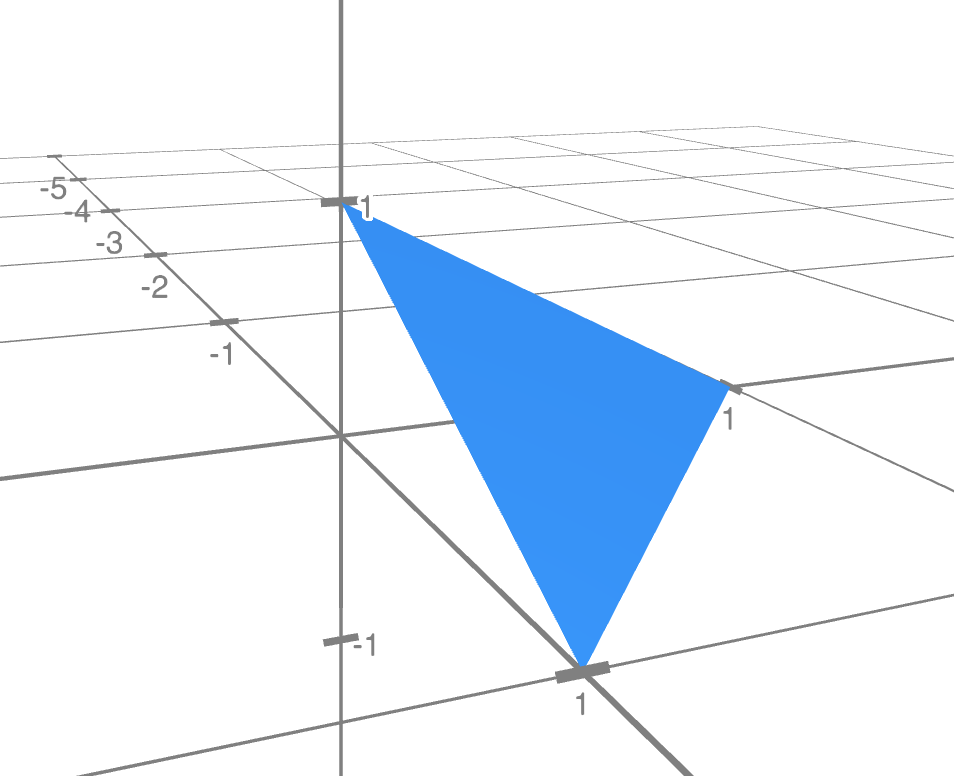

In [21]:

base64_data="iVBORw0KGgoAAAANSUhEUgAAA7oAAAMICAYAAADmBpkTAAAMR2lDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnltSSWiBCEgJvYlSpEsJoYUuVbARkkBCiSEhiNhdFhVcu4iADV0VUdzVFZC1oq51Eeyu5aEuKivrYsGGypsUWFe/9973Tr6598+Zc/5TMvdmBgCdOp5Umo/qAlAgKZIlRoSwJqVnsEg9AIEfQ8AAKI8vl7ITEmIAlOH7P+X1dWgL5YqLkuvr+f8qegKhnA8AkgBxlkDOL4D4JwDwMr5UVgQA0QfqrWcWSZV4CsQGMpggxFIlzlHjMiXOUuNqlU1yIgfiPQCQaTyeLAcA7VaoZxXzcyCP9k2IXSUCsQQAHTLEgXwRTwBxJMRjCgpmKDG0Aw5Zn/Hk/IMza4STx8sZwepaVEIOFcul+bxZ/2c7/rcU5CuGY9jBQRPJIhOVNcO+3cybEa3ENIj7JFlx8RDrQ/xWLFDZQ4xSRYrIFLU9asqXc2DPABNiVwEvNBpiU4jDJflxMRp9VrY4nAsxXCFoibiIm6zxXSKUhyVpOOtkMxLjh3G2jMPW+DbxZKq4SvtTirwUtob/pkjIHeZ/VSpKTlPnjFGLxalxEGtDzJTnJUWrbTCbUhEnbthGpkhU5m8DsZ9QEhGi5semZcvCEzX2sgL5cL3YEpGYG6fBNUWi5EgNzx4+T5W/EcStQgk7ZZhHKJ8UM1yLQBgapq4d6xRKUjT1Yt3SopBEje8LaX6Cxh6nCvMjlHoriE3lxUkaXzywCC5INT8eJy1KSFbniWfl8qIS1PngJSAGcEAoYAEFHFlgBsgF4o6+lj74TT0TDnhABnKAELhoNMMeaaoZCbwmgVLwJ0RCIB/xC1HNCkEx1H8c0aqvLiBbNVus8sgDjyAuANEgH35XqLwkI9FSwe9QI/4qOh/mmg+Hcu5rHRtqYjQaxTAvS2fYkhhGDCVGEsOJjrgJHoj74zHwGgyHO+6D+w5n+7c94RGhi/CAcI3QTbg1XbxI9kU9LBALumGEcE3NWZ/XjNtBVk88BA+A/JAbZ+ImwAUfDyOx8SAY2xNqOZrMldV/yf2PGj7rusaO4kpBKaMowRSHLz21nbQ9R1iUPf28Q+pcs0b6yhmZ+TI+57NOC+A9+ktLbAl2ADuDncDOYYexFsDCjmGt2EXsiBKPrKLfVatoOFqiKp88yCP+Kh5PE1PZSblro2uv6wf1XJGwRPl+BJwZ0lkycY6oiMWGb34hiyvhjx3Dcnd1dwNA+T+ifk29ZKr+HxDm+b91hccB8K2Aypy/dTxrAA49AoDx+m+d9Qv4eKwE4EgnXyErVutw5YUAqEAHPlHGwBxYAwdYjzvwAv4gGISBKBAPkkE6mAa7LILrWQZmgjlgISgHlWAlWAdqwGawDewCe8F+0AIOgxPgF3ABdIJr4DZcPT3gKegHr8EggiAkhI4wEGPEArFFnBF3xAcJRMKQGCQRSUcykRxEgiiQOcg3SCWyGqlBtiINyI/IIeQEcg7pQm4h95Fe5AXyHsVQGmqAmqF26DjUB2Wj0WgyOhXNQQvRUrQMXY5Wo/XoHrQZPYFeQK+h3ehTdAADmBbGxCwxF8wH42DxWAaWjcmweVgFVoXVY01YG/ydr2DdWB/2DifiDJyFu8AVHImn4Hy8EJ+HL8Nr8F14M34Kv4Lfx/vxTwQ6wZTgTPAjcAmTCDmEmYRyQhVhB+Eg4TR8mnoIr4lEIpNoT/SGT2M6MZc4m7iMuJG4j3ic2EV8SBwgkUjGJGdSACmexCMVkcpJG0h7SMdIl0k9pLdkLbIF2Z0cTs4gS8iLyFXk3eSj5Mvkx+RBii7FluJHiacIKLMoKyjbKW2US5QeyiBVj2pPDaAmU3OpC6nV1Cbqaeod6kstLS0rLV+tiVpirQVa1Vo/aJ3Vuq/1jqZPc6JxaFNoCtpy2k7acdot2ks6nW5HD6Zn0Ivoy+kN9JP0e/S32gztsdpcbYH2fO1a7Wbty9rPdCg6tjpsnWk6pTpVOgd0Lun06VJ07XQ5ujzdebq1uod0b+gO6DH03PTi9Qr0lunt1jun90SfpG+nH6Yv0C/T36Z/Uv8hA2NYMzgMPuMbxnbGaUaPAdHA3oBrkGtQabDXoMOg31DfcLxhqmGJYa3hEcNuJsa0Y3KZ+cwVzP3M68z3o8xGsUcJRy0d1TTq8qg3RqONgo2ERhVG+4yuGb03ZhmHGecZrzJuMb5rgps4mUw0mWmyyeS0Sd9og9H+o/mjK0bvH/2bKWrqZJpoOtt0m+lF0wEzc7MIM6nZBrOTZn3mTPNg81zzteZHzXstGBaBFmKLtRbHLP5gGbLYrHxWNesUq9/S1DLSUmG51bLDctDK3irFapHVPqu71lRrH+ts67XW7db9NhY2sTZzbBptfrOl2PrYimzX256xfWNnb5dmt9iuxe6JvZE9177UvtH+jgPdIcih0KHe4aoj0dHHMc9xo2OnE+rk6SRyqnW65Iw6ezmLnTc6d40hjPEdIxlTP+aGC82F7VLs0uhyfyxzbMzYRWNbxj4bZzMuY9yqcWfGfXL1dM133e56203fLcptkVub2wt3J3e+e637VQ+6R7jHfI9Wj+fjnccLx28af9OT4Rnrudiz3fOjl7eXzKvJq9fbxjvTu877ho+BT4LPMp+zvgTfEN/5vod93/l5+RX57ff7y9/FP89/t/+TCfYThBO2T3gYYBXAC9ga0B3ICswM3BLYHWQZxAuqD3oQbB0sCN4R/JjtyM5l72E/C3ENkYUcDHnD8ePM5RwPxUIjQitCO8L0w1LCasLuhVuF54Q3hvdHeEbMjjgeSYiMjlwVeYNrxuVzG7j9Ud5Rc6NORdOik6Jroh/EOMXIYtpi0dio2DWxd+Js4yRxLfEgnhu/Jv5ugn1CYcLPE4kTEybWTnyU6JY4J/FMEiNpetLupNfJIckrkm+nOKQoUtpTdVKnpDakvkkLTVud1j1p3KS5ky6km6SL01szSBmpGTsyBiaHTV43uWeK55TyKden2k8tmXpumsm0/GlHputM500/kEnITMvcnfmBF8+r5w1kcbPqsvr5HP56/lNBsGCtoFcYIFwtfJwdkL06+0lOQM6anF5RkKhK1CfmiGvEz3MjczfnvsmLz9uZN5Sflr+vgFyQWXBIoi/Jk5yaYT6jZEaX1FlaLu0u9CtcV9gvi5btkCPyqfLWIgO4Yb+ocFB8q7hfHFhcW/x2ZurMAyV6JZKSi7OcZi2d9bg0vPT72fhs/uz2OZZzFs65P5c9d+s8ZF7WvPb51vPL5vcsiFiwayF1Yd7CXxe5Llq96NU3ad+0lZmVLSh7+G3Et43l2uWy8huL/RdvXoIvES/pWOqxdMPSTxWCivOVrpVVlR+W8Zed/87tu+rvhpZnL+9Y4bVi00riSsnK66uCVu1arbe6dPXDNbFrmtey1lasfbVu+rpzVeOrNq+nrles766OqW7dYLNh5YYPNaKaa7UhtfvqTOuW1r3ZKNh4eVPwpqbNZpsrN7/fIt5yc2vE1uZ6u/qqbcRtxdsebU/dfuZ7n+8bdpjsqNzxcadkZ/euxF2nGrwbGnab7l7RiDYqGnv3TNnTuTd0b2uTS9PWfcx9lT+AHxQ//PFj5o/X90fvbz/gc6DpJ9uf6g4yDlY0I82zmvtbRC3dremtXYeiDrW3+bcd/HnszzsPWx6uPWJ4ZMVR6tGyo0PHSo8NHJce7zuRc+Jh+/T22ycnnbx6auKpjtPRp8/+Ev7LyTPsM8fOBpw9fM7v3KHzPudbLnhdaL7oefHgr56/Huzw6mi+5H2ptdO3s61rQtfRy0GXT1wJvfLLVe7VC9firnVdT7l+88aUG903BTef3Mq/9fy34t8Gby+4Q7hTcVf3btU903v1/3L8175ur+4j90PvX3yQ9OD2Q/7Dp7/Lf//QU/aI/qjqscXjhifuTw73hvd2/jH5j56n0qeDfeV/6v1Z98zh2U9/Bf91sX9Sf89z2fOhF8teGr/c+Wr8q/aBhIF7rwteD76peGv8dtc7n3dn3qe9fzw48wPpQ/VHx49tn6I/3RkqGBqS8mQ81VYAgwPNzgbgxU4A6Olw79AJAHWy+pynEkR9NlUh8J+w+iyoEi8AdgYDkLIAgBi4R9kEhy3ENHhXbtWTgwHq4TEyNCLP9nBXc9HgiYfwdmjopRkApDYAPsqGhgY3Dg193A6TvQXA8UL1+VIpRHg22DJOiTp7HliCL+TfT3h/S7idXmMAAAAJcEhZcwAAFiUAABYlAUlSJPAAAAGdaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA1LjQuMCI+CiAgIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjk1NDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj43NzY8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4Kec2WgQAAABxpRE9UAAAAAgAAAAAAAAGEAAAAKAAAAYQAAAGEAABy5hL6TmAAAEAASURBVHgB7J150GVFffd7GIeBiCC4sLuiEFxCiTiOqEx8jUZM0LhWNDplMBPjFlOkYrTKIqZiVSzzh5qYcolRkLi9yVsu4BoUSxQ0ruWKiCiCSBAFBGTnne+F353f00+fe8+99yzd53xO1X163z6/Pn36+/RdNty28wpcEIAABCCwNIEf//jH4ZRTTllTfvv27eE+97nPmjgCEIAABCAAAQhAAALdENiA0O0GNK1AAALDJYDQHa5tGRkEIAABCEAAAmUSQOiWaTd6DQEIZEQAoZuRMegKBCAAAQhAAAIQ2EkAocs0gAAEILAiAYTuigApDgEIQAACEIAABBomgNBtGCjVQQAC4yOA0B2fzRkxBCAAAQhAAAJ5E0Do5m0fegcBCBRAAKFbgJHoIgQgAAEIQAACoyKA0B2VuRksBCDQBgGEbhtUqRMCEIAABCAAAQgsTwChuzw7SkIAAhCYEEDoMhEgAAEIQAACEIBAXgQQunnZg95AAAIFEkDoFmg0ugwBCEAAAhCAwKAJIHQHbV4GBwEIdEEAodsFZdqAAAQgAAEIQAAC9QkgdOuzIicEIACBJAGEbhILkRCAAAQgAAEIQKA3Agjd3tDTMAQgMBQCCN2hWJJxQAACEIAABCAwFAII3aFYknFAAAK9EUDo9oaehiEAAQhAAAIQgECSAEI3iYVICEAAAvUJIHTrsyInBCAAAQhAAAIQ6IIAQrcLyrQBAQgMmgBCd9DmZXAQgAAEIAABCBRIAKFboNHoMgQgkBcBhG5e9qA3EIAABCAAAQhAAKHLHIAABCCwIgGE7ooAKQ4BCEAAAhCAAAQaJoDQbRgo1UEAAuMjgNAdn80ZMQQgAAEIQAACeRNA6OZtH3oHAQgUQAChW4CR6CIEIAABCEAAAqMigNAdlbkZLAQg0AYBhG4bVKkTAhCAAAQgAAEILE8Aobs8O0pCAAIQmBBA6DIRIAABCEAAAhCAQF4EELp52YPeQAACBRJA6BZoNLoMAQhAAAIQgMCgCSB0B21eBgcBCHRBAKHbBWXagAAEIAABCEAAAvUJIHTrsyInBCAAgSQBhG4SC5EQgAAEIAABCECgNwII3d7Q0zAEIDAUAgjdoViScUAAAhCAAAQgMBQCCN2hWJJxQAACvRFA6PaGnoYhAAEIQAACEIBAkgBCN4mFSAhAAAL1CSB067MiJwQgAAEIQAACEOiCAEK3C8q0AQEIDJoAQnfQ5mVwEIAABCAAAQgUSAChW6DR6DIEIJAXAYRuXvagNxCAAAQgAAEIQAChyxyAAAQgsCIBhO6KACkOAQhAAAIQgAAEGiaA0G0YKNVBAALjI4DQHZ/NGTEEIAABCEAAAnkTQOjmbR96BwEIFEAAoVuAkegiBCAAAQhAAAKjIoDQHZW5GSwEINAGAYRuG1SpEwIQgAAEIAABCCxPAKG7PDtKQgACEJgQQOgyESAAAQhAAAIQgEBeBBC6edmD3kAAAgUSQOgWaDS6DAEIQAACEIDAoAkgdAdtXgYHAQh0QQCh2wVl2oAABCAAAQhAAAL1CSB067MiJwQgAIEkAYRuEguREIAABCAAAQhAoDcCCN3e0NMwBCAwFAII3aFYknFAAAIQgAAEIDAUAgjdoViScUAAAr0RQOj2hp6GIQABCEAAAhCAQJIAQjeJhUgIQAAC9QkgdOuzIicEIAABCEAAAhDoggBCtwvKtAEBCAyaAEJ30OZlcBCAAAQgAAEIFEgAoVug0egyBCCQFwGEbl72oDcQgAAEIAABCEAAocscgAAEILAiAYTuigApDgEIQAACEIAABBomgNBtGCjVQQAC4yOA0B2fzRkxBCAAAQhAAAJ5E0Do5m0fegcBCBRAAKFbgJHoIgQgAAEIQAACoyKA0B2VuRksBCDQBgGEbhtUqRMCEIAABCAAAQgsTwChuzw7SkIAAhCYEEDoMhEgAAEIQAACEIBAXgQQunnZg95AAAIFEkDoFmg0ugwBCEAAAhCAwKAJIHQHbV4GBwEIdEEAodsFZdqAAAQgAAEIQAAC9QkgdOuzIicEIACBJAGEbhILkRCAAAQgAAEIQKA3Agjd3tDTMAQgMBQCCN2hWJJxQAACEIAABCAwFAII3aFYknFAAAK9EUDo9oaehiEAAQhAAAIQgECSAEI3iYVICEAAAvUJIHTrsyInBCAAAQhAAAIQ6IIAQrcLyrQBAQgMmgBCd9DmZXAQgAAEIAABCBRIAKFboNHoMgQgkBcBhG5e9qA3EIAABCAAAQhAAKHLHIAABCCwIgGE7ooAKQ4BCEAAAhCAAAQaJoDQbRgo1UEAAuMjgNAdn80ZMQQgAAEIQAACeRNA6OZtH3oHAQgUQAChW4CR6CIEIAABCEAAAqMigNAdlbkZLAQg0AYBhG4bVKkTAhCAAAQgAAEILE8Aobs8O0pCAAIQmBBA6DIRIAABCEAAAhCAQF4EELp52YPeQAACBRJA6BZoNLoMAQhAAAIQgMCgCSB0B21eBgcBCHRBAKHbBWXagAAEIAABCEAAAvUJIHTrsyInBCAAgSQBhG4SC5EQgAAEIAABCECgNwII3d7Q0zAEIDAUAgjdoViScUAAAhCAAAQgMBQCCN2hWJJxQAACvRFA6PaGnoYhAAEIQAACEIBAkgBCN4mFSAhAAAL1CSB067MiJwQgAAEIQAACEOiCAEK3C8q0AQEIDJoAQnfQ5mVwEIAABCAAAQgUSAChW6DR6DIEIJAXAYRuXvagNxCAAAQgAAEIQAChyxyAAAQgsCIBhO6KACkOAQhAAAIQgAAEGiaA0G0YKNVBAALjI4DQHZ/NGTEEIAABCEAAAnkTQOjmbR96BwEIFEAAoVuAkegiBCAAAQhAAAKjIoDQHZW5GSwEINAGAYRuG1SpEwIQgAAEIAABCCxPAKG7PDtKQgACEJgQQOgyESAAAQhAAAIQgEBeBBC6edmD3kAAAgUSQOgWaDS6DAEIQAACEIDAoAkgdAdtXgYHAQh0QQCh2wVl2oAABCAAAQhAAAL1CSB067MiJwQgAIEkAYRuEguREIAABCAAAQhAoDcCCN3e0NMwBCAwFAII3aFYknFAAAIQgAAEIDAUAgjdoViScUAAAr0RQOj2hp6GIQABCEAAAhCAQJIAQjeJhUgIQAAC9QkgdOuzIicEIAABCEAAAhDoggBCtwvKtAEBCAyaAEJ30OZlcBCAAAQgAAEIFEgAoVug0egyBCCQFwGEbl72oDcQgAAEIAABCEAAocscgAAEILAiAYTuigApDgEIQAACEIAABBomgNBtGCjVQQAC4yOA0B2fzRkxBCAAAQhAAAJ5E0Do5m0fegcBCBRAAKFbgJHoIgQgAAEIQAACoyKA0B2VuRksBCDQBgGEbhtUqRMCEIAABCAAAQgsTwChuzw7SkIAAhCYEEDoMhEgAAEIQAACEIBAXgQQunnZg95AAAIFEkDoFmg0ugwBCEAAAhCAwKAJIHQHbV4GBwEIdEEAodsFZdqAAAQgAAEIQAAC9QkgdOuzIicEIACBJAGEbhILkRCAAAQgAAEIQKA3Agjd3tDTMAQgMBQCCN2hWJJxQAACEIAABCAwFAII3aFYknFAAAK9EUDo9oaehiEAAQhAAAIQgECSAEI3iYVICEAAAvUJIHTrsyInBCAAAQhAAAIQ6IIAQrcLyrQBAQgMmgBCd9DmZXAQgAAEIAABCBRIAKFboNHoMgQgkBcBhG5e9qA3EIAABCAAAQhAAKHLHIAABCCwIgGE7ooAKQ4BCEAAAhCAAAQaJoDQbRgo1UEAAuMjgNAdn80ZMQQgAAEIQAACeRNA6OZtH3oHAQgUQAChW4CR6CIEIAABCEAAAqMigNAdlbkZLAQg0AYBhG4bVKkTAhCAAAQgAAEILE8Aobs8O0pCAAIQmBBA6DIRIAABCEAAAhCAQF4EELp52YPeQAACBRJA6BZoNLoMAQhAAAIQgMCgCSB0B21eBgcBCHRBAKHbBWXagAAEIAABCEAAAvUJIHTrsyInBCAAgSQBhG4SC5EQgAAEIAABCECgNwII3d7Q0zAEIDAUAgjdoViScUAAAhCAAAQgMBQCCN2hWJJxQAACvRFA6PaGnoYhAAEIQAACEIBAkgBCN4mFSAhAAAL1CSB067MiJwQgAAEIQAACEOiCAEK3C8q0AQEIDJoAQnfQ5mVwEIAABCAAAQgUSAChW6DR6DIEIJAXAYRuXvagNxCAAAQgAAEIQAChyxyAAAQgsCIBhO6KACkOAQhAAAIQgAAEGiaA0G0YKNVBAALjI4DQHZ/NGTEEIAABCEAAAnkTQOjmbR96BwEIFEAAoVuAkegiBCAAAQhAAAKjIoDQHZW5GSwEINAGAYRuG1SpEwIQgAAEIAABCCxPAKG7PDtKQgACEJgQQOgyESAAAQhAAAIQgEBeBBC6edmD3kAAAgUSQOgWaDS6DAEIQAACEIDAoAkgdAdtXgYHAQh0QQCh2wVl2oAABCAAAQhAAAL1CSB067MiJwQgAIEkAYRuEguREIAABCAAAQhAoDcCCN3e0NMwBCAwFAII3aFYknFAAAIQgAAEIDAUAgjdoViScUAAAr0RQOj2hp6GIQABCEAAAhCAQJIAQjeJhUgIQAAC9QkgdOuzIicEIAABCEAAAhDoggBCtwvKtAEBCAyaAEJ30OZlcBCAAAQgAAEIFEgAoVug0egyBCCQFwGEbl72oDcQgAAEIAABCEAAocscgAAEILAiAYTuigApDgEIQAACEIAABBomgNBtGCjVQQAC4yOA0B2fzRkxBCAAAQhAAAJ5E0Do5m0fegcBCBRAAKFbgJHoIgQgAAEIQAACoyKA0B2VuRksBCDQBgGEbhtUqRMCEIAABCAAAQgsTwChuzw7SkIAAhCYEEDoMhEgAAEIQAACEIBAXgQQunnZg95AAAIFEkDoFmg0ugwBCEAAAhCAwKAJIHQHbV4GBwEIdEEAodsFZdqAAAQgMFwCeo6krqp45f3JT34S7n3ve68pZnH3uc99JvHmrslEAAIjIYDQHYmhGSYEINAeAYRue2ypGQIQgEAuBFKiMxVn/ZXo1OXFaCrO8pubEqepOMsfu9YnuSZ8zbV6zI3LEobAkAggdIdkTcYCAQj0QkCbiVNOOWVN29u3bw9sJNYgIQABCECgVQIm8OJGquKrRGdVvNVbtbZXxVu5HFxjIdfEr7nWf3Nz6C99gMAqBBC6q9CjLAQgAIGdBLRhQOgyFSAAAQjMJ2BCy+dMxVl6SnSm4iy/uSmxloqz/Li3P8vEQfYw8WuusTMXXhAogQBCtwQr0UcIQCBrAtoUIHSzNhGdgwAEahJIic5UnFWXEp0Wpzz+bbtWRm6VYKqK92Xxd0vA7C/XhK+5Zi9zu+0ZrUFgNgGE7mw+pEIAAhCYS0APf4TuXExkgAAEGiBgoiOuqio+JToVZ/mPO+64uKppOCVeUnHTAnhGR8DmkVwTv+baXDF3dHAYcO8EELq9m4AOQAACpRPQAx6hW7oV6T8EmiNgm39fYyrO0k2M+tNPi1MeH29l5FYJiKp4X9b687nPfW5SP+LE08G/KgGbX6pHc0yX5jHzbIKCPx0RQOh2BJpmIACB4RLQAx2hO1z7MrLhEfCbcBtdKs7SUqIzFWf5vZsSnak4X6YvvzGQa4JErp365trvvnjR7nIEquaZhLDNMXOXa4FSELidAEKXmQABCEBgRQJ6aCN0V4RIcQg4ArYRdlETb1V8lei0+KoTUVVataGuio/7NIawcef0dwzW7neMNtfk+n+2IIL7tUuprSN0S7Uc/YYABLIhoAcyQjcbc9CRjgjYhtQ3l4qzdBOdCpvwTMVZfu+mRGcqzpfB3y4Bs7VcL0g4/W2X+1hrj+ebOGgdsbln64G5Y+XEuNcSQOiu5UEIAhCAwMIE9ABG6C6MjQItE7CNoW8mFWfpVaLT4k2cWn7vpjaXqThfBv8wCdgc4/R3mPbNcVQ25+Sa8DXX1iFzc+w/fWqPAEK3PbbUDAEIjISAHq4I3ZEYu8Fh2uYsrrIqXvlSotPilF5XjNqXw6gMJ3CiwNUmAZvTck2AyGXutUmdukWgau5prTTxay7EhkcAoTs8mzIiCECgYwJ6kCJ0O4beUXO2SfLNpeIsPSU6U3GW37upzVYqzpdpwq/x+NM3xEcTVKmjDgG7l/z8Q4DUIUeeVQnY3JPr12jVyxxclW4+5RG6+diCnkAAAoUS0IMSoduP8WyzErdeFe83NP70syre11slOqvifdmS/MbOTn1t0ze0cZZkkzH11eafXN2Xmn/mag4yD8c0G/oZ67w5qF4xD/uxzaKtInQXJUZ+CEAAAhEBPRQRuhEUF7RNg4sKqThLT4nOVJzl925q85GK82XwzyZgtvKnbpz6zmZGavME/Dy02u2fMApznxsV3LYI2BxU/fLbP2DMtTloblv9oN76BBC69VmREwIQgECSgB54JQtd//C2AabiLC0lOn2c8vnTUisnt2oDUBXvy+LPh4Dmh15mdxMc2DEfG42hJ7ZO2Vzk9HcMVu9+jDbPfMtxnK2FFu/XQlsfVd7H+/rwt0MAodsOV2qFAARGREAPtjaFrj04Y6RV8fbAtfwmOn28xVke76YexKk4Xwb/uAnYXOTUd9zzIJfR+/lofUJsGInhu2Z/G2kctvjUMzEVZ/nNjZ+HcdjymWvty1X9movmWllzrQxuMwQQus1wpBYIQGDEBPTwioWuvbWzCkvqYerjVK5KjFY9EO0zlWq7Kk9Vf4iHQJMEbGOH8G2SKnWtQsDmJGJjFYrNlzW7+JpTcUr3z0gTi1ZukedlLs9HP057ftu45Fo/zbWx4tYngNCtz4qcEIBAwQT8A8WGkYqzNP9AVZw9fCzd4uQqb1xXSmx29bBSX+yhaYK7q7Y9H/wQ8AQ0L/Wye8s2csxNTwl/1wQ0J3XZmjkJ7PzD2mkk1rrGy2LjsMXbfa6w7nVdqbhJgvsTrwdx2GUdtNe4yhU3vwextVMAxsqnrvERunVJkQ8CEGiVgC3qcSNV8f6BqTKpB6mPj+utejhUxcflfVh9jE90t2/fnsUDSH2LT9WWGaMfL34INEHA7u14fqpu5mgThKljWQI2N+V6kVGawLBxeA6pOKX7Z6oXVVbWnrEWlpu6T1Nxvgz+1QmYDUufn6uTmF8DQnc+I3JAAAJ3ELDF1QNJxVm6f3Aqru7D08qnHpipOMvflysGuQpdz8RsZScXqVNnnx8/BLomoDmql60dJixyvO+7ZkN7/ROI11DrUVOnv1a/1RuHLd7uDwvHz9aUKFXe1H2UirN6ccsiYPNFbmqOmK3NLWt0y/UWobscN0pBIEsCtsj5zqXiLD21ECqtKt7KmVu1WFbFW7mhuWJcgtCNuavfXvQqfWy2i5kQzouArV+c+uZlF3pz+8/LiIPNUT035bc11ItN/0yNRanq8HkVtsvqqgpbPC4E5hGweSpX89HPQ/ltrpk7r75S0hG6pViKfg6CgC008WCq4v3D0cr4xcnHmT92U4tWKi4uR7g+AdmvRKHrR6gxmJhQvOYI88QTwp8DAVsrba5qjWzqNC2H8dGH9gjY3LEW4rDFx8/d+JmrcOqqWi/tn4lWhvlqJHBzIWD3glwvgocggBG6ucwy+pENAbvhfYdScZY+76GofPagVD16GPoHZerhmIqz9nDzIyC7li50PVWNJxYSzElPCH9OBDRf9bK12DZnzNmcrLRYX2TP+ErFKY/ZXX571spvl3/eWpzceH7EYZ+3Kb+Nwear9dfmbKpfTbVNPRBYlEA8X335UuYsQtdbDX8RBOzGiztbFe8fglbGHi4Wlqu4qiv1AEzFVZX38WedddbkwcznIz2Vsv2ae0MSut4adl/ZqQTz1tPBnyMBP2dtrecUrV1LGXNrJQ5bfPw8NvtYutzUszj1vE3F+XpK8hsvW2et78xbI4GbGwGbs3J1X/t7WX67P83tq/8I3b7ID7hdm/zxEKvilW/Zh5+1kbqRUnGWPwdXgleX+pl7Xycd5U8lAc3toQrdeNAaq23G2ITFdAjnSkDzVi971thGbIxrrzjEVypOeYxXnN/CKVGqtBTXVJzVg7uegNnE5q0JCZu7KgHT9dyI6ZeAzVv1wvYKfc5dhG6/86G31v1EtE6k4iwtftjZpLV0cxWfuqoW46r4VB1DjRN3Y79t27ahDnPQ45L9xiJ0vSE1bj3IbD3gtNfTwZ8zAVtzbSOmvub6jxvrq/GMwxZf5zld9xnNs9mo5uea/eV6m+c6f/MjSI/6IlA1d9UfrU227pjbRD8Ruk1QbKEOmwxx1VXxfrGzMrb5tLDcqoec0lITKxWnvFzNE5BtTTQgeJvn22aNst0Yha5nKgZ62VqE6PV08OdOQHNX16rC1+qZVHbHn1Sckuxe8Xm9v+p5nXoup+J8XfiHT0DzTC/NK9v/ybW5Ye7wSTDCEgnYOhnPYY1llXk8SKFrsLyhfZxu9iZueF+ntZWKs7T4oWYLkaWbq/jUVdXnqvhUHcTlT0BzyDZbiIX87aUeymZjF7reUrYO+nmsdNYqTwl/DgRsrlpffFjPbAvHczf1/K777I7rsrZxIdA0AZu/cv0eVHNV85C52DRx6muaQGoO2/pr81htVs3looXua1/72qV52ls8fAV+EfDxsb/qYaZ8KdCpuLhOwhCICejm9kKBeRQTyicsWyF0q+3h57I9mJjP1bxISROwDY9PTcUpvc7zPPUsT81Li7O2tC6rrNqwvYTl8X3DD4FcCWgu6+XvE1ub1Wfmc66Wo1+egK3J8VxWHpvPvQpd66DvtPxV8f6GnJUvri8V3r59+5pobuo1OAhkRED3A4I3I4MkuiIbIXQTYBJRNp+9UGD9TYAaQFT8LI/DNsT42W5zw9LlKi51peZOKi5VdtU4G4+tz6rPNldd9WHVMVAeAkbA5rNcf08yp40QbkkEbD7PFbqW0Q8uFWfp/uawuJRb9dBS3tQDIhWnjaX1JZVuafYfV98PPgPpaeAvhQA/TZSnpbTWIHQXt42t0SYUeKv+4gybKmG28PWl4pRe5zlf9YyPn9Vx2Ldfol/M9PKMbA8ytLGWaB/6vDiB1Jw28avamNeLM6VEdwQ2vPvd776tqrm6Dyorn9tk182pzaf6FZ/gWp9xIVAiAX6aKC+r2Vrje6U1R2sPVz0CYqjLi16FYSgK6y/jZSlx2OK94LK42F3kWY89Ynqzw2YXm9fKbSIBlrPZkZovAZvXcv0aY3NbPWd+52u/MfVs7olu6TB0EyJ2S7ci/a8ioPmtDZQeLrxLoYpS+/G2zviWELqexuJ+m9tWsuTTXo0lvlJxyuM3jXEZC9cVpmw0jVhermyvl7c1p7552YjeLEcgNbdVE/N7OZ6UWp3A4IWuEOnGQ+yuPlmoIV8CmuN2YlCyIMiX8Oye2RrjcyF0PY3V/H5+q6a257ja81cctjQvVCwuduuKUpVDmMb0xhG2+WX/tNS8QhiMw/ZjGKXNb7l+zeT0dwzW73+MoxC6wqwbDLHb/4SjB+0S0DxH8LbLOFW7rS8+DaHraTTnF2tdfp5PItwfy+OiJl6/yYrTLFxXmCJKjRhu0wRs/tocV/0mCph3TdOmvr4IaJ7rFa/L/JOnL4sMr13Nr9EIXZlPAzax2/aJwPCmCyMqiYDmum2SmOvtW87WFt8SQtfT2OUXK3/FYUuLNz8WH7sSAMqrekwE2EbJ57U0H4cfAqUQ0PzWy98XNs+Z26VYkX7OI6A5riue6/aPHqUx30Vh+JfNBRtpHFa8Xw8tn3c1b0YldDV4gZLY1cVGdIKBPwMmoPmO4G3fwH5dsdaGsL5oXPGVilOe+IGjfPGGRA+d1BXnU55UXKqsj1Obmu8mfvknj6eDf0gE7D609V1jMzGwzL0zJDaMZXgENN/1ip8z/LMnT1vb+qTeeb/1Nraj8vh1q85ewee3elPu6ISuIAgoYjc1HYgbMgF+mqg96/o1xVrpQ+iqH/6Kw5YWP2QsPnbrPGxUpu4DJ66/zbDG7kUAordN2tSdAwHNeb38/Y0QyMEy9KENAprruuI5b//wUVqOzyb1K9fLmFr/4rDi/fpi+byb2jfEdojDvnzT/lEKXUGU8RC7TU8n6iuBgP00kfrKNzU3YzG/nliN84Ru6gGSilN98YNF+eIHRerhorJxvqo4xQ/1Mq4mfNn8D9XSjMsT8PNe64PWEea+J4R/iAT8vPfjG/rct3HbmOOw4uO9hOU1N7WPiPcQcdjK5uqOVujKIJoEiN1cpyb9apuA5r+9zRPBO592/NCIwyairKZ5D4PUA0Vl43Jx2OrHXZ6AzX2rQRsgOBsN3KESsDXLr1VahzT3mf9DtTrjEgGb+3Il9uwfPzb/laeve8D6pj7oisOKiwWq8sT9Te0pfB7vV51juUYtdGVkTRbE7limO+NMEdA9YBufoWz4Nab4SsUpT50HiPLNeoh4hsqra96J7u25+Ns3AbOdbXyGcg/0zZX2yyCg+a+XXweHfvJVhmXoZRcENPd12R5oEtj5p+49YOWtXBxWvL+3LJ93Z+0tLN9YRaqNfxV39EJX8DQxEburTCPKDoGA7gNb7Lve7McPhzhsfFMPDOWNHwKpB4fqiPNVxVl7dV31wdYQK4PQNRLluLKjXjbPur4PyiFFT4dKQPNflz0L5Nd6qrUztX4qnQsCJRKwuW59t7Ct/xa2eW9h5be41F7D0qzeOGzxuN0QQOjewVkT2DaqbFC7mXy0kicB3Qu2yUlt9P1ibyNIxSnNHhg+X2rRTz0sVCbOG4et3r5dv35YX1hHjESZrs1pfy9oJLnOwTIp0+sSCOhesPvA+lv3xMvy40KgKQK2Nlt9cVjxdfYeqX1HvL77sLUT3wv8I8gskaeL0I3sIrGryaxFnM8tRnAIFknAFmfrfBy2+NSDwdLk2oKfejj49FQZHzdEv5jaP8psfAhdIzEMVzb2G5zUP4GGMVJGAYHZBOwZEt8PKmXPidk1kDpWAjZ3bPxxWPGpvYifV3X2ID6/tdWGa/2X6/tt4ldtdtWXNsY3hDoRugkrInYTUIjqhIAtmr6xVJzS/aKqsPKlFtQ6DwWVT5VVvC5+muh2DlV/xR6hW0VnePGyd7zJn3X/DI8AI4LALgK6H3T5e8I2+twXEzSD+GN21mC83w/O70uUJ7Z/aj8S54nDvv5S/MbH3xPqO/dF9xZE6FYwR+xWgCF6DQFbzCwyDlu8X/wtLvUQUFqdB4Hy9fEwMMGrPvKOB1nh9ku2ROgajXG5ds/bhoa3dI7L/ow2TUD3hV7+2ce9kWbVdqytUdZOHFa8t5PCyhPvMersTeIyqovrdgLGXW7Mm3ujvVmC0J3BFrE7A06BSbbI+K6n4pQeL0LKl1rAUwu/yqfypuKUt8RLPPzGfkhjW8Ye4oHQXYbcsMrYemL3htYH3Rtjvz+GZWVGswyB+N5QHdwf80kaN8sZhxVfZ7+S2qv4dcn7rS3cbgiYTe25Ya3a/aEw9jEqi7sI3TnMELtzALWYbDe/NRGHLT5e5BWvvKmFIbXYK3+cNw4rD9d6AuJsi/OYP7MoDgjd9fNj7DH+/hCLMd8jY58LjH8tAd0buuz5MQns/DOUky0bn40rDis+3rsoT7z3SO1Z4jxx2NrELZeAzRe58TwZyj3SlXUQujVII3bnQ7Kb0udMxSk9vmktX7xYpxZ4lY/zVcUpnqsbArKhbVjGuJnX+BG63cy1Ulvx94jGMMb7pFTb0e9uCOge0cvvEfrY1KsP/orDSvN9VFh54r1Jag8T54nDqosLAlUEbC7afsvyaa7ZXDLX0sbuDlboXn755eG2226ba9999tknbN68eW6+oYldu1ls4HHY4uPFXPHKm7qRUou68sd547DycA2DgOaGLcBj2shr3AjdYczhLkah+aLL3ysKszaKAhcEbicQ3yeKtQ191b1iZYxhHFZ8vK9Rnri+1H4mzhOHrU1cCHRJwOa43Hhu9/GPoi7HXqetQQrds88+O5x55pl1xh8e9rCHhSc96UnhTne609z8KbFrE8wKW1gLYFOLoNVpbchNxSk+nuSWL+5LahFX+ThfVZziuSBQRUDzzm/iU/OqqmyJ8RovQrdEy+XRZ3+/qEdj+idRHhagF30TsL2K9SMOK177m1S8ldFzJrW3iZ8/cdjK40JgSATsXrG9mI3N/lmk8BjuhUEK3dNOOy1ccMEFZtOZ7mGHHRae9axnhU2bNq3JF29abcKsyTQjoMlj/0mpKhuLUlWnvKmJl1q8lT+VNxWnvFwQ6IPAGL6pWfdtvGbwO7p9zLby29Rc0sbEngWI3vJtOvQRaK76Kw4rLd7v2Pz25VL7nHg/E4etLb+Zt418nNe3hR8CYyRg94vc+J40zTK0+2aQQvftb397uPTSS4OMdcQRR4Q999yzcj5fe+214cADD1yTrgngF801iTUDajtetFOTJxVXswmyQaAoAkMWvFozELpFTcciOhs/i4a6ESnCGAPtpOaYv+Kw0vyG2NLjvUu831G5OE8cVp6mL+tfvIfj3mmaNPUNiUDVfWP/NNJYu7h/22BanNA1YxiMOPyb3/wmfPnLX54k3/Wudw162WV5Y2OlFuh4kbQ66rpaVPmd0bq0yDcmAroP7f7SfRLfjyWy0JgQuiVarpw+2/PL7h3bgAzh/inHCvn01OaD9SgOK94LVIUtTzxnUnsgn8f7VU9pl8atl3jI1XgQvqVZkf52TUD3ii658VpS0v3TqtA1SBNSd/xJxSkphmj5UgtsalFWHcp78cUXTz+f+7znPS/c7373U9LCl06fUpfvjzYc6ieiNkWKOAjMJqB7xzbtpQtejQWhO9vepDZLwN8/qrn0e6hZOnnXJtv5Kw4rLbUn8vsP5UntheI8cVjlxn4Zb3v+GA/uISOBC4FqAlX3j/3zVSVzWnfWCF3rvA0vDlt8vAAr3vLGg0stxMof56uKU/wi1znnnBM+9alPTYq8/OUvD/vuu+8ixRfOq82txo7YXRgdBSAwIaD7xzYcpW40NAaELhO6LwL+HlIfSr2P+uK3SLtibZf3W1y8P7I88Z4ntTeK88RhawO3eQKyk17efrqPdGGH5nlT47AI2DoX30MaZd/30YZ3v/vda36DJ7X4qqPxjR6HlSeH69Of/nT44he/OOnKS1/60nC3u92t9W4hdltHTAMjIKAFslTBq74jdEcwSQsYor+P1N2+Nxm5IBMXf8VhpXmRo7Dlifc7qX1SnCcOqz6ucgiY7fVMkl/2lN3l6sUFAQjMJ+DvI+WO7yXFtX0/rTnRVYOlXx/5yEfC17/+9ckwnvCEJ4S73OUuQb+pe+GFF4bddtttslAdfvjh4aCDDmp0qHqrsxZEbSr4bG6jaKlsZAS0EJYmeNVnhO7IJmoBw9W81GX3k/x6RrW9sVA7TV42DqszDiu+jkhFoBpB3EUJ2Jzz95Lq4B9Ji5Ik/9gJ2L0kN1632/hn0uCE7vvf//5w3nnnTeaRhO2tt96anFMHHHBA+P3f//3kZ1ySBWpEInZrQCILBBYgUMo9pQUbobuAYcnaCwHNU23U5Ursti161Y6/4rDS4o2O5YnFOCLVk8SfAwHNVb00h+VqzraxUc9hrPQBAm0T0D2ky/6ZFN9TSoufC4qbdw1O6L71rW8Nl1122bxxT9Of+cxnhiOPPHIaXtVTysZ81XFSHgJdEtB9ZRvitjfny4xLCzJCdxlylOmLgOasbSjUh/hkyjYd1r84rHi7J+M88WYEkWqEcIdMwO4Rf19pvPG9NWQGjA0CTRKwe0pu/LyxfyqpvfiZ4/swKKF75ZVXhje96U3T8entyVu2bAn3vOc9w1577RX0m7kCpU2zfobIrhe/+MXhHve4hwVXdk3sCvz27dtXro8KIACB2wlosbNNRE6CV/1C6DJLcyFgmwPrTxxWvN80pNKVR8+weSJ11gZDdXBBYMwEdG/ZM8s4IHyNBC4EliNgzyy7txS2Z1F8f2UvdHU6+4lPfKKSxAknnDD9ZuXrr78+6FuXL7roorDffvuF448/PmzcuHFd2Z///Ofh3//938NNN900STv44IPDC1/4wnX5VolA7K5Cj7IQmE3Abx5yELzqD0J3ts1InU/AHt6WMw4r3gtUhS2PPeQVp2ueQFWeuIzirD7bQCguh3tM/eCCQOkEdH/ppftYru5BO5lK3Y+lj5f+Q6ArArqfdMn1z8nshe6ZZ54Zzj777EnnU39+7/d+LzzqUY9KJc2M+/73vx8+8IEPTPO86lWvCrvvvvs03IQHsdsEReqAQDUBLWi2Ie9zM65+IHSr7TSGFM0Bf8VhpfmHr8KWJ97gLitSVWfTl/qoe0yu+tnnfdb02KgPAn0TsDXAnmPWH91nuuK1wdJxIQCBegSyF7pf/vKXw8c//vHK0TztaU8LD3nIQyrTZyW89rWvnSb/2Z/9WePfxKzKEbtTxHgg0BoB24yrgT424mofoduaeVuv2Dabasj7fcNepPo88UY0J5Hq+9+EX+P2G3I2401QpQ4IrCWg+0wvTn3XciEEgWUIZC909a3JP/zhD9d9e/KGDRsmPxd02GGHBfmXubzQff7znx/ue9/7LlPN3DKI3bmIyACBRgj4jbgER1c/9aV2EbqNmHChSsTdX3FYaV6gKuzzeJE6ZIGqcTd9GcdY+HqmTbdJfRAYI4HUvSYO/KNpjLOBMS9KIHuhu+iAFsnvhW7TX0gV9wOxGxMhDIF2Cdg9p81A24JXGxGE7mL2tM2blYrDiq8SqbGYQqQaxX5csx1vce6HP62Oi4C/3/zIEb6eBn4I3E5gUEJXG1stAPpyKX12d9b1y1/+MvzzP//zNMurX/3qsGnTpmm4DY9tvLVJ49uY2yBMnRBYT0D3nQkmbQRikbS+xOIxWnfGJHRtoyVS3m/kjLeFfZ6YPyLVKA3Hlb0RvcOxJyPJn4DuOb209srVOqu1Va5eXBAYK4FBCd03v/nN4Ve/+tXElk95ylPCUUcdVWnX008/PXz1q1+dpOunh0466aTKvE0mIHabpEldEKhPQA9/e5tl04JXdZcgdNVPf8VhpTUpUtlgedrj9Pv7TgQ4dRrnPGDU3RKwtd2eedY695+RwB0LgUEJ3c9//vPhM5/5zNR2OjVNbbQkcCV07dJPC+kUuKvLxK7aq+pjV32hHQiMjYDfeDcleFVnl0L38ssvD6eeemo45phjwmMf+9g1JvT9sM1OvA5yiroGGYGOCNh89Jvvpu7BjoZAMxAoloDuP7049S3WhHR8CQKDErr6HV39Pq42gXY9+MEPDkceeeTkd3V/9rOfhe985zvhggsusOTwuMc9LjzmMY+ZhrvyIHa7Ik07EEgT0APfNtyrbrZVlxeYatH+iaU0f8VhpcWnqFu3bp287Wzz5s2+6NT/0Y9+NHzta18L97rXvcILXvCCabw8qj8WtmsyEIBAJgQ0V3UP2pxd9T7MZFh0AwJFENB9p8ueg5PAzj+6D3XxHJlg4E/hBAYldGULbRg/9KEPhSuvvHKuaY499tjw+Mc/fm6+tjIgdtsiS70QqE/ANtsqEW+0bSNgtcVhxZtITaVZuUXcBz3oQeEZz3hGZZFLLrkk/Nu//dskfd999w0vf/nLK/OSAIFSCPj7UH1ms12K5ejnUAjYMwzhOxSLMg4RGJzQ1aCuu+668O1vfzuceeaZ4cYbb1TUmmvPPfcMJ5xwQjjiiCPWxPcRQOz2QZ02x0DAHto21jiseBOp8qfSFd/1Nesb4L/3ve+FD37wg2u6dPLJJ68JE4BA6QR0L6Y225wwlW5Z+l8aAd2LeulZKVf3IF9yVZoVh99fzU27vF9xgxS6Nli9lVknuxK7eulLp/bYY4+w9957T36D1/I17Wozuttuu4XDDz+8VtWI3VqYyDQSAvEiFYeFwQtUhX2eeDM86/OoKhdvqFVfX9fuu+8eXvWqV61p/uyzz578025NpAsgdB0MvIMjYPe2v0/jd14MbtAMCAKZEkjdj+oq78DI1GCFdcvml7rt/Qr7fZ9P83u+eL+ntEELXYHp+nr9618fJLB17dixIxx44IG1uoDYrYWJTJkT8IuPuhqHFecXqziPX7CUFi9aiovzxGHlqXupf/Fna+uWbSOf3m3yN3/zN9Oqr7jiivCOd7wj3HDDDdO42IPQjYkQHjIB3bMSvXJ17yN6h2xtxlYCAbsn1Ve7Lzn1LcFy7fRRc8Au77c4vwf06X4vF+/9fJr3W52zXITuLDoLpn3yk58M55577rTUX/zFX4R73vOe0/A8D2J3HiHS2yTgFxzv921WLVDKEy8+8UIV54nz+3a68mucOQldvePkla985XT4v/nNb4LWle9+97uTuFtuuSXceuut03R5ELprcBAYEQHdv/FJr4afw9oyIjMwVAisIWD7B/8PKWXg1HcNpuwDZkd11Put46n9oF97c9kDInTNYiu6mgTxhvlFL3pR2H///ReqGbG7EC4y7yQQL0BxWJD8gqSwz+MXJqXNW5yUJy6juBIvcYjv21XHccXGQyZV3O2WixeuSh95eM1rXjOz3Pnnnx/e+973TvLoW5n/9m//dmZ+EiEwBgK6l/Xyax2nvWOwPGPMnYDuS13+n1IKI3xFof3L+Ksl71fYr5c+ze/x5u0JfV7VmduF0G3IIv/0T/8Urr322jW1LXqia4W92NVCsG3bNkvCHRgBv7BoaHFYcX4hivPEC8y8BUnl4zKKG/P12te+tvHhf2yfk8K+N18UHnj9OWFRwfvc5z43HHbYYZV9uvnmm8PrXve6STpCtxITCSMmYOuoP1FC9I54QjD07AjoHtVL+xu5ti/hPq02lTjZ5f2K8/tEn2ZclSfeH/o071feIV0I3QasecYZZ4SvfOUr62p6yUteEu5+97uvi68TgditQ6m/PH4hUS/isOL8wpPKEy8s8SKkMnGeOKw8XKsRaEPonrd5a7hgj0dNOibBu/Xa/1u7k/rJoD/90z+dfHleVSHrM0K3ihDxENhFQOtzLHqVynq6ixE+CPRJwPZQYzj1tbGKt/cr7PeNPs2vVfFe0ad5v+rjGvi3Lndh4M985jPh85///KSpRz3qUeGLX/zitNmXvexlYb/99puGF/UgdhclVi+/XzxUIg4rzi82qTx+MYkXHeX36amw4rjyIGCisene6FTXXxK8+918cTj6kI2Tl9L8PPF+Xy7ltz4jdFN0iINANQGt934zrfVb994i91917aRAAAJNELB9md2rCusezeV+tf5prN5vY/d7SJ/u15l47+jTvN/qxF2OACe6y3GblPrf//3fyTei6q2ED33oQ8PDHvaw8OEPfzj86le/mqSvKnRVCWJ3gnL6xy8YiozDivMLTJwnXjzihUb54zxxWHm4hkPARGM8Im/3efNE89AeyFaPP9W1OHOPOmS3sGPL5nD0oRstaiHX+ozQXQgbmSGwhoA9P/y9y1sn1yAiAIFsCOh+1Ut7PLn2jNY9q8vCi3RY9djl/Yrze8k4zbcV7w98mvdbO7jdEkDorsD77W9/e7j00ksnXzj1h3/4h2GfffYJ73vf+8LPfvazSa1NCF1VNASxGy8ScVjj9IuKwnGeeMGIFxeVifPEYeXhgoAnoHm26jxRHfGXWqnOf/3V031T6/zLCl6E7jqUREBgJQL2vJHotTUB0bsSUgpDoFUC8T2rxvTcjfeGfm9pZSyvdTAuE6evukewdnC7J4DQXZL5Rz7ykfD1r399UvrpT396ePCDHzzxv+td7woXXXTRxN+U0FVlVWLX37TKF4eb+CKruM44rHb9QpLqh18kUguKyvg83q80LgjkTED3RCx0t2/fHj516YHhnV+6aW7XFxW8CN25SMkAgZUI6J6ORa8q5Nm0ElYKQ2AmAb+/9H4V8vtMn+bvSdtfKq/PY/+08nlndoTEwRBA6C5hyu985zvhP//zPycljznmmHD88cdPa3nPe94TfvSjH03Cywhd3Zh2c/qbWhVa/LSxGh5ttv2VqsO3E6fHi4ItIr7OOE8c9nnxQ2CIBHTfpISu7oUtb7ym9pDrCl6Ebm2kZITAygR0f/u3N6tC2zivXDkVQGBgBPw+0vttmFV7Tr93jPeaPs37rc4q19pP3b8qs0hdVW0QnzcBhO6C9rnyyivDO9/5znDNNddMfgLkj//4j4N++9Ku97///eG8886bBJcVuvGG2epexvU3cbxwqD6fngov0yZlIDA2AnqYxvet/smk++vt59xQ61Q3Znbilk1hx9bNcfQkjNBNYiESAq0T8Btn+XWPI3pbx04DPRCwua6mvd+60qVgtTZXdW0cJnwV1j2s/bFcvbiGRQChu9Oel1xySbjlllsmr9tuu21qYX3Ry8EHHzwNy/Nf//Vf4dvf/vYkLiVkP/CBD4Tvf//7k/SnPe1p4S53uUuwG2sSeccfv0AoKpXH51/Wb5vtZctTDgIQmE9A92+V0FXpRU5149ZSghehG1MiDIF+COje5y3O/bCn1XoE/P7S+1Xa70XjNC/64oMSn+b99XqUVy6NWy+xkGvj0T+wdFk4r17Tm7oERi90P/rRj4avfe1rlbyOPPLIcI973GOSfvHFF4cLLrhg4r/rXe8a9NJNUXUdeOCB4YEPfOC65Pim8WHVF2+Y11WwM0JlrG35qxYhX3eqHuIgAIFmCJj4tNpOPvlk8y59qmsVfOkVe5l34lpbfOvyGiwEINArAT2TvejllKhXcwyucdvzaWDerzCCVRSauYwtp77N8Oy7lsEIXZuYBjQOK94vBAqn8ijeX0ccccTkW5VvuOGGcO65506TTjjhhLDHHnsEpW/YsCHceOONQW9rPu2008Kvf/3rST59dvfwww8Pe++997RcHU/cryqxqnwmivWfpya+eKpO/8gDAQisJ2Di01K80FXcKqe6CF2jiguBMgjo+WwbZesxb3E2EuN14/1dHPb7VJ/m94HxwYZo+nTvHy/pZkcuW+jFqW+zXLuoLQuh629mDToOK87f/Kk88Y09byFQHSpzxRVXhHPOOWciUvX2ZXvrsj53u++++4YnP/nJk8/gqk8mKlV2kevQQw8NT3ziE9e9DXqROqry+n4hdqsoEQ+B9gnME7rLflZXPUfotm8/WoBAWwRsT+NPexG9bdHupl6zqVrzfmvd71l9ut+rztun+rxWL24eBMymqX9mqYfYLg87qRcrCV0ztA0nDive3+wKp/L4CZG68VXO5/F+pXVxqd/LCl2d+D71qU8ND33oQ1vpqu8bYrcVxFQKgbkE5gldVbDsqS5Cdy5+MkCgGAJ6ZseiV53vY29TDLSWOur3pN6v5vz+NU7ztor3rT7N+1saAtVmQMDmhwlfhWV7zQ25enH1Q2DDhRdeOPn2JTOS74a/yRUf54kNF9/sKhPnicPKU8J11VVXha9+9atBroRrfOk0WGk//elP1yTpM7oHHHBAeMADHhAOOeSQNWlNBmQbE+KI3SbJUhcE6hGoI3SXPdWtErp3v/vdw0te8pJ6HSQXBCCQHQE9u21zbJ3jtNdI1Hf9/tT7VYPfy8Zpfk8a72F9mvfX7xU5x0xAc00vzT+5Nod0f+uy8JgZdTH2De9+97snQje+wVNGGLtRbr311sk3M2/cuHGNbRR/0003Td72fOqpp4bLLrtskq6fHrrvfe8bNm3atCZ/WwHdSIjdtuhSLwRmE6gjdFXDMqe6sdD9+Mc/Hr71rW+FY489dvLyPfvz/7wu7NiyORx96Np1yufBDwEI5EdAz3C9/MZ4bKJX47fL+xWHYDUyuCUSsPls/9hSWLqKU992rbnSW5fb7VqZtfufH3rxi188/cbmrkajGwex2xVt2oHALgJ1he4yp7pHHbJbeNszfmtXYzN8JqRVBsE7AxRJEMiYgN8U24a4lJMg67vwer/hRrAaCdyxE9D9EQtfMSnlXi/Bfgjdhq10+umnT97irGpf/vKXT77QquEm5lanG8fErv5bpN/S5YIABNolUFfoqhcmRhfpUV3hGtddt9wifSEvBCDQLQHbEMvVc72LjbDassv7FefFqsI+Xf2za967BX1eK4MLgbES0H2kl39Xh1h0cb8PlTlCt2HLeqH7spe9LOy3334Nt1CvOt0oiN16rMgFgSYILCJ0lznVtT6euGVT2LF1swXXuLHIXZO4MzCrbJyXMAQgkCcBPd/tFMh6qI1wlWhUfru8X3FesMZpvj4EqxHEhUB3BOyetPtdYd2XvN25vg0QuvVZ1crphe6LXvSiyW/w1irYQibdEIjdFsBSJQQSBBYRuio+T5QmmmgsCsHbGEoqgkBnBGzTqwbNb0LVwtoEm986Nkuw+jTvt7K4EIBAXgR0f+vFqW89uyB063GqnUtfSnXeeeeFzZs3T75puXbBljLqZkDstgSXaiHgCCwqdFc51XXNruTlbc0r4aMwBBYmoGeyXd5vcSZcFY7TvRCNT1h9mk5/VFZxvOXRyOJCYJgEbJ3g1DdtX4RumsugYnUTIHYHZVIGkyGBRYWuhpCD2FU/ELyiwAWB+gRsc6kS3m81NCFYvXi1ehdx1S8velV21lucF6mbvBCAQJ4EbD2Kha96O8Z/fCF085ynjfdKEx+x2zhWKoTAlEDJQtcGgeA1ErhjIWCbQo3X+xWeJVaV7oXorBNWn0/l+rg0Ntv4WvuIXiOBC4FhE9D9r9cY3+6M0B323F4zOk1yxO4aJAQg0BiBZYSuGs/lVNeDQPB6GvhLIKDnm13er7hZgjUWobkLVhvjKq7x8ae9iN5ViFIWAmUR8GuAeq6w1sIhfskVQresublybzWZEbsrY6QCCKwjMCSha4ND8BoJ3C4I2ObL2orDdQVrLFZVnxe03m9tjdkV51j0xszGzIexQ2AMBLQO6DW0U1+E7hhmb2KMErua0Hrg85/cBCCiILAggWWFrprJ8VTXDx/B62ngn0dAzxa7vN/ilhWssUCNw1Y/7vIEZC8velUTe4TleVISAqUSsLXbPvKgsNbc0k59EbqlzsAG+m1iV1Vt3759MoEbqJYqIDBKAkMWumZQBK+RGIdrGx2N1vsVniVWla4NkV3xCatP837Lj5sHAdk83uQievOwDb2AQNcE7BkQrwnqh9YFXTmu5wjdiWnG+wexO17bM/JmCawidNWT3E91PS0Er6eRv982KOqp9yuMYBUFrnkEbN74096cN7fzxkM6BCCwOgGtC3rZ251Vo8RuTmsDQnd1OxdfA2K3eBMygAwIjEnoetwnbtkUdmzd7KPwt0TAxIaq936FEayiwNUVAc0/L3pLeztjV5xoBwJjImDPpapT3z5OfBG6hc7ASy+9NFx88cXhvPPOCxdccMF0FHrYHHHEEeHII48Me++99zR+ngexO48Q6RCYTWBVoavaSzrVjWkgeGMi6bBtBJTq/ZZ7lmCNNwm8Jdio4fZJQPPYNrbWD97ibCRwITBuAn59kN+eY12d+iJ0C5x/3/ve98IHP/jBuT1/xjOeER70oAfNzWcZELtGAhcCixNoQuh+9ae3hBf/128WbzyjEmN5W7MXqd4vU3ixqnCcbg96pcViVXE+3fuVxgWBnAlorpvolV/zF9Gbs8XoGwS6JWDPQ3tHiFrXOtHWu0IQut3ad+XWLrzwwnDqqadO69l9993DAQccEDZu3BiuuOKKcPXVV0/T5PmTP/mTcP/7339N3KwAYncWHdIgUE2gCaGr2ks+1fV0ShG89tBV371fYS9Y4zSl6+FsVyxYfZryxGErhwuBoRKwe8Y2tLoHujrFGSpTxgWBoRHw64TGprA9L5tYLxC6hc2Yt771reGyyy6b9PoRj3hE2LJlS9hvv/2mo9AE+e///u9wySWXTOL22Wef8IpXvGKaXseD2K1DiTwQWEugKaGrWre88Zq1lRcc6krw2sNSqLxf4aYEqz18VSd3oaSuAAAypklEQVQXBCCwGAHdl170qjSnvYsxJDcExkBAa4VeenbL1aXn7zLCF6E7wVfGn5/97GfhHe94x6SzD3nIQ8LTnva0ZMevu+668IY3vGGa9td//dfhzne+8zRcx4PYrUOJPBDYRaBJoTuUU91ddEKoI3jtgaZy3m/1IFiNBC4Eyiag+5u3OJdtQ3oPga4I2H4gXjPU/jzxi9DtykoNtPPFL34xfPrTn57U9OxnP3vypVNV1b7//e+ffFGV0k888cRwyCGHVGWtjPdiVxNp27ZtlXlJgMDYCTQpdMVySKe6fm5I8D7w+nPC3W+5eBJtDzCfx5+cznpLsM/ny+OHAATKIaA1QC87vVn25KacEdNTCEBgFQK2b6gjfBG6q5DuuKyE7he+8IVw97vfPTzrWc+aeUr7nve8J/zoRz+a9HBZoavCiN2OjUxzxRJoWugO8VTXG3ffmy8Kf7Zlczj60I0BwerJ4IfAeAn4Daz8Whva+pKa8VJm5BAYHgGtF3rZP8w0Qq0fCN2CbP2LX/wiXH755ZPP5O6///4ze+433SeddFLYa6+9ZuaflYjYnUWHNAjcTsDfc4o5+eSTV0Yz1FNdD6bOW5p9fvwQgMB4CGjjyud6x2NvRgqBpgho7dCF0J1gGM6f2267LXz0ox8NX//61yeD0u/pPvOZz1x5gIjdlRFSwcAJtCF0h36q66cEgtfTwA8BCMQETPQqXn6d1vBlVjElwhCAgCeA0PU0CvVfcMEF4Te/+U341re+FX7wgx9MR3HQQQeF5zznOTPf4jzNXMOD2K0BiSyjJVBX6Np/GQXK+w1c/IVLH9vnJEsajXvilk1hx9bNoxkvA4UABBYjYGunP+2d96U0i7VAbghAYAgEELqFWzH+XV0/nGOPPTY8/vGP91Er+88666zpNyXyBVUr46SCggnYRktDkN++FMGGpNMGXT7fJOKOP5au4KwvXPrUpQeGd37pJl90NH4E72hMzUAhsDQBW2O96FVlnPYujZSCEBgMAYRu4abUae5pp52WHMW97nWvcMIJJ4S73e1uyfRlIxG7y5KjXI4EbJOkvnm/wvHpquLiywRrXDbeZFm+uHyd8Bg+qzuLA29rnkWHNAhAwBPQWmyiV/Fae+P12OfHDwEIDJcAQrdn237+858Pn/nMZyp7od/K1W/mzrquuOKKcMMNN0xel1xySTj33HPDtddeOy3y53/+5+GAAw6YhpvwIHaboEgdTRLwQtP71cY8wRqL0FknrHFeG0Pdty5b/kXct59zozvVvW2RooPKi+AdlDkZDARaJ2CiVw3Jb6JX4aq1XGlcEIDAMAggdHu24yc/+cmJMK3qxlOf+tTwO7/zO1XJyfgrr7wyfOhDH5pu7nWi+9KXvjSZd5VIxO4q9CibIuAFqvdb3kUEayxWVYff2Hi/1b+K26bQVb+2vHHXP6/W9nN8whfBu3YGEIIABOYTsGeKnfbqGaCTXl1NPw/m94YcEIBAFwQQul1QntGGFl699fiWW25Zl+u3fuu3wvOf//ww76eE1hXcGXHRRReFd73rXdOkJn7qZFqZ8yB2HQy8UwK2oVCE9yvsxWoqXXF+09G1YFX7y1xtC921p7pVPRyX6EXwVs0D4iEAgXkE9Gzyolf5eYvzPGqkQ6AsAgjdTOx18803r+vJhg0bwsaNGyfxSv/+978ffv3rX4f73e9+tcSv33i/8pWvDHvssce6NpqIQOw2QTHPOrxI9X711gvWOM1GM0uw+jTvt7Kluf5+U9/b+OfSljftPNVdSMsulLk05NP+IninKPBAAAJLEDDRq6Ly65mE6F0CJEUgkBkBhG5mBqnqjj+hvcc97hFe/OIXV2WdxvuN92te85qw2267TdOa9iB2mybabH1eiHq/WkGwNsPa32+qsQ2h+/Zz/Wd1dzaykI5dKHMzUDquBcHbMXCag8AACegZqZNeXfKb6FVYfi4IQKAcAgjdQmylL5z6l3/5l2lv522if/GLX4S3vOUttfNPM67gQeyuAK9GUS9Qvd+KIliNRD9uF0JXI5uc6qaGuJCOXShzqrWs4xC8WZuHzkGgGAL2rOUtzsWYjI5CYA0BhO4aHHkH/Eb6yU9+cnj4wx9e2eFTTjkl2AL9gAc8IDznOc+pzNtkAmJ3Pk2zi3J6v5VEsBqJslx/f6rn8/4Ztezo1p3qVlW0kJZdKHNVi9nFS/AeffDGsGPr5uz6RocgAIHyCOiZbaJXvbfTXk56y7MlPR4HAYRuQXb+n//5n/Cxj31s2uPjjz8+HHPMMdOwPPqZoTPOOCN861vfmsbv2LEjHHjggdNw256xiF0vUr1ffFcVq6rDPzi9X2lc+RHoSuhq5JWnulVYFtKxC2WuajG7+BO3bELwZmcVOgSBcgmY6NUI5Ndzms/1lmtPej5MAgjdwuz6xje+MVx11VVreq2fD7r//e8fzj///PCrX/1qTdpRRx0VnvKUp6yJ6yJQktj1ItX7xQnB2sVsGUYbXQrd2qe6KbQL6diFMqdayy5OgvfoQ+4Ujj709i/6y66DdAgCECiOgPYOemnPINdErwYiPxcEINAPAYRuP9yXbvXqq6+enOqed955M+u4y13uMjntfcxjHjMzX5uJXuz6RV8PAX9ViclF3/rp6/V+tVXVhu+HfxjFP2nj07zfl8c/bgJdCl2RXvhUt8o8tbVs7YxVLWUVz+d4szIHnYHAYAjY/sPe4mx7Bk57B2NiBlIQAYRuQcbyXf3CF74QLr300nDNNdeEG2+8MVx33XVhzz33DLvvvns4+OCDw5YtW8I+++zji7Til5i1q46YtLx1XD0cYsFZpw17qKiNuLxP8/46/SEPBGYR6FrornSqWzWQhbTsQpmrWuw9HsHbuwnoAAQGTUDC10SvBqq9B6J30CZncBkRQOhmZIxVunLrrbe2+vNBVX2LN/dV+ZaJ90IUwboMQcp0SSC+FxZ9R8IyfW3sVDfV+EI6dqHMqdZ6j0Pw9m4COgCBwRMw0auBym+iV2G/51GYCwIQWJ0AQnd1hoOuQQuxXd6vOJ2uxnGWtwl3+/btLPxNgKSOTgj0IXRbOdWtolVby9bOWNVSr/EI3l7x0zgERkPA9k922mtCl9Pe0UwBBtoSAbu35CJ0W4KcW7VmdPXL+xVe5e3AWqCbumyRV306wVXYxzXVDvVAoA0CfQhdjaPVU90qULW1bO2MVS31Fo/g7Q09DUNgdARsX4boHZ3pGXBNAnaPmGvFTMPE8UqXhkDoGqkCXG9E77eum7EVTqUr3gvH+O3AcbrPq7TU5X+v19J9uVQbJo6VT6e2XBAYAoG+hG6np7opQ9XWsrUzplrpLQ7B2xt6GobAaAloD2eiVxC0X+Kkd7TTYbADN61irg3U9Ewcr3TdC7pifWHx5k4y7fyD0DUSHbrecN5vXTADK5xKV7w3ZJWx43wKN32pf74vdeqPv40ZsVuHGnlyJ9CX0BWXP//P34RvXHJr/4gW0rILZe59bAje3k1AByAwSgLaZ9kBge25JHp1Lbr/GiVABt0pAdMt5qrxebrG5nGVnrH0ZQaC0F2G2h1lvBG9X8nzjGrNeuNVGVh5fT4rW7KL2C3ZevQ9RaBPodv7qW4KyEI6dqHMqdY6i5PgPfrgjWHH1s2dtUlDEIAABETA9pp22mt7Q057mR9tErB5Z67amqdzbG56bWNxKu/9Crd1IXR3kvWG835Bn2dIM4w3mDeq0n2a91vZsbqx2GWhHutMGMa4+xS6Ipil2PWmra1la2f0tffiP3HLJgRvL+RpFAIQEAHtWU30Kqw9JnspkeCaRcBrHe83zePjfD2mYbzOsTjl835frk//YIRubJQ4bMYT7DjNG8AbyRtSeXya9/vy+Bcj4MWuSvJNy4vxI3c+BBC6C9iitpatnXGBxpvPytuam2dKjRCAwGIEtLdNiV7Vwp51MZYl5vbaxvtN//g4Pz6bG17zWJzyeb8vV4o/O6HrDeH9BtQMpnAqXfHeKN5wStPl073/9lT+dk0Asds1cdprg0DfQldjyv5UNwW+tpatnTHVSidxCN5OMNMIBCAwh4D2x/HnerUf1p6Xfe8ceBkle53j/aaFfJzvttnYayCLUz7v9+WG6G9N6Hr43i+IZiD54zTF2eUN4Y2VSvd5LR23HAKI3XJsRU/TBBC6aS4LxdbWsrUzLtR8U5kRvE2RpB4IQGBVArbPttNe2y/zFudVyS5X3uxhrtVi2iiOt3Szm9dDFqc83m9lcGt867IH7v2CZ0aRP05TnF0evjeQ0n2a91tZ3PEQQOyOx9ZDHGkOQldcizzVTU2I2lq2dsZUK63GIXhbxUvlEIDAEgS0XzfRq+LaeyN6lwDpipgGMteSTCfF8ZZuusdrI4tTHu+3MriLEdjw2c9+9jYzhIpWGUNpHrg3Spzm8ymNCwJ1CSB265IiX24EELotWqS2lq2dscXOrq8awbueCTEQgED/BLTnj9/iLNGra+x7edND5pq1TDPF8TEzr5OMpblWF277BCZC1zfjjeD9Pg9+CLRJALHbJl3qbotALkJX4xvMqW7KWLW1bO2MqVZaiUPwtoKVSiEAgQYISLjpJSEn1zTAkE57NS5d5k4CO/8gXo3E8NzWPqM7PFSMqEsCiN0uadNWEwRyErpf/ekt4cX/7/omhpV3HbW1bO2MnYwXwdsJZhqBAASWJGBCsIS3OFtfzbUhI16NxLhdhO647Z/16BG7WZuHzkUEchK66tqgT3Uj9tNgLT1bK9O0yjY9CN426VI3BCDQFAGJyJToVf128ttUW6rHRKu5ijPh6tPlt8v3g7cNGxVchC5zIGsCsdjVW2i2bduWdZ/p3DgJ5CZ0ZYUtb7p2nMbQqGvp2VqZOmF44pZNYcfWzZ20RSMQgAAEliVgolfl5ZfAlLCUq1fVZaLVXOVDvFbRIr4pAgjdpkhST2sEtCiecsop0/oRu1MUeDIikKPQHeWpbmpO1NKztTKlam80DsHbKE4qgwAEWiSgwwhd9oVWsdD1onaScecfn4eTV6OC2xYBhG5bZKm3UQKI3UZxUlkLBHIUuhrmqE91U3aupWdrZUrV3lgcb2tuDCUVQQACNQl4Yer9dvLq43yVJl4lXJXX5+NwwpPC3zUBhG7XxGlvaQJaODnZXRofBVsmkKvQ5VR3huFr6dlamWY0sloSgnc1fpSGwNgJeNHp/YuIV8/QRK25Ps371VaXn+v1beOHgBFA6BoJ3CIIIHaLMNMoO5mr0JUxONWtMSVr6dlamWo0tngWBO/izCgBgaES8ILV+9sWr8vyNNGr8vKbSB7STxcty4Zy7RJA6LbLl9pbIKBFkpPdFsBS5UoEcha6nOouaNpaerZWpgUbnp8dwTufETkgUCIB7W10mTsJ7PyTq3i1/i3q2vhSp70mgBetk/wQqCKA0K0iQ3wrBK699tpw4YUXTl5f+9rXJm1s3rw5PPKRjwyHHXZYOOSQQ2q1q4USsVsLFZk6IpCz0BUCTnWXnAi19GytTEt2IF0MwZvmQiwEciJgos5c69vQxKuNaxlXbFKiV3UhfJchShlPAKHraeBvlcBHPvKR8N3vfjfccMMNle0cfvjh4Q/+4A/CXnvtVZnHEhC7RgI3BwK5C11OdVecJbW1bO2MK3bo9uII3kYwUgkEahMw0WquFUS8GonlXUTv8uwomSaA0E1zIbZhAh/60IfCN7/5zTW1btiwIdx22/pN4f777x9e+MIXhjvd6U5r8qcCiN0UFeL6IJC70BUTTnUbmhnrl62KimtnrChfPxrBW58VOSEQEzDRaq6lI16NRPeuiV61LL+d7vK53u5tUXKLCN2SrVdI3yVwJXTtOuqoo8JjH/vYsO+++06irr766nD++eeH008/3bKEY445Jhx//PHT8CyPFkDexjyLEGldEChB6HKq28JMqK1la2dcqZMI3pXwUXhABLQ30GXuJLDzD+LVSJTjmg1Tb3E2AVzOaOhplwQQul3SHmlb//Ef/xF++MMfTkb/4Ac/ODz96U9PkvjKV74SzjjjjGnaSSedVOstzCqgRRCxO0WHpwcCJQhdYeFUt8XJUVvL1s64UmdP3LIp7Ni6eaU6KAyBnAiY4DFXfTPhKr+PV9guE0P6nVd/Wby5Pg1/vgRk55ToVY+xZb5266NnCN0+qI+ozZtvvjm84Q1vCDfeeONk1K94xSvCPvvsU0nAi4XnP//54b73vW9l3jhBCx9iN6ZCuCsCfu6qzZNPPrmrphdqh1PdhXAtn7m2lq2dcem+IHiXRkfBDgiYODVXTSJeOwA/kCZM9Go48pvQ5S3OAzHwisNA6K4IkOKzCfz85z8Pb3vb2yaZjjjiiPDsZz97ZoHXve51QeJYl05+dQK8yKVFDrG7CDHyNkWgFKGr8XKq25TVa9ZTS8vWylSzwXQ23tac5kJs8wT0LNZlrvyIV1HgapOA5ptOenXJj+htk3YZdSN0y7BTsb284IILwmmnnTbpv75N+eijj545ln/8x3+cfivzU57ylKDP8y56aXFD7C5KjfyrEihJ6HKqu6q1VyhfS8/WyrR0JxC8S6MbbUE9V+3yfhOvPs7ymWtig7cNGxHcLgjYnEy9xdnmZBf9oI1+CSB0++U/itYvu+yyybcr69uU9U3LVdf1118fXv/610+T9c3LBx988DS8iEcLHGJ3EWLkXZVASUJXY+VUd1WLN1C+lp6tlWmpziB4l8I2mEImBDQg719WvHrx4P2DAcZAiiagOZ4SvRoU87Vo087sPEJ3Jh4SuyRw6qmnhgsvvHDS5KZNm8KrX/3qlZuX2LUHuD6vsW3btpXrpAIIpAiUJnQ51U1Zsce4Wnq2VqaFB4HgXRhZtgXseacOej/iNVuT0bEeCOje4C3OPYDvoUmEbg/QaXI9gQ9/+MPhG9/4xjThOc95TnjAAx4wDa/i8WJX/7Xbvn37KtVRFgJJAqUJXQ2CU92kKfuNrK1la2esPR4Eb21UnWY0wWquNY54NRK4EFiegO4rvXQ/ydWlvSJfZjVBUfwfhG7xJix7ABdddFGQyP3lL385HYh+Y/d3f/d3p+EmPIjdJihSxywCJQpdTnVnWTSDtNpatnbGWoNC8NbCtFIm21Cba5UhXo0ELgS6J2D3I29x7p59Wy0idNsiO+B6r7rqqvDGN76xcoRPfOITwyMf+cjKdCVcfvnlk8/QXnvttdN8d77zncPjHve48LCHPWwa16QHsdskTeqKCZQodDUGTnVjS2YarqVla2WqPUAEb21Uk4y2STbXSiNejQQuBMoioHs5Fr36UjWd+OrFlT8BhG7+Nsquhz/60Y/Ce97znsp+HXbYYeG5z31uZfqXvvSl8MlPfnLyBVWWScL4mGOOCfvtt59FteIidlvBSqU7CZQqdDnVLXD61tKztTLVGvyYBa+JVnMNGOLVSOBCYBwETPRqtPKb0OUtznnbH6Gbt32y7N2VV14Z3vSmN1X27QlPeELYunXruvSf/vSn4bOf/ez0C6eU4dBDDw3HHntsOPzww9flbysCsdsW2XHXW6rQldU41S147tbSs7Uy1YJw4pZNYcfWzbXy5prJRKu51s954tU2tsrvfyrH4s21+nAhAIFhErC1Iz7tRfTmZ2+Ebn42KaJH11xzTbjxxhvXnMpax+92t7uZd+r639O1yCc96Unh4Q9/eNhtt90sqjMXsdsZ6tE0VLLQ5VR3ANO0tpatnXEmlNwEr208zVXnTbjK7+MVtsuLU8SrUcGFAATqErC1JSV6VYdfY+rWSb7mCCB0m2NJTRUEfv7zn4e3ve1t09Tf/u3fDo95zGPCgQceOI3rw4PY7YP6cNssWejKKpzqDmhu1tKytTLNhdLm25ptA2muOoN4nWsSMkAAAj0S0HoVi151h9PefoyC0O2H+6ha1edxzz333MmYH/GIRwSd5OZyIXZzsUT5/Shd6HKqW/4cTI6glp6tlSlZvUXWEbxesHo/4tUo4kIAAkMiYKJXY7I1Tye8iN7urIzQ7Y71KFu6+eabwzvf+c6gU9299947/NEf/VF2b+OIxS4L0Cin6sqDLl3oCgCnuitPg7wrqKVna2WqHKcE7xP2vzRc86OzJ3lsc5cq4N/Sx9uGU4SIgwAEhkLA1sL4tFd7Tl1+PRzKmHMYB0I3BysMuA/6ndx3vetdkxEeeeSR4SEPeUi4613vOnPEt9566yT9oIMOmpmvyUQvdlXv9u3bWXSaBDyCuoYgdDnVHcFE1RBradlamSqB7XvzReH3Drg0HH3Ixkke28SZW1mQBAhAAAIjICDhG4tefrqoecMjdJtnSo2OwPve977wgx/8wMXU977gBS8I97rXveoXWDEnYndFgCMvPgShKxMidkc2kWvp2VqZkuDqvKU5WZBICEAAAiMhYKJXw5Xf/iHIOwxXnwAI3dUZUsMMAv/6r/8aLr/88hk5qpOe+cxnBp0Cd3khdrukPay2ELrDsucoR1NLz9bKtA4fgncdEiIgAAEIrCMQi15lkPBF9K5DVSsCoVsLE5mWJXDOOeeEs88+O+y+++7h+uuvT/4cUapufZ732c9+dkj9VFEqf5NxiN0maY6nrqEIXVmMU93xzNvkSGtr2doZp80geKco8EAAAhCYSUCiV1f8Fmc+1zvBUusPQrcWJjKNjcBZZ501WVhs3Hxm10jgVhFA6FaRIb5oArW0bK1MazAgeNfgIAABCEBgLgE77TUBzFuc5yILCN35jMgxUgKI3ZEafslhD0noCgGnuktOhCEXq6Vna2VaQ+nELZvCjq2b18QRgAAEIACBagImepXDC1/e4ryWGUJ3LQ9CEFhDALG7BgeBGQQQujPgkDQ8AnP17NwM65ggeNchIQICEIDAXAISunrpN8nl6rLP9Zp/EjnCPwjdERqdIS9GALG7GK+x5h6a0JUdOdUd62xeYNy19GytTNNGeVvzFAUeCEAAAgsRMKHL53pvx4bQXWj6kHmsBGKxq7eGbNu2baw4GHeCAEI3AYWocRGopWdrZZpwQ/COa/owWghAoHkCEr6x6FUrY3mLM0K3+TlFjQMlgNgdqGEbGtYQha7QcKrb0AQZUzW1tGytTBNqCN4xTR7GCgEItEXARK/qt5Nfe4uzfbFVW233VS9Cty/ytFskAcRukWbrpNNDFbqCt+VN13bCkEYGSKCWnq2VKSB4Bzg/GBIEINALARO68Wnv0H66CKHby/Si0ZIJIHZLtl57fR+y0OVUt715M6qaa+nZ+ZkQvKOaNQwWAhBomUCV6FWzpb/FGaHb8uSh+mESQOwO066rjKpUoWsPOHONgb69UZfFf+yuf21JuBBYjcB8Lbuz/vmZELyrmYHSEIAABFIE9Nz3J73KU+pbnBG6KQsTB4EaBBC7NSCNKEtOQtfEqblmhli8Wnzs2md17n3ve0+TfrDHo8I7v3TTNIwHAo0QmK9ndzYzOxOCtxFLUAkEIACBdQRM9CrB9hQliV6E7jqTEgGB+gQQu/VZDT1n20LXHjDmGs9VxKsJWtXl/VZ37PJZ3ZgI4cYIzNaydzQzO5ME79EHbww7tm5urFtUBAEIQAACtxOw/Yc/7TXRqxx19hFds0Todk2c9gZHALE7OJMuNaBlhK49NMy1hrsUr9ZmHZfP6tahRJ6VCczWs3dUPzvTiVs2IXhXNgQVQAACEKgmoL1LLHqVO6fP9SJ0q+1HCgRqE0Ds1kY12Iyx0LVvLrQB5yperX91XU5165IiXyMEZuvZnU3MziDBe/QhdwpHH7qxke5QCQQgAAEIrCcQi17lsNPePk96EbrrbUUMBJYigNhdClsRhezE1Vzr9FDEq42njsupbh1K5GmcwGw9e0dz1Zn4HG/jFqFCCEAAAkkCJnqVaPsmE72K61L4InRFnAsCDRFA7DYEsoNqbPE1V02acJXfxyscX7ZQ2xc26e07/jr55JN9cFB+TnUHZc7yBlOtZ+8YS3UGBG955qbHEIBAuQRsL9XXW5wRuuXOHXqeKQHEbn+GsQXVXPWkrng14aoyJl7l9/HerzR/xW9dHrLQ5VTXWx5/bwSq9azrUjoTgtchwgsBCECgIwLan3UpehG6HRmWZsZFALHbjL29YPX+psTrLOG66AjGJHTFhlPdRWcI+VslkNazrsl0BgSvQ4QXAhCAQIcETPSqSdvjaV/W5JdZIXQ7NChNjYsAYjdtb1vMlOr9Jl59XKoGL05TJ68+PVW+rbixCV1OdduaSdS7EoG0no2qXJ8JwRshIggBCECgQwLa++mlvaBcXSZ6zT+JXPAPQndBYGSHwCIExiJ2bVESG+8vXbwuYuuxCV2x4VR3kRlC3s4JrNezURfWZ0DwRogIQgACEOiYgO0jm3iLM0K3Y+PR3PgIlCp2baEx1yw3JvFqY67jjlHocqpbZ2aQp3cC6/VsoktrMyF4E4iIggAEINADAe1DvehVF+y0V+6sC6E7iw5pEGiIQCx2dWNu3759Xe0mKs1VBhOW8lu8Pr+wbds2RS10WXlzrbC1Ecdburl+QcnpbcPWvz7dMQpd8eZUt89ZR9sLE1irZxPF12aQ4D364I1hx9bNibxEQQACEIBAlwS0T5Xo1WV7VhO9ivP7VIURuqLABYGWCNhNqOpT/41SvM+jcJ3LC10rb66VX1S8euGqOmyxMNfqxU0TGKvQ5VQ3PR+IzZzAWj1b0dm1mU7csgnBW0GKaAhAAAJdE7B9r99fa8+q/axcvRC6XVuF9gZHQDeaXnWFZRcAdHPrQrxOMHTyZ6xCV3A51e1kitFIWwTW6tlEK2szSPAefcidwtGHbkzkJQoCEIAABLomUCV6EbpdW4L2BkdAN9cpp5zS6bgkZE3Emqg1t9OO0NiUwJiFLqe602mAp2QCa/VsxUh2ZeJzvBWIiIYABCDQMwHtzXXSi9Dt2RA0XzYB+w9SH0I39RnfsmmW3fsxC11ZjlPdsucvvY8I7NKzUYIFd2VA8BoTXAhAAAJ5EUDo5mUPepMBAROv5qpL9rZk+X28wl1fdpq7zJdRdd3XMbU3dqHLqe6YZvuIxrpLz84Y9O2ZELwzEJEEAQhAoAcCCN0eoNNk9wRMnJqrHiwiXu1twfZ2YRuBxTd5oqsvmrLL6jfX4nHzIzB2oSuLcKqb37ykRw0SmCt6EbwN0qYqCEAAAisTQOiujJAK+iDgBav3NyleFxGXErq+H2Liy3uBbPHm1v3poT4402Z9AgjdEDjVrT9fyFkwAQRvwcaj6xCAwJgIIHTHZO3Mx+qFovebePVxVUMx8eiFpfJavLlV5ZeNt74tW7/K+1Nh1aOT3WXrW3YclFueAEL3dnZb3nTdHRDnqoHlYVMSAjkQqDXFbwu8pTkHY9EHCEBgjAQQumO0eodjNgGoJr2/BPHaIaZJU7HYVaS+cAqx27UllmsPoXs7t9tPdW+OINZSBFEZghAoiMDcKY7gLciadBUCEBgIAYTuQAzZ5TBMsJprbSNejcTyLmJ3eXZ9l0To7rLArlPdXXG7fHMVwa6s+CBQGoFa0/u2oN/i3bF1c2mjo78QgAAEiiKA0C3KXO111kSrudYS4tVIdOcidrtj3WRLCN1dNNOnurvSd/lqqYJd2fFBoCQCc6c3grckc9JXCECgPAII3fJsVrvHJlrNtYKIVyORr4vYzdc2VT1D6K4lU1/sWrm5qsAy4kKgLAJzpzZvay7LoPQWAhAohQBCtxRL3dFPE63mWvdXFa/+c6Deb/Xjdk8Asds981VaROiupbe40PXl5yoDnxk/BMohMGdqH3XIhrBjy+Zw9KEbyxkTPYUABCCQKQGEbgaGMdFqrnUJ8WokxusidsuxPUJ3va1WE7tW3xxlYNlwIVASgTnTGsFbkjHpKwQgkCsBhG5LljHRaq41g3g1Erh1CSB265LqNx9Cdz3/ZoSur3eOOvBZ8UOgBAJzpvTtP020Oye8JdiSPkIAAtkRQOguYBITreaqqAlX+X28wqnL3hbsf+fV4pTf+1PliRsnAc0t/zu7osBPD+U1FxC6aXtMxO6Xd/7c0JwNfbr0rNjGK5zVGGkQaJ/AjCmN4G0fPy1AAALDIzB6oWvi1FyZGPE6vIk+hBGlxO5xxx0Xtm3bNoThFT8GhG7ahFOh65NnbOh9tvr+xius3zQ5IdA0gRnTGcHbNGzqgwAEhkxgcELXC1bvR7wOeRqPZ2yI3XxtjdCttk1S7Fr2GZt6y7KY23iFizVPbgg0RWDGVEbwNgWZeiAAgSETKELoesHq/SZefVyVsfxbgnnbcBUl4ksggNjN00oI3Wq7zBS6vtiMjb3PVt/feIX1myYnBJokUDGVEbxNQqYuCEBgaAR6E7penHp/k+LVi9uhGY7xjJsAYjc/+yN0Z9uktti1aio29pa8mNtoZYs1TW4INElgxlQ+ccumsGPr7k22Rl0QgAAEiibQqNA1wWqukUG8GglcCDRHALHbHMsmakLozqe45c3Xzc+UyjFjc5/KPjuu0cpmN0UqBNoiMGMaI3jbgk69EIBAaQTmCl0TrebaABGvRgIXAv0R0H35uc99Lvj7ky+o6sceCN353Bc+1U1VOWODn8o+O67RymY3RSoE2iJQMY15W3NbwKkXAhAohcCGz372s9MlEvFaitnoJwTWEtBPDyF21zLpOoTQrUd86VPduPrpkytOWDbceIXLdoRyEFiOQMUURvAuh5NSEIBA+QQ2/N3f/d10afSfaU19YZNPL3/ojAAC+RG4+uqrw/ve977woAc9KDz60Y9eqIOI3YVwNZ4ZoVsPaSOnunFT06dYnLBsuPEKl+0I5SCwOIGK6YvgXRwlJSAAgbIJzH3rctnDo/cQKIvAJz7xifClL30pHHTQQeGFL3xh2LBhw0IDQOwuhKvRzAjd+jgbO9VNNVmxyU9lrRfXeIX1miUXBJogkJi+CN4mwFIHBCBQAgGEbglWoo+jIPCLX/wivOUtb5mMda+99gp/9Vd/FXbbbbeFx47YXRhZIwUQuvUxtnKqm2o+sclPZasX12hl9ZokFwSaIpCYvgjepuBSDwQgkCsBhG6ulqFfoyJwwQUXhNNOO23NmF/zmtcsJXRVCWJ3DcpOAgjdxTC3eqqb6kpio5/KVi+u0crqNUkuCDRBIDF1EbxNgKUOCEAgRwII3RytQp9GQeArX/lK+NSnPhVuuumm5HhXEbqqELGbxNpaJEJ3MbSdneqmupXY7Key1YtrtLJ6TZILAqsSSExbBO+qUCkPAQjkRgChm5tF6M8oCFx11VXhHe94R7j22msrx7uq0FXFiN1KvI0nIHQXR9r5qW6qi4kNfypbvbhGK6vXJLkgsCqBaNoieFcFSnkIQCAXAgjdXCxBP0ZF4IYbbginn356+Pa3v1057iaEripH7FYibjQBobs4zl5PdePuRpv9OHnxcOMVLt4FSkBgEQKJKXvilk1hx9bdF6mFvBCAAASyIYDQzcYUdGTsBOLP6TYldMUVsdv+7ELoLsc4i1PduOuJDX+cpX640crqN0tOCCxLIDFl/88Bl4Qdj9w98DOTy0KlHAQg0AcBhG4f1GkTAgkCt912W/j7v//7aUqTQleVInanaFvxIHSXw5rVqW5qCIlNfypbvbhGK6vXJLkgsAqBaMrytuZVYFIWAhDomgBCt2vitAeBGQS8WGpa6KrZWOzqv/Pbt2+f0SOS6hLwtlOZk08+uW7R0efL8lQ3ZZVo05/KUj+u0crqN0tOCCxDIJquCN5lIFIGAhDomgBCt2vitAeBGQS8WGpD6KppxO4MA6yQ5G2nahC69WFmf6qbGkq08U9lqRfXWEX1miMXBFYhEE1XBO8qMCkLAQi0TQCh2zZh6ofAAgS8WGpL6Ko7iN0FjFIzq7ediiB0a4K7I1sxp7rxsKKNf5y8WLjRyhZrmtwQWIRANFURvIvAIy8EINAVAYRuV6RpZ9AEvvnNb06+RfmWW24J+qytvzZu3BhOOumksOeee/ropN+LpTaFrhpH7CZNsHSkt50qQeguhrLIU914iGtv/Th1wXCjlS3YNtkhUJNANE33vfmi8Gdbdg9Pf8z9a1ZANghAAALtEUDotseWmkdE4L3vfW84//zzK0f8vOc9L9zvfverTLcEL5baFrpq86yzzgqf+9znrPnJN2rymd0pjoU83nYqiNBdCN8k8yPffN3EjfbOi1eUQ4nGBtFYRTlQoQ9DJuCmqgTv7x3ws/D0R9+fb2oess0ZGwQyJ4DQzdxAdK8MAmeffXY488wzKzv7spe9LOy3336V6ZbgxVIXQlftInaN/mqut51qQuguzlOnuv/+5ZvXFHR75zXxRQUaG0RjFRWFj84WRsBNUwRvYbajuxAYGAGE7sAMynD6I/DLX/4y3Hjjjes6sGHDhrD//vuvi09FeLHUldBVPxC7KWssFudtp5II3cX4WW471bWwd93+2UeX4290AI1WVg5DeloOATdFEbzlmI2eQqBEAj/+8Y8n3Tb3Jz/5ySSM0C3RmvR5sAS8WOpS6AooYne1aeVtp5oQusvxTJ3qpmpye+hUcv5xjQ2gsYryZ0YPyyQQTdH/c8AlYccjd+ctzWVak15DoBcCJmDNNSFr4apOIXSryBAPgR4IeLHUtdDVcGOxqzh9Zvc+O39vl2s2AW875UTozuY1K3XWqW6qXLSPTmXJO66xATRWUd686F2ZBKLpieAt04z0GgJtEDDBam5dITuvLwjdeYRIh0CHBLxY6kPoaqiI3eUM7m2nGhC6y3FUqbqnuqkWor10Kku+cY11vrGK8mVFz8om4KYoP01UtinpPQTqEDABa25TQjZu2w5m7n3ve0+SELoxIcIQ6JGAF0t9CV0NH7G7+CTwtlNphO7iDH2JRU91fVnzu720RZXjNtb5xioqhx09LYeAm578NFE5ZqOnEIgJmIA1ty0hq3YlZk3IWtgEbtwvhG5MhDAEeiTgxVKfQlcIELuLTQRvO5VE6C7GL869yqluXJfbS8dJZYQbG0BjFZXBjV6WQ8BNTb64qhyz0dPxEDABa24uQnaeBRC68wiRDoEOCfzDP/xDuOWWW8Lee+8d/vIv/zLstttuHba+vinE7nomVTEI3Soyy8c3caobt+7203FS/uHGOt9YRfkzo4dlEXBTE8FblunobdkETMCaW4qQnUcdoTuPEOkQ6JDAGWecEb7xjW+EY489Nmzbtq3DlqubQuxWs/EpCF1Poxl/k6e6qR65PXUqOe+4xjrfWEV586J3ZRFw0xLBW5bp6G2eBEzAmjsUITuPNkJ3HiHSIQAB3sZcYw4gdGtAWiJL22LXuuT21RZVhttYxxurqAxu9LIcAndMTQRvOSajp90TMAFrbtdCViOu+pxs9zR2tYjQ3cUCHwQgMIMAJ7sz4OxMQujO5rNsaldC1/evWMnXWMcbq8hjxQ+B1QggeFfjR+miCZiANVeDkZj14aYGmPqyJ9Wdo5CdN2aE7jxCpEMAAlMCKbF73HHHZfM262lHe/AgdNuD3ofY1WiKlnuNdL6RStqbGNQ8TgJO8O5380/DjkfuzjNonDNhUKM2wWquBtemkFX99s3FJmDNVdpQLoTuUCzJOCDQEQHEbho0QjfNpYnYvoSu73uxkq+xjjdWkceKHwLLE3BT8v7XfyE88cBLg/7xOsTN+vKQKJkLAROw5qpfCNn2rYPQbZ8xLUBgcAQQu+tNitBdz6TJmBzEro3H7a8tqgy3kY43UkkZvOhlGQTclJTgPfqQjeHpj74/grcM6w2mlyZgzdXAuhKyakv/4NGLay0BhO5aHoQgAIGaBBC7a0EhdNfyaDqUk9C1sbn9tUWV4TbW8cYqKoMbvcybgJuOfHFV3qYqsXcmYM3VGBCy+VsSoZu/jeghBLIlgNjdZRqE7i4WbflyFLs2VrfHtqgy3EY63kglZfCil/kTcNMRwZu/uXLpoQlYc9WvtoSs6tbpq31G1sKcyIpEsxdCt1me1AaB0RFA7N5ucoRu+1M/Z6HrR+/22T46b39jnW6sorx50bv8CbipiODN31xt99AErLlqDyHbNvX+60fo9m8DegCB4gkgdvl5oa4mcSliVzzcPrsrPM2000jHG6mkmfFQCwTumI4I3uFOBROw5mqkCNnh2rvuyBC6dUmRDwIQmElg7GKXE92Z06PRxEe++bpG6+uisiJlX2OdbqyiLkxFG0Mm4ATvA68/Jzzt0ffjp4kKsrdELEK2IINl0FWEbgZGoAsQGAqBMYtdhG53s7ikU90UlSJlXyOdbqSSFFLiILAYgUjwHn3oRn6aaDGCreTuW8hqUHxOthXT9lYpQrc39DQMgWESGKvYReh2O59LPNWNCRUp+xrrdGMVxVgJQ6A+AQRvfVYN5ETINgCRKhYigNBdCBeZIQCBOgTGKHYRunVmRnN5Sj/VjUkUKfsa6XQjlcQ4CUNgMQJuGuq3eJ944KWc8C5GcJK7ayGrRu2bi+0k1twluk+RARJA6A7QqAwJAjkQGJvYReh2P+uGcKqboub23Knk/OIa6XAjleTHhh6VRcBNQwTvetMhZNczISZvAgjdvO1D7yBQNIExiV2EbvdTdWinujFBt+eOk/INN9LpRirJlxE9y5+Am4JV39R8yimnBAm/4447bjBfaNWnkNWk0GksJ7L53x4l9RChW5K16CsECiQwFrGL0O1ncg71VDem6fbdcVKe4UY63EglefKhV2UQcFNQgtd/U3O85kugSfTmLNQQsmVMO3rZHAGEbnMsqQkCEKggMAaxG296Tj755AoaRDdJYOinujErt++Ok/INN9LpRirJlxE9y5uAm34meO92y0+Tfe5T8HYpZDV4jdU+I2vhnIV+0mBEDpoAQnfQ5mVwEMiHwNDFLkK3v7k2llPdmLDbe8dJeYYb6XAjleTJh17lT8BNvz4EL0I2/ylCD/MigNDNyx70BgKDJqCHtD7X5K+hfL4Joeut2q1/bKe6Kbpu/51Kziuukc42UkleXOhNOQTc9GtS8CJky5kC9LQMAgjdMuxELyEwGAIpsau3Om3fvr3oMSJ0+zXfWE91Y+pu/x0n5RlupMONVJInH3qVNwE39eoKXj0D7frJT34y8fo4S2vC5a3FTVCkjpIJIHRLth59h0ChBIYodhG6/U5GTnXX83d78PWJucU00tlGKsmNDP0pgYCbevMEb5PDSQlZ1a94LghAIASELrMAAhDohcDQxC5Ct5dptKZRTnXX4JgG3B58Gpe1Z+UOr1xB1njoXMYE3NRrQvAiZDO2NV0rggBCtwgz0UkIDJPAkMQuQrf/Ocqp7nwbuH34/Mx952iks41U0jcJ2i+RwB1T7/ir/qlW7yVq9Z0VujiRrYWMTBCYS+D/AwAA///cDlP2AABAAElEQVTtnVusJVd5oKvbdrtNHiINeB5ow2kx0UxeEiz1gBsH6JMLE2kUybjhZZ4OMcJCYyZ5G43mpeln5im+yBjJSj+goKCAyANDhIJ8xhpoTFAglhxAzGBCGCMkCInB+O7pf59e56xTu67r+q+1vpJOV+3atdb61/dX713f+feuc+K1a0vHAgEIQCATgaeffrq7cuXKsdHPnj3b7e3tHdun/cHly5ePhXjp0qVjj3mQhsD5P3kuzUCFj1LUG3+QYIN0UnjWCT81gX/zy//d/bsXvrJ4WHnvu3DhQidrFghAwJ/ACUTXHyI9QAACfgRqkF1E1+8cCNX6kasvdo8+8XKo7propygF9A7Wu4MmzgkmGYbAf/zZ/1jdUYm/6F09SRpAIBEBRDcRaIaBAASmCZQuu4judH5TPktV1412UQoYJNggnbjBplX1BD54x03dv33+y93+/v6qucqnmajorkLGwRAYJYDojqLhCQhAIDWBMdkt4aNciG7qs2V8PKq642yWPlOMAgYJNEgnS9FyXAMEbj9zsvv4+285nKm8t4nwynpuQXTnCPE8BJYTQHSXs+JICEAgAYEh2ZVhtb/5I7oJTo4VQ1DVXQFr4tCiFNA7WO8OJkjyVEsEHrp4ujv3phu2prxUeKWiW8IveLcmyA4IKCOA6CpLCOFAAALd5rfe/RtUCRfNsovo6jpzqeqGz0cxGhgk0CCdhE8CPaon0K/mDgU8JLxGbvuVXxHe3d3doW7YBwEIzBBAdGcA8TQEIJCHQGmVXUQ3z3kyNSpV3Sk67s8Vo4BBAg3SiTtsWhZHYKyaOzQRW3jtX+Ta+007I8J8f9cQYQ2BeQKI7jwjjoAABDIRKEl2Ed1MJ8nEsFR1J+AEeKooBfQO1ruDAMTpQjuBJdXcoTnIe92YwD722GPHbmiF8A4RZB8EhgkgusNc2AsBCCghUIrsIrpKTpheGFR1e0AiPSxGA70D9e4gUgboVgOBNdXctfH2q7wI71qCHN8iAUS3xawzZwgURqD/Bm/Ctz/qZfblWiO6uchPj0tVd5pP6GeL0cAggQbpJHQK6C8TAddq7tpw+++HCO9aghzfEgFEt6VsM1cIFE5AblAlb/L2okV2EV07K7q2z//JL68HhJikzEwxtL0D9e4gZVoYKxKBmNXcoZAR3iEq7IPAcQKI7nEePIIABJQT0Cq7iK7eE+eRqy91jz7xshUgYmLBiL5ZDG3vQL07iJ4LBohDIFU1dyh6hHeICvsgcEAA0eVMgAAEiiMwJLu5/wQDoqv7NNqWXRMvcmJIxF4XQ9o7UO8OYqeC/gMTSF3NHQq/L7xyTO73xaE42QeBlAQQ3ZS0GQsCEAhGQJvsIrrBUhulo3HRtYdDUGwaMbeLIB0kyCCdxEwFfXsSyFnNHQp9SHj5Hu8QKfa1QADRbSHLzBEClRLQJLuIrv6TbJnsyjyQk1TZLIa0d6DeHaRKCeOsJKChmjsWMn+aaIwM+1shgOi2kmnmCYFKCWiRXURX/wm2XHTtuSAoNo1Y28VQ9g7Uu4NYKaBfBwLaqrljU+hXeanwjpFif20EEN3aMsp8INAgAQ2yi+iWceK5ya6ZG5JiSMRcF0HZO0jvDmKmgL4XEtBczR2aAsI7RIV9NRNAdGvOLnODQEMEcssuolvGyeYnumaOSIohEXNdBGXvIL07iJkC+p4gUEo1d2gKCO8QFfbVSADRrTGrzAkCjRLIKbuIbjknXRjZNfNFVAyJWOtiCHsH6t1BrBTQ7wCB0qq5A1Po+sIrx3Cn5iFS7CuVAKJbauaIGwIQGCSQS3YR3cF0qNwZVnTtKSIqNo0Y20UQ9g7Su4MY6OnTIrC0mvvFL36x+/KXv9zdfffd3W/+5m9aPejaHBJevserK0dE40YA0XXjRisIQEAxgRyyi+gqPiEGQosnuzIYojKAPOiuIgh7B+ndQVDmdHZEYEk195//+Z+7hx56qHvxxRe797znPd2dd9551IHSLYRXaWIIy5kAouuMjoYQgIBmAqllF9HVfDYMx3b+T345/ETQvchKUJy9zoqg6x2kdwc9ajz0IbC0mvupT32q+/a3v70Z6nd/93e7d77znT7DJm/LnyZKjpwBIxBAdCNApUsIQEAHgZSyi+jqyPmaKB756kvdo0+8nKgAi6ysyY3LseoJewfo3YELVtr0CMxVc3/0ox91V69e7b75zW8etiz5e6/9Ki8faT5MKxsFEEB0C0gSIUIAAu4EUskuouueo5wtz9/fq+omcYkkg+TEmnXsIuh6BenVOGtuSh98rJr7ve99r/uLv/iL7he/+MXgFN/97nd3v/3bvz34XCk7Ed5SMkWcNgFE16bBNgQgUCWB/kewZJKhf8OO6JZ56hxWdfvhJ3GJJIP0Z9bM4yLoegfp3UEz50OIiY5Vc7/0pS91jz/++OgQod9vRgdK8ATCmwAyQwQjgOgGQ0lHEICAZgKxZRfR1Zz96di2qrr9w5O4RJJB+jNr5rF6ut4BenfQzLngOtEP3nFTd+/5U4PNv/Wtb3VPPfVU90//9E/da6+91r300kvdj3/848NjpZorVd2alr7wytxqEvqactXyXBDdlrPP3CHQGIGYsovolnsyjVZ1h6aUxCeSDDI0u+r3qSfrHaB3B9WfA64T/Oof/8qqpuZPC0mj3/md3+ne9a53rWpfysFDwsv3eEvJXv1xIrr155gZQgACFoFYsovoWpAL3Jyt6vbnlMQnkgzSn1kTj9WT9Q7Qu4MmzoOlk5yq5o718Y1vfKP73Oc+t3m6ZtE180d4DQnWmgggupqyQSwQgEASAkOyK7+B3tvbcx4f0XVGp6LhqqpuP+IkTpFkkP7Mqn+snqp3gN4dVH8OLJng2mqu9Pl3f/d33Wc/+9lN9y2Irs2x/x5Lhdemw3ZKAohuStqMBQEIqCHQfyOWwHxkF9FVk1rnQFZXdfsjJXGKJIP0Z9bEY/VkvQL0atxE/scm6VLNlb5aFl3Dsl/lRXgNGdapCCC6qUgzDgQgoI5ASNlFdNWld3VAXlXd/mhJvCLJIP2ZVf9YPVWvAL0aV5/7oQm6VHOlH0T3iCbCe8SCrbQEEN20vBkNAhBQRiCU7CK6yhLrGI53Vbc/bhKvSDJIf2bVP1ZP1StAr8bV595M0LWaK+0RXUPxaN0XXnmGOzUf8WErPAFENzxTeoQABAojEEJ2Ed1yki4XW/Jjlu9///ubTdn3ndN3dv/nde80T4VdR3eL6AOE5VFIb+qpegfo3UEhmVwX5u1nTnYff/8t6xpZRyO6FozeprzW7u/vH3sd5mPNPUg8DEIA0Q2CkU4gAIHSCfjKLqKr5wyQiyj5MYstsmbf1Pp//qv/OvV0mOeiu0X0AcJwKKgX9US9A/TuoKBszof60MXT3bk33TB/4MgRiO4IGGu3vE4jvBYQNoMTQHSDI6VDCECgVAI+sovopsu6r8jORRq1qtsfPLpbRB+gP6MmHqum6h2cdwfFnwO+1VwBgOguPw0Q3uWsOHIdAUR3HS+OhgAEKifgKruIbrgTI7bITkUqH5/b2dnp/tuTd0wdFue56H4RfYA4XBT3qpqod3DeHSjO3HRovtVc6R3RnWY89mz/PZiPNI+RYv8SAojuEkocAwEINEWg/0Yrk597s0V0l58iGkTWRCt5lZ/+EvQOzP3O5x5H94voA8zNsLrnVRP1Ds67g6LyHaKaKxNGdP3S3q/yzr0H+41G61oJILq1ZpZ5QQACXgSGZFc63NvbGxQjRPcItzaRlciGZPYo4uGt4HdgHh5mem90x4g+wPT8KntWPU2vAL0aF5PpENVcmSyiGyblCG8Yjq32gui2mnnmDQEIzBJYI7stiW4tIjt3AmSt6vaDi+4Y0Qfoz6jqx+ppegXo1Vh13kNVc2WSiG7YVPeFV3rnTxOFZVxjb4hujVllThCAQDACS2W3JtHNLbKSPPmerCymEmvWm50J/1FR1bXnG90xog9gz6b6bfU0vQL0aqwy96GquTI5RDdOioeEV94fRHpzvU/EmSm9hiCA6IagSB8QgEDVBJbIbkmii8guP11VVXX7YUf3jOgD9GdU9WPVNL2C82qsJuchq7kyqaeeeqr79Kc/vZnf7/3e73W/9Vu/pWauNQSC8NaQxfhzQHTjM2YECECgAgJzsqtJdOUCQBazXvt3ZDeNHf8xv1E3FVnpRvaZ/Y7dZm2mrqrbpxHdM6IP0J9R1Y9V0/QKzqtx9pyHrObKZJ599tnN34j9+c9/3r3rXe/qzpw5k32ONQaA8NaY1XBzQnTDsaQnCECgcgJTsnvlypVjs7906dKxxyEfGIE1a0Q2JN3tvlRXdfvhRnWNqJ33Z1L9Y9U0vYLzapwl76GruVkmwaBd/z1afsHKR5rbPjEQ3bbzz+whAIGVBPpvpGPNfUTXCKxZpxRZmY9cHNRUkR3L0Zr96qu6/clEd43oA/RnVO1j1SS9gvNqnDTfoau5SYNnsC0C8t65v7/fmfdQhHcLUTM7EN1mUs1EIQCBUASWyO6U6Jo3X7NGZENlJl4/RVV1+xii+kbUzvszqfqxapJewXk1jp5zqrnREWcbQN5jbeGVQLhTc7Z0ZBkY0c2CnUEhAIHSCczJrvy9XUS29Cwfj7+4qu7x8Lsuqm9E7bw/k6ofqybpFZxX42g5p5obDa2ajoeElyqvmvREDQTRjYqXziEAgRoJGIHt/6Y41Vz5aHEq0sfHKbqqa08lum9EH8CeTbXbqil6BefVOGi+qeYGxam+M4RXfYqCB4joBkdKhxCAQOkEjMiatYaPFgtTEVyWvAQ+/Jnnu2/8UM+FujeNqFOJ2rn31EvpQDVFr+C8GgdJH9XcIBiL6wThLS5lzgEjus7oaAgBCJRKwAisWSOypWYyfdzVVHX76KI6R9TO+zOp+rFakl6BeTV2zjfVXGd01TREeKtJ5ehEEN1RNDwBAQiUSsAIrFmnFlmbm/kekOyjImuTKXe7Wtk1KYnqHVE7NzOofq2WoldgXo1X55xq7mpkVTfo33fDvHfzvl122hHdsvNH9BBokoARWLMWCCKz9uOYYMwbn/kTPPK4/3d07fG5y6NNo/zt6kXXpCiqd0Tt3Myg+rVail6BeTVelHOquYswNXmQXEfY999AeMs+DRDdsvNH9BCokoARVrOWSeYUWRlf3uzkZ2y5fPny2FOb/cjuJJ7inmxGdiUzUb0jaufFnVeuAaul6BWYV+NJlFRzJ/Hw5DUCfeEVKLyPl3dqILrl5YyIIVA8ASOwZi0T0i6yc9DnRFfa8yY5R7Gc55sSXTst0dwjWsd29NVvq6XoFZhX462cU83dQsKOCQJDwiu/9Jb386lffk90yVMJCSC6CWEzFARaIWAE1qxl3ilFVsaTNyDz0WLzOOabUl905e/oDn2cGdmVbNSxNCu7kr6w7tE7IaJ23hurzodqCXoF5tX4MNFUcw9RsLGCAMK7ApaiQxFdRckgFAiUQsAIrFlL3LWL7Fxu+qJ76dKlTvggu3Pkyn2+adE1aQvjHqa33jpq572x6nyolqBXYO6NqebWeZ6nnJW8r9vf4ZWx5ZfoVHhTZmH5WIjuclYcCYFmCBiBNWuZeOsiO5f8IdGVNsIQ2Z2jV+7zyO713Lm7x4LkR+18wfjlH6KWoFdg6xt/9Y9/pfxkMgMVBOS9HeFVkYrJIBDdSTw8CYE6CRiBNWuZJSLrl+sx0ZVehTOy68dXa2tEdyAz6/1joJOhXdE6Hhqsyn1qCXoFtqzxB++4qbv3/Kkq88qk8hLgTxPl5T81OqI7RYfnIFAoASOwZi3T0CCyEkfM78lK/7mWKdGVmJDdXJmJPy6yO8J4mX+MNJ7bHbXzucGLf14tPa/AphtTzS3+tFU/AXmf71d5uS9H3rQhunn5MzoEnAnIC6r8mAWRNSTyrOdEV6KSfFHZzZOf2KOev/+XsYcot/9p//CcV9TOPWPT31wtPa/AthtTzdV/LtYUobzX94WX7/HmyTCim4c7o0JgloC8UMqPWXKIrIxt7lxsKrFmbeJifUBgiejKkZJTZLe+s4aq7sKcbjvIwoZzh0XreG7gKp5XS88rsKPGVHOrOE2Lm4S83yO8edOG6Oblz+gNE5AXQPkxCyJrSJS5Xiq6MjvJO7JbZp6noqaqO0Wn99yRg/Se8H0YrWPfwIpor5aeR2AfvONGvptbxNlXb5Dyno/w5skvopuHO6M2QEBe2OTHLLlFVuKQaiwVWZORsOs1oisjy7kxJLuSH/kbvCzlEaCq65AzD4GZHi1ax9PDVvKsWnoOgX31j19XSVaYRukE5H0f4U2bRUQ3LW9Gq4iAvGDJj1kQWUOizfVa0RVKcv4gu3WdL1R1HfPpIDDLR4ra+fIwCjxSLbmFgVHNLfCkayBkee9HeNMkGtFNw5lRCiQgL0TyY5bUIivjSnXPfEfWPKYiazKia+0iujIDOceQXV259ImGqq4PvWttFwqM2yhRO3cLqZBWaslNBHb7mZPdx99/uhDChNkqAf40UdzMI7px+dK7YgIiGPJjFkTWkGDtQsBVdGUsOQ+RXRfqOttQ1Q2UlwmJ8RshWsd+YRXQWi25gcAeunhzd+5NNxRAlRAhcHAd0K/y8qeJ/M8MRNefIT0oJSDyID9mQWQNCdYxCPiIrsQj5yqyGyMz6fukqhuY+YDEhBkhWsdhwlPci1py1wOjmqv45CG0SQJyLdAXXvkkn0gvn+ibRDf4JKI7iIWdJRCQFwP5MQsia0iwzkHAV3QlZjmf+29wsl/e3LhBlZAoZ6GqGyFX0ewqWscRIOjqUiu5h+6mmqvrTCGatQSGrgfkWgDhXUcS0V3Hi6MTEpD/5PJjFi0iK/HIiw0LBGwCIUTX9CeVXfvcl/1yziG7hpD+NVXdiDmKZlfROo4IQ0fXmshtqrnv47u5Os4MovAlINcC/V+Ay/UAwruMLKK7jBNHRSAg/3nti3kRWVnsfRGGPdalvFj0b/YkB8h+FgisIRBSdGVcZHcNfZ3HUtWNnJdodhWt48hA8nevgdzmu7m38d3c/GcDEYQkINfGCO96oojuema0WEhA/lPa0ppLZCVcI7NGYM164VQ4DAKzBEKLrgw4Jrv8Jnc2HSoOoKqbMA3RDCtaxwnhpB8qFzWquelzzYhpCZhra5Fes8g1LdcFhsbxNaJ7nAePVhAw/9lME0TWkGDdIoEYoisch2RX9svHmPmFjZDQvVDVTZyfaIYVrePEgNIOl5oa1dy0+WW0vAT6f5pIohHh3d3dzRuYotERXUXJ0BaKRpEVRnJxzwW+trOFeGKJrpBFdss9v6jqZspdNMOK1nEmUGmGTUGNam6aXDKKPgJyvc7HmofzgugOc2liLyLbRJqZZCICMUVXpoDsJkpkhGGo6kaAurTLaIYVreOlMyvyuJjUqOYWeUoQdEACCO82TER3m0k1ezSIrMCU6qv5jqx5TEW2mtOMiVwnEFt0ZRhkt8zTjaqugrxFM6xoHSuAFi+E0NSo5sbLFT2XRwDhPcoZonvEorgtRLa4lBFwxQRSiK7gQ3bLPImo6irJW2jDOpxWtI4PR6hxIxQ1qrk1nh3MyZcAwtt1iK7vWRSxPSIbES5dQyAwgVSiK2Eju4GTl6A7qroJIK8dIpRlHRs3SqfHRqjxgQ81qrk1nhHMKSSBloUX0Q15Jq3sC5FdCYzDIaCYQErRFQzIruKTYSQ0qrojYHLv9rGs0dijdDo6Wi1PuFCjmltL9plHbALGO1r600SIbsSzSk4oWcw6x5/fkfGHviNr9suaBQIQ8CeQWnQlYmTXP28pezio6r5yfUiXS/qU0TY4VpSUROm0+uQspUY1t/pTgQlGItDKnyZCdD1OICOwZo3IesCkKQQKJ5BDdAXZmOzyt/R0nlDn73++F9jSS/peMx7GIxAlJVE6jcdASc9z1KjmKkkUYRRLQBym5j9NhOhOnJpGYM06p8hKmObOxeaOxWY9MQWeggAEEhHIJboyPWQ3UZIDDHO8qmt3OHdJbx/LdhICUVISpdMkOHINMkaMam6ujDBujQRqFd6mRdcIrFkjsjX+12VOEEhDIKfoygyR3TR5DjHKdlW33+vYpX3/OB4nIRAlHVE6TYIj1yB9YlRzc2WCcWsmUJvwVi26RmDNGpGt+b8mc4NAXgK5RVdmP/SdG9nPx5iFgp5lvKrbj7F/ad9/nsdJCURJR5ROk2JJPZgQo5qbmjrjtUagFuEtWnSNwJq1FpGV/wzysWI+WtzaywLzbZmABtEV/shuGWfhfFXXngcyZNPIvh0lHVE6zY4qVgAPXry5O3fbDbG6p18IQOA6gdKFV7XoGoE1a0SW/3cQgIBWAlpEV/ggu1rPkqO4lld1j9ocbCFEfSLZHkdLRbSOs6EKObBUcx9+3+mQXdIXBCAwQ0BcTH7sP00kTbR/Yiyr6BqBNetcIiuJkuqrudmTeUxFVkiwQAACSwhoEl2JF9ldkrW8x7jLrsSNDOXNnjV6tFRE69gKvrxNqrnl5YyI6yIwdH0hziTSq82dooquEVizRmTrOtGZDQQgcERAm+hKZENvRrJf+29gJcYWFj/RNYSQIUMi+zpaKqJ1nB3Z2gDuefuN3b3nT61txvEQgEAEAuJ32v80kZfoGoE1a2EoMms/jsB1sEv5DQIV2UE07IQABBIQ0Ci6Mm1kN0HyPYYII7smAITIkMi6jpaGaB1nxbVm8Kt/9Lo1h3MsBCCQgIB4n1bhnRRdI6xmLaw0iazEo61ELjGxQAAC7RHQKrqSCWRX7/kYVnTNPBEiQyL7OkoqonSaHdVcAFRz5wjxPATyEtAovCe+973vvYbI5j0xGB0CECifgGbRFbrIrt5zLI7synzbFCKVmY6SiiidqsQnQVHNVZsaAoPAMQKahPfERz/60SSvlKbyaj5ebB6b9TFCPIAABCBQGAHtois4kV2dJ1U80bXnm+St3h6Q7SECUdIQpdOh6LPto5qbDT0DQ8CZgAbhDSa6RlgRWefzgYYQgEDBBEoQXcGL7Oo8ydLIrsy9finSmeFeVMHTELzDXsB5H1LNzcuf0SHgQ0CE10iv3U+KG2MuFl1E1k4N2xCAAASOEyhFdCVqZPd47jQ8Sie6ZrZ1i5GZpfp18DQE7zA7Qqq52VNAABAIRmDo+kMcM9afJjoU3b7Iyoxkn9kfbIZ0BAEIQKBCAiWJruAferOR/Sl+wyrjsGwTSC+7EkN9YrRNtoA9wdMQvMNsEKnmZkPPwBCIRsBUeGVtFnHO0MI7eddlMzBrCEAAAhCYJlCa6MpskN3pnOZ49vwDzx8Mm8VTsgyaA7PeMYOnIHiHSdk9ePHm7txtNyQdk8EgAIF0BGILL6KbLpeMBAEIVEygRNGVdIzJrvxmdW9vr+KM6Zzapqr7tVeOgsviKVkGPZozWxEK7eXl9PYzJ7uH33easwECEGiAQCzhRXQbOHmYIgQgEJ9AqaIrZJDd+OfHmhEOq7r9RsldJfmA/RnzOHgKgncYLUdUc6OhpWMIqCUQWngRXbWpJjAIQKAkAiWLrnBGdvWcbVtV3X5oyV0l+YD9GfM4eAqCdxg0R1Rzg+KkMwgUR2BIeGUSa+8jgugWl3oChgAENBIoXXSFKbKr58wareraIWZxlSyD2rNuezs4/uAdBskP1dwgGOkEAsUTEOE10mtPZumNqxBdmxrbEIAABBwJ1CC6MnVk1/EECNxstqrbHy+5ryQfsD/jth8Hxx+8Q+f8UM11RkdDCFRNYOj6ZE54Ed2qTwkmBwEIpCJQi+gKr6E3E9nPDaqEQrplUVW3H05yX0k+YH/G7T6Ogj5Kp6tyRDV3FS4OhkBzBEyFV9ZmGRNeRNcQYg0BCEDAg0BNoisYkF2PkyFQ09VVXXvc5L6SfEB7tm1vR0EfpdPZPFHNnUXEARCAwHUCS4QX0eV0gQAEIBCAQG2iK0iQ3QAnhmcXTlVde8zkvpJ8QHu2bW9HQR+l09E8Uc0dRcMTEIDACIEp4UV0R6CxGwIQgMAaAjWKrsx/Snbl7ofycSGWeAS8qrr9sJI6S9LB+jNt+3EU9FE6PZYnqrnHcPAAAhBYSWBIeBHdlRA5HAIQgMAQgVpFV+Y6Jrvy3N7eHrIrICIu3lXdfmzxnaU3YvIBe+M3+jAK9iidbhJENbfR85RpQyAwAVt4Ed3AcOkOAhBok0DNoisZRXbznddBq7r2NOI5iz2KtZ18QGvshjejYA/bKdXchs9Ppg6BSAREeBHdSHDpFgIQaItA7aIr2UR2853Twau69lTCOovd88h28gFH4mhsd3Ds4TqkmtvYuch0IZCIAKKbCDTDQAACdRNoQXQlg8hunvM4WlW3P51w7tLveeBx0sEGxm90V3Dsfh1SzW30PGTaEEhAANFNAJkhIACB+gm0IrqSSWQ3z/kctarbn5Kfu/R7m3mcdLCZWBp6Ojh2tw6p5jZ0zjFVCCQmgOgmBs5wEIBAnQRaEl3JILKb/jxOVtW1p+bmLnYPK7aTDrYirsoPDY59eYdUcys/t5geBDITQHQzJ4DhIQCBOgi0JrqSNbnRw5UrVwYTyN2YB7F470xa1bWjXe4udivH7aSDOcZYYbPg2Oc7pJpb4XnElCCgiACiqygZhAIBCJRLoEXRlWwhu2nP2SxVXXuK8+5iH+25nXQwz1grah4c+3CHVHMrOmeYCgSUEkB0lSaGsCAAgbIItCq6kqUp2b1w4UK3u7tbVjKVR5utqtvnMuwv/aMCPU46WKCYC+8mOPLjHVLNLfz8IHwIFEAA0S0gSYQIAQjoJ9Cy6Ep2kN1052j2qm5/qsf9pf9s4MdJBwsce4HdRcH9Wkc1t8BzgZAhUCABRLfApBEyBCCgj0DroisZQXbTnZdqqrr2lKNIkT2AvZ10MHvgNrcD437w4qnu3G03tMmSWUMAAskIILrJUDMQBCBQMwFE9yC7yG6as1xdVdeedmApsrve3k462Pbwre0JgPv2Mye6h993ujVyzBcCEMhAANHNAJ0hIQCB+gggukc5RXaPWMTcUlnVtSccQIrs7qa3kw42HUoLz3rgvvpHt7RAiDlCAAIKCCC6CpJACBCAQPkEEN3jOUR2j/OI8Uh1VdeesIcU2d0s20462LKQaj5qJe573n5jd+/5m2omwtwgAAFFBBBdRckgFAhAoFwCiO527pDdbSah96iv6toTXilFdtP120kHWx9ebS0W4qaaW1vimQ8EdBNAdHXnh+ggAIFCCCC6w4lCdoe5hNpbTFXXnvBCKbKbuG8nHcw9zFpaTuCmmltLkpkHBMohgOiWkysihQAEFBNAdMeTg+yOswnxTJGyayY+IUbmkDDrZAOFCbfkXkZQU80tOanEDoEyCSC6ZeaNqCEAAWUEEN3phCC703x8ni1adM3ER+TIPB1unWygcCGX2pOFmmpuqUkkbgiUTQDRLTt/RA8BCCghgOjOJwLZnWfkekQVsiuTt+TIlcWydskGWhZOzUddQ001t+YEMzcI6CWA6OrNDZFBAAIFEUB0lyUL2V3Gae1R1YiumXgyD002kJlZc+tNNfcO7rTcXOKZMAQUEEB0FSSBECAAgfIJILrLcyiyu7+/38m6v1y4cKHb3d3t7+bxAgLVya7MOZmHJhtoQSbrOeT2Mye6hy+ermdCzAQCECiKAKJbVLoIFgIQ0EoA0V2fmStXriC767GNtqhSdM1sk3losoHMzKpeP3j3qe7cbTdUPUcmBwEI6CWA6OrNDZFBAAIFEUB03ZKF7LpxG2tVtezKpJN5aLKBxlJZ/H6qucWnkAlAoHgCiG7xKWQCEICABgKIrnsWkF13dv2W1YuumXAyD002kJlZNWuqudWkkolAoFgCiG6xqSNwCEBAEwFE1y8bY7J79uzZbm9vz6/zxlo3I7uS12QemmygKs5WqrlVpJFJQKB4Aohu8SlkAhCAgAYCiK5/FpBdf4amh/MPPG8221gn89BkAxWdN6q5RaeP4CFQDQFEt5pUMhEIQCAnAUQ3DH1kNwzHpqq6NrJkHppsIHt2RWxTzS0iTQQJgSYIILpNpJlJQgACsQkguuEII7thWDZX1bWxJfPQZAPZs1O9TTVXdXoIDgJNEUB0m0o3k4UABGIRQHTDkkV2/Xk2W9W10SXz0GQD2bNTt001V11KCAgCTRNAdJtOP5OHAARCEUB0Q5E86gfZPWLhutV0VdeGlsxDkw1kz07NNtVcNakgEAhA4BoBRJfTAAIQgEAAAohuAIgDXSC7A1BW7KKq24OVzEOTDdSbYL6HVHPzsWdkCEBgmACiO8yFvRCAAARWEUB0V+FadTCyuwrX1sFUdbeQ8GeJBpD47qKa60uQ9hCAQGgCiG5oovQHAQg0SQDRjZv2Kdm9cOFCJ39vl2WYAFXdYS6bvUkKr0kGmZhk/Keo5sZnzAgQgMB6Aojuema0gAAEILBFANHdQhJ8x5jsykB7e3vI7gRxqroTcOSpJC6aZJCZicZ5mmpuHK70CgEI+BFAdP340RoCEIDAhgCim+ZEQHbdOFPVXcgtiYsmGWThhP0Po5rrz5AeIACBOAQQ3Thc6RUCEGiMAKKbLuGPPfZYt7+/Pzggld1BLJudVHXH2Ww9k8RFkwyyNbXQO6jmhiZKfxCAQCgCiG4okvQDAQg0TQDRTZt+ZHc9b6q665nxkeZpZlRzp/nwLAQgkJcAopuXP6NDAAKVEEB00ycS2V3P/PwDL1xrVEclcf3sPVokQZZkEA8I202p5m4zYQ8EIKCHAKKrJxdEAgEIFEwA0c2TPGR3HfdHvvpy9+jXXrneqDyxWjfbCEcnQZZkEG84VHO9EdIBBCAQmQCiGxkw3UMAAm0QQHTz5RnZXcf+oKprtylDrOyIs28nQZZkEGeUVHOd0dEQAhBIRADRTQSaYSAAgboJILp58zslu/J3dnd3d/MGqGj041VdOzDdYmVHqmY7CbIkg6xCSjV3FS4OhgAEMhFAdDOBZ1gIQKAuAohu/nwiu8tzsF3V7bfVJ1f9CNU8ToIqySCLkVLNXYyKAyEAgYwEEN2M8BkaAhCohwCiqyOXyO6yPIxXdfvtdQlWPzpVj5OgSjLIJNZ73n5jd+8dN00ew5MQgAAENBBAdDVkgRggAIHiCSC6elKI7C7LxXxV1+4nv2DZ0ajeToIqySCDmK/+l1sG97MTAhCAgDYCiK62jBAPBCBQJAFEV1fakN35fCyv6tp95RMsO4oitpOgSjLIIW6quYco2IAABAoggOgWkCRChAAE9BNAdPXlCNmdz8m6qq7dX1rBskcubjsJqiSDdFRzizv7CBgCTRNAdJtOP5OHAARCEUB0Q5EM2w+yO83Trapr95lGsOwRi91OgireIFRziz3zCBwCzRJAdJtNPROHAARCEkB0Q9IM2xeyO83zHQ+8sDnAT5H8Wk9HWNmzSVCFH4RqbmXnIdOBQAMEEN0GkswUIQCB+AQQ3fiMfUZAdsfpfeKrL3ePfu2VwwP8FMmv9WEQLWxERxVuAKq5LZyQzBEC9RFAdOvLKTOCAAQyEEB0M0BfOSSyOw7MVHXtI/w0ya+1HUf129FR+Q9ANbf6s5AJQqBKAohulWllUhCAQGoCiG5q4m7jIbvD3PpVXfsoP03ya23HUfV2Ekxugzx496nu3G03VI2fyUEAAnUSQHTrzCuzggAEEhNAdBMD9xgO2R2GNyW70sJNk8xYfq1NL9Wvk2BaPsjtZ050D188XT12JggBCNRJANGtM6/MCgIQSEwA0U0M3HM4ZHcb4JzomhbLNcm0sNd+re2eqt5Ogml+EKq5VZ9lTA4C1RNAdKtPMROEAARSEEB0U1AOOwayu81zqexKy3lN2u7/aI9f66N+Kt+Kjml8AKq5lZ9bTA8CDRBAdBtIMlOEAATiE0B04zOOMQKye5zqGtE1LcdVyRwxtfZrPdVzVc9Fx7Q9ANXcqs4gJgOBJgkguk2mnUlDAAKhCSC6oYmm6w/ZPc7aRXalh21VOt7v9CO/1tN9V/RsdEwHA1DNreicYSoQaJgAottw8pk6BCAQjgCiG45ljp6Q3SPqrqJrevBzMb/WJoaq1wkQPXj3TdxpueqTiMlBoA0CiG4beWaWEIBAZAKIbmTACbqfkt2zZ892e3t7CaLQMcQnnni5e/SJV7yC8fMxv9ZegZfSOBKig2ruzaVQIE4IQAACowQQ3VE0PAEBCEBgOQFEdzkrzUciuwfZ2Yju166LrqdQ+TX3a635XAsWW2BEB9/NPRksPDqCAAQgkIsAopuLPONCAAJVEUB060knsnuQy2OyK7s8hcqvuV/res7OiZkEQEQ1d4IvT0EAAsURQHSLSxkBQwACGgkguhqz4h4TsnvA7h0PvrAN0VOo/Jr7td6eTIV7PBBRza3wfGBKEGiYAKLbcPKZOgQgEI4AohuOpZaekN2u26rq2snxECrpxq+5X2t7GlVuO+ChmlvlmcCkINA0AUS36fQzeQhAIBQBRDcUSV39ILtdN1jVtdPkIFXhmnsObgdS4/YKPFRzazwBmBME2iaA6Ladf2YPAQgEIoDoBgKpsJunn366u3LlymBkLdyNebKqa1NZIVV2M7Pt19yvtYmh2vUMHqq51WaeiUGgaQKIbtPpZ/IQgEAoAohuKJI6+2lddmerunbaZqTKPnRo26+5X+uheKraN4KHam5VWWYyEIDAdQKILqcCBCAAgQAEEN0AEJV3MSW7Err8nV2p8Na4LK7q2pMfkSr7kKltv+Z+rafiquI5Cw/V3CoyyiQgAIEBAojuABR2QQACEFhLANFdS6zM41uW3VVVXTu9llTZu5duuzd3b7k0tqKPu46Ham7RWSR4CEBgggCiOwGHpyAAAQgsJYDoLiVV/nGtyq5TVddOt6d3ujd3b2mHX+P2ppp79801To05QQACEOgQXU4CCEAAAgEIILoBIBbURauy61zVtXPr6Z3uzd1b2uHXtP3ge0915247WdOUmAsEIACBQwKI7iEKNiAAAQi4E0B03dmV2rJF2fWu6trJ9vRO9+buLe3wS9+mmlt6BokfAhCYI4DozhHieQhAAAILCCC6CyBVeEiLshukqmufC57e6d7cvaUdfqnbVHNLzRxxQwACSwkguktJcRwEIACBCQKI7gScyp9qTXaDVnXtc8PDOz2aXovAr7U9hVK2qeaWkinihAAEfAgguj70aAsBCEDgOgFEt+1ToTXZDV7VtU8fD+/0aHotAr/W9hS0b1/9yGntIRIfBCAAAW8CiK43QjqAAAQg0HWILmfBnOxeuHCh293drQJUtKquTcfDOz2aXovAr7U9BY3b97zthu7eO27SGBoxQQACEAhKANENipPOIACBVgkguq1m/vi8W5LdqFVdG6uHd3o0vRaBX2t7Cpq2qeZqygaxQAACMQkgujHp0jcEINAMAUS3mVTPTrQV2U1S1bVpe3ine1P3lnboWrap5mrJBHFAAAIpCCC6KSgzBgQgUD0BRLf6FK+aYCuym6yqa9P3cE/3pu4t7dBzb1PNzZ0BxocABFISQHRT0mYsCECgWgKIbrWpdZ6YyO7+/n4n66Glhu/sJq/q2iA93NO9qXtLO/Qc21Rzc1BnTAhAICcBRDcnfcaGAASqIYDoVpPK4BO5cuVK1bKbpaprZ8nDPd2bure0Q0+5TTU3JW3GggAENBBAdDVkgRggAIHiCSC6xacw6gRqlt2sVV07a47u6djs+sh+re3wY25TzY1Jl74hAAGtBBBdrZkhLghAoCgCiG5R6coSbM2ym72qazLq4Z0eTa+N7tfahB9jffuZE93Dd98co2v6hAAEIKCaAKKrOj0EBwEIlEIA0S0lU3njrFV21VR1TXo9vNO9qXtLE3aM9YPvPdWdu+1kjK7pEwIQgIBqAoiu6vQQHAQgUAoBRLeUTOWPs1bZVVPVtVPs4Z7uTd1b2qGH2KaaG4IifUAAAqUSQHRLzRxxQwACqggguqrSoT6YGmVXXVXXPgs83NO9qXtLO3Sfbaq5PvRoCwEIlE4A0S09g8QPAQioIIDoqkhDUUHUKLsqq7r2WeHhnu5N3Vvaoa/dppq7lhjHQwACtRFAdGvLKPOBAASyEEB0s2AvftDaZFd1Vdc+Wxzd07HZtZHdW9phr9mmmruGFsdCAAI1EkB0a8wqc4IABJITQHSTI69mQGQ3Yyod/dOx2bWJurdcQ4lq7hpaHAsBCNRKANGtNbPMCwIQSEoA0U2Ku7rBapLdYqq65izycE/3pu4tTdhTa6q5U3R4DgIQaIUAottKppknBCAQlQCiGxVvE50ju5nT7OGe7k3dW47Ropo7Rob9EIBAawQQ3dYyznwhAIEoBBDdKFib63RKds+ePdvt7e0VwaS4qq5N1cM93Zu6t7RDl22quX0iPIYABFolgOi2mnnmDQEIBCWA6AbF2XRnyK6S9Du6p2Oza5N2b2mIUc01JFhDAAIQ6DpEl7MAAhCAQAACiG4AiHRxSKAG2S26qnuYiWsbjv7p2Mx9wGstqebaiWMbAhBonQCi2/oZwPwhAIEgBBDdIBjpxCLw2GOPdfv7+9aeo81SPsbcuuxKxlIJL9Xco/8fbEEAAhAQAogu5wEEIACBAAQQ3QAQ6WKLQOmyW43omsy4W2t04aWaa5LEGgIQgMABAUSXMwECEIBAAAKIbgCIdDFIANkdxJJ3p6PwOja7NtfpllRz854OjA4BCOgkgOjqzAtRQQAChRFAdAtLWGHhliy7X//HV7uPfO6lwogvDHfaP0c7cWx2rb/hllRzR1HzBAQg0DABRLfh5DN1CEAgHAFENxxLehomULLsVvcR5n6Khv2zf9TWY8dm1/o5akk1dwsrOyAAAQhsCCC6nAgQgAAEAhBAdANApItZAnOye+HChU5uVKVxeceDL2gMK1xMR+65uk+3pgetqOauxk0DCECgEQKIbiOJZpoQgEBcAohuXL70fkRgSnblqL29PZWyW31V16TIzVqtGq3paH59UM09NX8gR0AAAhBokACi22DSmTIEIBCeAKIbnik9jhMoVXarr+raKUsgvA++96bu3G0n7VHZhgAEIACB6wQQXU4FCEAAAgEIILoBINLFKgIlym4zVV07k5GEl2quDZltCEAAAtsEEN1tJuyBAAQgsJoAorsaGQ0CEChRdt/x4IvXZ+5ogAG4Je/CY6pjTanmJs8iA0IAAoURQHQLSxjhQgACOgkgujrz0kJUpcnuQVX3VSs1YypnHVLLpuNU+83uedsN3b133FgLFeYBAQhAIDiBp59+ukN0g2OlQwhAoEUCiG6LWdcz59Jk96iqazPs65z9XGXbjlM1za5+5ObKgDAdCEAAAu4ERGrlR5b9/f3NWv5BdA9RsAEBCEDAnQCi686OlmEIlCS721Vdw8ConHlc+dphulLN/RDV3MpPDKYHAQiMEbCl9vvf//6h4A4dj+gOUWEfBCAAgZUEEN2VwDg8CoGSZHe4qmuwOBigaVraeuVUv0I1t7QMEy8EIOBIYI3U2kPI35SXBdG1qbANAQhAwJEAousIjmbBCczJrlwA7O7uBh93bYfjVV27p5UWaDctbXvBVKnmlpZU4oUABNYQkPcvWeYqtZuDrv9z9uzZbmdnZ/Oo/96G6Nqk2IYABCDgSADRdQRHsygESpHd6aqujWaBBdqHl7w9MVWquSUnltghAAGbgKnWhpJau2+zjegaEqwhAAEIeBBAdD3g0TQKgRJkd1lV18YzYYH2YaVvD0yTam7pSSV+CLRLwEitELBvFjVFxK7Uyrb8rF0Q3bXEOB4CEIDAAAFEdwAKu7ITKEF2l1d1bZwDJmg/Xcu2NU2qubUklXlAoG4CttSuqdaa79W6Su0QVUR3iAr7IAABCKwkgOiuBMbhyQhol931VV2DzrJAs6vS9QN33dSdu+1kpbNjWhCAQKkENEntEENEd4gK+yAAAQisJIDorgTG4UkJaJddt6quQVi38L71jSe6h+8+ZSbLGgIQgEA2AvJeIsuaSq1UaMduFrXpLOI/iG5EuHQNAQi0QwDRbSfXpc5Us+y6V3XtbNQpvFRz7RyzDQEIpCLgK7UhP4LsOmdE15Uc7SAAAQhYBBBdCwabagloll2/qq6NvB7hpZpr55VtCEAgFgH7I8gpbxYVaz6mX0TXkGANAQhAwIMAousBj6ZJCWiV3TBVXRtl+cJLNdfOJ9sQgEAIAi5SK+PGuFlUiPlM9YHoTtHhOQhAAAILCSC6C0FxmAoCWmU3XFXXYC5XdqnmmhyyhgAEXAnYUrvme7UlSu0QI0R3iAr7IAABCKwkgOiuBMbh2QlolN3wVV2DuTzhpZprcscaAhBYQsBVanPeLGrJvHyOQXR96NEWAhCAwHUCV65c6eRNRhZ509jb29ts8w8ENBPQKLvhq7p2BsoQXqq5ds7YhgAEhgjI67csayq1ttTKtvzUvCC6NWeXuUEAAskIILrJUDNQYALaZDdeVdcGp1t4qebauWIbAhAw1Vqkdt25gOiu48XREIAABAYJILqDWNhZCAFtshu3qmuSolN2qeaa/LCGQJsEjNTK7JfeAVmOreV7tTKXUAuiG4ok/UAAAk0TQHSbTn8Vk5eLKzmPxxa5iNrd3R17Ouj+NFVdE7Iu4aWaa/LCGgL1E7Cl1qVa28LHj33OAkTXhx5tIQABCFwngOhyKtRAQJPsfvizL3Xf/H8pJTTlWMNnC9XcYS7shUANBHylVhik+mVjDbxlDohuLZlkHhCAQFYCiG5W/AwekMCc7EoFIcXN1tJWdW2A+YSXaq6dB7YhUDYBbhaVP3+Ibv4cEAEEIFABAUS3giQyhUMCyG562aWae3j6sQGB4gggtTpThujqzAtRQQAChRFAdAtLGOHOEtAgu/mqugZPOuGlmmuYs4aAbgL2R5C5WZTuXCG6uvNDdBCAQCEEEN1CEkWYqwgguwZXXOGlmms4s4aALgKuUitf8djZ2em4WVTefCK6efkzOgQgUAkBRLeSRDKNLQK5ZXdT1f2bV7surmtuzXt4R5wgqOYO02YvBFISsKXW5Q7IEis3i0qZsfmxEN15RhwBAQhAYJYAojuLiAMKJqBGdoVhHNdckZ2wAVDNXYGeQyEQiEAIqaVaGygZEbtBdCPCpWsIQKAdAohuO7ludaY5ZfewqmvDD+ubds8Lt8MEQDV3IW4Og4AHAW4W5QGv4KaIbsHJI3QIQEAPAURXTy6IJB4BdbIrUw3jmx7Q3AOgmuuBnaYQGCFgV2u5WdQIpEZ2I7qNJJppQgACcQkgunH50rseAktk98KFC5ubsISM+us/fLX7yOdeHu7S3TWH+1u91y0AqrmrQdMAAscIuEqtfOxYbhYlC9+rPYa0qgeIblXpZDIQgEAuAohuLvKMm4PAnOxKTHt7e8Fld/AjzDYAN9+0e/DcXh4A1VxP1DRvjoAttdwsqrn0O00Y0XXCRiMIQAACxwkgusd58Kh+Arlk9x0PvTgPd7lvzvfldMR8AFRzncDSqBECIaSWm0U1crJMTBPRnYDDUxCAAASWEkB0l5LiuJoI5JDd2aquDXjeN+2jA2+PD37P227oPvT2GwOPR3cQKJcAN4sqN3eaI0d0NWeH2CAAgWIIILrFpIpAAxMQ2ZUbvsh6bAn9MeZFVV0TzLhvmiMir7cD+Mp9N0cek+4hoJeAi9TKbOS7/7JQqd1g4J8FBBDdBZA4BAIQgMAcAUR3jhDP107A/j8wNNeQsruqqmuC2fZN80yi9UEAVHMT4WYYFQTkF2Dml2Br7oAsMsvNolSksOggEN2i00fwEICAFgL2Rb68QctFPQsEWiNg/z8YmntI2V1V1bWDySq8r3VUc+1ksF0TAaS2pmzWMRdEt448MgsIQCAzAfsCH9HNnAyGz0rA/r8wFEgo2XWq6toBZRDee952ku/m2jlgu1gCttS63gGZjyAXm/5iAkd0i0kVgUIAApoJ2Bf3iK7mTBFbCgL2/4eh8ULJrnNV1wSVWHa/ct8pMzJrCBRDwFVqZYJ8r7aYNFcZKKJbZVqZFAQgkJqAfWGP6Kamz3gaCdj/J4bikwvg3d3doacW7/Ou6pqREggv1VwDm7V2AtwsSnuGiG8pAUR3KSmOgwAEIDBBwL6oR3QnQPFUUwTs/xdDEw8hu95VXTuwSML71jee6B6++yZ7JLYhoIKAXa3lZlEqUkIQAQkgugFh0hUEINAuAfuCHtFt9zxg5tsE7P8b288efLTRp7IbrKprgosguw/cdWN37raTZgTWEMhCAKnNgp1BMxJAdDPCZ2gIQKAeAvbF/BrRtS885IYesrjesfmv//qvu+eee657z3ve050+fboeuMykeAL2/4+hyfhWdoNWdU2AgYSXaq4Byjolgf57izxessj7l/mzPrItPywQKJUAoltq5ogbAhBQRcC+kJcLg76srrnouHTp0uq5fec73+n+7M/+bNPuD//wD7s3v/nNq/ugAQRiErD/jwyN4yO7wau6doCewks114bJdgwCa95f+uPL/ztZ5H1LflggUBMBRLembDIXCEAgGwH7Il4uFsxvxNf82QUTvMsdae+///7upz/96aaLD3zgA4fjmz5ZQ0ADAfv/yVA8PrIbpaprgnSUXaq5BiDrkAS4WVRImvRVMwFEt+bsMjcIQCA6AdcLjqnA1lzs/+xnP+u+9KUvdU8++eRhl4juIQo2FBKIJbtRq7qG40rhpZprwLF2JeD6HmP/wtXnO/CucdMOAhoIILoaskAMEICAegI+Hw1bO7k50f3BD37QyfdxzXd6+/0jun0iPNZGIJbsRq3q2hAXCC/VXBsY20sI2O8z3AF5CTGOgcA0AUR3mg/PQgACDRJwvdgIhUp+E9//jq/dt3wXV76TO7YgumNk2K+JQAzZTVLVNRBnZJdqrgHFeoiA/T6z5isudqVWtuWHBQIQGCaA6A5zYS8EINAQAbngkN+ey1rLMnVDqi984QvdE0880b322vCVNqKrJYvEMUcghuwmq+qayQ38N6Saa+CwFgLy3mLeX9ZIrbTlZlFCgQUCbgQQXTdutIIABCojcPny5ewzsn9Tv+Y7Vf/yL//S/fmf/3n3wx/+cDMHRDd7KglgBQH5DuLUxzTnPsrfHyppVdce3BJeqrk2mPa2Xb9Xi9S2d64w47gEEN24fOkdAhAohMBcZSnkNIzQ3nLLLd1b3vKW7tZbb/Xu/pOf/GT33e9+d9MPouuNkw4SEwgtu8mruobXNdmlmmtgtLF2lVrzPiCU1vxisw2qzBICYQggumE40gsEIFA4gbkLbdfp2Rczsi0/MZZPfepT3be//e1N14huDML0GZvA3P/BNZXdbFXda5A21dwzJ2Pjov8MBOyPIE99CqEfWqr3gf64PIZA6wQQ3dbPAOYPAQhsCMxdZK/BJBc1UzeTWtPX0mMR3aWkOE4zgbn/h2tkN0dVd1PNfe9NmhET20ICSO1CUBwGAcUEEF3FySE0CEAgHQG5qJGPLy9Zhn47b3/0GdFdQpFjIDBMIJTs5qjqUs0dzqn2vbbUcrMo7dkiPggsJ4DoLmfFkRCAQOUEhm5INSS1QxhcRffZZ5/tPvGJT3Svvvpq9/zzz3evvPLKYfenT5/u7rrrru7Xf/3XD/eNbVDRHSPD/hIJhJLdlFVdqrllnGlIbRl5IkoIhCCA6IagSB8QgEAVBOTiWhaRW/lZs7iK7t///d9v7pg8NtZv/MZvdBcvXhx7+nA/onuIgo1KCMzJrvwfnfuKQMqqLtVcnSeeeV1fW6mV82tnZ2czKW4WpTO3RAWBOQKI7hwhnocABCCwgICr6D7zzDPdI488MjrC7//+73fnz58ffd48gegaEqxrIhBCdlNUdanm6jjrTLXWR2pFcOWHBQIQKJ8Aolt+DpkBBCCggICr6EroP/nJT7oXXnihe+016w9xXp/TmTNnzI8qsQAAGBJJREFUFs0O0V2EiYMKJOAruymqulRz059YRmplZO6AnJ4/I0KgBAKIbglZIkYIQEA9AR/RDTE5RDcERfrQSkCz7FLNjX/W2FK7tlord+qWhUpt/DwxAgS0EUB0tWWEeCAAgSIJILpFpo2gCyLgI7sxq7pUc8OeRD5SKzIr36tFasPmhN4gUCoBRLfUzBE3BCCgigCiqyodBFMpAW2ySzXX/0STnMqytlJrpFbacrMoocACAQj0CSC6fSI8hgAEIOBAANF1gEYTCDgQcJXdGFVdqrnrEhhCaqnWrmPO0RBomQCi23L2mTsEIBCMAKIbDCUdQWCWgAbZveffn+w+9PYbZ2Nt9QD7I8jcLKrVs4B5QyAvAUQ3L39GhwAEKiGQW3Q/85nPdE8++eSG5gc+8IHDv/9YCV6mAYEtAktkV25EJBVAs4Ss6n7lP58y3Ta/dpVaAcfNopo/fQAAgWgEEN1oaOkYAhBoiUBu0f3617/ePf74492tt97a/cEf/EH3q7/6qy3hZ66NEpiTXcGyt7cXXHZbrubaUuv6vVo+ftzof1imDYHEBBDdxMAZDgIQqJNAbtEVqvJ3eE+cOFEnYGYFgRECa2X3E0+80j36N69e623771aPDLG1u5VqbgipFXjcLGrrFGIHBCCQgACimwAyQ0AAAvUT0CC69VNmhhAYJuAuu9LfOuGtuZorHGVxrdRKW6q1QoEFAhDQQADR1ZAFYoAABIongOgWn0ImUDiBtbL7jodesma8XHZrqeaaai1Sa50GbEIAAlURQHSrSieTgQAEchFAdHORZ1wIHBFYI7tHH2E+aj9X3S21mmukVma65g7Icjw3ixIKLBCAQIkEEN0Ss0bMEICAOgKIrrqUEFCjBNbI7vGqrgE2Xt0toZprS61PtZbv1ZrzgTUEIFAqAUS31MwRNwQgoIoAoqsqHQTTOIGlsvvFH7/p+o2phoAdF94H7rqxO3fm5NCBs/ts+TQV1f7doGc7GTjA7hepHQDELghAoGkCiG7T6WfyEIBAKAKIbiiS9AOBMASWyu5/+vyZmQFf6976xhPdw++9aea4g6eXyqd8JHht1VTmJIuP1HKzqA1C/oEABBoggOg2kGSmCAEIxCeA6MZnzAgQWEtgiex+53Xv7P7vr7x7susH7rphsJq7VGqHOp8TXaR2iBr7IAABCCwngOguZ8WREIAABEYJILqjaHgCAlkJLJHdL9z630djfOsbu00110dqxzq/dOnS5im7b/PR5rE2/f3cLKpPhMcQgAAEDgggupwJEIAABAIQQHQDQKQLCEQiMCe7Q1Xdt/zif22i+Q//+h87EVENi3zseGdnZxPK2o89a4ifGCAAAQikJIDopqTNWBCAQLUEEN1qU8vEKiGwRHZf/+I/dK9/+R9UzBipVZEGgoAABAomgOgWnDxChwAE9BBAdPXkgkggMEZgTnbH2sXeb0stN4uKTZv+IQCBVggguq1kmnlCAAJRCSC6UfHSOQScCPh899VpwJWNRGrlzwyxQAACEIBAeAKIbnim9AgBCDRIANFtMOlMWRUBW2rX/vmdnBMxN6TKGQNjQwACEKiRAKJbY1aZEwQgkJwAopscOQM2TKBUqR1KGaI7RIV9EIAABPwJILr+DOkBAhCAQIfochJAIB4B+W6tLCVVajcBL/hn7u/pLuiCQyAAAQhAYIAAojsAhV0QgAAE1hJAdNcS43gILCdw+fLl5QcXdqR8R1e+q8sCAQhAAAJhCSC6YXnSGwQg0CgBRLfRxDPtJARqEV2p3soiYovcJjl1GAQCEGiYAKLbcPKZOgQgEI4AohuOJT1BoE/A/v/Vf07rYxHZnZ2dTXi7u7tawyQuCEAAAtUSQHSrTS0TgwAEUhKwL8TlApc/GZKSPmPVTkDr37813G2plW35YYEABCAAgbwEEN28/BkdAhCohACiW0kimYYqAvbdlff399XEZsQWqVWTEgKBAAQgsEUA0d1Cwg4IQAAC6wkguuuZ0QICNgFbaku4uzJ3S7azxzYEIAABfQQQXX05ISIIQKBAAohugUkj5GwEtEqtqdQKGNmW/9dTC7I7RYfnIAABCOQlgOjm5c/oEIBAJQQQ3UoSyTSiEPD5O7jmTsUSWMiPL/elVh73FxHyOdmVdnwnv0+OxxCAAATyE0B08+eACCAAgQoIILoVJJEpBCFgV2vXiqktn/07FfvckMruV7blZ+mC7C4lxXEQgAAEdBFAdHXlg2ggAIFCCSC6hSaOsL0IhJLaJfK5RDjNZEwVeEm/ps3UesnYMhaV3SmKPAcBCEAgLQFENy1vRoMABColgOhWmlimdUjAltq1N4sSCTR/U9ZHPi9fvnwYj9mw++5Xgc0xIdYyf6lQy3psQXbHyLAfAhCAQHoCiG565owIAQhUSADRrTCpDU/JR2oFW+iKqkmF+a6vPI4ptWa8obX9f33oeWR3iAr7IAABCKQngOimZ86IEIBAhQTsi18udCtMcOVTMgK5tlIrWOR8l2qtrOWnhcX+/z40X+HAx5iHyLAPAhCAQDoCiG461owEAQhUTMC+8OUit+JEVzC1EFIrGHJVVLWkwP4/PxQTrwNDVNgHAQhAIB0BRDcda0aCAAQqJmBf9HKBW3GiC5ua/RFknzsgyzktPyzHCdj/748/c/CI14IhKuyDAAQgkIYAopuGM6NAAAKVE7AveLm4rTzZSqeH1OZJjP1/fygCeT2Q7yzLmgUCEIAABNIRQHTTsWYkCECgYgL2xS6iW3GilUzNllqX79XGulmUEjzJw7D//48NLt/ZRXbH6LAfAhCAQHgCiG54pvQIAQg0SMC+0EV0GzwBIk7ZV2rlfGztZlER0zHatf0aMHYQsjtGhv0QgAAEwhNAdMMzpUcIQKBBAvZFLqLb4AkQcMrcLCogzMRd2a8DY0Mju2Nk2A8BCEAgLAFENyxPeoMABBolYF/gIrqNngQO07artdwsygGgwib2a8FYeMjuGBn2QwACEAhHANENx5KeIACBhgnYF7eIbsMnwsTUkdoJOIqekor6qVOnujvvvNM5Kvv1YKwTZHeMDPshAAEIhCGA6IbhSC8QgEDjBOwLW0S38ZPh2vRtqeVmUeWcD3/7t3/b/eVf/mV34403dh/+8Ie717/+9c7B268JY50gu2Nk2A8BCEDAnwCi68+QHiAAAQh09kUtotvWCeErtXK+yM2iZNnd3d2s+ScPgY997GPdc889txn8vvvu697whjd4BWK/Lox1hOyOkWE/BCAAAT8CiK4fP1pDAAIQ2BCwL2gR3bpPCm4WVV9+n3322e7zn/98961vfetwciFEVzqzXxsOO+9tILs9IDyEAAQgEIAAohsAIl1AAAIQsC9mEd16zodQUivnhPyw6CHwzDPPdI8//nj3gx/8oPv5z3++FVgo0ZWO7deHrYGu75C/bUxFf4wO+yEAAQisJ4DormdGCwhAAAJbBOwLWUR3C08RO+yPIHMH5CJS5hXkn/7pn3by/emxJaToyhjyS5O58wrZHcsG+yEAAQisJ4DormdGCwhAAAJbBBDdLSSqd9hSy82iVKcqWnCf/vSnu6eeemq0/9CiKwMhu6O4eQICEIBAcAKIbnCkdAgBCLRIANHVm3VfqZUKPTeL0ptf18hefPHFzd2Vpf0rr7zS/ehHP+o++clPdi+88MKmyxiiKx0juxu8/AMBCEAgOgFENzpiBoAABFoggOjqybKIhCwulVqkdoOu2X/uv//+7qc//elm/rFEVzpHdps9xZg4BCCQkACimxA2Q0EAAvUSQHTz5DaU1Irgyg9L2wQeeOCB7ic/+ckGQkzRlQGQ3bbPNWYPAQjEJ4DoxmfMCBCAQAMEEN34SbY/gjx3U5+haORGP7IgtUN02CcEUoqujIfsCgUWCEAAAnEIILpxuNIrBCDQGAFEN2zCkdqwPOltGYHUoitRIbvLcsNREIAABNYSQHTXEuN4CEAAAgMEEN0BKAt32VLL92oXQuOwKARyiK5MBNmNkk46hQAEGieA6DZ+AjB9CEAgDAFEdxlHpHYZJ47KQyCX6Mpskd08OWdUCECgXgKIbr25ZWYQgEBCAojuMGy5eJfFt1LL92o3GPknMoGcoitTQ3YjJ5juIQCBpggguk2lm8lCAAKxCCC6XWeqtS5SK3nhZlGxzk76XUogt+hKnMju0mxxHAQgAIFpAojuNB+ehQAEILCIQGuia6RW4HAH5EWnCAcVQECD6AomZLeAk4UQIQAB9QQQXfUpIkAIQKAEAjWLri21LtVa+djxzs7OJo27u7slpJMYGyWgRXQFP7Lb6EnItCEAgWAEEN1gKOkIAhBomUAtoovUtnwWM3dNoivZQHY5JyEAAQi4E0B03dnREgIQgMAhgVJFVy6kZfGt1HKzqA1G/imcgDbRFZzIbuEnFeFDAALZCCC62dAzMAQgUBOBEkTXR2olV9wsqqYzlrkMEdAouhLnEtmVXzbt7e0NTYt9EIAABJokgOg2mXYmDQEIhCagTXTtjyBzs6jQ2aa/Wgk88sgj3TPPPLOZ3n333de94Q1vUDNVZFdNKggEAhAohACiW0iiCBMCENBNIKfo+kotN4vSfW4RXToCf/VXf9VdvXq1+7Vf+7Xu4sWL3S233JJu8AUjIbsLIHEIBCAAgesEEF1OBQhAAAIBCKQSXVtq+V5tgMTRBQQsAi+//HL30ksvdadPn+5OnDhhPaNnE9nVkwsigQAEdBNAdHXnh+ggAIFCCMQQXaS2kOQTJgQSE0B2EwNnOAhAoEgCiG6RaSNoCEBAG4EQoisXr7K4VGqlHTeLEgosEGiDALLbRp6ZJQQg4E4A0XVnR0sIQAAChwTWiq6p1iK1hwjZgAAEVhJAdlcC43AIQKApAohuU+lmshCAQCwCU6JrpFbGdrkDMjeLipU1+oVA+QSQ3fJzyAwgAIE4BBDdOFzpFQIQaIyALboydfkYsUu11pZa2ZYfFghAAAJTBJbIrrSXv7PLa8oUSZ6DAARqIoDo1pRN5gIBCCQlELJSKxefXIAmTR+DQaAqAshuVelkMhCAQAACiG4AiHQBAQi0QUAuJGVxqdRKO24WJRRYIACBWASQ3Vhk6RcCECiRAKJbYtaIGQIQiE7AV2qlOruzs7Op0lKpjZ4uBoAABK4TQHY5FSAAAQgcEEB0ORMgAIHmCYT4CLL0YRYRW/kuHAsEIACBHASQ3RzUGRMCENBGANHVlhHigQAEohIIIbVSqZVFhFZ+ZLFvRiX7EN0NFv6BAAQyEZDXOnldmlu4QdUcIZ6HAARKJYDolpo54oYABGYJ2FLr8r1aEdYhqR0aGNEdosI+CEAgJwFkNyd9xoYABHITQHRzZ4DxIQCBIAR8pVaC8LlZFKIbJI10AgEIBCaA7AYGSncQgEAxBBDdYlJFoBCAgE1A282iEF07O2xDAAKaCCyVXfll3+7urqbQiQUCEICAMwFE1xkdDSEAgVQETLXW5ePHEqP9EeRYF3GIbqqzgXEgAAEXAsiuCzXaQAACJRNAdEvOHrFDoEICRmplavv7+6tnaEutbMtPigXRTUGZMSAAAR8CyK4PPdpCAAKlEUB0S8sY8UKgIgK21LpUa3NJ7VAKEN0hKuyDAAS0EUB2tWWEeCAAgVgEEN1YZOkXAhA4RsBXaqUzn5tFHQsmwgNENwJUuoQABKIQQHajYKVTCEBAGQFEV1lCCAcCtRAIdbMo4RHre7UhWSO6IWnSFwQgEJsAshubMP1DAAK5CSC6uTPA+BCogEBrUjuUMkR3iAr7IAABzQSQXc3ZITYIQMCXAKLrS5D2EGiMgP0R5JJuFhU7TYhubML0DwEIxCCA7MagSp8QgIAGAoiuhiwQAwSUEkBqlycG0V3OiiMhAAFdBJBdXfkgGghAIAwBRDcMR3qBQPEEbKl1uQOyANB8s6jYCUJ0YxOmfwhAICYBZDcmXfqGAARyEEB0c1BnTAhkJhBCau0/7VPCzaJiI0d0YxOmfwhAIDYBZDc2YfqHAARSEkB0U9JmLAhkIsDNouKDR3TjM2YECEAgPgGRXbn/gqynFvkED7/knCLEcxCAQG4CiG7uDDA+BAITkIsTc4HCzaICw53oDtGdgMNTEIBAcQTs17Sx4JHdMTLshwAENBBAdDVkgRgg4EjAV2pl2Ja/V+uIfbCZfVEoH+ve29sbPI6dEIAABEohYL+ujcWM7I6RYT8EIJCbAKKbOwOMD4GFBGyp5WZRC6ElPMy+IER0E4JnKAhAICoB+7VtbCBkd4wM+yEAgZwEEN2c9BkbAiMEQkgtN4sagRtpt30xiOhGgky3EIBAFgL269tYAMjuGBn2QwACuQggurnIMy4ELALcLMqCUeimfSGI6BaaRMKGAARGCdivcWMHIbtjZNgPAQjkIIDo5qDOmE0TCCm1IlTyw5KfgH0RiOjmzwcRQAAC4QnYr3NjvfP6N0aG/RCAQGoCiG5q4ozXFAH7I8gud0AWWPIbclnk4kF+WHQSsC8AJU/cjEpnnogKAhDwI2C/1o31xGvgGBn2QwACKQkguilpM1bVBJDaqtM7Ozn74o+LvFlcHAABCBRMwH69G5sGr4NjZNgPAQikIoDopiLNOFURsKXW9Q7IchGws7Oz4bK7u1sVnxYnY1/4cYHX4hnAnCHQFgH7NW9s5rwWjpFhPwQgkIIAopuCMmMUTSC01Mobv/yw1EXAvujj4q6u3DIbCEBgmID9ujd8xMHXbvgqxxgd9kMAAjEJILox6dJ3kQS4WVSRacsetH3Bh+hmTwcBQAACiQjYr31jQ/KaOEaG/RCAQEwCiG5MuvStnoBdreVmUerTpTpA+2KPizrVqSI4CEAgMAH79W+sa14Xx8iwHwIQiEUA0Y1Fln7VEUBq1aWkqoDsCz0u6KpKLZOBAAQWELBfA8cOl9dG+UsCsmaBAAQgEJsAohubMP1nIWBLLTeLypKC5ga1L/IQ3ebSz4QhAIFrBOzXwSkg8p1dZHeKEM9BAAIhCCC6ISjSR1YCoaVW3nx5A86a0iIHty/w5Pzh5itFppGgIQABTwJyn4slXwVCdj1B0xwCEJglgOjOIuIAbQS4WZS2jBCPEEB0OQ8gAAEIHBBAdjkTIAABDQQQXQ1ZIIZRAr5SKx3L94FkkSqb/LBAIAYBRDcGVfqEAARKJYDslpo54oZAPQQQ3XpyWfxM7I8gL/nY09CEkdohKuxLQQDRTUGZMSAAgZIIILslZYtYIVAfAUS3vpwWMSNbarlZVBEpI8gZAojuDCCehgAEmiSA7DaZdiYNARUEEF0Vaag7iNBSy0eQ6z5fSp0doltq5ogbAhCITQDZjU2Y/iEAgSECiO4QFfZ5EZA3NFlCVGqR2g1K/imAAKJbQJIIEQIQyEYA2c2GnoEh0CwBRLfZ1IeZuK/UShR8rzZMLuglLwFENy9/RocABPQTWCq7cl2wu7urf0JECAEIqCaA6KpOj67g7I8gu94sSiq0Ozs7HZVaXbklGn8CiK4/Q3qAAATqJ4Ds1p9jZggBLQQQXS2ZUBZHSKmVqfGbWWUJJpzgBBDd4EjpEAIQqJQAsltpYpkWBJQRQHSVJSRHOLbU8r3aHBlgzBoIILo1ZJE5QAACqQggu6lIMw4E2iWA6DaWe6S2sYQz3WQEEN1kqBkIAhCohACyW0kimQYElBJAdJUmJlRY8iYii2ulVtpysyihwAKBaQKI7jQfnoUABCAwRADZHaLCPghAIAQBRDcERSV9mGqtj9Sam0XJlPherZLEEkYRBBDdItJEkBCAgEICyK7CpBASBCoggOgWmkQjtRK+7x2QpQ+kViiwQMCdAKLrzo6WEIAABJBdzgEIQCA0AUQ3NNEI/dlS61qttSu1/GmfCEmiy+YJILrNnwIAgAAEPAkgu54AaQ4BCBwjgOgew5H/AVKbPwdEAAEXAoiuCzXaQAACEDhOANk9zoNHEICAOwFE151dkJbygi6La6VW2nKzKKHAAoG8BBDdvPwZHQIQqIcAsltPLpkJBHISQHQT0g8htfZHkPlebcLkMRQEZgggujOAeBoCEIDACgLI7gpYHAoBCAwSQHQHsfjvtD+CzM2i/HnSAwS0E0B0tWeI+CAAgdIIILulZYx4IaCLAKIbIB+hpZabRQVICl1AIDEBRDcxcIaDAASaIIDsNpFmJgmBKAQQ3ZVYbal1/V6t/fFjpHZlAjgcAkoJILpKE0NYEIBA8QSQ3eJTyAQgkIXA/wcf8JFpqNToaAAAAABJRU5ErkJggg==" 
display.Image(b64decode(base64_data))

The description we have of the convex polytope $S_{a^*(Q)}$ is the $H-$description ($H$ for half-space). This goes because each answered query $q\in Q$ can be seen to correspond to an inequality $u^*(\omega_q)\geq u^*(\omega_q')$ which can be carefully rewritten as $\sum_{i=1}^n x_{q,i} \theta^*_i\leq 0$ where $x_{i,q}\in\mathbb{R}$. Therefore, we have the following H-description of $S_{a^*(Q)}$:

\begin{equation}
\begin{split}
    &\theta \in S_{a^*(Q)} \Longleftrightarrow\\
    &\forall i, \theta_i\geq 0\\
    &\sum_{i=1}^n\theta_i = 1\\
    &\forall q\in Q, \sum_{i=1}^n x_{q,i} \theta_i\leq 0
\end{split}
\end{equation}

The worse case euclidean distance minimizer for a convex polytope is $\textbf{not obvious}$. But for regular polytopes, it is the centroid point. Given the vertices $v_1,\cdots,v_k$ of a polytope $P$, its centroid is defined as the average of those points:

$$C = \dfrac{1}{k} \sum_{i=1}^k v_i$$

How do we compute The centroid of $S_{a^*(Q)}$ since we only have the $H$-description of $S_{a^*(Q)}$? Well, we need to find the $V$-description ($V$ for vertex) of $S_{a^*(Q)}$. This is possible thanks to the $\textbf{compute_polytope_vertices}$ function of the package $\textbf{pypoman}$ by Stéphane Caron.

We are now ready to compute the worse-case loss $L(\widehat{\theta},S_{a^*(Q)})$ for any given set $S_{a^*(Q)}$.

In [22]:
'''
INPUT: a list of answered queries
An answered query is a 3-tuple of this shape (o_1, o_2, query(o_1,o_2))

OUTPUT: The vertex representation of the polytope defined by the answered queries. 
'''
def vertex_rep(answered_queries): 
    m = len(answered_queries)
    
    # Initialize the input 
    A = [[0]*n for i in range((n+2)+m)]
    b = [0]*((n+2)+m)
    
    # Start with the basic n+2 conditions: -theta_i <= 0 and sum(theta_i) <= 1 and sum(-theta_i) <= -1
    for i in range(n):
        A[i][i] = -1
        A[n][i] = 1
        A[n+1][i] = -1
    b[n] = 1
    b[n+1] = -1
    
    # Continue by converting the answered queries into a valid input for compute_polytope_vertices
    for i in range(m):
        o_1 = answered_queries[i][0]
        o_2 = answered_queries[i][1]
        answer = answered_queries[i][2]
        
        if answer == 1: # Taking care of the inequality sign of u^*(o_1) >= u^*(o_2)
            A[i+n+2] = [o_2[j]-o_1[j] for j in range(n)] 
        else:
            A[i+n+2] = [o_1[j]-o_2[j] for j in range(n)]
    
    # Finish by computing the vertices
    return compute_polytope_vertices(np.array(A),np.array(b))
  
'''
INPUT: a list of answered queries.

OUTPUT: The centroid and the worse case loss.
'''
def worse_loss(answered_queries):
    v = vertex_rep(answered_queries)
    c = sum([p/len(v) for p in v])
    
    #Compute max loss of centroid to other vertices
    w = max([loss(c,p) for p in v])
    
    return (c,w)



worse_loss([([1,0.5,1],[1,1,0.5],1),([0,0.5,1],[1,0.7,0.5],0), ([1,0.5,0],[1,0,0.5],1)])

(array([0.56521739, 0.2173913 , 0.2173913 ]), 0.28355387523629494)

## Querying Algorithms

Given a set of answered queries $a^*(Q)$, we can compute its corresponding polytope $S_{a^*(Q)}$. The question we pose is: What is the next query we should ask? Well, we would like to ask the query that minimzes the worse case loss of our estimation on the updated polytope when answered. Namely, we want to find $q^*$ such that:

$$q^* = \text{argmin}_{q\in \mathcal{Q}}\mathbb{E}_{a^*(q)}[L(\widehat{\theta},S_{a^*(Q)\cup a^*(q)}]$$

Assuming that queries have a 50-50 chance of being answered Yes or No, we want to find $q^*$ s.t.:

$$q^* = \text{argmin}_{q\in \mathcal{Q}} \dfrac{1}{2}L(\widehat{\theta},S_{a^*(Q)\cup\{(q,1)\})}) + \dfrac{1}{2}L(\widehat{\theta},S_{a^*(Q)\cup\{(q,0)\})})$$

In [23]:
'''
INPUT: list of answered queries Q, query q.

OUTPUT: expected worse case loss of centroid estimation when adding q to Q.
'''
def expected_worse_loss(answered_queries, q):

    return 0
    

### Optimal Querying ($n\in \{2,3\}$)

For $n=2$, we begin with $\Theta$ being the line segment $\theta_1+\theta_2 = 1, \theta_1\geq 0, \theta_2\geq 0$ in $\mathbb{R}^2$. Each query will cut this segment in two segments. Observe that the centroid of any segment is its midpoint. It follows that the worse-case loss of any segment is equal to half its length. (Note that it is also true that the centroid is the estimator that minimizes the worse case loss).

It is easy to see that given a segment, the optimal next query to ask is the one which cuts it in half. We describe this below

In [24]:
'''
INPUT: A list of answered queries for a domain with 2 pies only, i.e. n=2

OUTPUT: A tuple of the best next query to ask and its expected worse case loss
'''

def opt_query_2(answered_queries):
    return 0

### Approximation of Optimal Querying
 
For a general number of pies $n\geq 3$, it becomes harder to find the optimal query analytically. What we rather do is discretize the query space to $\mathcal{Q}_m$:

$$\mathcal{Q}_m = \left\{(\omega_1,\cdots,\omega_n)\geq (\omega'_1,\cdots \omega'_n)? | \forall i, \omega_i,\omega'_i\in \left\{0,\dfrac{1}{m},\cdots,1\right\}\right\}$$

We then do iterate over $\mathcal{Q}_m$ to find the optimal next query. 

In [25]:
'''
INPUT: A list of answered queries over a domain with any number of pies

OUTPUT: A tuple of: (Approximation of the next best query to ask, its expected worse-case loss)
'''

def approximate_opt_query(answered_queries):
    return 0

### MRS-Bound


## Experiments